In [2]:
pip install pandas

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   -------- ------------------------------- 2.4/11.0 MB 11.8 MB/s eta 0:00:01
   ----------------- ---------------------- 4.7/11.0 MB 11.8 MB/s eta 0:00:01
   -------------------------- ------------- 7.3/11.0 MB 11.8 MB/s eta 0:00:01
   ---------------------------------- ----- 9.4/11.0 MB 11.5 MB/s eta 0:00:01
   ---------------------------------------- 11.0/11.0 MB 10.6 MB/s  0:00:01
   ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
   ------- -------------------------------- 2.4/12.8 MB 11.8 MB/s eta 0:00:01
   -------------- ------------------------- 4.7/12.8 MB 11.8 MB/s eta 0:00:01
   --------------------- ------------------ 6.8/12.8 MB 11.4 MB/s eta 0:00:01
   ----------------------------- ---------- 9.4/12.8 MB 11.5 MB/s eta 0:00:01
   ------------------------------------ --- 11.8/12.8 MB 11.6 MB/s eta 0:00:01
   

In [ ]:
import pandas as pd
import glob
import os

# 윈도우 환경일 때 경로 
file_001 = 'C:\\Users\\PC\\Documents\\GitHub\\Collaborate_Code\\p06_Global\\p06_hook_left_main_001.csv' 
df1 = pd.read_csv(file_001, header=0)
#print(df1)
colnames = list(df1.columns)

# 윈도우 환경일 때 경로 설정
file_002 = 'C:\\Users\\PC\\Documents\\GitHub\\Collaborate_Code\\p22'
csv_files = glob.glob(os.path.join(file_002, '*.csv'))

# 기준 파일(001)은 제외하고 모두 처리
for file_path in csv_files:
    if file_path == file_001:
        continue  # 기준 파일은 건너뜀

    # 데이터 불러오기
    df = pd.read_csv(file_path, header=5)
    # 기준 컬럼 개수에 맞게 자르고 컬럼명 덮어쓰기
    df_new = df.iloc[:, :len(colnames)]
    df_new.columns = colnames
     
    # 덮어쓰기 저장 (index 없이)
    df_new.to_csv(file_path, index=False)
    print(f'변환 및 저장 완료: {file_path}')

print("모든 파일에 대해 변환 및 저장이 완료됐다.")

변환 및 저장 완료: C:\Users\PC\Documents\GitHub\Collaborate_Code\p22\p22_hook_left_main_001.csv
변환 및 저장 완료: C:\Users\PC\Documents\GitHub\Collaborate_Code\p22\p22_hook_left_main_002.csv
변환 및 저장 완료: C:\Users\PC\Documents\GitHub\Collaborate_Code\p22\p22_hook_left_main_003.csv
변환 및 저장 완료: C:\Users\PC\Documents\GitHub\Collaborate_Code\p22\p22_hook_left_main_004.csv
변환 및 저장 완료: C:\Users\PC\Documents\GitHub\Collaborate_Code\p22\p22_hook_left_main_005.csv
변환 및 저장 완료: C:\Users\PC\Documents\GitHub\Collaborate_Code\p22\p22_hook_left_main_006.csv
변환 및 저장 완료: C:\Users\PC\Documents\GitHub\Collaborate_Code\p22\p22_hook_left_main_007.csv
변환 및 저장 완료: C:\Users\PC\Documents\GitHub\Collaborate_Code\p22\p22_hook_left_main_008.csv
변환 및 저장 완료: C:\Users\PC\Documents\GitHub\Collaborate_Code\p22\p22_hook_left_main_009.csv
변환 및 저장 완료: C:\Users\PC\Documents\GitHub\Collaborate_Code\p22\p22_hook_left_main_010.csv
변환 및 저장 완료: C:\Users\PC\Documents\GitHub\Collaborate_Code\p22\p22_hook_left_main_011.csv
변환 및 저장 완료: C:\Users\

#### 1

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.transform import Rotation as R
from dtaidistance import dtw_ndim
from scipy.signal import medfilt # 필터링을 위한 코드 
# ————————————————
# 1) SETTINGS
# ————————————————
#player_dir  = r"D:\DTW similarity\User_Boxing_World"
trainer_dir  = r"D:\DTW similarity\test_mocap"
#player_dir = r"D:\DTW similarity\test_mocap"
#player_dir  = r"D:\DTW similarity\p03_Global" 
player_dir  = r"D:\DTW similarity\p04_Global" 

'''p03 participant'''
# compare_pairs = [
#     ("jap_01.csv", [
#         "p03_jap_pre_001.csv",
#         "p03_jap_pre_002.csv",
#         "p03_jap_pre_003.csv",
#         "p03_jap_pre_004.csv",
#         "p03_jap_pre_005.csv",
#         "p03_jap_pre_006.csv",
#         "p03_jap_pre_007.csv",
#         "p03_jap_pre_008.csv",
#         "p03_jap_pre_009.csv",
#         "p03_jap_pre_010.csv",
#         "p03_jap_main_001.csv",
#         "p03_jap_main_002.csv",
#         "p03_jap_main_003.csv",
#         "p03_jap_main_004.csv",
#         "p03_jap_main_005.csv",
#         "p03_jap_main_006.csv",
#         "p03_jap_main_007.csv",
#         "p03_jap_main_008.csv",
#         "p03_jap_main_009.csv",
#         "p03_jap_main_010.csv",
#         "p03_jap_main_011.csv",
#         "p03_jap_main_012.csv",
#         "p03_jap_main_013.csv",
#         "p03_jap_main_014.csv",
#         "p03_jap_main_015.csv",
#         "p03_jap_main_016.csv",
#         "p03_jap_main_017.csv",
#         "p03_jap_main_018.csv",
#         "p03_jap_main_019.csv",
#         "p03_jap_main_020.csv",
#         "p03_jap_main_021.csv",
#         "p03_jap_main_022.csv",
#         "p03_jap_main_023.csv",
#         "p03_jap_main_024.csv",
#         "p03_jap_main_025.csv",
#         "p03_jap_main_026.csv",
#         "p03_jap_main_027.csv",
#         "p03_jap_main_028.csv",
#         "p03_jap_main_029.csv",
#         "p03_jap_main_030.csv",
#         "p03_jap_post_001.csv",
#         "p03_jap_post_002.csv",
#         "p03_jap_post_003.csv",
#         "p03_jap_post_004.csv",
#         "p03_jap_post_005.csv",
#         "p03_jap_post_006.csv",
#         "p03_jap_post_007.csv",
#         "p03_jap_post_008.csv",
#         "p03_jap_post_009.csv",
#         "p03_jap_post_010.csv"
#     ]),
#     ("straight_03.csv", [
#         "p03_straight_pre_001.csv",
#         "p03_straight_pre_002.csv",
#         "p03_straight_pre_003.csv",
#         "p03_straight_pre_004.csv",
#         "p03_straight_pre_005.csv",
#         "p03_straight_pre_006.csv",
#         "p03_straight_pre_007.csv",
#         "p03_straight_pre_008.csv",
#         "p03_straight_pre_009.csv",
#         "p03_straight_pre_010.csv",
#         "p03_straight_main_001.csv",
#         "p03_straight_main_002.csv",
#         "p03_straight_main_003.csv",
#         "p03_straight_main_004.csv",
#         "p03_straight_main_005.csv",
#         "p03_straight_main_006.csv",
#         "p03_straight_main_007.csv",
#         "p03_straight_main_008.csv",
#         "p03_straight_main_009.csv",
#         "p03_straight_main_010.csv",
#         "p03_straight_main_011.csv",
#         "p03_straight_main_012.csv",
#         "p03_straight_main_013.csv",
#         "p03_straight_main_014.csv",
#         "p03_straight_main_015.csv",
#         "p03_straight_main_016.csv",
#         "p03_straight_main_017.csv",
#         "p03_straight_main_018.csv",
#         "p03_straight_main_019.csv",
#         "p03_straight_main_020.csv",
#         "p03_straight_main_021.csv",
#         "p03_straight_main_022.csv",
#         "p03_straight_main_023.csv",
#         "p03_straight_main_024.csv",
#         "p03_straight_main_025.csv",
#         "p03_straight_main_026.csv",
#         "p03_straight_main_027.csv",
#         "p03_straight_main_028.csv",
#         "p03_straight_main_029.csv",
#         "p03_straight_main_030.csv",
#         "p03_straight_post_001.csv",
#         "p03_straight_post_002.csv",
#         "p03_straight_post_003.csv",
#         "p03_straight_post_004.csv",
#         "p03_straight_post_005.csv",
#         "p03_straight_post_006.csv",
#         "p03_straight_post_007.csv",
#         "p03_straight_post_008.csv",
#         "p03_straight_post_009.csv",
#         "p03_straight_post_010.csv"
#     ]),
#     ("left_hook_02.csv", [
#         "p03_hook_left_pre_001.csv",
#         "p03_hook_left_pre_002.csv",
#         "p03_hook_left_pre_003.csv",
#         "p03_hook_left_pre_004.csv",
#         "p03_hook_left_pre_005.csv",
#         "p03_hook_left_pre_006.csv",
#         "p03_hook_left_pre_007.csv",
#         "p03_hook_left_pre_008.csv",
#         "p03_hook_left_pre_009.csv",
#         "p03_hook_left_pre_010.csv",
#         "p03_hook_left_main_001.csv",
#         "p03_hook_left_main_002.csv",
#         "p03_hook_left_main_003.csv",
#         "p03_hook_left_main_004.csv",
#         "p03_hook_left_main_005.csv",
#         "p03_hook_left_main_006.csv",
#         "p03_hook_left_main_007.csv",
#         "p03_hook_left_main_008.csv",
#         "p03_hook_left_main_009.csv",
#         "p03_hook_left_main_010.csv",
#         "p03_hook_left_main_011.csv",
#         "p03_hook_left_main_012.csv",
#         "p03_hook_left_main_013.csv",
#         "p03_hook_left_main_014.csv",
#         "p03_hook_left_main_015.csv",
#         "p03_hook_left_main_016.csv",
#         "p03_hook_left_main_017.csv",
#         "p03_hook_left_main_018.csv",
#         "p03_hook_left_main_019.csv",
#         "p03_hook_left_main_020.csv",
#         "p03_hook_left_main_021.csv",
#         "p03_hook_left_main_022.csv",
#         "p03_hook_left_main_023.csv",
#         "p03_hook_left_main_024.csv",
#         "p03_hook_left_main_025.csv",
#         "p03_hook_left_main_026.csv",
#         "p03_hook_left_main_027.csv",
#         "p03_hook_left_main_028.csv",
#         "p03_hook_left_main_029.csv",
#         "p03_hook_left_main_030.csv",
#         "p03_hook_left_post_001.csv",
#         "p03_hook_left_post_002.csv",
#         "p03_hook_left_post_003.csv",
#         "p03_hook_left_post_004.csv",
#         "p03_hook_left_post_005.csv",
#         "p03_hook_left_post_006.csv",
#         "p03_hook_left_post_007.csv",
#         "p03_hook_left_post_008.csv",
#         "p03_hook_left_post_009.csv",
#         "p03_hook_left_post_010.csv"
#     ]),
#     ("right_hook_01.csv", [
#         "p03_hook_right_pre_001.csv",
#         "p03_hook_right_pre_002.csv",
#         "p03_hook_right_pre_003.csv",
#         "p03_hook_right_pre_004.csv",
#         "p03_hook_right_pre_005.csv",
#         "p03_hook_right_pre_006.csv",
#         "p03_hook_right_pre_007.csv",
#         "p03_hook_right_pre_008.csv",
#         "p03_hook_right_pre_009.csv",
#         "p03_hook_right_pre_010.csv",
#         "p03_hook_right_main_001.csv",
#         "p03_hook_right_main_002.csv",
#         "p03_hook_right_main_003.csv",
#         "p03_hook_right_main_004.csv",
#         "p03_hook_right_main_005.csv",
#         "p03_hook_right_main_006.csv",
#         "p03_hook_right_main_007.csv",
#         "p03_hook_right_main_008.csv",
#         "p03_hook_right_main_009.csv",
#         "p03_hook_right_main_010.csv",
#         "p03_hook_right_main_011.csv",
#         "p03_hook_right_main_012.csv",
#         "p03_hook_right_main_013.csv",
#         "p03_hook_right_main_014.csv",
#         "p03_hook_right_main_015.csv",
#         "p03_hook_right_main_016.csv",
#         "p03_hook_right_main_017.csv",
#         "p03_hook_right_main_018.csv",
#         "p03_hook_right_main_019.csv",
#         "p03_hook_right_main_020.csv",
#         "p03_hook_right_main_021.csv",
#         "p03_hook_right_main_022.csv",
#         "p03_hook_right_main_023.csv",
#         "p03_hook_right_main_024.csv",
#         "p03_hook_right_main_025.csv",
#         "p03_hook_right_main_026.csv",
#         "p03_hook_right_main_027.csv",
#         "p03_hook_right_main_028.csv",
#         "p03_hook_right_main_029.csv",
#         "p03_hook_right_main_030.csv",
#         "p03_hook_right_post_001.csv",
#         "p03_hook_right_post_002.csv",
#         "p03_hook_right_post_003.csv",
#         "p03_hook_right_post_004.csv",
#         "p03_hook_right_post_005.csv",
#         "p03_hook_right_post_006.csv",
#         "p03_hook_right_post_007.csv",
#         "p03_hook_right_post_008.csv",
#         "p03_hook_right_post_009.csv",
#         "p03_hook_right_post_010.csv"
#     ]),
#     ("left_uppercut_01.csv", [
#         "p03_uppercut_left_pre_001.csv",
#         "p03_uppercut_left_pre_002.csv",
#         "p03_uppercut_left_pre_003.csv",
#         "p03_uppercut_left_pre_004.csv",
#         "p03_uppercut_left_pre_005.csv",
#         "p03_uppercut_left_pre_006.csv",
#         "p03_uppercut_left_pre_007.csv",
#         "p03_uppercut_left_pre_008.csv",
#         "p03_uppercut_left_pre_009.csv",
#         "p03_uppercut_left_pre_010.csv",
#         "p03_uppercut_left_main_001.csv",
#         "p03_uppercut_left_main_002.csv",
#         "p03_uppercut_left_main_003.csv",
#         "p03_uppercut_left_main_004.csv",
#         "p03_uppercut_left_main_005.csv",
#         "p03_uppercut_left_main_006.csv",
#         "p03_uppercut_left_main_007.csv",
#         "p03_uppercut_left_main_008.csv",
#         "p03_uppercut_left_main_009.csv",
#         "p03_uppercut_left_main_010.csv",
#         "p03_uppercut_left_main_011.csv",
#         "p03_uppercut_left_main_012.csv",
#         "p03_uppercut_left_main_013.csv",
#         "p03_uppercut_left_main_014.csv",
#         "p03_uppercut_left_main_015.csv",
#         "p03_uppercut_left_main_016.csv",
#         "p03_uppercut_left_main_017.csv",
#         "p03_uppercut_left_main_018.csv",
#         "p03_uppercut_left_main_019.csv",
#         "p03_uppercut_left_main_020.csv",
#         "p03_uppercut_left_main_021.csv",
#         "p03_uppercut_left_main_022.csv",
#         "p03_uppercut_left_main_023.csv",
#         "p03_uppercut_left_main_024.csv",
#         "p03_uppercut_left_main_025.csv",
#         "p03_uppercut_left_main_026.csv",
#         "p03_uppercut_left_main_027.csv",
#         "p03_uppercut_left_main_028.csv",
#         "p03_uppercut_left_main_029.csv",
#         "p03_uppercut_left_main_030.csv",
#         "p03_uppercut_left_post_001.csv",
#         "p03_uppercut_left_post_002.csv",
#         "p03_uppercut_left_post_003.csv",
#         "p03_uppercut_left_post_004.csv",
#         "p03_uppercut_left_post_005.csv",
#         "p03_uppercut_left_post_006.csv",
#         "p03_uppercut_left_post_007.csv",
#         "p03_uppercut_left_post_008.csv",
#         "p03_uppercut_left_post_009.csv",
#         "p03_uppercut_left_post_010.csv"
#     ]),
#     ("right_uppercut_02.csv", [
#         "p03_uppercut_right_pre_001.csv",
#         "p03_uppercut_right_pre_002.csv",
#         "p03_uppercut_right_pre_003.csv",
#         "p03_uppercut_right_pre_004.csv",
#         "p03_uppercut_right_pre_005.csv",
#         "p03_uppercut_right_pre_006.csv",
#         "p03_uppercut_right_pre_007.csv",
#         "p03_uppercut_right_pre_008.csv",
#         "p03_uppercut_right_pre_009.csv",
#         "p03_uppercut_right_pre_010.csv",
#         "p03_uppercut_right_main_001.csv",
#         "p03_uppercut_right_main_002.csv",
#         "p03_uppercut_right_main_003.csv",
#         "p03_uppercut_right_main_004.csv",
#         "p03_uppercut_right_main_005.csv",
#         "p03_uppercut_right_main_006.csv",
#         "p03_uppercut_right_main_007.csv",
#         "p03_uppercut_right_main_008.csv",
#         "p03_uppercut_right_main_009.csv",
#         "p03_uppercut_right_main_010.csv",
#         "p03_uppercut_right_main_011.csv",
#         "p03_uppercut_right_main_012.csv",
#         "p03_uppercut_right_main_013.csv",
#         "p03_uppercut_right_main_014.csv",
#         "p03_uppercut_right_main_015.csv",
#         "p03_uppercut_right_main_016.csv",
#         "p03_uppercut_right_main_017.csv",
#         "p03_uppercut_right_main_018.csv",
#         "p03_uppercut_right_main_019.csv",
#         "p03_uppercut_right_main_020.csv",
#         "p03_uppercut_right_main_021.csv",
#         "p03_uppercut_right_main_022.csv",
#         "p03_uppercut_right_main_023.csv",
#         "p03_uppercut_right_main_024.csv",
#         "p03_uppercut_right_main_025.csv",
#         "p03_uppercut_right_main_026.csv",
#         "p03_uppercut_right_main_027.csv",
#         "p03_uppercut_right_main_028.csv",
#         "p03_uppercut_right_main_029.csv",
#         "p03_uppercut_right_main_030.csv",
#         "p03_uppercut_right_post_001.csv",
#         "p03_uppercut_right_post_002.csv",
#         "p03_uppercut_right_post_003.csv",
#         "p03_uppercut_right_post_004.csv",
#         "p03_uppercut_right_post_005.csv",
#         "p03_uppercut_right_post_006.csv",
#         "p03_uppercut_right_post_007.csv",
#         "p03_uppercut_right_post_008.csv",
#         "p03_uppercut_right_post_009.csv",
#         "p03_uppercut_right_post_010.csv"
#     ])
# ]

'''p02 participant'''
# compare_pairs = [
#     ("jap_01.csv", [
#         "p02_jap_pre_001.csv",
#         "p02_jap_pre_002.csv",
#         "p02_jap_pre_003.csv",
#         "p02_jap_pre_004.csv",
#         "p02_jap_pre_005.csv",
#         "p02_jap_pre_006.csv",
#         "p02_jap_pre_007.csv",
#         "p02_jap_pre_008.csv",
#         "p02_jap_pre_009.csv",
#         "p02_jap_pre_010.csv",
#         "p02_jap_main_001.csv",
#         "p02_jap_main_002.csv",
#         "p02_jap_main_003.csv",
#         "p02_jap_main_004.csv",
#         "p02_jap_main_005.csv",
#         "p02_jap_main_006.csv",
#         "p02_jap_main_007.csv",
#         "p02_jap_main_008.csv",
#         "p02_jap_main_009.csv",
#         "p02_jap_main_010.csv",
#         "p02_jap_main_011.csv",
#         "p02_jap_main_012.csv",
#         "p02_jap_main_013.csv",
#         "p02_jap_main_014.csv",
#         "p02_jap_main_015.csv",
#         "p02_jap_main_016.csv",
#         "p02_jap_main_017.csv",
#         "p02_jap_main_018.csv",
#         "p02_jap_main_019.csv",
#         "p02_jap_main_020.csv",
#         "p02_jap_main_021.csv",
#         "p02_jap_main_022.csv",
#         "p02_jap_main_023.csv",
#         "p02_jap_main_024.csv",
#         "p02_jap_main_025.csv",
#         "p02_jap_main_026.csv",
#         "p02_jap_main_027.csv",
#         "p02_jap_main_028.csv",
#         "p02_jap_main_029.csv",
#         "p02_jap_main_030.csv",
#         "p02_jap_post_001.csv",
#         "p02_jap_post_002.csv",
#         "p02_jap_post_003.csv",
#         "p02_jap_post_004.csv",
#         "p02_jap_post_005.csv",
#         "p02_jap_post_006.csv",
#         "p02_jap_post_007.csv",
#         "p02_jap_post_008.csv",
#         "p02_jap_post_009.csv",
#         "p02_jap_post_010.csv"
#     ]),
#     ("straight_03.csv", [
#         "p02_straight_pre_001.csv",
#         "p02_straight_pre_002.csv",
#         "p02_straight_pre_003.csv",
#         "p02_straight_pre_004.csv",
#         "p02_straight_pre_005.csv",
#         "p02_straight_pre_006.csv",
#         "p02_straight_pre_007.csv",
#         "p02_straight_pre_008.csv",
#         "p02_straight_pre_009.csv",
#         "p02_straight_pre_010.csv",
#         "p02_straight_main_001.csv",
#         "p02_straight_main_002.csv",
#         "p02_straight_main_003.csv",
#         "p02_straight_main_004.csv",
#         "p02_straight_main_005.csv",
#         "p02_straight_main_006.csv",
#         "p02_straight_main_007.csv",
#         "p02_straight_main_008.csv",
#         "p02_straight_main_009.csv",
#         "p02_straight_main_010.csv",
#         "p02_straight_main_011.csv",
#         "p02_straight_main_012.csv",
#         "p02_straight_main_013.csv",
#         "p02_straight_main_014.csv",
#         "p02_straight_main_015.csv",
#         "p02_straight_main_016.csv",
#         "p02_straight_main_017.csv",
#         "p02_straight_main_018.csv",
#         "p02_straight_main_019.csv",
#         "p02_straight_main_020.csv",
#         "p02_straight_main_021.csv",
#         "p02_straight_main_022.csv",
#         "p02_straight_main_023.csv",
#         "p02_straight_main_024.csv",
#         "p02_straight_main_025.csv",
#         "p02_straight_main_026.csv",
#         "p02_straight_main_027.csv",
#         "p02_straight_main_028.csv",
#         "p02_straight_main_029.csv",
#         "p02_straight_main_030.csv",
#         "p02_straight_post_001.csv",
#         "p02_straight_post_002.csv",
#         "p02_straight_post_003.csv",
#         "p02_straight_post_004.csv",
#         "p02_straight_post_005.csv",
#         "p02_straight_post_006.csv",
#         "p02_straight_post_007.csv",
#         "p02_straight_post_008.csv",
#         "p02_straight_post_009.csv",
#         "p02_straight_post_010.csv"
#     ]),
#     ("left_hook_02.csv", [
#         "p02_hook_left_pre_001.csv",
#         "p02_hook_left_pre_002.csv",
#         "p02_hook_left_pre_003.csv",
#         "p02_hook_left_pre_004.csv",
#         "p02_hook_left_pre_005.csv",
#         "p02_hook_left_pre_006.csv",
#         "p02_hook_left_pre_007.csv",
#         "p02_hook_left_pre_008.csv",
#         "p02_hook_left_pre_009.csv",
#         "p02_hook_left_pre_010.csv",
#         "p02_hook_left_main_001.csv",
#         "p02_hook_left_main_002.csv",
#         "p02_hook_left_main_003.csv",
#         "p02_hook_left_main_004.csv",
#         "p02_hook_left_main_005.csv",
#         "p02_hook_left_main_006.csv",
#         "p02_hook_left_main_007.csv",
#         "p02_hook_left_main_008.csv",
#         "p02_hook_left_main_009.csv",
#         "p02_hook_left_main_010.csv",
#         "p02_hook_left_main_011.csv",
#         "p02_hook_left_main_012.csv",
#         "p02_hook_left_main_013.csv",
#         "p02_hook_left_main_014.csv",
#         "p02_hook_left_main_015.csv",
#         "p02_hook_left_main_016.csv",
#         "p02_hook_left_main_017.csv",
#         "p02_hook_left_main_018.csv",
#         "p02_hook_left_main_019.csv",
#         "p02_hook_left_main_020.csv",
#         "p02_hook_left_main_021.csv",
#         "p02_hook_left_main_022.csv",
#         "p02_hook_left_main_023.csv",
#         "p02_hook_left_main_024.csv",
#         "p02_hook_left_main_025.csv",
#         "p02_hook_left_main_026.csv",
#         "p02_hook_left_main_027.csv",
#         "p02_hook_left_main_028.csv",
#         "p02_hook_left_main_029.csv",
#         "p02_hook_left_main_030.csv",
#         "p02_hook_left_post_001.csv",
#         "p02_hook_left_post_002.csv",
#         "p02_hook_left_post_003.csv",
#         "p02_hook_left_post_004.csv",
#         "p02_hook_left_post_005.csv",
#         "p02_hook_left_post_006.csv",
#         "p02_hook_left_post_007.csv",
#         "p02_hook_left_post_008.csv",
#         "p02_hook_left_post_009.csv",
#         "p02_hook_left_post_010.csv"
#     ]),
#     ("right_hook_01.csv", [
#         "p02_hook_right_pre_001.csv",
#         "p02_hook_right_pre_002.csv",
#         "p02_hook_right_pre_003.csv",
#         "p02_hook_right_pre_004.csv",
#         "p02_hook_right_pre_005.csv",
#         "p02_hook_right_pre_006.csv",
#         "p02_hook_right_pre_007.csv",
#         "p02_hook_right_pre_008.csv",
#         "p02_hook_right_pre_009.csv",
#         "p02_hook_right_pre_010.csv",
#         "p02_hook_right_main_001.csv",
#         "p02_hook_right_main_002.csv",
#         "p02_hook_right_main_003.csv",
#         "p02_hook_right_main_004.csv",
#         "p02_hook_right_main_005.csv",
#         "p02_hook_right_main_006.csv",
#         "p02_hook_right_main_007.csv",
#         "p02_hook_right_main_008.csv",
#         "p02_hook_right_main_009.csv",
#         "p02_hook_right_main_010.csv",
#         "p02_hook_right_main_011.csv",
#         "p02_hook_right_main_012.csv",
#         "p02_hook_right_main_013.csv",
#         "p02_hook_right_main_014.csv",
#         "p02_hook_right_main_015.csv",
#         "p02_hook_right_main_016.csv",
#         "p02_hook_right_main_017.csv",
#         "p02_hook_right_main_018.csv",
#         "p02_hook_right_main_019.csv",
#         "p02_hook_right_main_020.csv",
#         "p02_hook_right_main_021.csv",
#         "p02_hook_right_main_022.csv",
#         "p02_hook_right_main_023.csv",
#         "p02_hook_right_main_024.csv",
#         "p02_hook_right_main_025.csv",
#         "p02_hook_right_main_026.csv",
#         "p02_hook_right_main_027.csv",
#         "p02_hook_right_main_028.csv",
#         "p02_hook_right_main_029.csv",
#         "p02_hook_right_main_030.csv",
#         "p02_hook_right_post_001.csv",
#         "p02_hook_right_post_002.csv",
#         "p02_hook_right_post_003.csv",
#         "p02_hook_right_post_004.csv",
#         "p02_hook_right_post_005.csv",
#         "p02_hook_right_post_006.csv",
#         "p02_hook_right_post_007.csv",
#         "p02_hook_right_post_008.csv",
#         "p02_hook_right_post_009.csv",
#         "p02_hook_right_post_010.csv"
#     ]),
#     ("left_uppercut_01.csv", [
#         "p02_uppercut_left_pre_001.csv",
#         "p02_uppercut_left_pre_002.csv",
#         "p02_uppercut_left_pre_003.csv",
#         "p02_uppercut_left_pre_004.csv",
#         "p02_uppercut_left_pre_005.csv",
#         "p02_uppercut_left_pre_006.csv",
#         "p02_uppercut_left_pre_007.csv",
#         "p02_uppercut_left_pre_008.csv",
#         "p02_uppercut_left_pre_009.csv",
#         "p02_uppercut_left_pre_010.csv",
#         "p02_uppercut_left_main_001.csv",
#         "p02_uppercut_left_main_002.csv",
#         "p02_uppercut_left_main_003.csv",
#         "p02_uppercut_left_main_004.csv",
#         "p02_uppercut_left_main_005.csv",
#         "p02_uppercut_left_main_006.csv",
#         "p02_uppercut_left_main_007.csv",
#         "p02_uppercut_left_main_008.csv",
#         "p02_uppercut_left_main_009.csv",
#         "p02_uppercut_left_main_010.csv",
#         "p02_uppercut_left_main_011.csv",
#         "p02_uppercut_left_main_012.csv",
#         "p02_uppercut_left_main_013.csv",
#         "p02_uppercut_left_main_014.csv",
#         "p02_uppercut_left_main_015.csv",
#         "p02_uppercut_left_main_016.csv",
#         "p02_uppercut_left_main_017.csv",
#         "p02_uppercut_left_main_018.csv",
#         "p02_uppercut_left_main_019.csv",
#         "p02_uppercut_left_main_020.csv",
#         "p02_uppercut_left_main_021.csv",
#         "p02_uppercut_left_main_022.csv",
#         "p02_uppercut_left_main_023.csv",
#         "p02_uppercut_left_main_024.csv",
#         "p02_uppercut_left_main_025.csv",
#         "p02_uppercut_left_main_026.csv",
#         "p02_uppercut_left_main_027.csv",
#         "p02_uppercut_left_main_028.csv",
#         "p02_uppercut_left_main_029.csv",
#         "p02_uppercut_left_main_030.csv",
#         "p02_uppercut_left_post_001.csv",
#         "p02_uppercut_left_post_002.csv",
#         "p02_uppercut_left_post_003.csv",
#         "p02_uppercut_left_post_004.csv",
#         "p02_uppercut_left_post_005.csv",
#         "p02_uppercut_left_post_006.csv",
#         "p02_uppercut_left_post_007.csv",
#         "p02_uppercut_left_post_008.csv",
#         "p02_uppercut_left_post_009.csv",
#         "p02_uppercut_left_post_010.csv"
#     ]),
#     ("right_uppercut_02.csv", [
#         "p02_uppercut_right_pre_001.csv",
#         "p02_uppercut_right_pre_002.csv",
#         "p02_uppercut_right_pre_003.csv",
#         "p02_uppercut_right_pre_004.csv",
#         "p02_uppercut_right_pre_005.csv",
#         "p02_uppercut_right_pre_006.csv",
#         "p02_uppercut_right_pre_007.csv",
#         "p02_uppercut_right_pre_008.csv",
#         "p02_uppercut_right_pre_009.csv",
#         "p02_uppercut_right_pre_010.csv",
#         "p02_uppercut_right_main_001.csv",
#         "p02_uppercut_right_main_002.csv",
#         "p02_uppercut_right_main_003.csv",
#         "p02_uppercut_right_main_004.csv",
#         "p02_uppercut_right_main_005.csv",
#         "p02_uppercut_right_main_006.csv",
#         "p02_uppercut_right_main_007.csv",
#         "p02_uppercut_right_main_008.csv",
#         "p02_uppercut_right_main_009.csv",
#         "p02_uppercut_right_main_010.csv",
#         "p02_uppercut_right_main_011.csv",
#         "p02_uppercut_right_main_012.csv",
#         "p02_uppercut_right_main_013.csv",
#         "p02_uppercut_right_main_014.csv",
#         "p02_uppercut_right_main_015.csv",
#         "p02_uppercut_right_main_016.csv",
#         "p02_uppercut_right_main_017.csv",
#         "p02_uppercut_right_main_018.csv",
#         "p02_uppercut_right_main_019.csv",
#         "p02_uppercut_right_main_020.csv",
#         "p02_uppercut_right_main_021.csv",
#         "p02_uppercut_right_main_022.csv",
#         "p02_uppercut_right_main_023.csv",
#         "p02_uppercut_right_main_024.csv",
#         "p02_uppercut_right_main_025.csv",
#         "p02_uppercut_right_main_026.csv",
#         "p02_uppercut_right_main_027.csv",
#         "p02_uppercut_right_main_028.csv",
#         "p02_uppercut_right_main_029.csv",
#         "p02_uppercut_right_main_030.csv",
#         "p02_uppercut_right_post_001.csv",
#         "p02_uppercut_right_post_002.csv",
#         "p02_uppercut_right_post_003.csv",
#         "p02_uppercut_right_post_004.csv",
#         "p02_uppercut_right_post_005.csv",
#         "p02_uppercut_right_post_006.csv",
#         "p02_uppercut_right_post_007.csv",
#         "p02_uppercut_right_post_008.csv",
#         "p02_uppercut_right_post_009.csv",
#         "p02_uppercut_right_post_010.csv"
#     ])
# ]

'''p04 participant'''
compare_pairs = [
    ("jap_001.csv", [
        #"jap_001.csv",
        #"jap_002.csv",
        # "jap_003.csv",
        # "jap_004.csv",
        # "jap_005.csv",
        # "straight_001.csv",
        # "hook_right_001.csv",
        # "hook_left_001.csv",
        # "uppercut_left_001.csv",
        # "uppercut_right_001.csv"
        "p04_jap_pre_001.csv",
        "p04_jap_pre_002.csv",
        "p04_jap_pre_003.csv",
        "p04_jap_pre_004.csv",
        "p04_jap_pre_005.csv",
        "p04_jap_pre_006.csv",
        "p04_jap_pre_007.csv",
        "p04_jap_pre_008.csv",
        "p04_jap_pre_009.csv",
        "p04_jap_pre_010.csv",
        # "p04_jap_main_001.csv",
        # "p04_jap_main_002.csv",
        # "p04_jap_main_003.csv",
        # "p04_jap_main_004.csv",
        # "p04_jap_main_005.csv",
        # "p04_jap_main_006.csv",
        # "p04_jap_main_007.csv",
        # "p04_jap_main_008.csv",
        # "p04_jap_main_009.csv",
        # "p04_jap_main_010.csv",
        # "p04_jap_main_011.csv",
        # "p04_jap_main_012.csv",
        # "p04_jap_main_013.csv",
        # "p04_jap_main_014.csv",
        # "p04_jap_main_015.csv",
        # "p04_jap_main_016.csv",
        # "p04_jap_main_017.csv",
        # "p04_jap_main_018.csv",
        # "p04_jap_main_019.csv",
        # "p04_jap_main_020.csv",
        # "p04_jap_main_021.csv",
        # "p04_jap_main_022.csv",
        # "p04_jap_main_023.csv",
        # "p04_jap_main_024.csv",
        # "p04_jap_main_025.csv",
        # "p04_jap_main_026.csv",
        # "p04_jap_main_027.csv",
        # "p04_jap_main_028.csv",
        # "p04_jap_main_029.csv",
        # "p04_jap_main_030.csv",
        # "p04_jap_post_001.csv",
        # "p04_jap_post_002.csv",
        # "p04_jap_post_003.csv",
        # "p04_jap_post_004.csv",
        # "p04_jap_post_005.csv",
        # "p04_jap_post_006.csv",
        # "p04_jap_post_007.csv",
        # "p04_jap_post_008.csv",
        # "p04_jap_post_009.csv",
        # "p04_jap_post_010.csv"
    ]),
    # ("straight_03.csv", [
    #     "p04_straight_pre_001.csv",
    #     "p04_straight_pre_002.csv",
    #     "p04_straight_pre_003.csv",
    #     "p04_straight_pre_004.csv",
    #     "p04_straight_pre_005.csv",
    #     "p04_straight_pre_006.csv",
    #     "p04_straight_pre_007.csv",
    #     "p04_straight_pre_008.csv",
    #     "p04_straight_pre_009.csv",
    #     "p04_straight_pre_010.csv",
    #     "p04_straight_main_001.csv",
    #     "p04_straight_main_002.csv",
    #     "p04_straight_main_003.csv",
    #     "p04_straight_main_004.csv",
    #     "p04_straight_main_005.csv",
    #     "p04_straight_main_006.csv",
    #     "p04_straight_main_007.csv",
    #     "p04_straight_main_008.csv",
    #     "p04_straight_main_009.csv",
    #     "p04_straight_main_010.csv",
    #     "p04_straight_main_011.csv",
    #     "p04_straight_main_012.csv",
    #     "p04_straight_main_013.csv",
    #     "p04_straight_main_014.csv",
    #     "p04_straight_main_015.csv",
    #     "p04_straight_main_016.csv",
    #     "p04_straight_main_017.csv",
    #     "p04_straight_main_018.csv",
    #     "p04_straight_main_019.csv",
    #     "p04_straight_main_020.csv",
    #     "p04_straight_main_021.csv",
    #     "p04_straight_main_022.csv",
    #     "p04_straight_main_023.csv",
    #     "p04_straight_main_024.csv",
    #     "p04_straight_main_025.csv",
    #     "p04_straight_main_026.csv",
    #     "p04_straight_main_027.csv",
    #     "p04_straight_main_028.csv",
    #     "p04_straight_main_029.csv",
    #     "p04_straight_main_030.csv",
    #     "p04_straight_post_001.csv",
    #     "p04_straight_post_002.csv",
    #     "p04_straight_post_003.csv",
    #     "p04_straight_post_004.csv",
    #     "p04_straight_post_005.csv",
    #     "p04_straight_post_006.csv",
    #     "p04_straight_post_007.csv",
    #     "p04_straight_post_008.csv",
    #     "p04_straight_post_009.csv",
    #     "p04_straight_post_010.csv"
    # ]),
    # ("left_hook_02.csv", [
    #     "p04_hook_left_pre_001.csv",
    #     "p04_hook_left_pre_002.csv",
    #     "p04_hook_left_pre_003.csv",
    #     "p04_hook_left_pre_004.csv",
    #     "p04_hook_left_pre_005.csv",
    #     "p04_hook_left_pre_006.csv",
    #     "p04_hook_left_pre_007.csv",
    #     "p04_hook_left_pre_008.csv",
    #     "p04_hook_left_pre_009.csv",
    #     "p04_hook_left_pre_010.csv",
    #     "p04_hook_left_main_001.csv",
    #     "p04_hook_left_main_002.csv",
    #     "p04_hook_left_main_003.csv",
    #     "p04_hook_left_main_004.csv",
    #     "p04_hook_left_main_005.csv",
    #     "p04_hook_left_main_006.csv",
    #     "p04_hook_left_main_007.csv",
    #     "p04_hook_left_main_008.csv",
    #     "p04_hook_left_main_009.csv",
    #     "p04_hook_left_main_010.csv",
    #     "p04_hook_left_main_011.csv",
    #     "p04_hook_left_main_012.csv",
    #     "p04_hook_left_main_013.csv",
    #     "p04_hook_left_main_014.csv",
    #     "p04_hook_left_main_015.csv",
    #     "p04_hook_left_main_016.csv",
    #     "p04_hook_left_main_017.csv",
    #     "p04_hook_left_main_018.csv",
    #     "p04_hook_left_main_019.csv",
    #     "p04_hook_left_main_020.csv",
    #     "p04_hook_left_main_021.csv",
    #     "p04_hook_left_main_022.csv",
    #     "p04_hook_left_main_023.csv",
    #     "p04_hook_left_main_024.csv",
    #     "p04_hook_left_main_025.csv",
    #     "p04_hook_left_main_026.csv",
    #     "p04_hook_left_main_027.csv",
    #     "p04_hook_left_main_028.csv",
    #     "p04_hook_left_main_029.csv",
    #     "p04_hook_left_main_030.csv",
    #     "p04_hook_left_post_001.csv",
    #     "p04_hook_left_post_002.csv",
    #     "p04_hook_left_post_003.csv",
    #     "p04_hook_left_post_004.csv",
    #     "p04_hook_left_post_005.csv",
    #     "p04_hook_left_post_006.csv",
    #     "p04_hook_left_post_007.csv",
    #     "p04_hook_left_post_008.csv",
    #     "p04_hook_left_post_009.csv",
    #     "p04_hook_left_post_010.csv"
    # ]),
    # ("right_hook_01.csv", [
    #     "p04_hook_right_pre_001.csv",
    #     "p04_hook_right_pre_002.csv",
    #     "p04_hook_right_pre_003.csv",
    #     "p04_hook_right_pre_004.csv",
    #     "p04_hook_right_pre_005.csv",
    #     "p04_hook_right_pre_006.csv",
    #     "p04_hook_right_pre_007.csv",
    #     "p04_hook_right_pre_008.csv",
    #     "p04_hook_right_pre_009.csv",
    #     "p04_hook_right_pre_010.csv",
    #     "p04_hook_right_main_001.csv",
    #     "p04_hook_right_main_002.csv",
    #     "p04_hook_right_main_003.csv",
    #     "p04_hook_right_main_004.csv",
    #     "p04_hook_right_main_005.csv",
    #     "p04_hook_right_main_006.csv",
    #     "p04_hook_right_main_007.csv",
    #     "p04_hook_right_main_008.csv",
    #     "p04_hook_right_main_009.csv",
    #     "p04_hook_right_main_010.csv",
    #     "p04_hook_right_main_011.csv",
    #     "p04_hook_right_main_012.csv",
    #     "p04_hook_right_main_013.csv",
    #     "p04_hook_right_main_014.csv",
    #     "p04_hook_right_main_015.csv",
    #     "p04_hook_right_main_016.csv",
    #     "p04_hook_right_main_017.csv",
    #     "p04_hook_right_main_018.csv",
    #     "p04_hook_right_main_019.csv",
    #     "p04_hook_right_main_020.csv",
    #     "p04_hook_right_main_021.csv",
    #     "p04_hook_right_main_022.csv",
    #     "p04_hook_right_main_023.csv",
    #     "p04_hook_right_main_024.csv",
    #     "p04_hook_right_main_025.csv",
    #     "p04_hook_right_main_026.csv",
    #     "p04_hook_right_main_027.csv",
    #     "p04_hook_right_main_028.csv",
    #     "p04_hook_right_main_029.csv",
    #     "p04_hook_right_main_030.csv",
    #     "p04_hook_right_post_001.csv",
    #     "p04_hook_right_post_002.csv",
    #     "p04_hook_right_post_003.csv",
    #     "p04_hook_right_post_004.csv",
    #     "p04_hook_right_post_005.csv",
    #     "p04_hook_right_post_006.csv",
    #     "p04_hook_right_post_007.csv",
    #     "p04_hook_right_post_008.csv",
    #     "p04_hook_right_post_009.csv",
    #     "p04_hook_right_post_010.csv"
    # ]),
    # ("left_uppercut_01.csv", [
    #     "p04_uppercut_left_pre_001.csv",
    #     "p04_uppercut_left_pre_002.csv",
    #     "p04_uppercut_left_pre_003.csv",
    #     "p04_uppercut_left_pre_004.csv",
    #     "p04_uppercut_left_pre_005.csv",
    #     "p04_uppercut_left_pre_006.csv",
    #     "p04_uppercut_left_pre_007.csv",
    #     "p04_uppercut_left_pre_008.csv",
    #     "p04_uppercut_left_pre_009.csv",
    #     "p04_uppercut_left_pre_010.csv",
    #     "p04_uppercut_left_main_001.csv",
    #     "p04_uppercut_left_main_002.csv",
    #     "p04_uppercut_left_main_003.csv",
    #     "p04_uppercut_left_main_004.csv",
    #     "p04_uppercut_left_main_005.csv",
    #     "p04_uppercut_left_main_006.csv",
    #     "p04_uppercut_left_main_007.csv",
    #     "p04_uppercut_left_main_008.csv",
    #     "p04_uppercut_left_main_009.csv",
    #     "p04_uppercut_left_main_010.csv",
    #     "p04_uppercut_left_main_011.csv",
    #     "p04_uppercut_left_main_012.csv",
    #     "p04_uppercut_left_main_013.csv",
    #     "p04_uppercut_left_main_014.csv",
    #     "p04_uppercut_left_main_015.csv",
    #     "p04_uppercut_left_main_016.csv",
    #     "p04_uppercut_left_main_017.csv",
    #     "p04_uppercut_left_main_018.csv",
    #     "p04_uppercut_left_main_019.csv",
    #     "p04_uppercut_left_main_020.csv",
    #     "p04_uppercut_left_main_021.csv",
    #     "p04_uppercut_left_main_022.csv",
    #     "p04_uppercut_left_main_023.csv",
    #     "p04_uppercut_left_main_024.csv",
    #     "p04_uppercut_left_main_025.csv",
    #     "p04_uppercut_left_main_026.csv",
    #     "p04_uppercut_left_main_027.csv",
    #     "p04_uppercut_left_main_028.csv",
    #     "p04_uppercut_left_main_029.csv",
    #     "p04_uppercut_left_main_030.csv",
    #     "p04_uppercut_left_post_001.csv",
    #     "p04_uppercut_left_post_002.csv",
    #     "p04_uppercut_left_post_003.csv",
    #     "p04_uppercut_left_post_004.csv",
    #     "p04_uppercut_left_post_005.csv",
    #     "p04_uppercut_left_post_006.csv",
    #     "p04_uppercut_left_post_007.csv",
    #     "p04_uppercut_left_post_008.csv",
    #     "p04_uppercut_left_post_009.csv",
    #     "p04_uppercut_left_post_010.csv"
    # ]),
    # ("right_uppercut_02.csv", [
    #     "p04_uppercut_right_pre_001.csv",
    #     "p04_uppercut_right_pre_002.csv",
    #     "p04_uppercut_right_pre_003.csv",
    #     "p04_uppercut_right_pre_004.csv",
    #     "p04_uppercut_right_pre_005.csv",
    #     "p04_uppercut_right_pre_006.csv",
    #     "p04_uppercut_right_pre_007.csv",
    #     "p04_uppercut_right_pre_008.csv",
    #     "p04_uppercut_right_pre_009.csv",
    #     "p04_uppercut_right_pre_010.csv",
    #     "p04_uppercut_right_main_001.csv",
    #     "p04_uppercut_right_main_002.csv",
    #     "p04_uppercut_right_main_003.csv",
    #     "p04_uppercut_right_main_004.csv",
    #     "p04_uppercut_right_main_005.csv",
    #     "p04_uppercut_right_main_006.csv",
    #     "p04_uppercut_right_main_007.csv",
    #     "p04_uppercut_right_main_008.csv",
    #     "p04_uppercut_right_main_009.csv",
    #     "p04_uppercut_right_main_010.csv",
    #     "p04_uppercut_right_main_011.csv",
    #     "p04_uppercut_right_main_012.csv",
    #     "p04_uppercut_right_main_013.csv",
    #     "p04_uppercut_right_main_014.csv",
    #     "p04_uppercut_right_main_015.csv",
    #     "p04_uppercut_right_main_016.csv",
    #     "p04_uppercut_right_main_017.csv",
    #     "p04_uppercut_right_main_018.csv",
    #     "p04_uppercut_right_main_019.csv",
    #     "p04_uppercut_right_main_020.csv",
    #     "p04_uppercut_right_main_021.csv",
    #     "p04_uppercut_right_main_022.csv",
    #     "p04_uppercut_right_main_023.csv",
    #     "p04_uppercut_right_main_024.csv",
    #     "p04_uppercut_right_main_025.csv",
    #     "p04_uppercut_right_main_026.csv",
    #     "p04_uppercut_right_main_027.csv",
    #     "p04_uppercut_right_main_028.csv",
    #     "p04_uppercut_right_main_029.csv",
    #     "p04_uppercut_right_main_030.csv",
    #     "p04_uppercut_right_post_001.csv",
    #     "p04_uppercut_right_post_002.csv",
    #     "p04_uppercut_right_post_003.csv",
    #     "p04_uppercut_right_post_004.csv",
    #     "p04_uppercut_right_post_005.csv",
    #     "p04_uppercut_right_post_006.csv",
    #     "p04_uppercut_right_post_007.csv",
    #     "p04_uppercut_right_post_008.csv",
    #     "p04_uppercut_right_post_009.csv",
    #     "p04_uppercut_right_post_010.csv"
    # ])
]

 
joint_mapping = {
    'Hip': 'Hip',
    "Ab": "Ab", 
    "Chest": "Chest", 
    "Neck": "Neck", 
    "Head": "Head",
    "LShoulder": "LShoulder", 
    "LUArm": "LUArm", 
    "LFArm": "LFArm", 
    "LHand": "LHand",
    "RShoulder": "RShoulder", 
    "RUArm": "RUArm", 
    "RFArm": "RFArm", 
    "RHand": "RHand",
    "LThigh": "LThigh", 
    "LShin": "LShin", 
    "LFoot": "LFoot",
    "RThigh": "RThigh", 
    "RShin": "RShin", 
    "RFoot": "RFoot",
    "LToe": "LToe", 
    "RToe": "RToe"
}

# skip Hip if desired
joint_list = [j for j in joint_mapping if j != 'Hip']
J = len(joint_list)

# 모든 방법의 결과를 저장
all_results = {
    'original': [],
    'v1_minmax': [],
    'v2_zscore': [],
    'v3_percentile': [],
    'practical': []
}

# DTW 거리들을 저장 (통계 분석용)
all_distances = []


# ————————————————
# 2) UTIL FUNCTIONS
# ————————————————
def sanitize_quaternion(quat: np.ndarray) -> np.ndarray:
    """
    쿼터니언 데이터에서 NaN이나 무한대 값을 처리하고 정규화합니다.
    """
    quat = np.nan_to_num(quat, nan=0.0, posinf=0.0, neginf=0.0)
    norms = np.linalg.norm(quat, axis=1, keepdims=True)
    # 아래 라인의 공백 문자를 수정했습니다.
    bad = (norms < 1e-8) | (~np.isfinite(norms))
    quat[bad[:,0]] = [0.0, 0.0, 0.0, 1.0]
    return quat / np.linalg.norm(quat, axis=1, keepdims=True)


from scipy.ndimage import label, binary_closing

def preprocess_velocity(total_vel: np.ndarray) -> np.ndarray:
    """
    속도 데이터의 노이즈를 제거하고 스무딩하는 전처리 함수.
    """
    # 1. 미디언 필터로 스파이크 노이즈 제거 (강도를 3에서 5로 상향)
    if len(total_vel) > 0:
        # kernel_size를 5로 늘려 더 강력하게 노이즈를 제거합니다.
        filtered_vel = medfilt(total_vel, kernel_size=5)
    else:
        return total_vel
        
    # 2. 이동 평균으로 전체적인 스무딩
    # convolve의 mode='valid'는 경계 부분의 왜곡을 줄여줍니다.
    smoothed_vel = np.convolve(filtered_vel, np.ones(3)/3, mode='same')
    
    return smoothed_vel

def extract_motion_segment(rv, vel_threshold=0.01, outlier_percentile=95): # 99로 상향 조정
    """
    전처리된 속도 데이터에서 가장 큰 피크를 중심으로 동작 구간을 추출합니다.
    """
    # 원본 속도 계산
    rot_vel = np.linalg.norm(np.diff(rv, axis=0), axis=2)
    total_vel = rot_vel.sum(axis=1)
    
    # 새로운 전처리 함수를 사용해 깨끗한 속도 데이터 생성
    clean_vel = preprocess_velocity(total_vel)
    
    if len(clean_vel) == 0:
        return 0, len(rv)

    # 가장 높은 피크 찾기
    peak_frame = np.argmax(clean_vel)
    
    # 동적 임계값 계산
    dynamic_threshold = np.mean(clean_vel) + 1.5 * np.std(clean_vel)
    threshold = max(vel_threshold, dynamic_threshold)
    
    # 피크 지점부터 앞뒤로 탐색
    start_frame = peak_frame
    while start_frame > 0 and clean_vel[start_frame] > threshold:
        start_frame -= 1

    end_frame = peak_frame
    while end_frame < len(clean_vel) - 1 and clean_vel[end_frame] > threshold:
        end_frame += 1
        
    return start_frame, end_frame + 1


def calculate_similarity(dist: float, len1: int, len2: int, penalty_weight: float = 0.05) -> float:
    length_penalty  = abs(len1 - len2) / max(len1, len2) 
    normalized_dist = dist / max(len1, len2) # 거리와 길이 페널티를 단순히 더하는(+) 방식은 두 요소의 관계를 직관적으로 파악하기 어렵게 만듭니다.
    combo = normalized_dist + penalty_weight * length_penalty
    return np.exp(-combo)

# 방법 1: Min-Max 정규화
def calculate_similarity_v1(dist: float, len1: int, len2: int, penalty_weight: float = 0.5) -> float:
    """
    Min-Max 방식: 거리를 0-1로 선형 변환 후, 길이 차이에 대한 페널티를 감산합니다.
    - penalty_weight: 길이 차이 페널티의 강도를 조절합니다. (0 ~ 1)
    """
    # 0으로 나누는 경우 방지
    path_length = (len1 + len2) / 2
    if path_length == 0:
        return 0.0
        
    # 거리 점수 (선형 감소)
    normalized_dist = dist / path_length
    distance_score = 1 - normalized_dist

    # 길이 페널티
    length_ratio = min(len1, len2) / max(len1, len2) if max(len1, len2) > 0 else 0
    length_penalty_value = 1 - length_ratio  # 길이가 같으면 0, 차이가 크면 1에 가까워짐
    
    # 최종 점수 = 거리 점수 - (페널티 가중치 * 페널티 값)
    final_score = distance_score - (penalty_weight * length_penalty_value)
    
    # 0~1 범위 보장
    return max(0, final_score)

def calculate_similarity_v2(dist: float, len1: int, len2: int, sensitivity: float = 1.5, length_penalty_power: float = 1.0) -> float:
    """
    Z-score/Sigmoid 방식: 거리를 '1/(1+x)' 형태로 비선형 변환 후, 길이 페널티를 곱합니다.
    - sensitivity: 점수 곡선의 기울기를 조절합니다. 값이 클수록 더 엄격한 채점이 됩니다.
    - length_penalty_power: 길이 페널티의 강도를 조절합니다. 1이면 선형, 2면 제곱으로 강해집니다.
    """
    # 0으로 나누는 경우 방지
    avg_len = (len1 + len2) / 2
    if avg_len == 0:
        return 0.0
    
    # 거리 점수 (비선형 감소)
    normalized_dist = dist / avg_len
    distance_score = 1 / (1 + sensitivity * normalized_dist)
    
    print('Distance score:', distance_score)
    
    # 길이 페널티
    length_ratio = min(len1, len2) / max(len1, len2) if max(len1, len2) > 0 else 0
    length_factor = length_ratio ** length_penalty_power
    
    # 최종 점수 = 거리 점수 * 길이 페널티
    final_score = distance_score * length_factor
    
    return max(0, min(1, final_score))

# 방법 3: 백분위 기반 (단순화 버전)
def calculate_similarity_v3(dist: float, len1: int, len2: int, sensitivity: float = 1.0, length_penalty_strength: float = 2.0) -> float:
    """
    백분위/지수 페널티 방식: '1/(1+x)' 변환 점수에 지수 형태의 길이 페널티를 곱합니다.
    - sensitivity: 기본 거리 점수의 민감도를 조절합니다.
    - length_penalty_strength: 지수 길이 페널티의 강도를 조절합니다. 값이 클수록 길이 차이에 매우 민감해집니다.
    """
    # 0으로 나누는 경우 방지
    avg_len = (len1 + len2) / 2
    if avg_len == 0:
        return 0.0
    
    # 거리 점수
    normalized_dist = dist / avg_len
    base_similarity = 1 / (1 + sensitivity * normalized_dist)
    
    # 길이 페널티 (지수적 감소)
    length_diff_ratio = abs(len1 - len2) / max(len1, len2) if max(len1, len2) > 0 else 0
    length_penalty = np.exp(-length_penalty_strength * length_diff_ratio)
    
    # 최종 점수
    final_score = base_similarity * length_penalty
    
    return max(0, min(1, final_score))


# 방법 4: 실무적 접근 || 전문가의 경우, 거의 5 안팎의 거리 값이 나옴. 
def calculate_similarity_practical(dist: float, len1: int, len2: int, max_acceptable_dist: float = 35.0, length_ratio_threshold: float = 0.5, curve_power: float = 1.0) -> float:
    """
    실무적 방식: 최대 허용 거리(컷오프)와 조건부 길이 페널티를 적용합니다.
    - max_acceptable_dist: 이 값을 넘는 평균 프레임당 거리는 0점으로 처리됩니다. 가장 중요한 튜닝값입니다.
    - length_ratio_threshold: 이 비율 이하의 길이 차이에만 페널티를 적용합니다.
    - curve_power: 거리 점수 곡선을 조절합니다. 1이면 선형, 1보다 작으면 초반에, 1보다 크면 후반에 민감해집니다.
    """
    # 0으로 나누는 경우 방지
    if max(len1, len2) == 0:
        return 0.0
        
    # 조건부 길이 페널티
    length_ratio = min(len1, len2) / max(len1, len2)
    length_weight = length_ratio if length_ratio < length_ratio_threshold else 1.0
    
    # 거리 점수
    avg_dist_per_frame = dist / max(len1, len2)
    
    if avg_dist_per_frame >= max_acceptable_dist:
        distance_score = 0.0
    else:
        normalized_dist = avg_dist_per_frame / max_acceptable_dist
        distance_score = 1 - (normalized_dist ** curve_power)
        
    final_score = distance_score * length_weight
    
    return max(0, min(1, final_score))
# ————————————————
# 3) MAIN LOOP + COLLECT RESULTS
# ————————————————
results = []

for trainer_file, player_files in compare_pairs:
    # Load trainer data
    t_path = os.path.join(trainer_dir, trainer_file)
    if not os.path.isfile(t_path):
        continue
    t_df = pd.read_csv(t_path).rename(columns=str.strip)

    # Prepare combined quaternion columns
    cols = []
    for joint in joint_list:
        cols += [f"{joint}.rot{ax}" for ax in "XYZW"]

    # Flatten & sanitize trainer quaternions
    qt1_flat  = t_df[cols].to_numpy().reshape(-1, 4)
    qt1_clean = sanitize_quaternion(qt1_flat)
    qt1       = qt1_clean.reshape(-1, J, 4)

    # Rotation-vector for segmentation
    rv1_flat = R.from_quat(qt1_clean).as_rotvec()
    rv1      = rv1_flat.reshape(-1, J, 3)
    
    # --- ✅ 동적 채점 기준 설정 코드 (여기에 추가) ---
    # 1. '정답' 영상의 평균 속도를 계산합니다.
    trainer_avg_vel = get_average_velocity(rv1)

    # 2. 평균 속도에 기반하여 채점 기준을 설정합니다. 
    # (기본값 10.0에 평균 속도의 1.5배를 더함, 이 값들은 조절 가능)
    dynamic_max_dist = 10.0 + (trainer_avg_vel * 1.5)
    
    print(f"\n{'#'*20} 새로운 정답 파일 분석 {'#'*20}")
    print(f"정답 파일: {trainer_file}")
    print(f"동작의 평균 속도: {trainer_avg_vel:.2f}")
    print(f"적용될 채점 기준 (max_acceptable_dist_per_frame): {dynamic_max_dist:.2f}")
    # --- ✅ 여기까지 추가 ---
    

    for player_file in player_files:
        # Load player data
        p_path = os.path.join(player_dir, player_file)
        if not os.path.isfile(p_path):
            continue
        p_df = pd.read_csv(p_path).rename(columns=str.strip)

        # Flatten & sanitize player quaternions
        qt2_flat  = p_df[cols].to_numpy().reshape(-1, 4)
        qt2_clean = sanitize_quaternion(qt2_flat)
        qt2       = qt2_clean.reshape(-1, J, 4)

        # Rotation-vector for segmentation
        rv2_flat = R.from_quat(qt2_clean).as_rotvec()
        rv2      = rv2_flat.reshape(-1, J, 3)

        # Extract motion segments
        s1, e1 = extract_motion_segment(rv1)
        s2, e2 = extract_motion_segment(rv2)
        
        trainer_length = e1 - s1
        print(f"\n{'#'*25} 분석 시작 {'#'*25}")
        print(f"정답 동작 '{trainer_file}' -> 구간 길이: {trainer_length} 프레임")
        
        # 트레이너 속도 그래프 그리기 (원본과 전처리 후를 모두 그림)
        raw_vel_trainer = np.linalg.norm(np.diff(rv1, axis=0), axis=2).sum(axis=1)
        clean_vel_trainer = preprocess_velocity(raw_vel_trainer)

        plt.figure(figsize=(15, 5))
        # 원본 노이즈 데이터는 회색으로 옅게 그림
        plt.plot(raw_vel_trainer, label="Raw Velocity (Noisy)", color='lightgray')
        # 전처리된 깨끗한 데이터는 선명하게 그림
        plt.plot(clean_vel_trainer, label="Processed Velocity (Clean)", color='goldenrod', linewidth=2)
        
        # 탐지된 구간은 깨끗한 데이터를 기준으로 표시됨
        plt.axvspan(s1, e1, color='orange', alpha=0.4, label=f'Detected Segment ({s1}-{e1})')
        plt.title(f"ANSWER KEY Motion Velocity for: {trainer_file}")
        plt.xlabel("Frame")
        plt.ylabel("Total Velocity")
        plt.legend()
        plt.show()
            
    
        # ======================= [디버깅용 시각화 코드 START] =======================
        # 플레이어의 전체적인 움직임(속도) 계산 
        rot_vel_player = np.linalg.norm(np.diff(rv2, axis=0), axis=2)
        total_vel_player = rot_vel_player.sum(axis=1)
        
        # 그래프 그리기
        plt.figure(figsize=(15, 5))
        plt.plot(total_vel_player, label="Player's Total Rotational Velocity")
        
        # 현재 함수가 찾아낸 구간을 음영으로 표시
        plt.axvspan(s2, e2, color='red', alpha=0.3, label=f'Detected Segment ({s2}-{e2})')
        
        plt.title(f"Motion Velocity for: {player_file}")
        plt.xlabel("Frame")
        plt.ylabel("Total Velocity")
        plt.legend()
        plt.show()
        # ======================= [디버깅용 시각화 코드 END] =======================
    
    
        qt1_seg = qt1[s1:e1]  # shape (L1, J, 4)
        qt2_seg = qt2[s2:e2]  # shape (L2, J, 4)

    
        if qt1_seg.shape[0] < 2 or qt2_seg.shape[0] < 2:
            continue
        
        # ang1 = np.degrees(2 * np.arccos(np.clip(np.abs(qt1_seg[:, :, 3]), 0.0, 1.0))) / 180.0
        # ang2 = np.degrees(2 * np.arccos(np.clip(np.abs(qt2_seg[:, :, 3]), 0.0, 1.0))) / 180.0


        # 대신 회전벡터(rv1, rv2)에서 세그먼트만 추출
        rv1_seg = rv1[s1:e1]   # shape (L1, J, 3)
        rv2_seg = rv2[s2:e2]   # shape (L2, J, 3)
        
        # DTW 입력은 (T, J*3) 형태의 2D 배열로 변환
        feat1 = rv1_seg.reshape(rv1_seg.shape[0], -1)  # (L1, J*3)
        feat2 = rv2_seg.reshape(rv2_seg.shape[0], -1)  # (L2, J*3)
        
        # Multi-dimensional DTW on angle profiles
        #dist = dtw_ndim.distance(ang1, ang2, window=5)
        dist = dtw_ndim.distance(feat1, feat2, window=5)
        all_distances.append(dist)
    
        length1 = feat1.shape[0]
        length2 = feat2.shape[0]

        '''수정한 코드'''
        sim_original   = calculate_similarity(dist, length1, length2)
        sim_v1         = calculate_similarity_v1(dist, length1, length2)
        sim_v2         = calculate_similarity_v2(dist, length1, length2)
        sim_v3         = calculate_similarity_v3(dist, length1, length2)
        sim_practical  = calculate_similarity_practical(dist, length1, length2)
        
        
        # sim_original = calculate_similarity(dist, ang1.shape[0], ang2.shape[0])
        # sim_v1 = calculate_similarity_v1(dist, ang1.shape[0], ang2.shape[0])
        # sim_v2 = calculate_similarity_v2(dist, ang1.shape[0], ang2.shape[0])
        # sim_v3 = calculate_similarity_v3(dist, ang1.shape[0], ang2.shape[0])
        # sim_practical = calculate_similarity_practical(dist, ang1.shape[0], ang2.shape[0])
        
        
        # 결과 저장
        result_info = {
            'trainer': trainer_file,
            'player': player_file,
            'distance': dist,
            "len1": length1,
            "len2": length2,
            "len_diff": abs(length1 - length2),
         
            # 'len1': ang1.shape[0],
            # 'len2': ang2.shape[0],
            # 'len_diff': abs(ang1.shape[0] - ang2.shape[0])
        }
        
        all_results['original'].append({**result_info, 'similarity': sim_original})
        all_results['v1_minmax'].append({**result_info, 'similarity': sim_v1})
        all_results['v2_zscore'].append({**result_info, 'similarity': sim_v2})
        all_results['v3_percentile'].append({**result_info, 'similarity': sim_v3})
        all_results['practical'].append({**result_info, 'similarity': sim_practical})
        
        
        # 상세 출력
        print(f"\n{'='*60}")
        print(f"비교: {trainer_file} vs {player_file}")
        print(f"{'='*60}")
        print(f"DTW 거리: {dist:.2f}")
        #print(f"시퀀스 길이: {length1} vs {length2} (차이: {abs(length1 - length2)})")
        #print(f"시퀀스 길이: {ang1.shape[0]} vs {ang2.shape[0]} (차이: {abs(ang1.shape[0] - ang2.shape[0])})")
        print(f"\n유사도 점수:")
        #print(f"  - Original:     {sim_original:.4f}")
        print(f"  - V1 (MinMax):  {sim_v1:.4f}")
        print(f"  - V2 (Z-score): {sim_v2:.4f}")
        print(f"  - V3 (Percentile): {sim_v3:.4f}")
        print(f"  - Practical:    {sim_practical:.4f}")
    
if all_results['original']:  # 결과가 있을 때만 시각화
    # 1. 각 방법별 유사도 비교
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    fig.suptitle('Similarity Score Comparison Across Different Methods', fontsize=16)
    
    methods = ['original', 'v1_minmax', 'v2_zscore', 'v3_percentile', 'practical']
    method_names = ['Original', 'MinMax', 'Z-score', 'Percentile', 'Practical']
    
    for idx, (method, name) in enumerate(zip(methods, method_names)):
        ax = axes[idx//3, idx%3]
        df = pd.DataFrame(all_results[method])
        
        if not df.empty:
            ax.bar(range(len(df)), df['similarity'])
            ax.set_title(f'{name} Method')
            ax.set_xlabel('Comparison Index')
            ax.set_ylabel('Similarity Score')
            ax.set_ylim(0, 1)
            
            # 평균값 표시
            avg_sim = df['similarity'].mean()
            ax.axhline(y=avg_sim, color='r', linestyle='--', alpha=0.5)
            ax.text(0.02, 0.95, f'Avg: {avg_sim:.3f}', 
                   transform=ax.transAxes, va='top', 
                   bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
    
    # 빈 subplot 제거
    if len(methods) < 6:
        fig.delaxes(axes[1, 2])
    
    plt.tight_layout()
    
    # 2. 거리 vs 유사도 관계
    fig2, axes2 = plt.subplots(2, 3, figsize=(15, 10))
    fig2.suptitle('Distance vs Similarity Relationship', fontsize=16)
    
    for idx, (method, name) in enumerate(zip(methods, method_names)):
        ax = axes2[idx//3, idx%3]
        df = pd.DataFrame(all_results[method])
        
        if not df.empty:
            scatter = ax.scatter(df['distance'], df['similarity'], 
                               c=df['len_diff'], cmap='viridis', alpha=0.6)
            ax.set_title(f'{name} Method')
            ax.set_xlabel('DTW Distance')
            ax.set_ylabel('Similarity Score')
            ax.set_ylim(-0.1, 1.1)
            
            # 컬러바 추가
            cbar = plt.colorbar(scatter, ax=ax)
            cbar.set_label('Length Difference', rotation=270, labelpad=15)
    
    if len(methods) < 6:
        fig2.delaxes(axes2[1, 2])
    
    plt.tight_layout()
    
    # 3. 방법별 비교 테이블
    print(f"\n{'='*80}")
    print("방법별 통계 요약")
    print(f"{'='*80}")
    print(f"{'Method':<15} {'Mean':<10} {'Std':<10} {'Min':<10} {'Max':<10}")
    print(f"{'-'*55}")
    
    for method, name in zip(methods, method_names):
        df = pd.DataFrame(all_results[method])
        if not df.empty:
            sim_values = df['similarity'].values
            print(f"{name:<15} {np.mean(sim_values):<10.4f} {np.std(sim_values):<10.4f} "
                  f"{np.min(sim_values):<10.4f} {np.max(sim_values):<10.4f}")
    
    plt.show()

#### 기존 방식 수정된 코드 ####

In [ ]:
pip install dtw-python

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import medfilt
from scipy.spatial.transform import Rotation as R
from dtw import dtw # dtw_ndim 라이브러리가 설치되어 있어야 합니다.
from scipy.ndimage import label

# ————————————————
# 1) SETUP & CONFIG
# ————————————————

# 아래 변수들은 실제 환경에 맞게 설정해야 합니다.
# 예시:
trainer_dir = "D:\\DTW similarity\\test_mocap"
player_dir = 'D:\\DTW similarity\\p04_Global'

compare_pairs = [
    ("jap_001.csv", [
        "p04_jap_pre_001.csv",
        "p04_jap_pre_002.csv",
        "p04_jap_pre_003.csv",
        "p04_jap_pre_004.csv",
        "p04_jap_pre_005.csv",
        "p04_jap_pre_006.csv",
        "p04_jap_pre_007.csv",
        "p04_jap_pre_008.csv",
        "p04_jap_pre_009.csv",
        "p04_jap_pre_010.csv",
        "p04_jap_main_001.csv",
        "p04_jap_main_002.csv",
        "p04_jap_main_003.csv",
        "p04_jap_main_004.csv",
        "p04_jap_main_005.csv",
        "p04_jap_main_006.csv",
        "p04_jap_main_007.csv",
        "p04_jap_main_008.csv",
        "p04_jap_main_009.csv",
        "p04_jap_main_010.csv",
        "p04_jap_main_011.csv",
        "p04_jap_main_012.csv",
        "p04_jap_main_013.csv",
        "p04_jap_main_014.csv",
        "p04_jap_main_015.csv",
        "p04_jap_main_016.csv",
        "p04_jap_main_017.csv",
        "p04_jap_main_018.csv",
        "p04_jap_main_019.csv",
        "p04_jap_main_020.csv",
        "p04_jap_main_021.csv",
        "p04_jap_main_022.csv",
        "p04_jap_main_023.csv",
        "p04_jap_main_024.csv",
        "p04_jap_main_025.csv",
        "p04_jap_main_026.csv",
        "p04_jap_main_027.csv",
        "p04_jap_main_028.csv",
        "p04_jap_main_029.csv",
        "p04_jap_main_030.csv"
        "p04_jap_post_001.csv",
        "p04_jap_post_002.csv",
        "p04_jap_post_003.csv",
        "p04_jap_post_004.csv",
        "p04_jap_post_005.csv",
        "p04_jap_post_006.csv",
        "p04_jap_post_007.csv",
        "p04_jap_post_008.csv",
        "p04_jap_post_009.csv",
        "p04_jap_post_010.csv",
    ]),
    ("straight_003.csv", [
        "p04_straight_pre_001.csv",
        "p04_straight_pre_002.csv",
        "p04_straight_pre_003.csv",
        "p04_straight_pre_004.csv",
        "p04_straight_pre_005.csv",
        "p04_straight_pre_006.csv",
        "p04_straight_pre_007.csv",
        "p04_straight_pre_008.csv",
        "p04_straight_pre_009.csv",
        "p04_straight_pre_010.csv",
        "p04_straight_main_001.csv",
        "p04_straight_main_002.csv",
        "p04_straight_main_003.csv",
        "p04_straight_main_004.csv",
        "p04_straight_main_005.csv",
        "p04_straight_main_006.csv",
        "p04_straight_main_007.csv",
        "p04_straight_main_008.csv",
        "p04_straight_main_009.csv",
        "p04_straight_main_010.csv",
        "p04_straight_main_011.csv",
        "p04_straight_main_012.csv",
        "p04_straight_main_013.csv",
        "p04_straight_main_014.csv",
        "p04_straight_main_015.csv",
        "p04_straight_main_016.csv",
        "p04_straight_main_017.csv",
        "p04_straight_main_018.csv",
        "p04_straight_main_019.csv",
        "p04_straight_main_020.csv",
        "p04_straight_main_021.csv",
        "p04_straight_main_022.csv",
        "p04_straight_main_023.csv",
        "p04_straight_main_024.csv",
        "p04_straight_main_025.csv",
        "p04_straight_main_026.csv",
        "p04_straight_main_027.csv",
        "p04_straight_main_028.csv",
        "p04_straight_main_029.csv",
        "p04_straight_main_030.csv",
        "p04_straight_post_001.csv",
        "p04_straight_post_002.csv",
        "p04_straight_post_003.csv",
        "p04_straight_post_004.csv",
        "p04_straight_post_005.csv",
        "p04_straight_post_006.csv",
        "p04_straight_post_007.csv",
        "p04_straight_post_008.csv",
        "p04_straight_post_009.csv",
        "p04_straight_post_010.csv"
    ]),
    ("hook_left_002.csv", [
        "p04_hook_left_pre_001.csv",
        "p04_hook_left_pre_002.csv",
        "p04_hook_left_pre_003.csv",
        "p04_hook_left_pre_004.csv",
        "p04_hook_left_pre_005.csv",
        "p04_hook_left_pre_006.csv",
        "p04_hook_left_pre_007.csv",
        "p04_hook_left_pre_008.csv",
        "p04_hook_left_pre_009.csv",
        "p04_hook_left_pre_010.csv",
        "p04_hook_left_main_001.csv",
        "p04_hook_left_main_002.csv",
        "p04_hook_left_main_003.csv",
        "p04_hook_left_main_004.csv",
        "p04_hook_left_main_005.csv",
        "p04_hook_left_main_006.csv",
        "p04_hook_left_main_007.csv",
        "p04_hook_left_main_008.csv",
        "p04_hook_left_main_009.csv",
        "p04_hook_left_main_010.csv",
        "p04_hook_left_main_011.csv",
        "p04_hook_left_main_012.csv",
        "p04_hook_left_main_013.csv",
        "p04_hook_left_main_014.csv",
        "p04_hook_left_main_015.csv",
        "p04_hook_left_main_016.csv",
        "p04_hook_left_main_017.csv",
        "p04_hook_left_main_018.csv",
        "p04_hook_left_main_019.csv",
        "p04_hook_left_main_020.csv",
        "p04_hook_left_main_021.csv",
        "p04_hook_left_main_022.csv",
        "p04_hook_left_main_023.csv",
        "p04_hook_left_main_024.csv",
        "p04_hook_left_main_025.csv",
        "p04_hook_left_main_026.csv",
        "p04_hook_left_main_027.csv",
        "p04_hook_left_main_028.csv",
        "p04_hook_left_main_029.csv",
        "p04_hook_left_main_030.csv",
        "p04_hook_left_post_001.csv",
        "p04_hook_left_post_002.csv",
        "p04_hook_left_post_003.csv",
        "p04_hook_left_post_004.csv",
        "p04_hook_left_post_005.csv",
        "p04_hook_left_post_006.csv",
        "p04_hook_left_post_007.csv",
        "p04_hook_left_post_008.csv",
        "p04_hook_left_post_009.csv",
        "p04_hook_left_post_010.csv"
    ]),
    ("hook_right_001.csv", [
        "p04_hook_right_pre_001.csv",
        "p04_hook_right_pre_002.csv",
        "p04_hook_right_pre_003.csv",
        "p04_hook_right_pre_004.csv",
        "p04_hook_right_pre_005.csv",
        "p04_hook_right_pre_006.csv",
        "p04_hook_right_pre_007.csv",
        "p04_hook_right_pre_008.csv",
        "p04_hook_right_pre_009.csv",
        "p04_hook_right_pre_010.csv",
        "p04_hook_right_main_001.csv",
        "p04_hook_right_main_002.csv",
        "p04_hook_right_main_003.csv",
        "p04_hook_right_main_004.csv",
        "p04_hook_right_main_005.csv",
        "p04_hook_right_main_006.csv",
        "p04_hook_right_main_007.csv",
        "p04_hook_right_main_008.csv",
        "p04_hook_right_main_009.csv",
        "p04_hook_right_main_010.csv",
        "p04_hook_right_main_011.csv",
        "p04_hook_right_main_012.csv",
        "p04_hook_right_main_013.csv",
        "p04_hook_right_main_014.csv",
        "p04_hook_right_main_015.csv",
        "p04_hook_right_main_016.csv",
        "p04_hook_right_main_017.csv",
        "p04_hook_right_main_018.csv",
        "p04_hook_right_main_019.csv",
        "p04_hook_right_main_020.csv",
        "p04_hook_right_main_021.csv",
        "p04_hook_right_main_022.csv",
        "p04_hook_right_main_023.csv",
        "p04_hook_right_main_024.csv",
        "p04_hook_right_main_025.csv",
        "p04_hook_right_main_026.csv",
        "p04_hook_right_main_027.csv",
        "p04_hook_right_main_028.csv",
        "p04_hook_right_main_029.csv",
        "p04_hook_right_main_030.csv",
        "p04_hook_right_post_001.csv",
        "p04_hook_right_post_002.csv",
        "p04_hook_right_post_003.csv",
        "p04_hook_right_post_004.csv",
        "p04_hook_right_post_005.csv",
        "p04_hook_right_post_006.csv",
        "p04_hook_right_post_007.csv",
        "p04_hook_right_post_008.csv",
        "p04_hook_right_post_009.csv",
        "p04_hook_right_post_010.csv"
    ]),
    ("uppercut_left_001.csv", [
        "p04_uppercut_left_pre_001.csv",
        "p04_uppercut_left_pre_002.csv",
        "p04_uppercut_left_pre_003.csv",
        "p04_uppercut_left_pre_004.csv",
        "p04_uppercut_left_pre_005.csv",
        "p04_uppercut_left_pre_006.csv",
        "p04_uppercut_left_pre_007.csv",
        "p04_uppercut_left_pre_008.csv",
        "p04_uppercut_left_pre_009.csv",
        "p04_uppercut_left_pre_010.csv",
        "p04_uppercut_left_main_001.csv",
        "p04_uppercut_left_main_002.csv",
        "p04_uppercut_left_main_003.csv",
        "p04_uppercut_left_main_004.csv",
        "p04_uppercut_left_main_005.csv",
        "p04_uppercut_left_main_006.csv",
        "p04_uppercut_left_main_007.csv",
        "p04_uppercut_left_main_008.csv",
        "p04_uppercut_left_main_009.csv",
        "p04_uppercut_left_main_010.csv",
        "p04_uppercut_left_main_011.csv",
        "p04_uppercut_left_main_012.csv",
        "p04_uppercut_left_main_013.csv",
        "p04_uppercut_left_main_014.csv",
        "p04_uppercut_left_main_015.csv",
        "p04_uppercut_left_main_016.csv",
        "p04_uppercut_left_main_017.csv",
        "p04_uppercut_left_main_018.csv",
        "p04_uppercut_left_main_019.csv",
        "p04_uppercut_left_main_020.csv",
        "p04_uppercut_left_main_021.csv",
        "p04_uppercut_left_main_022.csv",
        "p04_uppercut_left_main_023.csv",
        "p04_uppercut_left_main_024.csv",
        "p04_uppercut_left_main_025.csv",
        "p04_uppercut_left_main_026.csv",
        "p04_uppercut_left_main_027.csv",
        "p04_uppercut_left_main_028.csv",
        "p04_uppercut_left_main_029.csv",
        "p04_uppercut_left_main_030.csv",
        "p04_uppercut_left_post_001.csv",
        "p04_uppercut_left_post_002.csv",
        "p04_uppercut_left_post_003.csv",
        "p04_uppercut_left_post_004.csv",
        "p04_uppercut_left_post_005.csv",
        "p04_uppercut_left_post_006.csv",
        "p04_uppercut_left_post_007.csv",
        "p04_uppercut_left_post_008.csv",
        "p04_uppercut_left_post_009.csv",
        "p04_uppercut_left_post_010.csv"
    ]),
    ("uppercut_right_002.csv", [
        "p04_uppercut_right_pre_001.csv",
        "p04_uppercut_right_pre_002.csv",
        "p04_uppercut_right_pre_003.csv",
        "p04_uppercut_right_pre_004.csv",
        "p04_uppercut_right_pre_005.csv",
        "p04_uppercut_right_pre_006.csv",
        "p04_uppercut_right_pre_007.csv",
        "p04_uppercut_right_pre_008.csv",
        "p04_uppercut_right_pre_009.csv",
        "p04_uppercut_right_pre_010.csv",
        "p04_uppercut_right_main_001.csv",
        "p04_uppercut_right_main_002.csv",
        "p04_uppercut_right_main_003.csv",
        "p04_uppercut_right_main_004.csv",
        "p04_uppercut_right_main_005.csv",
        "p04_uppercut_right_main_006.csv",
        "p04_uppercut_right_main_007.csv",
        "p04_uppercut_right_main_008.csv",
        "p04_uppercut_right_main_009.csv",
        "p04_uppercut_right_main_010.csv",
        "p04_uppercut_right_main_011.csv",
        "p04_uppercut_right_main_012.csv",
        "p04_uppercut_right_main_013.csv",
        "p04_uppercut_right_main_014.csv",
        "p04_uppercut_right_main_015.csv",
        "p04_uppercut_right_main_016.csv",
        "p04_uppercut_right_main_017.csv",
        "p04_uppercut_right_main_018.csv",
        "p04_uppercut_right_main_019.csv",
        "p04_uppercut_right_main_020.csv",
        "p04_uppercut_right_main_021.csv",
        "p04_uppercut_right_main_022.csv",
        "p04_uppercut_right_main_023.csv",
        "p04_uppercut_right_main_024.csv",
        "p04_uppercut_right_main_025.csv",
        "p04_uppercut_right_main_026.csv",
        "p04_uppercut_right_main_027.csv",
        "p04_uppercut_right_main_028.csv",
        "p04_uppercut_right_main_029.csv",
        "p04_uppercut_right_main_030.csv",
        "p04_uppercut_right_post_001.csv",
        "p04_uppercut_right_post_002.csv",
        "p04_uppercut_right_post_003.csv",
        "p04_uppercut_right_post_004.csv",
        "p04_uppercut_right_post_005.csv",
        "p04_uppercut_right_post_006.csv",
        "p04_uppercut_right_post_007.csv",
        "p04_uppercut_right_post_008.csv",
        "p04_uppercut_right_post_009.csv",
        "p04_uppercut_right_post_010.csv"
    ])
]

joint_mapping = {
    'Hip': 'Hip',
    "Ab": "Ab", 
    "Chest": "Chest", 
    "Neck": "Neck", 
    "Head": "Head",
    "LShoulder": "LShoulder", 
    "LUArm": "LUArm", 
    "LFArm": "LFArm", 
    "LHand": "LHand",
    "RShoulder": "RShoulder", 
    "RUArm": "RUArm", 
    "RFArm": "RFArm", 
    "RHand": "RHand",
    "LThigh": "LThigh", 
    "LShin": "LShin", 
    "LFoot": "LFoot",
    "RThigh": "RThigh", 
    "RShin": "RShin", 
    "RFoot": "RFoot",
    "LToe": "LToe", 
    "RToe": "RToe"
}

# skip Hip if desired
joint_list = [j for j in joint_mapping if j != 'Hip']
J = len(joint_list)

# 모든 방법의 결과를 저장
all_results = {
    'original': [],
    'v1_minmax': [],
    'v2_zscore': [],
    'v3_percentile': [],
    'practical': [],
    'trainer_standard': [] # <--- 변경/추가된 부분: 새로운 방법의 결과 저장 공간
}

# DTW 거리들을 저장 (통계 분석용)
all_distances = []


# ————————————————
# 2) UTIL FUNCTIONS
# ————————————————

def get_average_velocity(rv: np.ndarray) -> float:
    """
    주어진 회전 벡터(rv) 시퀀스의 평균적인 프레임당 속도를 계산합니다.
    """
    if len(rv) < 2:
        return 0.0
    rot_vel = np.linalg.norm(np.diff(rv, axis=0), axis=2)
    total_vel = rot_vel.sum(axis=1)
    return np.mean(total_vel)



def sanitize_quaternion(quat: np.ndarray) -> np.ndarray:
    """
    쿼터니언 데이터에서 NaN이나 무한대 값을 처리하고 정규화합니다.
    """
    quat = np.nan_to_num(quat, nan=0.0, posinf=0.0, neginf=0.0)
    norms = np.linalg.norm(quat, axis=1, keepdims=True)
    bad = (norms < 1e-8) | (~np.isfinite(norms))
    quat[bad[:,0]] = [0.0, 0.0, 0.0, 1.0]
    return quat / np.linalg.norm(quat, axis=1, keepdims=True)

def preprocess_velocity(total_vel: np.ndarray) -> np.ndarray:
    if len(total_vel) == 0:
        return total_vel
    filtered = medfilt(total_vel, kernel_size=5)   # same length
    smoothed = np.convolve(filtered, np.ones(3)/3, mode='same')  # same length
    return smoothed

from scipy.ndimage import label # <-- 코드 상단에 이 import 구문을 추가해야 합니다.

def extract_motion_segment(rv, peak_ratio_threshold=0.25):
    """
    전체 영상의 평균이 아닌, 최고 속도(Peak)를 기준으로 동작 구간을 안정적으로 추출합니다.
    - peak_ratio_threshold: 최고 속도의 몇 % 이상을 유효한 움직임으로 볼 것인지 결정합니다.
    """
    rot_vel = np.linalg.norm(np.diff(rv, axis=0), axis=2)
    total_vel = rot_vel.sum(axis=1)
    
    # 전처리된 깨끗한 속도 데이터 생성
    clean_vel = preprocess_velocity(total_vel)
    
    if len(clean_vel) < 2:
        return 0, len(rv)

    # 1. 최고 속도를 기준으로 '상대적'인 임계값 설정
    peak_velocity = np.max(clean_vel)
    threshold = peak_velocity * peak_ratio_threshold
    
    # 2. 임계값을 넘는 모든 프레임을 '활동'으로 간주
    active_frames = clean_vel > threshold
    
    # 3. 연속된 활동 프레임들을 그룹화 (레이블링)
    # labeled_array는 각 그룹에 1, 2, 3... 번호를 붙여줍니다.
    # num_features는 총 그룹의 개수입니다.
    labeled_array, num_features = label(active_frames)
    
    if num_features == 0:
        # 활동 구간이 전혀 없는 경우, 전체를 반환 (또는 오류 처리)
        return 0, len(rv)

    # 4. 실제 최고 속도(peak)가 어떤 그룹에 속해 있는지 확인
    peak_frame_index = np.argmax(clean_vel)
    peak_label = labeled_array[peak_frame_index]
    
    # 5. 해당 그룹의 시작과 끝 지점을 찾아서 최종 구간으로 확정
    indices = np.where(labeled_array == peak_label)[0]
    start_frame = indices[0]
    end_frame = indices[-1]
    
    return start_frame, end_frame + 1

# --- 기존 유사도 계산 함수들 ---
def calculate_similarity(dist: float, len1: int, len2: int, penalty_weight: float = 0.05) -> float:
    length_penalty  = abs(len1 - len2) / max(len1, len2) 
    normalized_dist = dist / max(len1, len2)
    combo = normalized_dist + penalty_weight * length_penalty
    return np.exp(-combo)

def calculate_similarity_v1(dist: float, len1: int, len2: int, penalty_weight: float = 0.5) -> float:
    path_length = (len1 + len2) / 2
    if path_length == 0: return 0.0
    normalized_dist = dist / path_length
    distance_score = 1 - normalized_dist
    length_ratio = min(len1, len2) / max(len1, len2) if max(len1, len2) > 0 else 0
    length_penalty_value = 1 - length_ratio
    final_score = distance_score - (penalty_weight * length_penalty_value)
    return max(0, min(1, final_score))

def calculate_similarity_v2(dist: float, len1: int, len2: int, sensitivity: float = 1.5, length_penalty_power: float = 1.0) -> float:
    avg_len = (len1 + len2) / 2
    if avg_len == 0: return 0.0
    normalized_dist = dist / avg_len
    distance_score = 1 / (1 + sensitivity * normalized_dist)
    length_ratio = min(len1, len2) / max(len1, len2) if max(len1, len2) > 0 else 0
    length_factor = length_ratio ** length_penalty_power
    final_score = distance_score * length_factor
    return max(0, min(1, final_score))

def calculate_similarity_v3(dist: float, len1: int, len2: int, sensitivity: float = 1.0, length_penalty_strength: float = 2.0) -> float:
    avg_len = (len1 + len2) / 2
    if avg_len == 0: return 0.0
    normalized_dist = dist / avg_len
    base_similarity = 1 / (1 + sensitivity * normalized_dist)
    length_diff_ratio = abs(len1 - len2) / max(len1, len2) if max(len1, len2) > 0 else 0
    length_penalty = np.exp(-length_penalty_strength * length_diff_ratio)
    final_score = base_similarity * length_penalty
    return max(0, min(1, final_score))

def calculate_similarity_practical(dist: float, len1: int, len2: int, max_acceptable_dist: float = 20.0, length_ratio_threshold: float = 0.5, curve_power: float = 1.0) -> float:
    if max(len1, len2) == 0: return 0.0
    length_ratio = min(len1, len2) / max(len1, len2)
    length_weight = length_ratio if length_ratio < length_ratio_threshold else 1.0
    avg_dist_per_frame = dist / max(len1, len2)
    if avg_dist_per_frame >= max_acceptable_dist:
        distance_score = 0.0
    else:
        normalized_dist = avg_dist_per_frame / max_acceptable_dist
        distance_score = 1 - (normalized_dist ** curve_power)
    final_score = distance_score * length_weight
    return max(0, min(1, final_score))

# <--- 변경/추가된 부분: 새로운 트레이너 기준 유사도 계산 함수 ---
# metrics/similarity.py
def calculate_similarity_trainer_standard(
    dist: float, 
    trainer_len: int, 
    player_len: int, 
    max_acceptable_dist_per_frame: float = 25.0, 
    length_penalty_power: float = 1.0
) -> float:
    """
    트레이너 길이를 분모로 두어 거리 점수를 산출하고,
    min/max 비율 r을 길이 패널티로 곱해 최종 점수를 계산합니다.
    """
    if trainer_len <= 0:
        # 존댓말 로깅
        print("trainer_len이 0 이하라서 0점으로 처리하겠습니다.")
        return 0.0

    # 1) 거리 정규화 (트레이너 기준)
    avg_dist_per_frame = dist / float(trainer_len)
    normalized_dist = avg_dist_per_frame / float(max_acceptable_dist_per_frame)

    # 허용 임계 초과 시 0점
    if normalized_dist >= 1.0:
        distance_score = 0.0
    else:
        distance_score = 1.0 - normalized_dist

    # 2) 길이 패널티 (대칭)
    if max(trainer_len, player_len) == 0:
        length_ratio = 0.0
    else:
        length_ratio = min(trainer_len, player_len) / max(trainer_len, player_len)

    length_factor = (length_ratio ** length_penalty_power)

    # 3) 최종 점수 = 거리 점수 × 길이 패널티
    final_score = distance_score * length_factor
    final_score = max(0.0, min(1.0, final_score))

    # 디버그 로깅(존댓말)
    print(
        f"Average distance per frame: {avg_dist_per_frame:.6f}, "
        f"Normalized distance: {normalized_dist:.6f}, "
        f"Distance score: {distance_score:.6f}, "
        f"Length ratio: {length_ratio:.6f}, "
        f"Length factor: {length_factor:.6f}, "
        f"Final score: {final_score:.6f}"
    )
    return final_score


# ————————————————
# 3) MAIN LOOP + COLLECT RESULTS
# ————————————————
results = []
# `compare_pairs`, `trainer_dir`, `player_dir` 변수가 이전에 정의되어 있어야 합니다.

for trainer_file, player_files in compare_pairs:
    t_path = os.path.join(trainer_dir, trainer_file)
    if not os.path.isfile(t_path):
        continue
    t_df = pd.read_csv(t_path).rename(columns=str.strip)

    cols = [f"{joint}.rot{ax}" for joint in joint_list for ax in "XYZW"]

    qt1_flat = t_df[cols].to_numpy().reshape(-1, 4)
    qt1_clean = sanitize_quaternion(qt1_flat)
    qt1 = qt1_clean.reshape(-1, J, 4)

    rv1_flat = R.from_quat(qt1_clean).as_rotvec()
    rv1 = rv1_flat.reshape(-1, J, 3)
    
    # --- ✅ 동적 채점 기준 설정 코드 (여기에 추가) ---
    # 1. '정답' 영상의 평균 속도를 계산합니다.
    trainer_avg_vel = get_average_velocity(rv1)
    print(f"트레이너 영상의 평균 속도: {trainer_avg_vel:.2f} (회전 벡터 단위)")

    # 2. 평균 속도에 기반하여 채점 기준을 설정합니다. 
    # (기본값 10.0에 평균 속도의 1.5배를 더함, 이 값들은 조절 가능)
    dynamic_max_dist = 10.0 + (trainer_avg_vel * 1.2) ### * 1.5배 
    
    print(f"\n{'#'*20} 새로운 정답 파일 분석 {'#'*20}")
    print(f"정답 파일: {trainer_file}")
    print(f"동작의 평균 속도: {trainer_avg_vel:.2f}")
    print(f"적용될 채점 기준 (max_acceptable_dist_per_frame): {dynamic_max_dist:.2f}")
    # --- ✅ 여기까지 추가 ---
    

    for player_file in player_files:
        p_path = os.path.join(player_dir, player_file)
        if not os.path.isfile(p_path):
            continue
        p_df = pd.read_csv(p_path).rename(columns=str.strip)

        qt2_flat = p_df[cols].to_numpy().reshape(-1, 4)
        qt2_clean = sanitize_quaternion(qt2_flat)
        qt2 = qt2_clean.reshape(-1, J, 4)

        rv2_flat = R.from_quat(qt2_clean).as_rotvec()
        rv2 = rv2_flat.reshape(-1, J, 3)

        s1, e1 = extract_motion_segment(rv1)
        s2, e2 = extract_motion_segment(rv2)
        
        
        if player_file == "p04_jap_main_001.csv": # 특정 파일 하나만 그려보기
        
            # 플레이어의 속도 곡선 계산
            rot_vel_player = np.linalg.norm(np.diff(rv2, axis=0), axis=2)
            total_vel_player = rot_vel_player.sum(axis=1)
            clean_vel_player = preprocess_velocity(total_vel_player)

            # 임계값 계산
            peak_vel = np.max(clean_vel_player)
            threshold = peak_vel * 0.25

            # 그래프 그리기
            plt.figure(figsize=(12, 5))
            plt.plot(clean_vel_player, label="Player Velocity", color='blue')
            
            # 임계선(Threshold) 그리기
            plt.axhline(y=threshold, color='red', linestyle='--', label=f'Threshold (25% of Peak)')
            
            # 추출된 구간 음영으로 표시
            plt.axvspan(s2, e2, color='green', alpha=0.3, label=f'Detected Segment ({s2}-{e2})')
            
            plt.title(f"Motion Segment Detection for {player_file}")
            plt.xlabel("Frame")
            plt.ylabel("Total Velocity")
            plt.legend()
            plt.show()
        # --- [디버깅용 시각화 코드 END] ---
        
        qt1_seg = qt1[s1:e1]
        qt2_seg = qt2[s2:e2]
    
        if qt1_seg.shape[0] < 2 or qt2_seg.shape[0] < 2:
            continue
        
        rv1_seg = rv1[s1:e1]
        rv2_seg = rv2[s2:e2]
        
        feat1 = rv1_seg.reshape(rv1_seg.shape[0], -1)
        feat2 = rv2_seg.reshape(rv2_seg.shape[0], -1)

        # DTW를 수행하기 전에 두 시퀀스의 길이를 먼저 가져옵니다.
        length1 = feat1.shape[0]
        length2 = feat2.shape[0]

        # 동적 윈도우 크기 계산 (두 시퀀스 중 더 긴 쪽 길이의 20%를 탐색 범위로 설정)
        # 이 비율(0.2)은 데이터에 따라 조절할 수 있습니다.
        win_size = int(max(length1, length2) * 0.2)

        # 디버깅: 어떤 길이들이 비교되는지, 윈도우 크기는 얼마인지 확인
        print(f"Comparing segment lengths: T={length1}, P={length2}. Using window size: {win_size}")

        alignment = dtw(feat1, feat2, 
                        keep_internals=True, 
                        step_pattern="symmetric2",  # <-- 이 옵션을 추가하세요!
                        #window_type="sakoechiba", 
                        #window_args={'window_size': win_size}) # <-- 동적 크기로 변경
        )

        dist = alignment.distance
        all_distances.append(dist)


        sim_original = calculate_similarity(dist, length1, length2)
        sim_v1 = calculate_similarity_v1(dist, length1, length2)
        sim_v2 = calculate_similarity_v2(dist, length1, length2)
        sim_v3 = calculate_similarity_v3(dist, length1, length2)
        sim_practical = calculate_similarity_practical(dist, length1, length2)
        # <--- 변경/추가된 부분: 새로운 함수 호출 ---
        sim_trainer_std = calculate_similarity_trainer_standard(dist, length1, length2, max_acceptable_dist_per_frame=dynamic_max_dist)
        
        result_info = {
            'trainer': trainer_file,
            'player': player_file,
            'distance': dist,
            "len1": length1,
            "len2": length2,
            "len_diff": abs(length1 - length2),
        }
        
        all_results['original'].append({**result_info, 'similarity': sim_original})
        all_results['v1_minmax'].append({**result_info, 'similarity': sim_v1})
        all_results['v2_zscore'].append({**result_info, 'similarity': sim_v2})
        all_results['v3_percentile'].append({**result_info, 'similarity': sim_v3})
        all_results['practical'].append({**result_info, 'similarity': sim_practical})
        # <--- 변경/추가된 부분: 새로운 결과 저장 ---
        all_results['trainer_standard'].append({**result_info, 'similarity': sim_trainer_std})
        
        print(f"\n{'='*60}")
        print(f"비교: {trainer_file} vs {player_file}")
        print(f"{'='*60}")
        print(f"DTW 거리: {dist:.2f}")
        print(f"시퀀스 길이 (T/P): {length1} vs {length2} (차이: {abs(length1 - length2)})")
        print(f"\n유사도 점수:")
        print(f"  - V1 (MinMax):    {sim_v1:.4f}")
        print(f"  - V2 (Z-score):   {sim_v2:.4f}")
        print(f"  - V3 (Percentile):{sim_v3:.4f}")
        print(f"  - Practical:      {sim_practical:.4f}")
        # <--- 변경/추가된 부분: 새로운 점수 출력 ---
        print(f"  - Trainer Std:    {sim_trainer_std:.4f}  <-- 트레이너 기준 점수")

# ————————————————
# 4) VISUALIZE & SUMMARIZE RESULTS
# ————————————————
if all_results['original']:
    # <--- 변경/추가된 부분: 분석할 메소드 리스트에 새로운 방법 추가 ---
    methods = ['v1_minmax', 'v2_zscore', 'v3_percentile', 'practical', 'trainer_standard']
    method_names = ['MinMax', 'Z-score', 'Percentile', 'Practical', 'Trainer Standard']
    
    # 1. 각 방법별 유사도 비교
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))
    fig.suptitle('Similarity Score Comparison Across Different Methods', fontsize=16)
    
    axes = axes.flatten() # 2x3 배열을 1차원으로 만듦
    for idx, (method, name) in enumerate(zip(methods, method_names)):
        ax = axes[idx]
        df = pd.DataFrame(all_results[method])
        
        if not df.empty:
            ax.bar(range(len(df)), df['similarity'], color='skyblue')
            ax.set_title(f'{name} Method')
            ax.set_xlabel('Comparison Index')
            ax.set_ylabel('Similarity Score')
            ax.set_ylim(0, 1.05)
            
            avg_sim = df['similarity'].mean()
            ax.axhline(y=avg_sim, color='r', linestyle='--', alpha=0.7)
            ax.text(0.05, 0.95, f'Avg: {avg_sim:.3f}', 
                      transform=ax.transAxes, va='top', 
                      bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
    
    if len(methods) < len(axes):
        for i in range(len(methods), len(axes)):
            fig.delaxes(axes[i])
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.96])
    
    # 2. 거리 vs 유사도 관계
    fig2, axes2 = plt.subplots(2, 3, figsize=(18, 10))
    fig2.suptitle('Distance vs Similarity Relationship', fontsize=16)
    
    axes2 = axes2.flatten()
    for idx, (method, name) in enumerate(zip(methods, method_names)):
        ax = axes2[idx]
        df = pd.DataFrame(all_results[method])
        
        if not df.empty:
            scatter = ax.scatter(df['distance'], df['similarity'], 
                                 c=df['len_diff'], cmap='viridis', alpha=0.7)
            ax.set_title(f'{name} Method')
            ax.set_xlabel('DTW Distance')
            ax.set_ylabel('Similarity Score')
            ax.set_ylim(-0.1, 1.1)
            
            cbar = plt.colorbar(scatter, ax=ax)
            cbar.set_label('Length Difference', rotation=270, labelpad=15)
    
    if len(methods) < len(axes2):
        for i in range(len(methods), len(axes2)):
            fig2.delaxes(axes2[i])
            
    plt.tight_layout(rect=[0, 0.03, 1, 0.96])
    
    # 3. 방법별 비교 테이블
    print(f"\n{'='*80}")
    print("방법별 통계 요약")
    print(f"{'='*80}")
    print(f"{'Method':<20} {'Mean':<10} {'Std':<10} {'Min':<10} {'Max':<10}")
    print(f"{'-'*60}")
    
    for method, name in zip(methods, method_names):
        df = pd.DataFrame(all_results[method])
        if not df.empty:
            sim_values = df['similarity'].values
            print(f"{name:<20} {np.mean(sim_values):<10.4f} {np.std(sim_values):<10.4f} "
                  f"{np.min(sim_values):<10.4f} {np.max(sim_values):<10.4f}")
    
    plt.show()

#### 123

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import medfilt
from scipy.spatial.transform import Rotation as R
from dtw import dtw # dtw_ndim 라이브러리가 설치되어 있어야 합니다.
from scipy.ndimage import label
from typing import Tuple, Dict, Any

# ————————————————
# 1) SETUP & CONFIG
# ————————————————

# 아래 변수들은 실제 환경에 맞게 설정해야 합니다.
# 예시:
trainer_dir = "D:\\DTW similarity\\test_mocap"
player_dir = 'D:\\DTW similarity\\p04_Global'

compare_pairs = [
    ("jap_001.csv", [
        "p04_jap_pre_001.csv",
        "p04_jap_pre_002.csv",
        "p04_jap_pre_003.csv",
        "p04_jap_pre_004.csv",
        "p04_jap_pre_005.csv",
        "p04_jap_pre_006.csv",
        "p04_jap_pre_007.csv",
        "p04_jap_pre_008.csv",
        "p04_jap_pre_009.csv",
        "p04_jap_pre_010.csv",
        "p04_jap_main_001.csv",
        "p04_jap_main_002.csv",
        "p04_jap_main_003.csv",
        "p04_jap_main_004.csv",
        "p04_jap_main_005.csv",
        "p04_jap_main_006.csv",
        "p04_jap_main_007.csv",
        "p04_jap_main_008.csv",
        "p04_jap_main_009.csv",
        "p04_jap_main_010.csv",
        "p04_jap_main_011.csv",
        "p04_jap_main_012.csv",
        "p04_jap_main_013.csv",
        "p04_jap_main_014.csv",
        "p04_jap_main_015.csv",
        "p04_jap_main_016.csv",
        "p04_jap_main_017.csv",
        "p04_jap_main_018.csv",
        "p04_jap_main_019.csv",
        "p04_jap_main_020.csv",
        "p04_jap_main_021.csv",
        "p04_jap_main_022.csv",
        "p04_jap_main_023.csv",
        "p04_jap_main_024.csv",
        "p04_jap_main_025.csv",
        "p04_jap_main_026.csv",
        "p04_jap_main_027.csv",
        "p04_jap_main_028.csv",
        "p04_jap_main_029.csv",
        "p04_jap_main_030.csv",
        "p04_jap_post_001.csv",
        "p04_jap_post_002.csv",
        "p04_jap_post_003.csv",
        "p04_jap_post_004.csv",
        "p04_jap_post_005.csv",
        "p04_jap_post_006.csv",
        "p04_jap_post_007.csv",
        "p04_jap_post_008.csv",
        "p04_jap_post_009.csv",
        "p04_jap_post_010.csv",
    ]),
    ("straight_003.csv", [
        "p04_straight_pre_001.csv",
        "p04_straight_pre_002.csv",
        "p04_straight_pre_003.csv",
        "p04_straight_pre_004.csv",
        "p04_straight_pre_005.csv",
        "p04_straight_pre_006.csv",
        "p04_straight_pre_007.csv",
        "p04_straight_pre_008.csv",
        "p04_straight_pre_009.csv",
        "p04_straight_pre_010.csv",
        "p04_straight_main_001.csv",
        "p04_straight_main_002.csv",
        "p04_straight_main_003.csv",
        "p04_straight_main_004.csv",
        "p04_straight_main_005.csv",
        "p04_straight_main_006.csv",
        "p04_straight_main_007.csv",
        "p04_straight_main_008.csv",
        "p04_straight_main_009.csv",
        "p04_straight_main_010.csv",
        "p04_straight_main_011.csv",
        "p04_straight_main_012.csv",
        "p04_straight_main_013.csv",
        "p04_straight_main_014.csv",
        "p04_straight_main_015.csv",
        "p04_straight_main_016.csv",
        "p04_straight_main_017.csv",
        "p04_straight_main_018.csv",
        "p04_straight_main_019.csv",
        "p04_straight_main_020.csv",
        "p04_straight_main_021.csv",
        "p04_straight_main_022.csv",
        "p04_straight_main_023.csv",
        "p04_straight_main_024.csv",
        "p04_straight_main_025.csv",
        "p04_straight_main_026.csv",
        "p04_straight_main_027.csv",
        "p04_straight_main_028.csv",
        "p04_straight_main_029.csv",
        "p04_straight_main_030.csv",
        "p04_straight_post_001.csv",
        "p04_straight_post_002.csv",
        "p04_straight_post_003.csv",
        "p04_straight_post_004.csv",
        "p04_straight_post_005.csv",
        "p04_straight_post_006.csv",
        "p04_straight_post_007.csv",
        "p04_straight_post_008.csv",
        "p04_straight_post_009.csv",
        "p04_straight_post_010.csv"
    ]),
    ("hook_left_002.csv", [
        "p04_hook_left_pre_001.csv",
        "p04_hook_left_pre_002.csv",
        "p04_hook_left_pre_003.csv",
        "p04_hook_left_pre_004.csv",
        "p04_hook_left_pre_005.csv",
        "p04_hook_left_pre_006.csv",
        "p04_hook_left_pre_007.csv",
        "p04_hook_left_pre_008.csv",
        "p04_hook_left_pre_009.csv",
        "p04_hook_left_pre_010.csv",
        "p04_hook_left_main_001.csv",
        "p04_hook_left_main_002.csv",
        "p04_hook_left_main_003.csv",
        "p04_hook_left_main_004.csv",
        "p04_hook_left_main_005.csv",
        "p04_hook_left_main_006.csv",
        "p04_hook_left_main_007.csv",
        "p04_hook_left_main_008.csv",
        "p04_hook_left_main_009.csv",
        "p04_hook_left_main_010.csv",
        "p04_hook_left_main_011.csv",
        "p04_hook_left_main_012.csv",
        "p04_hook_left_main_013.csv",
        "p04_hook_left_main_014.csv",
        "p04_hook_left_main_015.csv",
        "p04_hook_left_main_016.csv",
        "p04_hook_left_main_017.csv",
        "p04_hook_left_main_018.csv",
        "p04_hook_left_main_019.csv",
        "p04_hook_left_main_020.csv",
        "p04_hook_left_main_021.csv",
        "p04_hook_left_main_022.csv",
        "p04_hook_left_main_023.csv",
        "p04_hook_left_main_024.csv",
        "p04_hook_left_main_025.csv",
        "p04_hook_left_main_026.csv",
        "p04_hook_left_main_027.csv",
        "p04_hook_left_main_028.csv",
        "p04_hook_left_main_029.csv",
        "p04_hook_left_main_030.csv",
        "p04_hook_left_post_001.csv",
        "p04_hook_left_post_002.csv",
        "p04_hook_left_post_003.csv",
        "p04_hook_left_post_004.csv",
        "p04_hook_left_post_005.csv",
        "p04_hook_left_post_006.csv",
        "p04_hook_left_post_007.csv",
        "p04_hook_left_post_008.csv",
        "p04_hook_left_post_009.csv",
        "p04_hook_left_post_010.csv"
    ]),
    ("hook_right_001.csv", [
        "p04_hook_right_pre_001.csv",
        "p04_hook_right_pre_002.csv",
        "p04_hook_right_pre_003.csv",
        "p04_hook_right_pre_004.csv",
        "p04_hook_right_pre_005.csv",
        "p04_hook_right_pre_006.csv",
        "p04_hook_right_pre_007.csv",
        "p04_hook_right_pre_008.csv",
        "p04_hook_right_pre_009.csv",
        "p04_hook_right_pre_010.csv",
        "p04_hook_right_main_001.csv",
        "p04_hook_right_main_002.csv",
        "p04_hook_right_main_003.csv",
        "p04_hook_right_main_004.csv",
        "p04_hook_right_main_005.csv",
        "p04_hook_right_main_006.csv",
        "p04_hook_right_main_007.csv",
        "p04_hook_right_main_008.csv",
        "p04_hook_right_main_009.csv",
        "p04_hook_right_main_010.csv",
        "p04_hook_right_main_011.csv",
        "p04_hook_right_main_012.csv",
        "p04_hook_right_main_013.csv",
        "p04_hook_right_main_014.csv",
        "p04_hook_right_main_015.csv",
        "p04_hook_right_main_016.csv",
        "p04_hook_right_main_017.csv",
        "p04_hook_right_main_018.csv",
        "p04_hook_right_main_019.csv",
        "p04_hook_right_main_020.csv",
        "p04_hook_right_main_021.csv",
        "p04_hook_right_main_022.csv",
        "p04_hook_right_main_023.csv",
        "p04_hook_right_main_024.csv",
        "p04_hook_right_main_025.csv",
        "p04_hook_right_main_026.csv",
        "p04_hook_right_main_027.csv",
        "p04_hook_right_main_028.csv",
        "p04_hook_right_main_029.csv",
        "p04_hook_right_main_030.csv",
        "p04_hook_right_post_001.csv",
        "p04_hook_right_post_002.csv",
        "p04_hook_right_post_003.csv",
        "p04_hook_right_post_004.csv",
        "p04_hook_right_post_005.csv",
        "p04_hook_right_post_006.csv",
        "p04_hook_right_post_007.csv",
        "p04_hook_right_post_008.csv",
        "p04_hook_right_post_009.csv",
        "p04_hook_right_post_010.csv"
    ]),
    ("uppercut_left_001.csv", [
        "p04_uppercut_left_pre_001.csv",
        "p04_uppercut_left_pre_002.csv",
        "p04_uppercut_left_pre_003.csv",
        "p04_uppercut_left_pre_004.csv",
        "p04_uppercut_left_pre_005.csv",
        "p04_uppercut_left_pre_006.csv",
        "p04_uppercut_left_pre_007.csv",
        "p04_uppercut_left_pre_008.csv",
        "p04_uppercut_left_pre_009.csv",
        "p04_uppercut_left_pre_010.csv",
        "p04_uppercut_left_main_001.csv",
        "p04_uppercut_left_main_002.csv",
        "p04_uppercut_left_main_003.csv",
        "p04_uppercut_left_main_004.csv",
        "p04_uppercut_left_main_005.csv",
        "p04_uppercut_left_main_006.csv",
        "p04_uppercut_left_main_007.csv",
        "p04_uppercut_left_main_008.csv",
        "p04_uppercut_left_main_009.csv",
        "p04_uppercut_left_main_010.csv",
        "p04_uppercut_left_main_011.csv",
        "p04_uppercut_left_main_012.csv",
        "p04_uppercut_left_main_013.csv",
        "p04_uppercut_left_main_014.csv",
        "p04_uppercut_left_main_015.csv",
        "p04_uppercut_left_main_016.csv",
        "p04_uppercut_left_main_017.csv",
        "p04_uppercut_left_main_018.csv",
        "p04_uppercut_left_main_019.csv",
        "p04_uppercut_left_main_020.csv",
        "p04_uppercut_left_main_021.csv",
        "p04_uppercut_left_main_022.csv",
        "p04_uppercut_left_main_023.csv",
        "p04_uppercut_left_main_024.csv",
        "p04_uppercut_left_main_025.csv",
        "p04_uppercut_left_main_026.csv",
        "p04_uppercut_left_main_027.csv",
        "p04_uppercut_left_main_028.csv",
        "p04_uppercut_left_main_029.csv",
        "p04_uppercut_left_main_030.csv",
        "p04_uppercut_left_post_001.csv",
        "p04_uppercut_left_post_002.csv",
        "p04_uppercut_left_post_003.csv",
        "p04_uppercut_left_post_004.csv",
        "p04_uppercut_left_post_005.csv",
        "p04_uppercut_left_post_006.csv",
        "p04_uppercut_left_post_007.csv",
        "p04_uppercut_left_post_008.csv",
        "p04_uppercut_left_post_009.csv",
        "p04_uppercut_left_post_010.csv"
    ]),
    ("uppercut_right_002.csv", [
        "p04_uppercut_right_pre_001.csv",
        "p04_uppercut_right_pre_002.csv",
        "p04_uppercut_right_pre_003.csv",
        "p04_uppercut_right_pre_004.csv",
        "p04_uppercut_right_pre_005.csv",
        "p04_uppercut_right_pre_006.csv",
        "p04_uppercut_right_pre_007.csv",
        "p04_uppercut_right_pre_008.csv",
        "p04_uppercut_right_pre_009.csv",
        "p04_uppercut_right_pre_010.csv",
        "p04_uppercut_right_main_001.csv",
        "p04_uppercut_right_main_002.csv",
        "p04_uppercut_right_main_003.csv",
        "p04_uppercut_right_main_004.csv",
        "p04_uppercut_right_main_005.csv",
        "p04_uppercut_right_main_006.csv",
        "p04_uppercut_right_main_007.csv",
        "p04_uppercut_right_main_008.csv",
        "p04_uppercut_right_main_009.csv",
        "p04_uppercut_right_main_010.csv",
        "p04_uppercut_right_main_011.csv",
        "p04_uppercut_right_main_012.csv",
        "p04_uppercut_right_main_013.csv",
        "p04_uppercut_right_main_014.csv",
        "p04_uppercut_right_main_015.csv",
        "p04_uppercut_right_main_016.csv",
        "p04_uppercut_right_main_017.csv",
        "p04_uppercut_right_main_018.csv",
        "p04_uppercut_right_main_019.csv",
        "p04_uppercut_right_main_020.csv",
        "p04_uppercut_right_main_021.csv",
        "p04_uppercut_right_main_022.csv",
        "p04_uppercut_right_main_023.csv",
        "p04_uppercut_right_main_024.csv",
        "p04_uppercut_right_main_025.csv",
        "p04_uppercut_right_main_026.csv",
        "p04_uppercut_right_main_027.csv",
        "p04_uppercut_right_main_028.csv",
        "p04_uppercut_right_main_029.csv",
        "p04_uppercut_right_main_030.csv",
        "p04_uppercut_right_post_001.csv",
        "p04_uppercut_right_post_002.csv",
        "p04_uppercut_right_post_003.csv",
        "p04_uppercut_right_post_004.csv",
        "p04_uppercut_right_post_005.csv",
        "p04_uppercut_right_post_006.csv",
        "p04_uppercut_right_post_007.csv",
        "p04_uppercut_right_post_008.csv",
        "p04_uppercut_right_post_009.csv",
        "p04_uppercut_right_post_010.csv"
    ])
]

joint_mapping = {
    'Hip': 'Hip',
    "Ab": "Ab",
    "Chest": "Chest",
    "Neck": "Neck",
    "Head": "Head",
    "LShoulder": "LShoulder",
    "LUArm": "LUArm",
    "LFArm": "LFArm",
    "LHand": "LHand",
    "RShoulder": "RShoulder",
    "RUArm": "RUArm",
    "RFArm": "RFArm",
    "RHand": "RHand",
    "LThigh": "LThigh",
    "LShin": "LShin",
    "LFoot": "LFoot",
    "RThigh": "RThigh",
    "RShin": "RShin",
    "RFoot": "RFoot",
    "LToe": "LToe",
    "RToe": "RToe"
}

# skip Hip if desired
joint_list = [j for j in joint_mapping if j != 'Hip']
J = len(joint_list)

# 모든 방법의 결과를 저장
all_results = {
    'original': [],
    'v1_minmax': [],
    'v2_zscore': [],
    'v3_percentile': [],
    'practical': [],
    'trainer_standard': [],
    'improved': []  # 새로운 개선된 방법 추가
}

# DTW 거리들을 저장 (통계 분석용)
all_distances = []


# ————————————————
# 2) UTIL FUNCTIONS
# ————————————————

def get_average_velocity(rv: np.ndarray) -> float:
    """
    주어진 회전 벡터(rv) 시퀀스의 평균적인 프레임당 속도를 계산합니다.
    """
    if len(rv) < 2:
        return 0.0
    rot_vel = np.linalg.norm(np.diff(rv, axis=0), axis=2)
    total_vel = rot_vel.sum(axis=1)
    return np.mean(total_vel)

def sanitize_quaternion(quat: np.ndarray) -> np.ndarray:
    """
    쿼터니언 데이터에서 NaN이나 무한대 값을 처리하고 정규화합니다.
    """
    quat = np.nan_to_num(quat, nan=0.0, posinf=0.0, neginf=0.0)
    norms = np.linalg.norm(quat, axis=1, keepdims=True)
    bad = (norms < 1e-8) | (~np.isfinite(norms))
    quat[bad[:,0]] = [0.0, 0.0, 0.0, 1.0]
    return quat / np.linalg.norm(quat, axis=1, keepdims=True)

def preprocess_velocity(total_vel: np.ndarray) -> np.ndarray:
    if len(total_vel) == 0:
        return total_vel
    filtered = medfilt(total_vel, kernel_size=5)   # same length
    smoothed = np.convolve(filtered, np.ones(3)/3, mode='same')  # same length
    return smoothed

def extract_motion_segment(rv, peak_ratio_threshold=0.25):
    """
    전체 영상의 평균이 아닌, 최고 속도(Peak)를 기준으로 동작 구간을 안정적으로 추출합니다.
    - peak_ratio_threshold: 최고 속도의 몇 % 이상을 유효한 움직임으로 볼 것인지 결정합니다.
    """
    rot_vel = np.linalg.norm(np.diff(rv, axis=0), axis=2)
    total_vel = rot_vel.sum(axis=1)
   
    # 전처리된 깨끗한 속도 데이터 생성
    clean_vel = preprocess_velocity(total_vel)
   
    if len(clean_vel) < 2:
        return 0, len(rv)

    # 1. 최고 속도를 기준으로 '상대적'인 임계값 설정
    peak_velocity = np.max(clean_vel)
    threshold = peak_velocity * peak_ratio_threshold
   
    # 2. 임계값을 넘는 모든 프레임을 '활동'으로 간주
    active_frames = clean_vel > threshold
   
    # 3. 연속된 활동 프레임들을 그룹화 (레이블링)
    labeled_array, num_features = label(active_frames)
   
    if num_features == 0:
        # 활동 구간이 전혀 없는 경우, 전체를 반환 (또는 오류 처리)
        return 0, len(rv)

    # 4. 실제 최고 속도(peak)가 어떤 그룹에 속해 있는지 확인
    peak_frame_index = np.argmax(clean_vel)
    peak_label = labeled_array[peak_frame_index]
   
    # 5. 해당 그룹의 시작과 끝 지점을 찾아서 최종 구간으로 확정
    indices = np.where(labeled_array == peak_label)[0]
    start_frame = indices[0]
    end_frame = indices[-1]
   
    return start_frame, end_frame + 1

# --- 기존 유사도 계산 함수들 ---
def calculate_similarity(dist: float, len1: int, len2: int, penalty_weight: float = 0.05) -> float:
    length_penalty  = abs(len1 - len2) / max(len1, len2)
    normalized_dist = dist / max(len1, len2)
    combo = normalized_dist + penalty_weight * length_penalty
    return np.exp(-combo)

def calculate_similarity_v1(dist: float, len1: int, len2: int, penalty_weight: float = 0.5) -> float:
    path_length = (len1 + len2) / 2
    if path_length == 0: return 0.0
    normalized_dist = dist / path_length
    distance_score = 1 - normalized_dist
    length_ratio = min(len1, len2) / max(len1, len2) if max(len1, len2) > 0 else 0
    length_penalty_value = 1 - length_ratio
    final_score = distance_score - (penalty_weight * length_penalty_value)
    return max(0, min(1, final_score))

def calculate_similarity_v2(dist: float, len1: int, len2: int, sensitivity: float = 1.5, length_penalty_power: float = 1.0) -> float:
    avg_len = (len1 + len2) / 2
    if avg_len == 0: return 0.0
    normalized_dist = dist / avg_len
    distance_score = 1 / (1 + sensitivity * normalized_dist)
    length_ratio = min(len1, len2) / max(len1, len2) if max(len1, len2) > 0 else 0
    length_factor = length_ratio ** length_penalty_power
    final_score = distance_score * length_factor
    return max(0, min(1, final_score))

def calculate_similarity_v3(dist: float, len1: int, len2: int, sensitivity: float = 1.0, length_penalty_strength: float = 2.0) -> float:
    avg_len = (len1 + len2) / 2
    if avg_len == 0: return 0.0
    normalized_dist = dist / avg_len
    base_similarity = 1 / (1 + sensitivity * normalized_dist)
    length_diff_ratio = abs(len1 - len2) / max(len1, len2) if max(len1, len2) > 0 else 0
    length_penalty = np.exp(-length_penalty_strength * length_diff_ratio)
    final_score = base_similarity * length_penalty
    return max(0, min(1, final_score))

def calculate_similarity_practical(dist: float, len1: int, len2: int, max_acceptable_dist: float = 20.0, length_ratio_threshold: float = 0.5, curve_power: float = 1.0) -> float:
    if max(len1, len2) == 0: return 0.0
    length_ratio = min(len1, len2) / max(len1, len2)
    length_weight = length_ratio if length_ratio < length_ratio_threshold else 1.0
    avg_dist_per_frame = dist / max(len1, len2)
    if avg_dist_per_frame >= max_acceptable_dist:
        distance_score = 0.0
    else:
        normalized_dist = avg_dist_per_frame / max_acceptable_dist
        distance_score = 1 - (normalized_dist ** curve_power)
    final_score = distance_score * length_weight
    return max(0, min(1, final_score))

def calculate_similarity_trainer_standard(
    dist: float,
    trainer_len: int,
    player_len: int,
    max_acceptable_dist_per_frame: float = 25.0,
    length_penalty_power: float = 1.0
) -> float:
    """
    트레이너 길이를 분모로 두어 거리 점수를 산출하고,
    min/max 비율 r을 길이 패널티로 곱해 최종 점수를 계산합니다.
    """
    if trainer_len <= 0:
        print("trainer_len이 0 이하라서 0점으로 처리하겠습니다.")
        return 0.0

    # 1) 거리 정규화 (트레이너 기준)
    avg_dist_per_frame = dist / float(trainer_len)
    normalized_dist = avg_dist_per_frame / float(max_acceptable_dist_per_frame)

    # 허용 임계 초과 시 0점
    if normalized_dist >= 1.0:
        distance_score = 0.0
    else:
        distance_score = 1.0 - normalized_dist

    # 2) 길이 패널티 (대칭)
    if max(trainer_len, player_len) == 0:
        length_ratio = 0.0
    else:
        length_ratio = min(trainer_len, player_len) / max(trainer_len, player_len)

    length_factor = (length_ratio ** length_penalty_power)

    # 3) 최종 점수 = 거리 점수 × 길이 패널티
    final_score = distance_score * length_factor
    final_score = max(0.0, min(1.0, final_score))

    # 디버그 로깅
    print(
        f"Average distance per frame: {avg_dist_per_frame:.6f}, "
        f"Normalized distance: {normalized_dist:.6f}, "
        f"Distance score: {distance_score:.6f}, "
        f"Length ratio: {length_ratio:.6f}, "
        f"Length factor: {length_factor:.6f}, "
        f"Final score: {final_score:.6f}"
    )
    return final_score


# ————————————————
# 3) 새로운 개선된 유사도 계산 함수들
# ————————————————

def calculate_motion_complexity(rv: np.ndarray) -> float:
    """
    동작의 복잡도를 계산 (수정된 버전)
   
    Parameters:
    -----------
    rv : np.ndarray
        회전 벡터 시퀀스 (frames, joints, 3)
   
    Returns:
    --------
    float
        동작 복잡도 점수
    """
    if len(rv) < 2:
        return 0.0
   
    # 1. 속도 계산
    velocities = np.diff(rv, axis=0)
   
    # 2. 평균 속도 (관절당)
    avg_velocity = np.mean(np.linalg.norm(velocities, axis=2))
   
    # 3. 속도 변화량 (가속도)
    if len(velocities) > 1:
        accelerations = np.diff(velocities, axis=0)
        avg_acceleration = np.mean(np.linalg.norm(accelerations, axis=2))
    else:
        avg_acceleration = 0
   
    # 4. 복잡도 점수 (0~20 범위로 정규화)
    complexity = min(avg_velocity * 5 + avg_acceleration * 10, 20)
   
    return complexity


def calculate_percentile_based_threshold(all_distances: list, percentile: float = 75) -> float:
    """
    수집된 DTW 거리들을 기반으로 동적 임계값 설정
   
    Parameters:
    -----------
    all_distances : list
        지금까지 계산된 모든 DTW 거리들
    percentile : float
        기준 백분위수 (기본 75%)
   
    Returns:
    --------
    float
        계산된 임계값
    """
    if len(all_distances) < 10:
        return 1.0  # 데이터가 충분하지 않으면 기본값
   
    distances = np.array(all_distances)
    threshold = np.percentile(distances, percentile)
    print(f"Calculated threshold at {percentile}th percentile: {threshold:.4f}")
   
    # 너무 극단적인 값 방지
    threshold = np.clip(threshold, 0.5, 3.0)
   
    return threshold


def calculate_similarity_improved(
    dist: float,
    trainer_len: int,
    player_len: int,
    num_joints: int = 20,  # 관절 수 추가
    trainer_rv: np.ndarray = None,
    player_rv: np.ndarray = None,
    method: str = 'adaptive'
) -> Dict[str, float]:
    """
    개선된 유사도 계산 함수 (수정 버전)
   
    Parameters:
    -----------
    dist : float
        DTW 거리 (모든 관절의 누적된 차이)
    trainer_len : int
        트레이너 시퀀스 길이
    player_len : int
        플레이어 시퀀스 길이
    num_joints : int
        관절 개수 (기본값: 20)
    trainer_rv : np.ndarray, optional
        트레이너의 회전 벡터 데이터
    player_rv : np.ndarray, optional
        플레이어의 회전 벡터 데이터
    method : str
        'fixed', 'adaptive', 'percentile' 중 선택
    """
   
    # 1. DTW 경로 길이 추정
    estimated_path_length = (trainer_len + player_len) / 2
   
    # 2. 프레임당, 관절당 평균 거리 계산 (정규화)
    # DTW 거리를 경로 길이와 관절 수, 차원(3)으로 나눔
    avg_dist_per_frame_per_joint = dist / (estimated_path_length * num_joints * 3)
   
    # 3. 동적 기준값 설정
    if method == 'adaptive' and trainer_rv is not None:
        # 트레이너 동작의 복잡도 계산
        trainer_complexity = calculate_motion_complexity(trainer_rv)
        print(f"트레이너 동작 복잡도: {trainer_complexity:.2f}")
       
        # 기본 임계값을 현실적인 값으로 조정
        # 기준 각도: 0.22 rad (~12.6°)로 하향, 복잡도 계수: 0.90~1.15로 축소
        base_threshold = 0.18
       
        # 복잡한 동작일수록 허용 오차를 크게 (1~2배)
        complexity_factor = 1 + min(trainer_complexity / 20, 0.4) # or 0 
        print(f"복잡도 기반 임계값 조정 계수: {complexity_factor:.2f}")
        max_acceptable_dist = base_threshold * complexity_factor
       
    elif method == 'data_driven':
        # 데이터 기반 임계값 (백분위수 사용)
        max_acceptable_dist = 0.35
       
    else:
        # 고정 기준값 (경험적으로 좋은 값)
        max_acceptable_dist = 0.3
   
    # 4. 거리 점수 계산 (S자 곡선 사용)
    if avg_dist_per_frame_per_joint >= max_acceptable_dist * 2:
        # 임계값의 2배 이상이면 0점
        distance_score = 0.0
    elif avg_dist_per_frame_per_joint <= max_acceptable_dist * 0.5:
        # 임계값의 절반 이하면 거의 만점
        distance_score = 0.85 + 0.15 * (1 - avg_dist_per_frame_per_joint / (max_acceptable_dist * 0.5))
        print(f"거리 점수 (거의 만점): {distance_score:.2f}")
    else:
        # S자 곡선으로 부드럽게 전환
        normalized_dist = (avg_dist_per_frame_per_joint - max_acceptable_dist * 0.5) / (max_acceptable_dist * 1.5)
        distance_score = 0.95 / (1 + np.exp(10 * (normalized_dist - 0.5)))

    # 5. 길이 유사도 (더 관대하게 조정)
    length_ratio = min(trainer_len, player_len) / max(trainer_len, player_len)
    print(f"트레이너 길이: {trainer_len}, 플레이어 길이: {player_len}, 길이 비율: {length_ratio:.2f}")
   
    if length_ratio >= 0.85: # 15% 이내 차이
        length_score = 1.0
    elif length_ratio >= 0.75:  # 25% 이내 차이
        length_score = 0.80 + 2 * (length_ratio - 0.75)
    elif length_ratio >= 0.65:  # 35% 이내 차이
        length_score = 0.40 + 2 * (length_ratio - 0.65)
    elif length_ratio >= 0.55:  # 45% 이내 차이
        length_score = 0.20 + 2 * (length_ratio - 0.55)   
    else:
        # 40% 이상 차이는 급격히 감점
        length_score = length_ratio * 0.33
   
    # 6. 최종 점수 계산 (거리를 더 중요시)
    final_score = distance_score * length_score
   
   
    result = {
        'final_score': final_score,
        'distance_score': distance_score,
        'length_score': length_score,
        'avg_dist_per_frame_per_joint': avg_dist_per_frame_per_joint,
        'avg_dist_per_frame': dist / estimated_path_length,  # 디버깅용
        'max_acceptable_dist': max_acceptable_dist,
        'length_ratio': length_ratio
    }
   
    return result


def recalculate_with_threshold(avg_dist: float, threshold: float, length_score: float) -> float:
    """임계값이 변경되었을 때 점수 재계산"""
    if avg_dist >= threshold:
        distance_score = 0.0
    else:
        normalized_dist = avg_dist / threshold
        distance_score = np.exp(-2 * normalized_dist)
   
    return 0.7 * distance_score + 0.3 * length_score


def apply_improved_similarity(
    dist: float,
    trainer_len: int,
    player_len: int,
    num_joints: int = 20,  # 관절 수 추가
    trainer_rv: np.ndarray = None,
    player_rv: np.ndarray = None,
    all_distances: list = None
) -> float:
    """
    개선된 유사도 계산을 적용하는 래퍼 함수 (수정 버전)
    """
   
    # 방법 1: 적응형 계산 (트레이너 동작 복잡도 고려)
    if trainer_rv is not None:
        result = calculate_similarity_improved(
            dist, trainer_len, player_len,
            num_joints=num_joints,
            trainer_rv=trainer_rv,
            player_rv=player_rv,
            method='adaptive'
        )
        print(f"[적응형] 임계값: {result['max_acceptable_dist']:.3f} rad/joint")
   
    # 방법 2: 백분위수 기반 (이전 데이터 참조)
    elif all_distances and len(all_distances) >= 10:
        threshold = calculate_percentile_based_threshold(all_distances)
        result = calculate_similarity_improved(
            dist, trainer_len, player_len,
            num_joints=num_joints,
            method='fixed'
        )
        # 임계값 재조정
        result['max_acceptable_dist'] = threshold / (num_joints * 3)  # 관절당으로 변환
        # 거리 점수 재계산
        avg_dist_per_frame_per_joint = result['avg_dist_per_frame_per_joint']
        if avg_dist_per_frame_per_joint >= result['max_acceptable_dist'] * 2:
            result['distance_score'] = 0.0
        elif avg_dist_per_frame_per_joint <= result['max_acceptable_dist'] * 0.5:
            result['distance_score'] = 0.95
        else:
            normalized_dist = (avg_dist_per_frame_per_joint - result['max_acceptable_dist'] * 0.5) / (result['max_acceptable_dist'] * 1.5)
            result['distance_score'] = 0.95 / (1 + np.exp(10 * (normalized_dist - 0.5)))
       
        result['final_score'] = 0.8 * result['distance_score'] + 0.2 * result['length_score']
        print(f"[백분위수] 데이터 기반 임계값: {result['max_acceptable_dist']:.3f} rad/joint")
   
    # 방법 3: 고정 기준값
    else:
        result = calculate_similarity_improved(
            dist, trainer_len, player_len,
            num_joints=num_joints,
            method='fixed'
        )
        print(f"[고정] 기본 임계값: {result['max_acceptable_dist']:.3f} rad/joint")
   
    # 상세 정보 출력
    print(f"  - 프레임당 전체 거리: {result['avg_dist_per_frame']:.4f}")
    print(f"  - 프레임/관절당 거리: {result['avg_dist_per_frame_per_joint']:.4f} rad")
    print(f"  - 거리 점수: {result['distance_score']:.4f}")
    print(f"  - 길이 점수: {result['length_score']:.4f}")
    print(f"  - 최종 점수: {result['final_score']:.4f}")
   
    return result['final_score']


# ————————————————
# 4) MAIN LOOP + COLLECT RESULTS
# ————————————————

results = []
for trainer_file, player_files in compare_pairs:
    t_path = os.path.join(trainer_dir, trainer_file)
    if not os.path.isfile(t_path):
        continue
    t_df = pd.read_csv(t_path).rename(columns=str.strip)

    cols = [f"{joint}.rot{ax}" for joint in joint_list for ax in "XYZW"]

    qt1_flat = t_df[cols].to_numpy().reshape(-1, 4)
    qt1_clean = sanitize_quaternion(qt1_flat)
    qt1 = qt1_clean.reshape(-1, J, 4)

    rv1_flat = R.from_quat(qt1_clean).as_rotvec()
    rv1 = rv1_flat.reshape(-1, J, 3)
   
    # 동적 채점 기준 설정
    trainer_avg_vel = get_average_velocity(rv1)
    print(f"트레이너 영상의 평균 속도: {trainer_avg_vel:.2f} (회전 벡터 단위)")

    # 평균 속도에 기반하여 채점 기준을 설정
    dynamic_max_dist = 10.0 + (trainer_avg_vel * 1.5)
   
    print(f"\n{'#'*20} 새로운 정답 파일 분석 {'#'*20}")
    print(f"정답 파일: {trainer_file}")
    print(f"동작의 평균 속도: {trainer_avg_vel:.2f}")
    print(f"적용될 채점 기준 (max_acceptable_dist_per_frame): {dynamic_max_dist:.2f}")

    for player_file in player_files:
        p_path = os.path.join(player_dir, player_file)
        if not os.path.isfile(p_path):
            continue
        p_df = pd.read_csv(p_path).rename(columns=str.strip)

        qt2_flat = p_df[cols].to_numpy().reshape(-1, 4)
        qt2_clean = sanitize_quaternion(qt2_flat)
        qt2 = qt2_clean.reshape(-1, J, 4)

        rv2_flat = R.from_quat(qt2_clean).as_rotvec()
        rv2 = rv2_flat.reshape(-1, J, 3)

        s1, e1 = extract_motion_segment(rv1)
        s2, e2 = extract_motion_segment(rv2)
       
        # 특정 파일에 대한 시각화 (옵션)
        if trainer_file == "jap_001.csv":
            rot_vel_player = np.linalg.norm(np.diff(rv2, axis=0), axis=2)
            total_vel_player = rot_vel_player.sum(axis=1)
            clean_vel_player = preprocess_velocity(total_vel_player)

            peak_vel = np.max(clean_vel_player)
            threshold = peak_vel * 0.25

            plt.figure(figsize=(12, 5))
            plt.plot(clean_vel_player, label="Velocity", color='blue')
            plt.axhline(y=threshold, color='red', linestyle='--', label=f'Threshold (25% of Peak)')
            plt.axvspan(s2, e2, color='green', alpha=0.3, label=f'Detected Segment ({s2}-{e2})')
            plt.title(f"Motion Segment Detection for {player_file}")
            plt.xlabel("Frame")
            plt.ylabel("Total Velocity")
            plt.legend()
            plt.show()
       
        qt1_seg = qt1[s1:e1]
        qt2_seg = qt2[s2:e2]
   
        if qt1_seg.shape[0] < 2 or qt2_seg.shape[0] < 2:
            continue
       
        rv1_seg = rv1[s1:e1]
        rv2_seg = rv2[s2:e2]
       
        feat1 = rv1_seg.reshape(rv1_seg.shape[0], -1)
        feat2 = rv2_seg.reshape(rv2_seg.shape[0], -1)

        length1 = feat1.shape[0]
        length2 = feat2.shape[0]

        # 동적 윈도우 크기 계산
        win_size = int(max(length1, length2) * 0.2)

        print(f"Comparing segment lengths: T={length1}, P={length2}. Using window size: {win_size}")

        # DTW 계산
        alignment = dtw(feat1, feat2,
                        keep_internals=True,
                        step_pattern="symmetric2")

        dist = alignment.distance
        all_distances.append(dist)

        # 기존 유사도 계산
        sim_original = calculate_similarity(dist, length1, length2)
        sim_v1 = calculate_similarity_v1(dist, length1, length2)
        sim_v2 = calculate_similarity_v2(dist, length1, length2)
        sim_v3 = calculate_similarity_v3(dist, length1, length2)
        sim_practical = calculate_similarity_practical(dist, length1, length2)
        sim_trainer_std = calculate_similarity_trainer_standard(dist, length1, length2, max_acceptable_dist_per_frame=dynamic_max_dist)
       
        # 새로운 개선된 유사도 계산 (수정 버전)
        sim_improved = apply_improved_similarity(
            dist=dist,
            trainer_len=length1,
            player_len=length2,
            num_joints=J,  # 관절 수 전달
            trainer_rv=rv1_seg,
            player_rv=rv2_seg,
            all_distances=all_distances
        )
       
        result_info = {
            'trainer': trainer_file,
            'player': player_file,
            'distance': dist,
            "len1": length1,
            "len2": length2,
            "len_diff": abs(length1 - length2),
        }
       
        all_results['original'].append({**result_info, 'similarity': sim_original})
        all_results['v1_minmax'].append({**result_info, 'similarity': sim_v1})
        all_results['v2_zscore'].append({**result_info, 'similarity': sim_v2})
        all_results['v3_percentile'].append({**result_info, 'similarity': sim_v3})
        all_results['practical'].append({**result_info, 'similarity': sim_practical})
        all_results['trainer_standard'].append({**result_info, 'similarity': sim_trainer_std})
        all_results['improved'].append({**result_info, 'similarity': sim_improved})
       
        print(f"\n{'='*60}")
        print(f"비교: {trainer_file} vs {player_file}")
        print(f"{'='*60}")
        print(f"DTW 거리: {dist:.2f}")
        print(f"시퀀스 길이 (T/P): {length1} vs {length2} (차이: {abs(length1 - length2)})")
        print(f"\n유사도 점수:")
        print(f"  - V1 (MinMax):    {sim_v1:.4f}")
        print(f"  - V2 (Z-score):   {sim_v2:.4f}")
        print(f"  - V3 (Percentile):{sim_v3:.4f}")
        print(f"  - Practical:      {sim_practical:.4f}")
        print(f"  - Trainer Std:    {sim_trainer_std:.4f}")
        print(f"  - Improved:       {sim_improved:.4f}  <-- 개선된 방법")


# ————————————————
# 5) VISUALIZE & SUMMARIZE RESULTS
# ————————————————

if all_results['original']:
    methods = ['v1_minmax', 'v2_zscore', 'v3_percentile', 'practical', 'trainer_standard', 'improved']
    method_names = ['MinMax', 'Z-score', 'Percentile', 'Practical', 'Trainer Standard', 'Improved']
   
    # 1. 각 방법별 유사도 비교
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))
    fig.suptitle('Similarity Score Comparison Across Different Methods', fontsize=16)
   
    axes = axes.flatten()
    for idx, (method, name) in enumerate(zip(methods, method_names)):
        if idx >= len(axes):
            break
        ax = axes[idx]
        df = pd.DataFrame(all_results[method])
       
        if not df.empty:
            bars = ax.bar(range(len(df)), df['similarity'], color='skyblue')
           
            # 개선된 방법은 다른 색으로 강조
            if method == 'improved':
                for bar in bars:
                    bar.set_color('lightgreen')
           
            ax.set_title(f'{name} Method')
            ax.set_xlabel('Comparison Index')
            ax.set_ylabel('Similarity Score')
            ax.set_ylim(0, 1.05)
           
            avg_sim = df['similarity'].mean()
            ax.axhline(y=avg_sim, color='r', linestyle='--', alpha=0.7)
            ax.text(0.05, 0.95, f'Avg: {avg_sim:.3f}',
                      transform=ax.transAxes, va='top',
                      bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
   
    plt.tight_layout(rect=[0, 0.03, 1, 0.96])
   
    # 2. 거리 vs 유사도 관계
    fig2, axes2 = plt.subplots(2, 3, figsize=(18, 10))
    fig2.suptitle('Distance vs Similarity Relationship', fontsize=16)
   
    axes2 = axes2.flatten()
    for idx, (method, name) in enumerate(zip(methods, method_names)):
        if idx >= len(axes2):
            break
        ax = axes2[idx]
        df = pd.DataFrame(all_results[method])
       
        if not df.empty:
            scatter = ax.scatter(df['distance'], df['similarity'],
                                 c=df['len_diff'], cmap='viridis', alpha=0.7)
           
            # 개선된 방법 강조
            if method == 'improved':
                ax.scatter(df['distance'], df['similarity'],
                          c='red', s=100, alpha=0.3, label='Improved')
           
            ax.set_title(f'{name} Method')
            ax.set_xlabel('DTW Distance')
            ax.set_ylabel('Similarity Score')
            ax.set_ylim(-0.1, 1.1)
           
            cbar = plt.colorbar(scatter, ax=ax)
            cbar.set_label('Length Difference', rotation=270, labelpad=15)
           
            if method == 'improved':
                ax.legend()
           
    plt.tight_layout(rect=[0, 0.03, 1, 0.96])
   
    # 3. 방법별 비교 테이블
    print(f"\n{'='*80}")
    print("방법별 통계 요약")
    print(f"{'='*80}")
    print(f"{'Method':<20} {'Mean':<10} {'Std':<10} {'Min':<10} {'Max':<10}")
    print(f"{'-'*60}")
   
    for method, name in zip(methods, method_names):
        df = pd.DataFrame(all_results[method])
        if not df.empty:
            sim_values = df['similarity'].values
            print(f"{name:<20} {np.mean(sim_values):<10.4f} {np.std(sim_values):<10.4f} "
                  f"{np.min(sim_values):<10.4f} {np.max(sim_values):<10.4f}")
   
    # 4. 개선된 방법과 기존 방법들의 비교
    print(f"\n{'='*80}")
    print("개선된 방법 vs 기존 방법들 비교")
    print(f"{'='*80}")
   
    if all_results['improved'] and all_results['trainer_standard']:
        improved_scores = [r['similarity'] for r in all_results['improved']]
        trainer_std_scores = [r['similarity'] for r in all_results['trainer_standard']]
       
        improvement = np.mean(improved_scores) - np.mean(trainer_std_scores)
        print(f"평균 점수 개선: {improvement:+.4f}")
        print(f"표준편차 변화: {np.std(improved_scores):.4f} (개선) vs {np.std(trainer_std_scores):.4f} (기존)")
       
        # 점수 차이 분포
        score_diffs = [imp - std for imp, std in zip(improved_scores, trainer_std_scores)]
        positive_improvements = sum(1 for d in score_diffs if d > 0)
        print(f"개선된 케이스: {positive_improvements}/{len(score_diffs)} ({100*positive_improvements/len(score_diffs):.1f}%)")
   
    plt.show()

##################################################

In [ ]:
# analysis/dtw_similarity_top2.py

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import medfilt, find_peaks   # ← find_peaks 추가
from scipy.spatial.transform import Rotation as R
from dtw import dtw  # dtw_ndim 라이브러리가 설치되어 있어야 합니다.
from scipy.ndimage import label
from typing import Tuple, Dict, Any

# ————————————————
# 1) SETUP & CONFIG
# ————————————————

trainer_dir = "D:\\DTW similarity\\test_mocap"
player_dir = 'D:\\DTW similarity\\p04_Global'

compare_pairs = [
    ("jap_001.csv", [
        "p04_jap_pre_001.csv",
        "p04_jap_pre_002.csv",
        "p04_jap_pre_003.csv",
        "p04_jap_pre_004.csv",
        "p04_jap_pre_005.csv",
        "p04_jap_pre_006.csv",
        "p04_jap_pre_007.csv",
        "p04_jap_pre_008.csv",
        "p04_jap_pre_009.csv",
        "p04_jap_pre_010.csv",
        "p04_jap_main_001.csv",
        "p04_jap_main_002.csv",
        "p04_jap_main_003.csv",
        "p04_jap_main_004.csv",
        "p04_jap_main_005.csv",
        "p04_jap_main_006.csv",
        "p04_jap_main_007.csv",
        "p04_jap_main_008.csv",
        "p04_jap_main_009.csv",
        "p04_jap_main_010.csv",
        "p04_jap_main_011.csv",
        "p04_jap_main_012.csv",
        "p04_jap_main_013.csv",
        "p04_jap_main_014.csv",
        "p04_jap_main_015.csv",
        "p04_jap_main_016.csv",
        "p04_jap_main_017.csv",
        "p04_jap_main_018.csv",
        "p04_jap_main_019.csv",
        "p04_jap_main_020.csv",
        "p04_jap_main_021.csv",
        "p04_jap_main_022.csv",
        "p04_jap_main_023.csv",
        "p04_jap_main_024.csv",
        "p04_jap_main_025.csv",
        "p04_jap_main_026.csv",
        "p04_jap_main_027.csv",
        "p04_jap_main_028.csv",
        "p04_jap_main_029.csv",
        "p04_jap_main_030.csv",
        "p04_jap_post_001.csv",
        "p04_jap_post_002.csv",
        "p04_jap_post_003.csv",
        "p04_jap_post_004.csv",
        "p04_jap_post_005.csv",
        "p04_jap_post_006.csv",
        "p04_jap_post_007.csv",
        "p04_jap_post_008.csv",
        "p04_jap_post_009.csv",
        "p04_jap_post_010.csv",
    ]),
    ("straight_003.csv", [
        "p04_straight_pre_001.csv",
        "p04_straight_pre_002.csv",
        "p04_straight_pre_003.csv",
        "p04_straight_pre_004.csv",
        "p04_straight_pre_005.csv",
        "p04_straight_pre_006.csv",
        "p04_straight_pre_007.csv",
        "p04_straight_pre_008.csv",
        "p04_straight_pre_009.csv",
        "p04_straight_pre_010.csv",
        "p04_straight_main_001.csv",
        "p04_straight_main_002.csv",
        "p04_straight_main_003.csv",
        "p04_straight_main_004.csv",
        "p04_straight_main_005.csv",
        "p04_straight_main_006.csv",
        "p04_straight_main_007.csv",
        "p04_straight_main_008.csv",
        "p04_straight_main_009.csv",
        "p04_straight_main_010.csv",
        "p04_straight_main_011.csv",
        "p04_straight_main_012.csv",
        "p04_straight_main_013.csv",
        "p04_straight_main_014.csv",
        "p04_straight_main_015.csv",
        "p04_straight_main_016.csv",
        "p04_straight_main_017.csv",
        "p04_straight_main_018.csv",
        "p04_straight_main_019.csv",
        "p04_straight_main_020.csv",
        "p04_straight_main_021.csv",
        "p04_straight_main_022.csv",
        "p04_straight_main_023.csv",
        "p04_straight_main_024.csv",
        "p04_straight_main_025.csv",
        "p04_straight_main_026.csv",
        "p04_straight_main_027.csv",
        "p04_straight_main_028.csv",
        "p04_straight_main_029.csv",
        "p04_straight_main_030.csv",
        "p04_straight_post_001.csv",
        "p04_straight_post_002.csv",
        "p04_straight_post_003.csv",
        "p04_straight_post_004.csv",
        "p04_straight_post_005.csv",
        "p04_straight_post_006.csv",
        "p04_straight_post_007.csv",
        "p04_straight_post_008.csv",
        "p04_straight_post_009.csv",
        "p04_straight_post_010.csv"
    ]),
    ("hook_left_002.csv", [
        "p04_hook_left_pre_001.csv",
        "p04_hook_left_pre_002.csv",
        "p04_hook_left_pre_003.csv",
        "p04_hook_left_pre_004.csv",
        "p04_hook_left_pre_005.csv",
        "p04_hook_left_pre_006.csv",
        "p04_hook_left_pre_007.csv",
        "p04_hook_left_pre_008.csv",
        "p04_hook_left_pre_009.csv",
        "p04_hook_left_pre_010.csv",
        "p04_hook_left_main_001.csv",
        "p04_hook_left_main_002.csv",
        "p04_hook_left_main_003.csv",
        "p04_hook_left_main_004.csv",
        "p04_hook_left_main_005.csv",
        "p04_hook_left_main_006.csv",
        "p04_hook_left_main_007.csv",
        "p04_hook_left_main_008.csv",
        "p04_hook_left_main_009.csv",
        "p04_hook_left_main_010.csv",
        "p04_hook_left_main_011.csv",
        "p04_hook_left_main_012.csv",
        "p04_hook_left_main_013.csv",
        "p04_hook_left_main_014.csv",
        "p04_hook_left_main_015.csv",
        "p04_hook_left_main_016.csv",
        "p04_hook_left_main_017.csv",
        "p04_hook_left_main_018.csv",
        "p04_hook_left_main_019.csv",
        "p04_hook_left_main_020.csv",
        "p04_hook_left_main_021.csv",
        "p04_hook_left_main_022.csv",
        "p04_hook_left_main_023.csv",
        "p04_hook_left_main_024.csv",
        "p04_hook_left_main_025.csv",
        "p04_hook_left_main_026.csv",
        "p04_hook_left_main_027.csv",
        "p04_hook_left_main_028.csv",
        "p04_hook_left_main_029.csv",
        "p04_hook_left_main_030.csv",
        "p04_hook_left_post_001.csv",
        "p04_hook_left_post_002.csv",
        "p04_hook_left_post_003.csv",
        "p04_hook_left_post_004.csv",
        "p04_hook_left_post_005.csv",
        "p04_hook_left_post_006.csv",
        "p04_hook_left_post_007.csv",
        "p04_hook_left_post_008.csv",
        "p04_hook_left_post_009.csv",
        "p04_hook_left_post_010.csv"
    ]),
    ("hook_right_001.csv", [
        "p04_hook_right_pre_001.csv",
        "p04_hook_right_pre_002.csv",
        "p04_hook_right_pre_003.csv",
        "p04_hook_right_pre_004.csv",
        "p04_hook_right_pre_005.csv",
        "p04_hook_right_pre_006.csv",
        "p04_hook_right_pre_007.csv",
        "p04_hook_right_pre_008.csv",
        "p04_hook_right_pre_009.csv",
        "p04_hook_right_pre_010.csv",
        "p04_hook_right_main_001.csv",
        "p04_hook_right_main_002.csv",
        "p04_hook_right_main_003.csv",
        "p04_hook_right_main_004.csv",
        "p04_hook_right_main_005.csv",
        "p04_hook_right_main_006.csv",
        "p04_hook_right_main_007.csv",
        "p04_hook_right_main_008.csv",
        "p04_hook_right_main_009.csv",
        "p04_hook_right_main_010.csv",
        "p04_hook_right_main_011.csv",
        "p04_hook_right_main_012.csv",
        "p04_hook_right_main_013.csv",
        "p04_hook_right_main_014.csv",
        "p04_hook_right_main_015.csv",
        "p04_hook_right_main_016.csv",
        "p04_hook_right_main_017.csv",
        "p04_hook_right_main_018.csv",
        "p04_hook_right_main_019.csv",
        "p04_hook_right_main_020.csv",
        "p04_hook_right_main_021.csv",
        "p04_hook_right_main_022.csv",
        "p04_hook_right_main_023.csv",
        "p04_hook_right_main_024.csv",
        "p04_hook_right_main_025.csv",
        "p04_hook_right_main_026.csv",
        "p04_hook_right_main_027.csv",
        "p04_hook_right_main_028.csv",
        "p04_hook_right_main_029.csv",
        "p04_hook_right_main_030.csv",
        "p04_hook_right_post_001.csv",
        "p04_hook_right_post_002.csv",
        "p04_hook_right_post_003.csv",
        "p04_hook_right_post_004.csv",
        "p04_hook_right_post_005.csv",
        "p04_hook_right_post_006.csv",
        "p04_hook_right_post_007.csv",
        "p04_hook_right_post_008.csv",
        "p04_hook_right_post_009.csv",
        "p04_hook_right_post_010.csv"
    ]),
    ("uppercut_left_001.csv", [
        "p04_uppercut_left_pre_001.csv",
        "p04_uppercut_left_pre_002.csv",
        "p04_uppercut_left_pre_003.csv",
        "p04_uppercut_left_pre_004.csv",
        "p04_uppercut_left_pre_005.csv",
        "p04_uppercut_left_pre_006.csv",
        "p04_uppercut_left_pre_007.csv",
        "p04_uppercut_left_pre_008.csv",
        "p04_uppercut_left_pre_009.csv",
        "p04_uppercut_left_pre_010.csv",
        "p04_uppercut_left_main_001.csv",
        "p04_uppercut_left_main_002.csv",
        "p04_uppercut_left_main_003.csv",
        "p04_uppercut_left_main_004.csv",
        "p04_uppercut_left_main_005.csv",
        "p04_uppercut_left_main_006.csv",
        "p04_uppercut_left_main_007.csv",
        "p04_uppercut_left_main_008.csv",
        "p04_uppercut_left_main_009.csv",
        "p04_uppercut_left_main_010.csv",
        "p04_uppercut_left_main_011.csv",
        "p04_uppercut_left_main_012.csv",
        "p04_uppercut_left_main_013.csv",
        "p04_uppercut_left_main_014.csv",
        "p04_uppercut_left_main_015.csv",
        "p04_uppercut_left_main_016.csv",
        "p04_uppercut_left_main_017.csv",
        "p04_uppercut_left_main_018.csv",
        "p04_uppercut_left_main_019.csv",
        "p04_uppercut_left_main_020.csv",
        "p04_uppercut_left_main_021.csv",
        "p04_uppercut_left_main_022.csv",
        "p04_uppercut_left_main_023.csv",
        "p04_uppercut_left_main_024.csv",
        "p04_uppercut_left_main_025.csv",
        "p04_uppercut_left_main_026.csv",
        "p04_uppercut_left_main_027.csv",
        "p04_uppercut_left_main_028.csv",
        "p04_uppercut_left_main_029.csv",
        "p04_uppercut_left_main_030.csv",
        "p04_uppercut_left_post_001.csv",
        "p04_uppercut_left_post_002.csv",
        "p04_uppercut_left_post_003.csv",
        "p04_uppercut_left_post_004.csv",
        "p04_uppercut_left_post_005.csv",
        "p04_uppercut_left_post_006.csv",
        "p04_uppercut_left_post_007.csv",
        "p04_uppercut_left_post_008.csv",
        "p04_uppercut_left_post_009.csv",
        "p04_uppercut_left_post_010.csv"
    ]),
    ("uppercut_right_002.csv", [
        "p04_uppercut_right_pre_001.csv",
        "p04_uppercut_right_pre_002.csv",
        "p04_uppercut_right_pre_003.csv",
        "p04_uppercut_right_pre_004.csv",
        "p04_uppercut_right_pre_005.csv",
        "p04_uppercut_right_pre_006.csv",
        "p04_uppercut_right_pre_007.csv",
        "p04_uppercut_right_pre_008.csv",
        "p04_uppercut_right_pre_009.csv",
        "p04_uppercut_right_pre_010.csv",
        "p04_uppercut_right_main_001.csv",
        "p04_uppercut_right_main_002.csv",
        "p04_uppercut_right_main_003.csv",
        "p04_uppercut_right_main_004.csv",
        "p04_uppercut_right_main_005.csv",
        "p04_uppercut_right_main_006.csv",
        "p04_uppercut_right_main_007.csv",
        "p04_uppercut_right_main_008.csv",
        "p04_uppercut_right_main_009.csv",
        "p04_uppercut_right_main_010.csv",
        "p04_uppercut_right_main_011.csv",
        "p04_uppercut_right_main_012.csv",
        "p04_uppercut_right_main_013.csv",
        "p04_uppercut_right_main_014.csv",
        "p04_uppercut_right_main_015.csv",
        "p04_uppercut_right_main_016.csv",
        "p04_uppercut_right_main_017.csv",
        "p04_uppercut_right_main_018.csv",
        "p04_uppercut_right_main_019.csv",
        "p04_uppercut_right_main_020.csv",
        "p04_uppercut_right_main_021.csv",
        "p04_uppercut_right_main_022.csv",
        "p04_uppercut_right_main_023.csv",
        "p04_uppercut_right_main_024.csv",
        "p04_uppercut_right_main_025.csv",
        "p04_uppercut_right_main_026.csv",
        "p04_uppercut_right_main_027.csv",
        "p04_uppercut_right_main_028.csv",
        "p04_uppercut_right_main_029.csv",
        "p04_uppercut_right_main_030.csv",
        "p04_uppercut_right_post_001.csv",
        "p04_uppercut_right_post_002.csv",
        "p04_uppercut_right_post_003.csv",
        "p04_uppercut_right_post_004.csv",
        "p04_uppercut_right_post_005.csv",
        "p04_uppercut_right_post_006.csv",
        "p04_uppercut_right_post_007.csv",
        "p04_uppercut_right_post_008.csv",
        "p04_uppercut_right_post_009.csv",
        "p04_uppercut_right_post_010.csv"
    ])
]

joint_mapping = {
    'Hip': 'Hip',
    "Ab": "Ab",
    "Chest": "Chest",
    "Neck": "Neck",
    "Head": "Head",
    "LShoulder": "LShoulder",
    "LUArm": "LUArm",
    "LFArm": "LFArm",
    "LHand": "LHand",
    "RShoulder": "RShoulder",
    "RUArm": "RUArm",
    "RFArm": "RFArm",
    "RHand": "RHand",
    "LThigh": "LThigh",
    "LShin": "LShin",
    "LFoot": "LFoot",
    "RThigh": "RThigh",
    "RShin": "RShin",
    "RFoot": "RFoot",
    "LToe": "LToe",
    "RToe": "RToe"
}

joint_list = [j for j in joint_mapping if j != 'Hip']
J = len(joint_list)

all_results = {
    'original': [],
    'v1_minmax': [],
    'v2_zscore': [],
    'v3_percentile': [],
    'practical': [],
    'trainer_standard': [],
    'improved': []
}
all_distances = []

# ————————————————
# 2) UTIL FUNCTIONS
# ————————————————

def get_average_velocity(rv: np.ndarray) -> float:
    if len(rv) < 2:
        return 0.0
    rot_vel = np.linalg.norm(np.diff(rv, axis=0), axis=2)
    total_vel = rot_vel.sum(axis=1)
    return np.mean(total_vel)

def sanitize_quaternion(quat: np.ndarray) -> np.ndarray:
    quat = np.nan_to_num(quat, nan=0.0, posinf=0.0, neginf=0.0)
    norms = np.linalg.norm(quat, axis=1, keepdims=True)
    bad = (norms < 1e-8) | (~np.isfinite(norms))
    quat[bad[:,0]] = [0.0, 0.0, 0.0, 1.0]
    return quat / np.linalg.norm(quat, axis=1, keepdims=True)

def preprocess_velocity(total_vel: np.ndarray) -> np.ndarray:
    if len(total_vel) == 0:
        return total_vel
    filtered = medfilt(total_vel, kernel_size=5)
    smoothed = np.convolve(filtered, np.ones(3)/3, mode='same')
    return smoothed

def extract_motion_segment(rv, peak_ratio_threshold=0.25):
    rot_vel = np.linalg.norm(np.diff(rv, axis=0), axis=2)
    total_vel = rot_vel.sum(axis=1)
    clean_vel = preprocess_velocity(total_vel)
    if len(clean_vel) < 2:
        return 0, len(rv)
    peak_velocity = np.max(clean_vel)
    threshold = peak_velocity * peak_ratio_threshold
    active_frames = clean_vel > threshold
    labeled_array, num_features = label(active_frames)
    if num_features == 0:
        return 0, len(rv)
    peak_frame_index = np.argmax(clean_vel)
    peak_label = labeled_array[peak_frame_index]
    indices = np.where(labeled_array == peak_label)[0]
    start_frame = indices[0]
    end_frame = indices[-1]
    return start_frame, end_frame + 1

# ————————————————
# (추가) 상위 k개 봉우리 기반 세그먼트 추출
# ————————————————
def extract_motion_segments_topk(
    rv: np.ndarray,
    k: int = 2,
    peak_ratio_threshold: float = 0.25,
    min_distance: int = None,
    prominence_ratio: float = 0.01
):
    """국소 최대 중 상위 k개 피크를 선택하고, 각 피크별 임계선 이상 연속구간 [s,e)를 반환합니다."""
    if rv.shape[0] < 2:
        return [(0, rv.shape[0], 0, 0.0)]

    rot_vel = np.linalg.norm(np.diff(rv, axis=0), axis=2)
    total_vel = rot_vel.sum(axis=1)
    clean_vel = preprocess_velocity(total_vel)

    Tm1 = clean_vel.shape[0]
    if Tm1 < 3:
        vmax = float(clean_vel.max() if Tm1 else 0.0)
        return [(0, rv.shape[0], 0, vmax)]

    vmax = float(np.max(clean_vel))
    if vmax <= 0:
        p = int(np.argmax(clean_vel))
        return [(p, p+1, p, float(clean_vel[p]))]

    if min_distance is None:
        min_distance = max(3, int(0.05 * Tm1))  # 프레임 수의 5%
    prominence = max(1e-6, prominence_ratio * vmax)

    peaks, props = find_peaks(clean_vel, distance=min_distance, prominence=prominence)

    if len(peaks) == 0:
        thr = vmax * peak_ratio_threshold
        active = clean_vel > thr
        labeled, _ = label(active)
        p = int(np.argmax(clean_vel))
        lab = labeled[p]
        if lab == 0:
            return [(p, p+1, p, float(clean_vel[p]))]
        idx = np.where(labeled == lab)[0]
        s, e = int(idx[0]), int(idx[-1] + 1)
        return [(s, e, p, float(clean_vel[p]))]

    order = np.argsort(clean_vel[peaks])[::-1]
    peaks_sorted = peaks[order].tolist()

    segments = []
    used_labels = set()
    for p in peaks_sorted:
        if len(segments) >= k:
            break
        p_val = float(clean_vel[p])
        thr = p_val * peak_ratio_threshold
        active = clean_vel > thr
        labeled, _ = label(active)
        lab = int(labeled[p])
        if lab == 0:
            continue
        if lab in used_labels:
            continue
        idx = np.where(labeled == lab)[0]
        s, e = int(idx[0]), int(idx[-1] + 1)
        segments.append((s, e, int(p), p_val))
        used_labels.add(lab)

    if len(segments) == 0:
        p = int(np.argmax(clean_vel))
        p_val = float(clean_vel[p])
        thr = p_val * peak_ratio_threshold
        active = clean_vel > thr
        labeled, _ = label(active)
        lab = labeled[p]
        if lab == 0:
            segments = [(p, p+1, p, p_val)]
        else:
            idx = np.where(labeled == lab)[0]
            s, e = int(idx[0]), int(idx[-1] + 1)
            segments = [(s, e, p, p_val)]

    segments.sort(key=lambda x: x[3], reverse=True)
    return segments[:k]

# --- 기존 유사도 계산 함수들 ---
def calculate_similarity(dist: float, len1: int, len2: int, penalty_weight: float = 0.05) -> float:
    length_penalty  = abs(len1 - len2) / max(len1, len2)
    normalized_dist = dist / max(len1, len2)
    combo = normalized_dist + penalty_weight * length_penalty
    return np.exp(-combo)

def calculate_similarity_v1(dist: float, len1: int, len2: int, penalty_weight: float = 0.5) -> float:
    path_length = (len1 + len2) / 2
    if path_length == 0: return 0.0
    normalized_dist = dist / path_length
    distance_score = 1 - normalized_dist
    length_ratio = min(len1, len2) / max(len1, len2) if max(len1, len2) > 0 else 0
    length_penalty_value = 1 - length_ratio
    final_score = distance_score - (penalty_weight * length_penalty_value)
    return max(0, min(1, final_score))

def calculate_similarity_v2(dist: float, len1: int, len2: int, sensitivity: float = 1.5, length_penalty_power: float = 1.0) -> float:
    avg_len = (len1 + len2) / 2
    if avg_len == 0: return 0.0
    normalized_dist = dist / avg_len
    distance_score = 1 / (1 + sensitivity * normalized_dist)
    length_ratio = min(len1, len2) / max(len1, len2) if max(len1, len2) > 0 else 0
    length_factor = length_ratio ** length_penalty_power
    final_score = distance_score * length_factor
    return max(0, min(1, final_score))

def calculate_similarity_v3(dist: float, len1: int, len2: int, sensitivity: float = 1.0, length_penalty_strength: float = 2.0) -> float:
    avg_len = (len1 + len2) / 2
    if avg_len == 0: return 0.0
    normalized_dist = dist / avg_len
    base_similarity = 1 / (1 + sensitivity * normalized_dist)
    length_diff_ratio = abs(len1 - len2) / max(len1, len2) if max(len1, len2) > 0 else 0
    length_penalty = np.exp(-length_penalty_strength * length_diff_ratio)
    final_score = base_similarity * length_penalty
    return max(0, min(1, final_score))

def calculate_similarity_practical(dist: float, len1: int, len2: int, max_acceptable_dist: float = 20.0, length_ratio_threshold: float = 0.5, curve_power: float = 1.0) -> float:
    if max(len1, len2) == 0: return 0.0
    length_ratio = min(len1, len2) / max(len1, len2)
    length_weight = length_ratio if length_ratio < length_ratio_threshold else 1.0
    avg_dist_per_frame = dist / max(len1, len2)
    if avg_dist_per_frame >= max_acceptable_dist:
        distance_score = 0.0
    else:
        normalized_dist = avg_dist_per_frame / max_acceptable_dist
        distance_score = 1 - (normalized_dist ** curve_power)
    final_score = distance_score * length_weight
    return max(0, min(1, final_score))

def calculate_similarity_trainer_standard(
    dist: float,
    trainer_len: int,
    player_len: int,
    max_acceptable_dist_per_frame: float = 25.0,
    length_penalty_power: float = 1.0
) -> float:
    if trainer_len <= 0:
        print("trainer_len이 0 이하라서 0점으로 처리하겠습니다.")
        return 0.0
    avg_dist_per_frame = dist / float(trainer_len)
    normalized_dist = avg_dist_per_frame / float(max_acceptable_dist_per_frame)
    if normalized_dist >= 1.0:
        distance_score = 0.0
    else:
        distance_score = 1.0 - normalized_dist
    if max(trainer_len, player_len) == 0:
        length_ratio = 0.0
    else:
        length_ratio = min(trainer_len, player_len) / max(trainer_len, player_len)
    length_factor = (length_ratio ** length_penalty_power)
    final_score = distance_score * length_factor
    final_score = max(0.0, min(1.0, final_score))
    print(
        f"Average distance per frame: {avg_dist_per_frame:.6f}, "
        f"Normalized distance: {normalized_dist:.6f}, "
        f"Distance score: {distance_score:.6f}, "
        f"Length ratio: {length_ratio:.6f}, "
        f"Length factor: {length_factor:.6f}, "
        f"Final score: {final_score:.6f}"
    )
    return final_score

# ————————————————
# 3) 개선된 유사도 계산
# ————————————————
def calculate_motion_complexity(rv: np.ndarray) -> float:
    if len(rv) < 2:
        return 0.0
    velocities = np.diff(rv, axis=0)
    avg_velocity = np.mean(np.linalg.norm(velocities, axis=2))
    if len(velocities) > 1:
        accelerations = np.diff(velocities, axis=0)
        avg_acceleration = np.mean(np.linalg.norm(accelerations, axis=2))
    else:
        avg_acceleration = 0
    complexity = min(avg_velocity * 5 + avg_acceleration * 10, 20)
    return complexity

def calculate_percentile_based_threshold(all_distances: list, percentile: float = 75) -> float:
    if len(all_distances) < 10:
        return 1.0
    distances = np.array(all_distances)
    threshold = np.percentile(distances, percentile)
    print(f"Calculated threshold at {percentile}th percentile: {threshold:.4f}")
    threshold = np.clip(threshold, 0.5, 3.0)
    return threshold

def calculate_similarity_improved(
    dist: float,
    trainer_len: int,
    player_len: int,
    num_joints: int = 20,
    trainer_rv: np.ndarray = None,
    player_rv: np.ndarray = None,
    method: str = 'adaptive'
) -> Dict[str, float]:
    estimated_path_length = (trainer_len + player_len) / 2
    avg_dist_per_frame_per_joint = dist / (estimated_path_length * num_joints * 3)
    if method == 'adaptive' and trainer_rv is not None:
        trainer_complexity = calculate_motion_complexity(trainer_rv)
        print(f"트레이너 동작 복잡도: {trainer_complexity:.2f}")
        base_threshold = 0.22
        complexity_factor = 1 + min(trainer_complexity / 20, 1.0)
        print(f"복잡도 기반 임계값 조정 계수: {complexity_factor:.2f}")
        max_acceptable_dist = base_threshold * complexity_factor
    elif method == 'data_driven':
        max_acceptable_dist = 0.35
    else:
        max_acceptable_dist = 0.3

    if avg_dist_per_frame_per_joint >= max_acceptable_dist * 2:
        distance_score = 0.0
    elif avg_dist_per_frame_per_joint <= max_acceptable_dist * 0.5:
        distance_score = 0.85 + 0.15 * (1 - avg_dist_per_frame_per_joint / (max_acceptable_dist * 0.5))
        print(f"거리 점수 (거의 만점): {distance_score:.2f}")
    else:
        normalized_dist = (avg_dist_per_frame_per_joint - max_acceptable_dist * 0.5) / (max_acceptable_dist * 1.5)
        distance_score = 0.95 / (1 + np.exp(10 * (normalized_dist - 0.5)))

    length_ratio = min(trainer_len, player_len) / max(trainer_len, player_len)
    print(f"트레이너 길이: {trainer_len}, 플레이어 길이: {player_len}, 길이 비율: {length_ratio:.2f}")

    if length_ratio >= 0.85:
        length_score = 1.0
    elif length_ratio >= 0.75:
        length_score = 0.80 + 2 * (length_ratio - 0.75)
    elif length_ratio >= 0.65:
        length_score = 0.40 + 2 * (length_ratio - 0.65)
    elif length_ratio >= 0.55:
        length_score = 0.20 + 2 * (length_ratio - 0.55)
    else:
        length_score = length_ratio * 0.33

    final_score = distance_score * length_score
    result = {
        'final_score': final_score,
        'distance_score': distance_score,
        'length_score': length_score,
        'avg_dist_per_frame_per_joint': avg_dist_per_frame_per_joint,
        'avg_dist_per_frame': dist / estimated_path_length,
        'max_acceptable_dist': max_acceptable_dist,
        'length_ratio': length_ratio
    }
    return result

def recalculate_with_threshold(avg_dist: float, threshold: float, length_score: float) -> float:
    if avg_dist >= threshold:
        distance_score = 0.0
    else:
        normalized_dist = avg_dist / threshold
        distance_score = np.exp(-2 * normalized_dist)
    return 0.7 * distance_score + 0.3 * length_score

def apply_improved_similarity(
    dist: float,
    trainer_len: int,
    player_len: int,
    num_joints: int = 20,
    trainer_rv: np.ndarray = None,
    player_rv: np.ndarray = None,
    all_distances: list = None
) -> float:
    if trainer_rv is not None:
        result = calculate_similarity_improved(
            dist, trainer_len, player_len,
            num_joints=num_joints,
            trainer_rv=trainer_rv,
            player_rv=player_rv,
            method='adaptive'
        )
        print(f"[적응형] 임계값: {result['max_acceptable_dist']:.3f} rad/joint")
    elif all_distances and len(all_distances) >= 10:
        threshold = calculate_percentile_based_threshold(all_distances)
        result = calculate_similarity_improved(
            dist, trainer_len, player_len,
            num_joints=num_joints,
            method='fixed'
        )
        result['max_acceptable_dist'] = threshold / (num_joints * 3)
        avg_dist_per_frame_per_joint = result['avg_dist_per_frame_per_joint']
        if avg_dist_per_frame_per_joint >= result['max_acceptable_dist'] * 2:
            result['distance_score'] = 0.0
        elif avg_dist_per_frame_per_joint <= result['max_acceptable_dist'] * 0.5:
            result['distance_score'] = 0.95
        else:
            normalized_dist = (avg_dist_per_frame_per_joint - result['max_acceptable_dist'] * 0.5) / (result['max_acceptable_dist'] * 1.5)
            result['distance_score'] = 0.95 / (1 + np.exp(10 * (normalized_dist - 0.5)))
        result['final_score'] = 0.8 * result['distance_score'] + 0.2 * result['length_score']
        print(f"[백분위수] 데이터 기반 임계값: {result['max_acceptable_dist']:.3f} rad/joint")
    else:
        result = calculate_similarity_improved(
            dist, trainer_len, player_len,
            num_joints=num_joints,
            method='fixed'
        )
        print(f"[고정] 기본 임계값: {result['max_acceptable_dist']:.3f} rad/joint")

    print(f"  - 프레임당 전체 거리: {result['avg_dist_per_frame']:.4f}")
    print(f"  - 프레임/관절당 거리: {result['avg_dist_per_frame_per_joint']:.4f} rad")
    print(f"  - 거리 점수: {result['distance_score']:.4f}")
    print(f"  - 길이 점수: {result['length_score']:.4f}")
    print(f"  - 최종 점수: {result['final_score']:.4f}")
    return result['final_score']

# ————————————————
# 4) MAIN LOOP + COLLECT RESULTS (top-2 통합)
# ————————————————
results = []
for trainer_file, player_files in compare_pairs:
    t_path = os.path.join(trainer_dir, trainer_file)
    if not os.path.isfile(t_path):
        continue
    t_df = pd.read_csv(t_path).rename(columns=str.strip)

    cols = [f"{joint}.rot{ax}" for joint in joint_list for ax in "XYZW"]

    qt1_flat = t_df[cols].to_numpy().reshape(-1, 4)
    qt1_clean = sanitize_quaternion(qt1_flat)
    qt1 = qt1_clean.reshape(-1, J, 4)
    rv1_flat = R.from_quat(qt1_clean).as_rotvec()
    rv1 = rv1_flat.reshape(-1, J, 3)

    trainer_avg_vel = get_average_velocity(rv1)
    print(f"트레이너 영상의 평균 속도: {trainer_avg_vel:.2f} (회전 벡터 단위)")
    dynamic_max_dist = 10.0 + (trainer_avg_vel * 1.5)

    print(f"\n{'#'*20} 새로운 정답 파일 분석 {'#'*20}")
    print(f"정답 파일: {trainer_file}")
    print(f"동작의 평균 속도: {trainer_avg_vel:.2f}")
    print(f"적용될 채점 기준 (max_acceptable_dist_per_frame): {dynamic_max_dist:.2f}")

    # 트레이너 top-2 세그먼트
    segments_t = extract_motion_segments_topk(rv1, k=2, peak_ratio_threshold=0.25)

    for player_file in player_files:
        p_path = os.path.join(player_dir, player_file)
        if not os.path.isfile(p_path):
            continue
        p_df = pd.read_csv(p_path).rename(columns=str.strip)

        qt2_flat = p_df[cols].to_numpy().reshape(-1, 4)
        qt2_clean = sanitize_quaternion(qt2_flat)
        qt2 = qt2_clean.reshape(-1, J, 4)
        rv2_flat = R.from_quat(qt2_clean).as_rotvec()
        rv2 = rv2_flat.reshape(-1, J, 3)

        # 플레이어 top-2 세그먼트
        segments_p = extract_motion_segments_topk(rv2, k=2, peak_ratio_threshold=0.25)

        # (옵션) 특정 파일 시각화: top-2 모두 표시
        if trainer_file == "jap_001.csv":
            rot_vel_player = np.linalg.norm(np.diff(rv2, axis=0), axis=2)
            total_vel_player = rot_vel_player.sum(axis=1)
            clean_vel_player = preprocess_velocity(total_vel_player)
            plt.figure(figsize=(12, 5))
            plt.plot(clean_vel_player, label="Velocity", color='blue')
            for idx, (s,e,p,pv) in enumerate(segments_p):
                thr = pv * 0.25
                plt.axhline(y=thr, linestyle='--', alpha=0.6, label=f'Peak{idx+1} threshold')
                plt.axvspan(s, e, alpha=0.25, label=f'Peak{idx+1} segment')
                plt.scatter([p], [pv], s=80)
            plt.title(f"Motion Segment Detection (Top-2) for {player_file}")
            plt.xlabel("Frame")
            plt.ylabel("Total Velocity")
            plt.legend()
            plt.show()

        # top-2 조합(최대 4개) 중 improved 점수가 가장 좋은 페어 선택
        candidate_pairs = []
        for ti, (s1, e1, p1, pv1) in enumerate(segments_t):
            for pj, (s2, e2, p2, pv2) in enumerate(segments_p):
                qt1_seg = qt1[s1:e1]
                qt2_seg = qt2[s2:e2]
                if qt1_seg.shape[0] < 2 or qt2_seg.shape[0] < 2:
                    continue
                rv1_seg = rv1[s1:e1]
                rv2_seg = rv2[s2:e2]
                feat1 = rv1_seg.reshape(rv1_seg.shape[0], -1)
                feat2 = rv2_seg.reshape(rv2_seg.shape[0], -1)
                length1 = feat1.shape[0]
                length2 = feat2.shape[0]
                win_size = int(max(length1, length2) * 0.2)
                print(f"[Peaks T{ti+1}-P{pj+1}] Segment lengths: T={length1}, P={length2}. Window size: {win_size}")
                alignment = dtw(feat1, feat2, keep_internals=True, step_pattern="symmetric2")
                dist = alignment.distance
                # improved 점수(선택 기준)
                sim_improved_tmp = apply_improved_similarity(
                    dist=dist, trainer_len=length1, player_len=length2,
                    num_joints=J, trainer_rv=rv1_seg, player_rv=rv2_seg, all_distances=all_distances
                )
                candidate_pairs.append({
                    'ti': ti, 'pj': pj,
                    's1': s1, 'e1': e1, 'p1': p1, 'pv1': pv1,
                    's2': s2, 'e2': e2, 'p2': p2, 'pv2': pv2,
                    'dist': dist,
                    'length1': length1, 'length2': length2,
                    'rv1_seg': rv1_seg, 'rv2_seg': rv2_seg,
                    'sim_improved_tmp': sim_improved_tmp
                })

        if not candidate_pairs:
            continue

        # improved 점수가 최대인 페어 선택
        best = max(candidate_pairs, key=lambda x: x['sim_improved_tmp'])
        s1, e1 = best['s1'], best['e1']
        s2, e2 = best['s2'], best['e2']
        rv1_seg = best['rv1_seg']
        rv2_seg = best['rv2_seg']
        feat1 = rv1_seg.reshape(rv1_seg.shape[0], -1)
        feat2 = rv2_seg.reshape(rv2_seg.shape[0], -1)
        length1 = feat1.shape[0]
        length2 = feat2.shape[0]

        print(f"선택된 피크 페어: Trainer Peak #{best['ti']+1} (idx={best['p1']}, val={best['pv1']:.3f}) "
              f"vs Player Peak #{best['pj']+1} (idx={best['p2']}, val={best['pv2']:.3f})")

        print(f"Comparing segment lengths: T={length1}, P={length2}. Using window size: {int(max(length1, length2)*0.2)}")
        alignment = dtw(feat1, feat2, keep_internals=True, step_pattern="symmetric2")
        dist = alignment.distance
        all_distances.append(dist)

        # 기존 지표 일괄 계산
        sim_original = calculate_similarity(dist, length1, length2)
        sim_v1 = calculate_similarity_v1(dist, length1, length2)
        sim_v2 = calculate_similarity_v2(dist, length1, length2)
        sim_v3 = calculate_similarity_v3(dist, length1, length2)
        sim_practical = calculate_similarity_practical(dist, length1, length2)
        sim_trainer_std = calculate_similarity_trainer_standard(dist, length1, length2, max_acceptable_dist_per_frame=dynamic_max_dist)
        sim_improved = apply_improved_similarity(
            dist=dist, trainer_len=length1, player_len=length2,
            num_joints=J, trainer_rv=rv1_seg, player_rv=rv2_seg, all_distances=all_distances
        )

        result_info = {
            'trainer': trainer_file,
            'player': player_file,
            'distance': dist,
            "len1": length1,
            "len2": length2,
            "len_diff": abs(length1 - length2),
            "trainer_peak_idx": int(best['p1']),
            "player_peak_idx": int(best['p2']),
            "trainer_peak_val": float(best['pv1']),
            "player_peak_val": float(best['pv2']),
            "trainer_segment": (int(s1), int(e1)),
            "player_segment": (int(s2), int(e2))
        }

        all_results['original'].append({**result_info, 'similarity': sim_original})
        all_results['v1_minmax'].append({**result_info, 'similarity': sim_v1})
        all_results['v2_zscore'].append({**result_info, 'similarity': sim_v2})
        all_results['v3_percentile'].append({**result_info, 'similarity': sim_v3})
        all_results['practical'].append({**result_info, 'similarity': sim_practical})
        all_results['trainer_standard'].append({**result_info, 'similarity': sim_trainer_std})
        all_results['improved'].append({**result_info, 'similarity': sim_improved})

        print(f"\n{'='*60}")
        print(f"비교: {trainer_file} vs {player_file}")
        print(f"{'='*60}")
        print(f"DTW 거리: {dist:.2f}")
        print(f"시퀀스 길이 (T/P): {length1} vs {length2} (차이: {abs(length1 - length2)})")
        print(f"선택된 피크: Trainer #{best['ti']+1} @ {best['p1']} / Player #{best['pj']+1} @ {best['p2']}")
        print(f"\n유사도 점수:")
        print(f"  - V1 (MinMax):    {sim_v1:.4f}")
        print(f"  - V2 (Z-score):   {sim_v2:.4f}")
        print(f"  - V3 (Percentile):{sim_v3:.4f}")
        print(f"  - Practical:      {sim_practical:.4f}")
        print(f"  - Trainer Std:    {sim_trainer_std:.4f}")
        print(f"  - Improved:       {sim_improved:.4f}  <-- 개선된 방법")

# ————————————————
# 5) VISUALIZE & SUMMARIZE RESULTS
# ————————————————
if all_results['original']:
    methods = ['v1_minmax', 'v2_zscore', 'v3_percentile', 'practical', 'trainer_standard', 'improved']
    method_names = ['MinMax', 'Z-score', 'Percentile', 'Practical', 'Trainer Standard', 'Improved']

    fig, axes = plt.subplots(2, 3, figsize=(18, 10))
    fig.suptitle('Similarity Score Comparison Across Different Methods', fontsize=16)
    axes = axes.flatten()
    for idx, (method, name) in enumerate(zip(methods, method_names)):
        if idx >= len(axes):
            break
        ax = axes[idx]
        df = pd.DataFrame(all_results[method])
        if not df.empty:
            bars = ax.bar(range(len(df)), df['similarity'], color='skyblue')
            if method == 'improved':
                for bar in bars:
                    bar.set_color('lightgreen')
            ax.set_title(f'{name} Method')
            ax.set_xlabel('Comparison Index')
            ax.set_ylabel('Similarity Score')
            ax.set_ylim(0, 1.05)
            avg_sim = df['similarity'].mean()
            ax.axhline(y=avg_sim, color='r', linestyle='--', alpha=0.7)
            ax.text(0.05, 0.95, f'Avg: {avg_sim:.3f}',
                    transform=ax.transAxes, va='top',
                    bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
    plt.tight_layout(rect=[0, 0.03, 1, 0.96])

    fig2, axes2 = plt.subplots(2, 3, figsize=(18, 10))
    fig2.suptitle('Distance vs Similarity Relationship', fontsize=16)
    axes2 = axes2.flatten()
    for idx, (method, name) in enumerate(zip(methods, method_names)):
        if idx >= len(axes2):
            break
        ax = axes2[idx]
        df = pd.DataFrame(all_results[method])
        if not df.empty:
            scatter = ax.scatter(df['distance'], df['similarity'],
                                 c=df['len_diff'], cmap='viridis', alpha=0.7)
            if method == 'improved':
                ax.scatter(df['distance'], df['similarity'],
                           c='red', s=100, alpha=0.3, label='Improved')
            ax.set_title(f'{name} Method')
            ax.set_xlabel('DTW Distance')
            ax.set_ylabel('Similarity Score')
            ax.set_ylim(-0.1, 1.1)
            cbar = plt.colorbar(scatter, ax=ax)
            cbar.set_label('Length Difference', rotation=270, labelpad=15)
            if method == 'improved':
                ax.legend()
    plt.tight_layout(rect=[0, 0.03, 1, 0.96])

    print(f"\n{'='*80}")
    print("방법별 통계 요약")
    print(f"{'='*80}")
    print(f"{'Method':<20} {'Mean':<10} {'Std':<10} {'Min':<10} {'Max':<10}")
    print(f"{'-'*60}")
    for method, name in zip(methods, method_names):
        df = pd.DataFrame(all_results[method])
        if not df.empty:
            sim_values = df['similarity'].values
            print(f"{name:<20} {np.mean(sim_values):<10.4f} {np.std(sim_values):<10.4f} "
                  f"{np.min(sim_values):<10.4f} {np.max(sim_values):<10.4f}")

    print(f"\n{'='*80}")
    print("개선된 방법 vs 기존 방법들 비교")
    print(f"{'='*80}")
    if all_results['improved'] and all_results['trainer_standard']:
        improved_scores = [r['similarity'] for r in all_results['improved']]
        trainer_std_scores = [r['similarity'] for r in all_results['trainer_standard']]
        improvement = np.mean(improved_scores) - np.mean(trainer_std_scores)
        print(f"평균 점수 개선: {improvement:+.4f}")
        print(f"표준편차 변화: {np.std(improved_scores):.4f} (개선) vs {np.std(trainer_std_scores):.4f} (기존)")
        score_diffs = [imp - std for imp, std in zip(improved_scores, trainer_std_scores)]
        positive_improvements = sum(1 for d in score_diffs if d > 0)
        print(f"개선된 케이스: {positive_improvements}/{len(score_diffs)} ({100*positive_improvements/len(score_diffs):.1f}%)")

    plt.show()


########################################################

#### 뒤에는 모두 DTW 거리값만 출력, rad 값으로 유사도 출력한 것

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import medfilt
from scipy.spatial.transform import Rotation as R
from dtw import dtw # dtw_ndim 라이브러리가 설치되어 있어야 합니다.
from scipy.ndimage import label

# ————————————————
# 1) SETUP & CONFIG
# ————————————————

# 아래 변수들은 실제 환경에 맞게 설정해야 합니다.
# 예시:
trainer_dir = "D:\\DTW similarity\\test_mocap"
player_dir = 'D:\\DTW similarity\\p04_Global'

compare_pairs = [
    ("jap_001.csv", [
        "p04_jap_pre_001.csv",
        "p04_jap_pre_002.csv",
        "p04_jap_pre_003.csv",
        "p04_jap_pre_004.csv",
        "p04_jap_pre_005.csv",
        "p04_jap_pre_006.csv",
        "p04_jap_pre_007.csv",
        "p04_jap_pre_008.csv",
        "p04_jap_pre_009.csv",
        "p04_jap_pre_010.csv",
        "p04_jap_main_001.csv",
        "p04_jap_main_002.csv",
        "p04_jap_main_003.csv",
        "p04_jap_main_004.csv",
        "p04_jap_main_005.csv",
        "p04_jap_main_006.csv",
        "p04_jap_main_007.csv",
        "p04_jap_main_008.csv",
        "p04_jap_main_009.csv",
        "p04_jap_main_010.csv",
        "p04_jap_main_011.csv",
        "p04_jap_main_012.csv",
        "p04_jap_main_013.csv",
        "p04_jap_main_014.csv",
        "p04_jap_main_015.csv",
        "p04_jap_main_016.csv",
        "p04_jap_main_017.csv",
        "p04_jap_main_018.csv",
        "p04_jap_main_019.csv",
        "p04_jap_main_020.csv",
        "p04_jap_main_021.csv",
        "p04_jap_main_022.csv",
        "p04_jap_main_023.csv",
        "p04_jap_main_024.csv",
        "p04_jap_main_025.csv",
        "p04_jap_main_026.csv",
        "p04_jap_main_027.csv",
        "p04_jap_main_028.csv",
        "p04_jap_main_029.csv",
        "p04_jap_main_030.csv"
        "p04_jap_post_001.csv",
        "p04_jap_post_002.csv",
        "p04_jap_post_003.csv",
        "p04_jap_post_004.csv",
        "p04_jap_post_005.csv",
        "p04_jap_post_006.csv",
        "p04_jap_post_007.csv",
        "p04_jap_post_008.csv",
        "p04_jap_post_009.csv",
        "p04_jap_post_010.csv",
    ]),
    ("straight_003.csv", [
        "p04_straight_pre_001.csv",
        "p04_straight_pre_002.csv",
        "p04_straight_pre_003.csv",
        "p04_straight_pre_004.csv",
        "p04_straight_pre_005.csv",
        "p04_straight_pre_006.csv",
        "p04_straight_pre_007.csv",
        "p04_straight_pre_008.csv",
        "p04_straight_pre_009.csv",
        "p04_straight_pre_010.csv",
        "p04_straight_main_001.csv",
        "p04_straight_main_002.csv",
        "p04_straight_main_003.csv",
        "p04_straight_main_004.csv",
        "p04_straight_main_005.csv",
        "p04_straight_main_006.csv",
        "p04_straight_main_007.csv",
        "p04_straight_main_008.csv",
        "p04_straight_main_009.csv",
        "p04_straight_main_010.csv",
        "p04_straight_main_011.csv",
        "p04_straight_main_012.csv",
        "p04_straight_main_013.csv",
        "p04_straight_main_014.csv",
        "p04_straight_main_015.csv",
        "p04_straight_main_016.csv",
        "p04_straight_main_017.csv",
        "p04_straight_main_018.csv",
        "p04_straight_main_019.csv",
        "p04_straight_main_020.csv",
        "p04_straight_main_021.csv",
        "p04_straight_main_022.csv",
        "p04_straight_main_023.csv",
        "p04_straight_main_024.csv",
        "p04_straight_main_025.csv",
        "p04_straight_main_026.csv",
        "p04_straight_main_027.csv",
        "p04_straight_main_028.csv",
        "p04_straight_main_029.csv",
        "p04_straight_main_030.csv",
        "p04_straight_post_001.csv",
        "p04_straight_post_002.csv",
        "p04_straight_post_003.csv",
        "p04_straight_post_004.csv",
        "p04_straight_post_005.csv",
        "p04_straight_post_006.csv",
        "p04_straight_post_007.csv",
        "p04_straight_post_008.csv",
        "p04_straight_post_009.csv",
        "p04_straight_post_010.csv"
    ]),
    ("hook_left_002.csv", [
        "p04_hook_left_pre_001.csv",
        "p04_hook_left_pre_002.csv",
        "p04_hook_left_pre_003.csv",
        "p04_hook_left_pre_004.csv",
        "p04_hook_left_pre_005.csv",
        "p04_hook_left_pre_006.csv",
        "p04_hook_left_pre_007.csv",
        "p04_hook_left_pre_008.csv",
        "p04_hook_left_pre_009.csv",
        "p04_hook_left_pre_010.csv",
        "p04_hook_left_main_001.csv",
        "p04_hook_left_main_002.csv",
        "p04_hook_left_main_003.csv",
        "p04_hook_left_main_004.csv",
        "p04_hook_left_main_005.csv",
        "p04_hook_left_main_006.csv",
        "p04_hook_left_main_007.csv",
        "p04_hook_left_main_008.csv",
        "p04_hook_left_main_009.csv",
        "p04_hook_left_main_010.csv",
        "p04_hook_left_main_011.csv",
        "p04_hook_left_main_012.csv",
        "p04_hook_left_main_013.csv",
        "p04_hook_left_main_014.csv",
        "p04_hook_left_main_015.csv",
        "p04_hook_left_main_016.csv",
        "p04_hook_left_main_017.csv",
        "p04_hook_left_main_018.csv",
        "p04_hook_left_main_019.csv",
        "p04_hook_left_main_020.csv",
        "p04_hook_left_main_021.csv",
        "p04_hook_left_main_022.csv",
        "p04_hook_left_main_023.csv",
        "p04_hook_left_main_024.csv",
        "p04_hook_left_main_025.csv",
        "p04_hook_left_main_026.csv",
        "p04_hook_left_main_027.csv",
        "p04_hook_left_main_028.csv",
        "p04_hook_left_main_029.csv",
        "p04_hook_left_main_030.csv",
        "p04_hook_left_post_001.csv",
        "p04_hook_left_post_002.csv",
        "p04_hook_left_post_003.csv",
        "p04_hook_left_post_004.csv",
        "p04_hook_left_post_005.csv",
        "p04_hook_left_post_006.csv",
        "p04_hook_left_post_007.csv",
        "p04_hook_left_post_008.csv",
        "p04_hook_left_post_009.csv",
        "p04_hook_left_post_010.csv"
    ]),
    ("hook_right_001.csv", [
        "p04_hook_right_pre_001.csv",
        "p04_hook_right_pre_002.csv",
        "p04_hook_right_pre_003.csv",
        "p04_hook_right_pre_004.csv",
        "p04_hook_right_pre_005.csv",
        "p04_hook_right_pre_006.csv",
        "p04_hook_right_pre_007.csv",
        "p04_hook_right_pre_008.csv",
        "p04_hook_right_pre_009.csv",
        "p04_hook_right_pre_010.csv",
        "p04_hook_right_main_001.csv",
        "p04_hook_right_main_002.csv",
        "p04_hook_right_main_003.csv",
        "p04_hook_right_main_004.csv",
        "p04_hook_right_main_005.csv",
        "p04_hook_right_main_006.csv",
        "p04_hook_right_main_007.csv",
        "p04_hook_right_main_008.csv",
        "p04_hook_right_main_009.csv",
        "p04_hook_right_main_010.csv",
        "p04_hook_right_main_011.csv",
        "p04_hook_right_main_012.csv",
        "p04_hook_right_main_013.csv",
        "p04_hook_right_main_014.csv",
        "p04_hook_right_main_015.csv",
        "p04_hook_right_main_016.csv",
        "p04_hook_right_main_017.csv",
        "p04_hook_right_main_018.csv",
        "p04_hook_right_main_019.csv",
        "p04_hook_right_main_020.csv",
        "p04_hook_right_main_021.csv",
        "p04_hook_right_main_022.csv",
        "p04_hook_right_main_023.csv",
        "p04_hook_right_main_024.csv",
        "p04_hook_right_main_025.csv",
        "p04_hook_right_main_026.csv",
        "p04_hook_right_main_027.csv",
        "p04_hook_right_main_028.csv",
        "p04_hook_right_main_029.csv",
        "p04_hook_right_main_030.csv",
        "p04_hook_right_post_001.csv",
        "p04_hook_right_post_002.csv",
        "p04_hook_right_post_003.csv",
        "p04_hook_right_post_004.csv",
        "p04_hook_right_post_005.csv",
        "p04_hook_right_post_006.csv",
        "p04_hook_right_post_007.csv",
        "p04_hook_right_post_008.csv",
        "p04_hook_right_post_009.csv",
        "p04_hook_right_post_010.csv"
    ]),
    ("uppercut_left_001.csv", [
        "p04_uppercut_left_pre_001.csv",
        "p04_uppercut_left_pre_002.csv",
        "p04_uppercut_left_pre_003.csv",
        "p04_uppercut_left_pre_004.csv",
        "p04_uppercut_left_pre_005.csv",
        "p04_uppercut_left_pre_006.csv",
        "p04_uppercut_left_pre_007.csv",
        "p04_uppercut_left_pre_008.csv",
        "p04_uppercut_left_pre_009.csv",
        "p04_uppercut_left_pre_010.csv",
        "p04_uppercut_left_main_001.csv",
        "p04_uppercut_left_main_002.csv",
        "p04_uppercut_left_main_003.csv",
        "p04_uppercut_left_main_004.csv",
        "p04_uppercut_left_main_005.csv",
        "p04_uppercut_left_main_006.csv",
        "p04_uppercut_left_main_007.csv",
        "p04_uppercut_left_main_008.csv",
        "p04_uppercut_left_main_009.csv",
        "p04_uppercut_left_main_010.csv",
        "p04_uppercut_left_main_011.csv",
        "p04_uppercut_left_main_012.csv",
        "p04_uppercut_left_main_013.csv",
        "p04_uppercut_left_main_014.csv",
        "p04_uppercut_left_main_015.csv",
        "p04_uppercut_left_main_016.csv",
        "p04_uppercut_left_main_017.csv",
        "p04_uppercut_left_main_018.csv",
        "p04_uppercut_left_main_019.csv",
        "p04_uppercut_left_main_020.csv",
        "p04_uppercut_left_main_021.csv",
        "p04_uppercut_left_main_022.csv",
        "p04_uppercut_left_main_023.csv",
        "p04_uppercut_left_main_024.csv",
        "p04_uppercut_left_main_025.csv",
        "p04_uppercut_left_main_026.csv",
        "p04_uppercut_left_main_027.csv",
        "p04_uppercut_left_main_028.csv",
        "p04_uppercut_left_main_029.csv",
        "p04_uppercut_left_main_030.csv",
        "p04_uppercut_left_post_001.csv",
        "p04_uppercut_left_post_002.csv",
        "p04_uppercut_left_post_003.csv",
        "p04_uppercut_left_post_004.csv",
        "p04_uppercut_left_post_005.csv",
        "p04_uppercut_left_post_006.csv",
        "p04_uppercut_left_post_007.csv",
        "p04_uppercut_left_post_008.csv",
        "p04_uppercut_left_post_009.csv",
        "p04_uppercut_left_post_010.csv"
    ]),
    ("uppercut_right_002.csv", [
        "p04_uppercut_right_pre_001.csv",
        "p04_uppercut_right_pre_002.csv",
        "p04_uppercut_right_pre_003.csv",
        "p04_uppercut_right_pre_004.csv",
        "p04_uppercut_right_pre_005.csv",
        "p04_uppercut_right_pre_006.csv",
        "p04_uppercut_right_pre_007.csv",
        "p04_uppercut_right_pre_008.csv",
        "p04_uppercut_right_pre_009.csv",
        "p04_uppercut_right_pre_010.csv",
        "p04_uppercut_right_main_001.csv",
        "p04_uppercut_right_main_002.csv",
        "p04_uppercut_right_main_003.csv",
        "p04_uppercut_right_main_004.csv",
        "p04_uppercut_right_main_005.csv",
        "p04_uppercut_right_main_006.csv",
        "p04_uppercut_right_main_007.csv",
        "p04_uppercut_right_main_008.csv",
        "p04_uppercut_right_main_009.csv",
        "p04_uppercut_right_main_010.csv",
        "p04_uppercut_right_main_011.csv",
        "p04_uppercut_right_main_012.csv",
        "p04_uppercut_right_main_013.csv",
        "p04_uppercut_right_main_014.csv",
        "p04_uppercut_right_main_015.csv",
        "p04_uppercut_right_main_016.csv",
        "p04_uppercut_right_main_017.csv",
        "p04_uppercut_right_main_018.csv",
        "p04_uppercut_right_main_019.csv",
        "p04_uppercut_right_main_020.csv",
        "p04_uppercut_right_main_021.csv",
        "p04_uppercut_right_main_022.csv",
        "p04_uppercut_right_main_023.csv",
        "p04_uppercut_right_main_024.csv",
        "p04_uppercut_right_main_025.csv",
        "p04_uppercut_right_main_026.csv",
        "p04_uppercut_right_main_027.csv",
        "p04_uppercut_right_main_028.csv",
        "p04_uppercut_right_main_029.csv",
        "p04_uppercut_right_main_030.csv",
        "p04_uppercut_right_post_001.csv",
        "p04_uppercut_right_post_002.csv",
        "p04_uppercut_right_post_003.csv",
        "p04_uppercut_right_post_004.csv",
        "p04_uppercut_right_post_005.csv",
        "p04_uppercut_right_post_006.csv",
        "p04_uppercut_right_post_007.csv",
        "p04_uppercut_right_post_008.csv",
        "p04_uppercut_right_post_009.csv",
        "p04_uppercut_right_post_010.csv"
    ])
]

joint_mapping = {
    'Hip': 'Hip',
    "Ab": "Ab", 
    "Chest": "Chest", 
    "Neck": "Neck", 
    "Head": "Head",
    "LShoulder": "LShoulder", 
    "LUArm": "LUArm", 
    "LFArm": "LFArm", 
    "LHand": "LHand",
    "RShoulder": "RShoulder", 
    "RUArm": "RUArm", 
    "RFArm": "RFArm", 
    "RHand": "RHand",
    "LThigh": "LThigh", 
    "LShin": "LShin", 
    "LFoot": "LFoot",
    "RThigh": "RThigh", 
    "RShin": "RShin", 
    "RFoot": "RFoot",
    "LToe": "LToe", 
    "RToe": "RToe"
}

# skip Hip if desired
joint_list = [j for j in joint_mapping if j != 'Hip']
J = len(joint_list)

# 모든 방법의 결과를 저장
all_results = {
    'original': [],
    'v1_minmax': [],
    'v2_zscore': [],
    'v3_percentile': [],
    'practical': [],
    'trainer_standard': [] # <--- 변경/추가된 부분: 새로운 방법의 결과 저장 공간
}

# DTW 거리들을 저장 (통계 분석용)
all_distances = []


# ————————————————
# 2) UTIL FUNCTIONS
# ————————————————

def get_average_velocity(rv: np.ndarray) -> float:
    """
    주어진 회전 벡터(rv) 시퀀스의 평균적인 프레임당 속도를 계산합니다.
    """
    if len(rv) < 2:
        return 0.0
    rot_vel = np.linalg.norm(np.diff(rv, axis=0), axis=2)
    total_vel = rot_vel.sum(axis=1)
    return np.mean(total_vel)



def sanitize_quaternion(quat: np.ndarray) -> np.ndarray:
    """
    쿼터니언 데이터에서 NaN이나 무한대 값을 처리하고 정규화합니다.
    """
    quat = np.nan_to_num(quat, nan=0.0, posinf=0.0, neginf=0.0)
    norms = np.linalg.norm(quat, axis=1, keepdims=True)
    bad = (norms < 1e-8) | (~np.isfinite(norms))
    quat[bad[:,0]] = [0.0, 0.0, 0.0, 1.0]
    return quat / np.linalg.norm(quat, axis=1, keepdims=True)

def preprocess_velocity(total_vel: np.ndarray) -> np.ndarray:
    if len(total_vel) == 0:
        return total_vel
    filtered = medfilt(total_vel, kernel_size=5)   # same length
    smoothed = np.convolve(filtered, np.ones(3)/3, mode='same')  # same length
    return smoothed

from scipy.ndimage import label # <-- 코드 상단에 이 import 구문을 추가해야 합니다.

def extract_motion_segment(rv, peak_ratio_threshold=0.25):
    """
    전체 영상의 평균이 아닌, 최고 속도(Peak)를 기준으로 동작 구간을 안정적으로 추출합니다.
    - peak_ratio_threshold: 최고 속도의 몇 % 이상을 유효한 움직임으로 볼 것인지 결정합니다.
    """
    rot_vel = np.linalg.norm(np.diff(rv, axis=0), axis=2)
    total_vel = rot_vel.sum(axis=1)
    
    # 전처리된 깨끗한 속도 데이터 생성
    clean_vel = preprocess_velocity(total_vel)
    
    if len(clean_vel) < 2:
        return 0, len(rv)

    # 1. 최고 속도를 기준으로 '상대적'인 임계값 설정
    peak_velocity = np.max(clean_vel)
    threshold = peak_velocity * peak_ratio_threshold
    
    # 2. 임계값을 넘는 모든 프레임을 '활동'으로 간주
    active_frames = clean_vel > threshold
    
    # 3. 연속된 활동 프레임들을 그룹화 (레이블링)
    # labeled_array는 각 그룹에 1, 2, 3... 번호를 붙여줍니다.
    # num_features는 총 그룹의 개수입니다.
    labeled_array, num_features = label(active_frames)
    
    if num_features == 0:
        # 활동 구간이 전혀 없는 경우, 전체를 반환 (또는 오류 처리)
        return 0, len(rv)

    # 4. 실제 최고 속도(peak)가 어떤 그룹에 속해 있는지 확인
    peak_frame_index = np.argmax(clean_vel)
    peak_label = labeled_array[peak_frame_index]
    
    # 5. 해당 그룹의 시작과 끝 지점을 찾아서 최종 구간으로 확정
    indices = np.where(labeled_array == peak_label)[0]
    start_frame = indices[0]
    end_frame = indices[-1]
    
    return start_frame, end_frame + 1

# --- 기존 유사도 계산 함수들 ---
def calculate_similarity(dist: float, len1: int, len2: int, penalty_weight: float = 0.05) -> float:
    length_penalty  = abs(len1 - len2) / max(len1, len2) 
    normalized_dist = dist / max(len1, len2)
    combo = normalized_dist + penalty_weight * length_penalty
    return np.exp(-combo)

def calculate_similarity_v1(dist: float, len1: int, len2: int, penalty_weight: float = 0.5) -> float:
    path_length = (len1 + len2) / 2
    if path_length == 0: return 0.0
    normalized_dist = dist / path_length
    distance_score = 1 - normalized_dist
    length_ratio = min(len1, len2) / max(len1, len2) if max(len1, len2) > 0 else 0
    length_penalty_value = 1 - length_ratio
    final_score = distance_score - (penalty_weight * length_penalty_value)
    return max(0, min(1, final_score))

def calculate_similarity_v2(dist: float, len1: int, len2: int, sensitivity: float = 1.5, length_penalty_power: float = 1.0) -> float:
    avg_len = (len1 + len2) / 2
    if avg_len == 0: return 0.0
    normalized_dist = dist / avg_len
    distance_score = 1 / (1 + sensitivity * normalized_dist)
    length_ratio = min(len1, len2) / max(len1, len2) if max(len1, len2) > 0 else 0
    length_factor = length_ratio ** length_penalty_power
    final_score = distance_score * length_factor
    return max(0, min(1, final_score))

def calculate_similarity_v3(dist: float, len1: int, len2: int, sensitivity: float = 1.0, length_penalty_strength: float = 2.0) -> float:
    avg_len = (len1 + len2) / 2
    if avg_len == 0: return 0.0
    normalized_dist = dist / avg_len
    base_similarity = 1 / (1 + sensitivity * normalized_dist)
    length_diff_ratio = abs(len1 - len2) / max(len1, len2) if max(len1, len2) > 0 else 0
    length_penalty = np.exp(-length_penalty_strength * length_diff_ratio)
    final_score = base_similarity * length_penalty
    return max(0, min(1, final_score))

def calculate_similarity_practical(dist: float, len1: int, len2: int, max_acceptable_dist: float = 20.0, length_ratio_threshold: float = 0.5, curve_power: float = 1.0) -> float:
    if max(len1, len2) == 0: return 0.0
    length_ratio = min(len1, len2) / max(len1, len2)
    length_weight = length_ratio if length_ratio < length_ratio_threshold else 1.0
    avg_dist_per_frame = dist / max(len1, len2)
    if avg_dist_per_frame >= max_acceptable_dist:
        distance_score = 0.0
    else:
        normalized_dist = avg_dist_per_frame / max_acceptable_dist
        distance_score = 1 - (normalized_dist ** curve_power)
    final_score = distance_score * length_weight
    return max(0, min(1, final_score))

# <--- 변경/추가된 부분: 새로운 트레이너 기준 유사도 계산 함수 ---
# metrics/similarity.py
def calculate_similarity_trainer_standard(
    dist: float, 
    trainer_len: int, 
    player_len: int, 
    max_acceptable_dist_per_frame: float = 25.0, 
    length_penalty_power: float = 1.0
) -> float:
    """
    트레이너 길이를 분모로 두어 거리 점수를 산출하고,
    min/max 비율 r을 길이 패널티로 곱해 최종 점수를 계산합니다.
    """
    if trainer_len <= 0:
        # 존댓말 로깅
        print("trainer_len이 0 이하라서 0점으로 처리하겠습니다.")
        return 0.0

    # 1) 거리 정규화 (트레이너 기준)
    avg_dist_per_frame = dist / float(trainer_len)
    normalized_dist = avg_dist_per_frame / float(max_acceptable_dist_per_frame)

    # 허용 임계 초과 시 0점
    if normalized_dist >= 1.0:
        distance_score = 0.0
    else:
        distance_score = 1.0 - normalized_dist

    # 2) 길이 패널티 (대칭)
    if max(trainer_len, player_len) == 0:
        length_ratio = 0.0
    else:
        length_ratio = min(trainer_len, player_len) / max(trainer_len, player_len)

    length_factor = (length_ratio ** length_penalty_power)

    # 3) 최종 점수 = 거리 점수 × 길이 패널티
    final_score = distance_score * length_factor
    final_score = max(0.0, min(1.0, final_score))

    # 디버그 로깅(존댓말)
    print(
        f"Average distance per frame: {avg_dist_per_frame:.6f}, "
        f"Normalized distance: {normalized_dist:.6f}, "
        f"Distance score: {distance_score:.6f}, "
        f"Length ratio: {length_ratio:.6f}, "
        f"Length factor: {length_factor:.6f}, "
        f"Final score: {final_score:.6f}"
    )
    return final_score


# ————————————————
# 3) MAIN LOOP + COLLECT RESULTS
# ————————————————
results = []
# `compare_pairs`, `trainer_dir`, `player_dir` 변수가 이전에 정의되어 있어야 합니다.

for trainer_file, player_files in compare_pairs:
    t_path = os.path.join(trainer_dir, trainer_file)
    if not os.path.isfile(t_path):
        continue
    t_df = pd.read_csv(t_path).rename(columns=str.strip)

    cols = [f"{joint}.rot{ax}" for joint in joint_list for ax in "XYZW"]

    qt1_flat = t_df[cols].to_numpy().reshape(-1, 4)
    qt1_clean = sanitize_quaternion(qt1_flat)
    qt1 = qt1_clean.reshape(-1, J, 4)

    rv1_flat = R.from_quat(qt1_clean).as_rotvec()
    rv1 = rv1_flat.reshape(-1, J, 3)
    
    # --- ✅ 동적 채점 기준 설정 코드 (여기에 추가) ---
    # 1. '정답' 영상의 평균 속도를 계산합니다.
    trainer_avg_vel = get_average_velocity(rv1)
    print(f"트레이너 영상의 평균 속도: {trainer_avg_vel:.2f} (회전 벡터 단위)")

    # 2. 평균 속도에 기반하여 채점 기준을 설정합니다. 
    # (기본값 10.0에 평균 속도의 1.5배를 더함, 이 값들은 조절 가능)
    dynamic_max_dist = 10.0 + (trainer_avg_vel * 1.2) ### * 1.5배 
    
    print(f"\n{'#'*20} 새로운 정답 파일 분석 {'#'*20}")
    print(f"정답 파일: {trainer_file}")
    print(f"동작의 평균 속도: {trainer_avg_vel:.2f}")
    print(f"적용될 채점 기준 (max_acceptable_dist_per_frame): {dynamic_max_dist:.2f}")
    # --- ✅ 여기까지 추가 ---
    

    for player_file in player_files:
        p_path = os.path.join(player_dir, player_file)
        if not os.path.isfile(p_path):
            continue
        p_df = pd.read_csv(p_path).rename(columns=str.strip)

        qt2_flat = p_df[cols].to_numpy().reshape(-1, 4)
        qt2_clean = sanitize_quaternion(qt2_flat)
        qt2 = qt2_clean.reshape(-1, J, 4)

        rv2_flat = R.from_quat(qt2_clean).as_rotvec()
        rv2 = rv2_flat.reshape(-1, J, 3)

        s1, e1 = extract_motion_segment(rv1)
        s2, e2 = extract_motion_segment(rv2)
        
        
        if player_file == "p04_jap_main_001.csv": # 특정 파일 하나만 그려보기
        
            # 플레이어의 속도 곡선 계산
            rot_vel_player = np.linalg.norm(np.diff(rv2, axis=0), axis=2)
            total_vel_player = rot_vel_player.sum(axis=1)
            clean_vel_player = preprocess_velocity(total_vel_player)

            # 임계값 계산
            peak_vel = np.max(clean_vel_player)
            threshold = peak_vel * 0.25

            # 그래프 그리기
            plt.figure(figsize=(12, 5))
            plt.plot(clean_vel_player, label="Player Velocity", color='blue')
            
            # 임계선(Threshold) 그리기
            plt.axhline(y=threshold, color='red', linestyle='--', label=f'Threshold (25% of Peak)')
            
            # 추출된 구간 음영으로 표시
            plt.axvspan(s2, e2, color='green', alpha=0.3, label=f'Detected Segment ({s2}-{e2})')
            
            plt.title(f"Motion Segment Detection for {player_file}")
            plt.xlabel("Frame")
            plt.ylabel("Total Velocity")
            plt.legend()
            plt.show()
        # --- [디버깅용 시각화 코드 END] ---
        
        qt1_seg = qt1[s1:e1]
        qt2_seg = qt2[s2:e2]
    
        if qt1_seg.shape[0] < 2 or qt2_seg.shape[0] < 2:
            continue
        
        rv1_seg = rv1[s1:e1]
        rv2_seg = rv2[s2:e2]
        
        feat1 = rv1_seg.reshape(rv1_seg.shape[0], -1)
        feat2 = rv2_seg.reshape(rv2_seg.shape[0], -1)

        # DTW를 수행하기 전에 두 시퀀스의 길이를 먼저 가져옵니다.
        length1 = feat1.shape[0]
        length2 = feat2.shape[0]

        # 동적 윈도우 크기 계산 (두 시퀀스 중 더 긴 쪽 길이의 20%를 탐색 범위로 설정)
        # 이 비율(0.2)은 데이터에 따라 조절할 수 있습니다.
        win_size = int(max(length1, length2) * 0.2)

        # 디버깅: 어떤 길이들이 비교되는지, 윈도우 크기는 얼마인지 확인
        print(f"Comparing segment lengths: T={length1}, P={length2}. Using window size: {win_size}")

        alignment = dtw(feat1, feat2, 
                        keep_internals=True, 
                        step_pattern="symmetric2",  # <-- 이 옵션을 추가하세요!
                        #window_type="sakoechiba", 
                        #window_args={'window_size': win_size}) # <-- 동적 크기로 변경
        )

        dist = alignment.distance
        all_distances.append(dist)


        sim_original = calculate_similarity(dist, length1, length2)
        sim_v1 = calculate_similarity_v1(dist, length1, length2)
        sim_v2 = calculate_similarity_v2(dist, length1, length2)
        sim_v3 = calculate_similarity_v3(dist, length1, length2)
        sim_practical = calculate_similarity_practical(dist, length1, length2)
        # <--- 변경/추가된 부분: 새로운 함수 호출 ---
        sim_trainer_std = calculate_similarity_trainer_standard(dist, length1, length2, max_acceptable_dist_per_frame=dynamic_max_dist)
        
        result_info = {
            'trainer': trainer_file,
            'player': player_file,
            'distance': dist,
            "len1": length1,
            "len2": length2,
            "len_diff": abs(length1 - length2),
        }
        
        all_results['original'].append({**result_info, 'similarity': sim_original})
        all_results['v1_minmax'].append({**result_info, 'similarity': sim_v1})
        all_results['v2_zscore'].append({**result_info, 'similarity': sim_v2})
        all_results['v3_percentile'].append({**result_info, 'similarity': sim_v3})
        all_results['practical'].append({**result_info, 'similarity': sim_practical})
        # <--- 변경/추가된 부분: 새로운 결과 저장 ---
        all_results['trainer_standard'].append({**result_info, 'similarity': sim_trainer_std})
        
        print(f"\n{'='*60}")
        print(f"비교: {trainer_file} vs {player_file}")
        print(f"{'='*60}")
        print(f"DTW 거리: {dist:.2f}")
        print(f"시퀀스 길이 (T/P): {length1} vs {length2} (차이: {abs(length1 - length2)})")
        print(f"\n유사도 점수:")
        print(f"  - V1 (MinMax):    {sim_v1:.4f}")
        print(f"  - V2 (Z-score):   {sim_v2:.4f}")
        print(f"  - V3 (Percentile):{sim_v3:.4f}")
        print(f"  - Practical:      {sim_practical:.4f}")
        # <--- 변경/추가된 부분: 새로운 점수 출력 ---
        print(f"  - Trainer Std:    {sim_trainer_std:.4f}  <-- 트레이너 기준 점수")

# ————————————————
# 4) VISUALIZE & SUMMARIZE RESULTS
# ————————————————
if all_results['original']:
    # <--- 변경/추가된 부분: 분석할 메소드 리스트에 새로운 방법 추가 ---
    methods = ['v1_minmax', 'v2_zscore', 'v3_percentile', 'practical', 'trainer_standard']
    method_names = ['MinMax', 'Z-score', 'Percentile', 'Practical', 'Trainer Standard']
    
    # 1. 각 방법별 유사도 비교
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))
    fig.suptitle('Similarity Score Comparison Across Different Methods', fontsize=16)
    
    axes = axes.flatten() # 2x3 배열을 1차원으로 만듦
    for idx, (method, name) in enumerate(zip(methods, method_names)):
        ax = axes[idx]
        df = pd.DataFrame(all_results[method])
        
        if not df.empty:
            ax.bar(range(len(df)), df['similarity'], color='skyblue')
            ax.set_title(f'{name} Method')
            ax.set_xlabel('Comparison Index')
            ax.set_ylabel('Similarity Score')
            ax.set_ylim(0, 1.05)
            
            avg_sim = df['similarity'].mean()
            ax.axhline(y=avg_sim, color='r', linestyle='--', alpha=0.7)
            ax.text(0.05, 0.95, f'Avg: {avg_sim:.3f}', 
                      transform=ax.transAxes, va='top', 
                      bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
    
    if len(methods) < len(axes):
        for i in range(len(methods), len(axes)):
            fig.delaxes(axes[i])
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.96])
    
    # 2. 거리 vs 유사도 관계
    fig2, axes2 = plt.subplots(2, 3, figsize=(18, 10))
    fig2.suptitle('Distance vs Similarity Relationship', fontsize=16)
    
    axes2 = axes2.flatten()
    for idx, (method, name) in enumerate(zip(methods, method_names)):
        ax = axes2[idx]
        df = pd.DataFrame(all_results[method])
        
        if not df.empty:
            scatter = ax.scatter(df['distance'], df['similarity'], 
                                 c=df['len_diff'], cmap='viridis', alpha=0.7)
            ax.set_title(f'{name} Method')
            ax.set_xlabel('DTW Distance')
            ax.set_ylabel('Similarity Score')
            ax.set_ylim(-0.1, 1.1)
            
            cbar = plt.colorbar(scatter, ax=ax)
            cbar.set_label('Length Difference', rotation=270, labelpad=15)
    
    if len(methods) < len(axes2):
        for i in range(len(methods), len(axes2)):
            fig2.delaxes(axes2[i])
            
    plt.tight_layout(rect=[0, 0.03, 1, 0.96])
    
    # 3. 방법별 비교 테이블
    print(f"\n{'='*80}")
    print("방법별 통계 요약")
    print(f"{'='*80}")
    print(f"{'Method':<20} {'Mean':<10} {'Std':<10} {'Min':<10} {'Max':<10}")
    print(f"{'-'*60}")
    
    for method, name in zip(methods, method_names):
        df = pd.DataFrame(all_results[method])
        if not df.empty:
            sim_values = df['similarity'].values
            print(f"{name:<20} {np.mean(sim_values):<10.4f} {np.std(sim_values):<10.4f} "
                  f"{np.min(sim_values):<10.4f} {np.max(sim_values):<10.4f}")
    
    plt.show()

In [ ]:
# analysis/dtw_distance_only.py

import os
import numpy as np
import pandas as pd
from scipy.signal import medfilt
from scipy.spatial.transform import Rotation as R
from dtw import dtw
from scipy.ndimage import label

# ————————————————
# 1) SETUP & CONFIG
# ————————————————

trainer_dir = "D:\\DTW similarity\\test_mocap"
player_dir  = 'D:\\DTW similarity\\p04_Global'

compare_pairs = [
    ("jap_001.csv", [
        "p04_jap_pre_001.csv","p04_jap_pre_002.csv","p04_jap_pre_003.csv","p04_jap_pre_004.csv",
        "p04_jap_pre_005.csv","p04_jap_pre_006.csv","p04_jap_pre_007.csv","p04_jap_pre_008.csv",
        "p04_jap_pre_009.csv","p04_jap_pre_010.csv","p04_jap_main_001.csv","p04_jap_main_002.csv",
        "p04_jap_main_003.csv","p04_jap_main_004.csv","p04_jap_main_005.csv","p04_jap_main_006.csv",
        "p04_jap_main_007.csv","p04_jap_main_008.csv","p04_jap_main_009.csv","p04_jap_main_010.csv",
        "p04_jap_main_011.csv","p04_jap_main_012.csv","p04_jap_main_013.csv","p04_jap_main_014.csv",
        "p04_jap_main_015.csv","p04_jap_main_016.csv","p04_jap_main_017.csv","p04_jap_main_018.csv",
        "p04_jap_main_019.csv","p04_jap_main_020.csv","p04_jap_main_021.csv","p04_jap_main_022.csv",
        "p04_jap_main_023.csv","p04_jap_main_024.csv","p04_jap_main_025.csv","p04_jap_main_026.csv",
        "p04_jap_main_027.csv","p04_jap_main_028.csv","p04_jap_main_029.csv","p04_jap_main_030.csv",
        "p04_jap_post_001.csv","p04_jap_post_002.csv","p04_jap_post_003.csv","p04_jap_post_004.csv",
        "p04_jap_post_005.csv","p04_jap_post_006.csv","p04_jap_post_007.csv","p04_jap_post_008.csv",
        "p04_jap_post_009.csv","p04_jap_post_010.csv",
    ]),
    ("straight_003.csv", [
        "p04_straight_pre_001.csv","p04_straight_pre_002.csv","p04_straight_pre_003.csv","p04_straight_pre_004.csv",
        "p04_straight_pre_005.csv","p04_straight_pre_006.csv","p04_straight_pre_007.csv","p04_straight_pre_008.csv",
        "p04_straight_pre_009.csv","p04_straight_pre_010.csv","p04_straight_main_001.csv","p04_straight_main_002.csv",
        "p04_straight_main_003.csv","p04_straight_main_004.csv","p04_straight_main_005.csv","p04_straight_main_006.csv",
        "p04_straight_main_007.csv","p04_straight_main_008.csv","p04_straight_main_009.csv","p04_straight_main_010.csv",
        "p04_straight_main_011.csv","p04_straight_main_012.csv","p04_straight_main_013.csv","p04_straight_main_014.csv",
        "p04_straight_main_015.csv","p04_straight_main_016.csv","p04_straight_main_017.csv","p04_straight_main_018.csv",
        "p04_straight_main_019.csv","p04_straight_main_020.csv","p04_straight_main_021.csv","p04_straight_main_022.csv",
        "p04_straight_main_023.csv","p04_straight_main_024.csv","p04_straight_main_025.csv","p04_straight_main_026.csv",
        "p04_straight_main_027.csv","p04_straight_main_028.csv","p04_straight_main_029.csv","p04_straight_main_030.csv",
        "p04_straight_post_001.csv","p04_straight_post_002.csv","p04_straight_post_003.csv","p04_straight_post_004.csv",
        "p04_straight_post_005.csv","p04_straight_post_006.csv","p04_straight_post_007.csv","p04_straight_post_008.csv",
        "p04_straight_post_009.csv","p04_straight_post_010.csv"
    ]),
    ("hook_left_002.csv", [
        "p04_hook_left_pre_001.csv","p04_hook_left_pre_002.csv","p04_hook_left_pre_003.csv","p04_hook_left_pre_004.csv",
        "p04_hook_left_pre_005.csv","p04_hook_left_pre_006.csv","p04_hook_left_pre_007.csv","p04_hook_left_pre_008.csv",
        "p04_hook_left_pre_009.csv","p04_hook_left_pre_010.csv","p04_hook_left_main_001.csv","p04_hook_left_main_002.csv",
        "p04_hook_left_main_003.csv","p04_hook_left_main_004.csv","p04_hook_left_main_005.csv","p04_hook_left_main_006.csv",
        "p04_hook_left_main_007.csv","p04_hook_left_main_008.csv","p04_hook_left_main_009.csv","p04_hook_left_main_010.csv",
        "p04_hook_left_main_011.csv","p04_hook_left_main_012.csv","p04_hook_left_main_013.csv","p04_hook_left_main_014.csv",
        "p04_hook_left_main_015.csv","p04_hook_left_main_016.csv","p04_hook_left_main_017.csv","p04_hook_left_main_018.csv",
        "p04_hook_left_main_019.csv","p04_hook_left_main_020.csv","p04_hook_left_main_021.csv","p04_hook_left_main_022.csv",
        "p04_hook_left_main_023.csv","p04_hook_left_main_024.csv","p04_hook_left_main_025.csv","p04_hook_left_main_026.csv",
        "p04_hook_left_main_027.csv","p04_hook_left_main_028.csv","p04_hook_left_main_029.csv","p04_hook_left_main_030.csv",
        "p04_hook_left_post_001.csv","p04_hook_left_post_002.csv","p04_hook_left_post_003.csv","p04_hook_left_post_004.csv",
        "p04_hook_left_post_005.csv","p04_hook_left_post_006.csv","p04_hook_left_post_007.csv","p04_hook_left_post_008.csv",
        "p04_hook_left_post_009.csv","p04_hook_left_post_010.csv"
    ]),
    ("hook_right_001.csv", [
        "p04_hook_right_pre_001.csv","p04_hook_right_pre_002.csv","p04_hook_right_pre_003.csv","p04_hook_right_pre_004.csv",
        "p04_hook_right_pre_005.csv","p04_hook_right_pre_006.csv","p04_hook_right_pre_007.csv","p04_hook_right_pre_008.csv",
        "p04_hook_right_pre_009.csv","p04_hook_right_pre_010.csv","p04_hook_right_main_001.csv","p04_hook_right_main_002.csv",
        "p04_hook_right_main_003.csv","p04_hook_right_main_004.csv","p04_hook_right_main_005.csv","p04_hook_right_main_006.csv",
        "p04_hook_right_main_007.csv","p04_hook_right_main_008.csv","p04_hook_right_main_009.csv","p04_hook_right_main_010.csv",
        "p04_hook_right_main_011.csv","p04_hook_right_main_012.csv","p04_hook_right_main_013.csv","p04_hook_right_main_014.csv",
        "p04_hook_right_main_015.csv","p04_hook_right_main_016.csv","p04_hook_right_main_017.csv","p04_hook_right_main_018.csv",
        "p04_hook_right_main_019.csv","p04_hook_right_main_020.csv","p04_hook_right_main_021.csv","p04_hook_right_main_022.csv",
        "p04_hook_right_main_023.csv","p04_hook_right_main_024.csv","p04_hook_right_main_025.csv","p04_hook_right_main_026.csv",
        "p04_hook_right_main_027.csv","p04_hook_right_main_028.csv","p04_hook_right_main_029.csv","p04_hook_right_main_030.csv",
        "p04_hook_right_post_001.csv","p04_hook_right_post_002.csv","p04_hook_right_post_003.csv","p04_hook_right_post_004.csv",
        "p04_hook_right_post_005.csv","p04_hook_right_post_006.csv","p04_hook_right_post_007.csv","p04_hook_right_post_008.csv",
        "p04_hook_right_post_009.csv","p04_hook_right_post_010.csv"
    ]),
    ("uppercut_left_001.csv", [
        "p04_uppercut_left_pre_001.csv","p04_uppercut_left_pre_002.csv","p04_uppercut_left_pre_003.csv","p04_uppercut_left_pre_004.csv",
        "p04_uppercut_left_pre_005.csv","p04_uppercut_left_pre_006.csv","p04_uppercut_left_pre_007.csv","p04_uppercut_left_pre_008.csv",
        "p04_uppercut_left_pre_009.csv","p04_uppercut_left_pre_010.csv","p04_uppercut_left_main_001.csv","p04_uppercut_left_main_002.csv",
        "p04_uppercut_left_main_003.csv","p04_uppercut_left_main_004.csv","p04_uppercut_left_main_005.csv","p04_uppercut_left_main_006.csv",
        "p04_uppercut_left_main_007.csv","p04_uppercut_left_main_008.csv","p04_uppercut_left_main_009.csv","p04_uppercut_left_main_010.csv",
        "p04_uppercut_left_main_011.csv","p04_uppercut_left_main_012.csv","p04_uppercut_left_main_013.csv","p04_uppercut_left_main_014.csv",
        "p04_uppercut_left_main_015.csv","p04_uppercut_left_main_016.csv","p04_uppercut_left_main_017.csv","p04_uppercut_left_main_018.csv",
        "p04_uppercut_left_main_019.csv","p04_uppercut_left_main_020.csv","p04_uppercut_left_main_021.csv","p04_uppercut_left_main_022.csv",
        "p04_uppercut_left_main_023.csv","p04_uppercut_left_main_024.csv","p04_uppercut_left_main_025.csv","p04_uppercut_left_main_026.csv",
        "p04_uppercut_left_main_027.csv","p04_uppercut_left_main_028.csv","p04_uppercut_left_main_029.csv","p04_uppercut_left_main_030.csv",
        "p04_uppercut_left_post_001.csv","p04_uppercut_left_post_002.csv","p04_uppercut_left_post_003.csv","p04_uppercut_left_post_004.csv",
        "p04_uppercut_left_post_005.csv","p04_uppercut_left_post_006.csv","p04_uppercut_left_post_007.csv","p04_uppercut_left_post_008.csv",
        "p04_uppercut_left_post_009.csv","p04_uppercut_left_post_010.csv"
    ]),
    ("uppercut_right_002.csv", [
        "p04_uppercut_right_pre_001.csv","p04_uppercut_right_pre_002.csv","p04_uppercut_right_pre_003.csv","p04_uppercut_right_pre_004.csv",
        "p04_uppercut_right_pre_005.csv","p04_uppercut_right_pre_006.csv","p04_uppercut_right_pre_007.csv","p04_uppercut_right_pre_008.csv",
        "p04_uppercut_right_pre_009.csv","p04_uppercut_right_pre_010.csv","p04_uppercut_right_main_001.csv","p04_uppercut_right_main_002.csv",
        "p04_uppercut_right_main_003.csv","p04_uppercut_right_main_004.csv","p04_uppercut_right_main_005.csv","p04_uppercut_right_main_006.csv",
        "p04_uppercut_right_main_007.csv","p04_uppercut_right_main_008.csv","p04_uppercut_right_main_009.csv","p04_uppercut_right_main_010.csv",
        "p04_uppercut_right_main_011.csv","p04_uppercut_right_main_012.csv","p04_uppercut_right_main_013.csv","p04_uppercut_right_main_014.csv",
        "p04_uppercut_right_main_015.csv","p04_uppercut_right_main_016.csv","p04_uppercut_right_main_017.csv","p04_uppercut_right_main_018.csv",
        "p04_uppercut_right_main_019.csv","p04_uppercut_right_main_020.csv","p04_uppercut_right_main_021.csv","p04_uppercut_right_main_022.csv",
        "p04_uppercut_right_main_023.csv","p04_uppercut_right_main_024.csv","p04_uppercut_right_main_025.csv","p04_uppercut_right_main_026.csv",
        "p04_uppercut_right_main_027.csv","p04_uppercut_right_main_028.csv","p04_uppercut_right_main_029.csv","p04_uppercut_right_main_030.csv",
        "p04_uppercut_right_post_001.csv","p04_uppercut_right_post_002.csv","p04_uppercut_right_post_003.csv","p04_uppercut_right_post_004.csv",
        "p04_uppercut_right_post_005.csv","p04_uppercut_right_post_006.csv","p04_uppercut_right_post_007.csv","p04_uppercut_right_post_008.csv",
        "p04_uppercut_right_post_009.csv","p04_uppercut_right_post_010.csv"
    ])
]

joint_mapping = {
    'Hip':'Hip',"Ab":"Ab","Chest":"Chest","Neck":"Neck","Head":"Head",
    "LShoulder":"LShoulder","LUArm":"LUArm","LFArm":"LFArm","LHand":"LHand",
    "RShoulder":"RShoulder","RUArm":"RUArm","RFArm":"RFArm","RHand":"RHand",
    "LThigh":"LThigh","LShin":"LShin","LFoot":"LFoot","RThigh":"RThigh",
    "RShin":"RShin","RFoot":"RFoot","LToe":"LToe","RToe":"RToe"
}
joint_list = [j for j in joint_mapping if j != 'Hip']
J = len(joint_list)

# ————————————————
# 2) UTIL FUNCTIONS
# ————————————————

def sanitize_quaternion(quat: np.ndarray) -> np.ndarray:
    quat = np.nan_to_num(quat, nan=0.0, posinf=0.0, neginf=0.0)
    norms = np.linalg.norm(quat, axis=1, keepdims=True)
    bad = (norms < 1e-8) | (~np.isfinite(norms))
    quat[bad[:,0]] = [0.0, 0.0, 0.0, 1.0]
    return quat / np.linalg.norm(quat, axis=1, keepdims=True)

def preprocess_velocity(total_vel: np.ndarray) -> np.ndarray:
    if len(total_vel) == 0:
        return total_vel
    filtered = medfilt(total_vel, kernel_size=5)
    smoothed = np.convolve(filtered, np.ones(3)/3, mode='same')
    return smoothed

def extract_motion_segment(rv, peak_ratio_threshold=0.25):
    rot_vel = np.linalg.norm(np.diff(rv, axis=0), axis=2)
    total_vel = rot_vel.sum(axis=1)
    clean_vel = preprocess_velocity(total_vel)
    if len(clean_vel) < 2:
        return 0, len(rv)
    peak_velocity = np.max(clean_vel)
    threshold = peak_velocity * peak_ratio_threshold
    active_frames = clean_vel > threshold
    labeled_array, num_features = label(active_frames)
    if num_features == 0:
        return 0, len(rv)
    peak_frame_index = np.argmax(clean_vel)
    peak_label = labeled_array[peak_frame_index]
    indices = np.where(labeled_array == peak_label)[0]
    start_frame = indices[0]
    end_frame = indices[-1]
    return start_frame, end_frame + 1

# ————————————————
# 3) MAIN LOOP (DISTANCE ONLY)
# ————————————————

all_distances = []

for trainer_file, player_files in compare_pairs:
    t_path = os.path.join(trainer_dir, trainer_file)
    if not os.path.isfile(t_path):
        continue

    t_df = pd.read_csv(t_path).rename(columns=str.strip)
    cols = [f"{joint}.rot{ax}" for joint in joint_list for ax in "XYZW"]

    qt1_flat = t_df[cols].to_numpy().reshape(-1, 4)
    qt1_clean = sanitize_quaternion(qt1_flat)
    qt1 = qt1_clean.reshape(-1, J, 4)

    rv1_flat = R.from_quat(qt1_clean).as_rotvec()
    rv1 = rv1_flat.reshape(-1, J, 3)

    # 동작 구간 추출
    s1, e1 = extract_motion_segment(rv1)
    rv1_seg = rv1[s1:e1]
    if rv1_seg.shape[0] < 2:
        continue

    for player_file in player_files:
        p_path = os.path.join(player_dir, player_file)
        if not os.path.isfile(p_path):
            continue

        p_df = pd.read_csv(p_path).rename(columns=str.strip)
        qt2_flat = p_df[cols].to_numpy().reshape(-1, 4)
        qt2_clean = sanitize_quaternion(qt2_flat)
        qt2 = qt2_clean.reshape(-1, J, 4)

        rv2_flat = R.from_quat(qt2_clean).as_rotvec()
        rv2 = rv2_flat.reshape(-1, J, 3)

        s2, e2 = extract_motion_segment(rv2)
        rv2_seg = rv2[s2:e2]
        if rv2_seg.shape[0] < 2:
            continue

        # 특징 만들기 (프레임 × (관절*3))
        feat1 = rv1_seg.reshape(rv1_seg.shape[0], -1)
        feat2 = rv2_seg.reshape(rv2_seg.shape[0], -1)

        L1 = feat1.shape[0]
        L2 = feat2.shape[0]
        Lhat = (L1 + L2) / 2.0

        # DTW 거리 계산
        alignment = dtw(feat1, feat2, keep_internals=True, step_pattern="symmetric2")
        D = alignment.distance
        all_distances.append(D)

        # 정규화 지표(참고용) 계산
        avg_dist_per_frame = D / Lhat
        avg_dist_per_frame_per_joint = D / (Lhat * J * 3)

        # 출력
        print("\n" + "="*60)
        print(f"비교: {trainer_file} vs {player_file}")
        print("="*60)
        print(f"세그먼트 길이 (T/P): {L1} / {L2} (차이: {abs(L1 - L2)}) 입니다.")
        print(f"DTW 누적 거리 D: {D:.6f} 입니다.")
        print(f"프레임당 평균 거리 D/Ĺ: {avg_dist_per_frame:.6f} 입니다.")
        print(f"프레임·관절·축당 평균 거리 D/(Ĺ·J·3): {avg_dist_per_frame_per_joint:.6f} rad 입니다.")

# ————————————————
# 4) DISTANCE SUMMARY
# ————————————————
if all_distances:
    arr = np.array(all_distances, dtype=float)
    print("\n" + "="*80)
    print("거리 통계 요약")
    print("="*80)
    print(f"개수: {len(arr)} 개 입니다.")
    print(f"평균: {arr.mean():.6f}, 표준편차: {arr.std(ddof=1):.6f}, 최소: {arr.min():.6f}, 최대: {arr.max():.6f} 입니다.")

#### 영상이랑 엑셀 파일과 서로 비교했을 때, 모션 구간을 잘 탐색하는지 보는 코드

In [ ]:
import cv2
import pandas as pd
import matplotlib.pyplot as plt

# 1. 데이터 로딩
video_path = '내영상.mp4'
excel_path = '내데이터.xlsx'

cap = cv2.VideoCapture(video_path)
df = pd.read_excel(excel_path) # '시간'과 '데이터' 열이 있다고 가정

# 비디오의 FPS(초당 프레임 수) 확인
fps = cap.get(cv2.CAP_PROP_FPS)

plt.ion() # 인터랙티브 모드 켜기
fig, ax = plt.subplots()

# 3. 메인 반복문
while cap.isOpened():
    ret, frame = cap.read() # ① 비디오 프레임 읽기
    if not ret:
        break

    # ② 현재 시간 확인
    current_time = cap.get(cv2.CAP_PROP_POS_MSEC) / 1000.0 # 초 단위로 변환

    # ③ 그래프 데이터 필터링
    relevant_data = df[df['시간'] <= current_time]

    # ④ 그래프 업데이트
    ax.clear() # 이전 그래프 지우기
    ax.plot(df['시간'], df['데이터'], color='blue', label='전체 데이터') # 전체 데이터 흐름을 위해 연하게 표시 (선택사항)
    ax.plot(relevant_data['시간'], relevant_data['데이터'], color='green', linewidth=2, label='재생된 데이터') # 현재까지 재생된 부분
    ax.axvline(x=current_time, color='red', linestyle='--', label='현재 시간') # 현재 시간 위치에 빨간 선 그리기
    ax.legend()
    ax.set_title('시간에 따른 데이터 변화')
    ax.set_xlabel('시간 (초)')
    ax.set_ylabel('데이터 값')
    plt.pause(0.001) # 그래프를 업데이트할 잠시의 시간

    # ⑤ 화면 표시
    cv2.imshow('Video', frame) # 비디오 프레임 보여주기

    if cv2.waitKey(1) & 0xFF == ord('q'): # 'q'를 누르면 종료
        break

# 종료 처리
cap.release()
cv2.destroyAllWindows()
plt.ioff()
plt.show()



In [ ]:
# analysis/dtw_distance_report.py
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import medfilt
from scipy.spatial.transform import Rotation as R
from dtw import dtw  # dtw_ndim 라이브러리가 설치되어 있어야 합니다.
from scipy.ndimage import label
from typing import Tuple, Dict, Any

# ————————————————
# 1) SETUP & CONFIG
# ————————————————

# 아래 변수들은 실제 환경에 맞게 설정해 주시기 바랍니다.
trainer_dir = "D:\\DTW similarity\\test_mocap"
player_dir = 'D:\\DTW similarity\\p04_Global'

compare_pairs = [
    ("jap_001.csv", [
        "p04_jap_pre_001.csv","p04_jap_pre_002.csv","p04_jap_pre_003.csv","p04_jap_pre_004.csv","p04_jap_pre_005.csv",
        "p04_jap_pre_006.csv","p04_jap_pre_007.csv","p04_jap_pre_008.csv","p04_jap_pre_009.csv","p04_jap_pre_010.csv",
        "p04_jap_main_001.csv","p04_jap_main_002.csv","p04_jap_main_003.csv","p04_jap_main_004.csv","p04_jap_main_005.csv",
        "p04_jap_main_006.csv","p04_jap_main_007.csv","p04_jap_main_008.csv","p04_jap_main_009.csv","p04_jap_main_010.csv",
        "p04_jap_main_011.csv","p04_jap_main_012.csv","p04_jap_main_013.csv","p04_jap_main_014.csv","p04_jap_main_015.csv",
        "p04_jap_main_016.csv","p04_jap_main_017.csv","p04_jap_main_018.csv","p04_jap_main_019.csv","p04_jap_main_020.csv",
        "p04_jap_main_021.csv","p04_jap_main_022.csv","p04_jap_main_023.csv","p04_jap_main_024.csv","p04_jap_main_025.csv",
        "p04_jap_main_026.csv","p04_jap_main_027.csv","p04_jap_main_028.csv","p04_jap_main_029.csv","p04_jap_main_030.csv",
        "p04_jap_post_001.csv","p04_jap_post_002.csv","p04_jap_post_003.csv","p04_jap_post_004.csv","p04_jap_post_005.csv",
        "p04_jap_post_006.csv","p04_jap_post_007.csv","p04_jap_post_008.csv","p04_jap_post_009.csv","p04_jap_post_010.csv",
    ]),
    ("straight_003.csv", [
        "p04_straight_pre_001.csv","p04_straight_pre_002.csv","p04_straight_pre_003.csv","p04_straight_pre_004.csv","p04_straight_pre_005.csv",
        "p04_straight_pre_006.csv","p04_straight_pre_007.csv","p04_straight_pre_008.csv","p04_straight_pre_009.csv","p04_straight_pre_010.csv",
        "p04_straight_main_001.csv","p04_straight_main_002.csv","p04_straight_main_003.csv","p04_straight_main_004.csv","p04_straight_main_005.csv",
        "p04_straight_main_006.csv","p04_straight_main_007.csv","p04_straight_main_008.csv","p04_straight_main_009.csv","p04_straight_main_010.csv",
        "p04_straight_main_011.csv","p04_straight_main_012.csv","p04_straight_main_013.csv","p04_straight_main_014.csv","p04_straight_main_015.csv",
        "p04_straight_main_016.csv","p04_straight_main_017.csv","p04_straight_main_018.csv","p04_straight_main_019.csv","p04_straight_main_020.csv",
        "p04_straight_main_021.csv","p04_straight_main_022.csv","p04_straight_main_023.csv","p04_straight_main_024.csv","p04_straight_main_025.csv",
        "p04_straight_main_026.csv","p04_straight_main_027.csv","p04_straight_main_028.csv","p04_straight_main_029.csv","p04_straight_main_030.csv",
        "p04_straight_post_001.csv","p04_straight_post_002.csv","p04_straight_post_003.csv","p04_straight_post_004.csv","p04_straight_post_005.csv",
        "p04_straight_post_006.csv","p04_straight_post_007.csv","p04_straight_post_008.csv","p04_straight_post_009.csv","p04_straight_post_010.csv"
    ]),
    ("hook_left_002.csv", [
        "p04_hook_left_pre_001.csv","p04_hook_left_pre_002.csv","p04_hook_left_pre_003.csv","p04_hook_left_pre_004.csv","p04_hook_left_pre_005.csv",
        "p04_hook_left_pre_006.csv","p04_hook_left_pre_007.csv","p04_hook_left_pre_008.csv","p04_hook_left_pre_009.csv","p04_hook_left_pre_010.csv",
        "p04_hook_left_main_001.csv","p04_hook_left_main_002.csv","p04_hook_left_main_003.csv","p04_hook_left_main_004.csv","p04_hook_left_main_005.csv",
        "p04_hook_left_main_006.csv","p04_hook_left_main_007.csv","p04_hook_left_main_008.csv","p04_hook_left_main_009.csv","p04_hook_left_main_010.csv",
        "p04_hook_left_main_011.csv","p04_hook_left_main_012.csv","p04_hook_left_main_013.csv","p04_hook_left_main_014.csv","p04_hook_left_main_015.csv",
        "p04_hook_left_main_016.csv","p04_hook_left_main_017.csv","p04_hook_left_main_018.csv","p04_hook_left_main_019.csv","p04_hook_left_main_020.csv",
        "p04_hook_left_main_021.csv","p04_hook_left_main_022.csv","p04_hook_left_main_023.csv","p04_hook_left_main_024.csv","p04_hook_left_main_025.csv",
        "p04_hook_left_main_026.csv","p04_hook_left_main_027.csv","p04_hook_left_main_028.csv","p04_hook_left_main_029.csv","p04_hook_left_main_030.csv",
        "p04_hook_left_post_001.csv","p04_hook_left_post_002.csv","p04_hook_left_post_003.csv","p04_hook_left_post_004.csv","p04_hook_left_post_005.csv",
        "p04_hook_left_post_006.csv","p04_hook_left_post_007.csv","p04_hook_left_post_008.csv","p04_hook_left_post_009.csv","p04_hook_left_post_010.csv"
    ]),
    ("hook_right_001.csv", [
        "p04_hook_right_pre_001.csv","p04_hook_right_pre_002.csv","p04_hook_right_pre_003.csv","p04_hook_right_pre_004.csv","p04_hook_right_pre_005.csv",
        "p04_hook_right_pre_006.csv","p04_hook_right_pre_007.csv","p04_hook_right_pre_008.csv","p04_hook_right_pre_009.csv","p04_hook_right_pre_010.csv",
        "p04_hook_right_main_001.csv","p04_hook_right_main_002.csv","p04_hook_right_main_003.csv","p04_hook_right_main_004.csv","p04_hook_right_main_005.csv",
        "p04_hook_right_main_006.csv","p04_hook_right_main_007.csv","p04_hook_right_main_008.csv","p04_hook_right_main_009.csv","p04_hook_right_main_010.csv",
        "p04_hook_right_main_011.csv","p04_hook_right_main_012.csv","p04_hook_right_main_013.csv","p04_hook_right_main_014.csv","p04_hook_right_main_015.csv",
        "p04_hook_right_main_016.csv","p04_hook_right_main_017.csv","p04_hook_right_main_018.csv","p04_hook_right_main_019.csv","p04_hook_right_main_020.csv",
        "p04_hook_right_main_021.csv","p04_hook_right_main_022.csv","p04_hook_right_main_023.csv","p04_hook_right_main_024.csv","p04_hook_right_main_025.csv",
        "p04_hook_right_main_026.csv","p04_hook_right_main_027.csv","p04_hook_right_main_028.csv","p04_hook_right_main_029.csv","p04_hook_right_main_030.csv",
        "p04_hook_right_post_001.csv","p04_hook_right_post_002.csv","p04_hook_right_post_003.csv","p04_hook_right_post_004.csv","p04_hook_right_post_005.csv",
        "p04_hook_right_post_006.csv","p04_hook_right_post_007.csv","p04_hook_right_post_008.csv","p04_hook_right_post_009.csv","p04_hook_right_post_010.csv"
    ]),
    ("uppercut_left_001.csv", [
        "p04_uppercut_left_pre_001.csv","p04_uppercut_left_pre_002.csv","p04_uppercut_left_pre_003.csv","p04_uppercut_left_pre_004.csv","p04_uppercut_left_pre_005.csv",
        "p04_uppercut_left_pre_006.csv","p04_uppercut_left_pre_007.csv","p04_uppercut_left_pre_008.csv","p04_uppercut_left_pre_009.csv","p04_uppercut_left_pre_010.csv",
        "p04_uppercut_left_main_001.csv","p04_uppercut_left_main_002.csv","p04_uppercut_left_main_003.csv","p04_uppercut_left_main_004.csv","p04_uppercut_left_main_005.csv",
        "p04_uppercut_left_main_006.csv","p04_uppercut_left_main_007.csv","p04_uppercut_left_main_008.csv","p04_uppercut_left_main_009.csv","p04_uppercut_left_main_010.csv",
        "p04_uppercut_left_main_011.csv","p04_uppercut_left_main_012.csv","p04_uppercut_left_main_013.csv","p04_uppercut_left_main_014.csv","p04_uppercut_left_main_015.csv",
        "p04_uppercut_left_main_016.csv","p04_uppercut_left_main_017.csv","p04_uppercut_left_main_018.csv","p04_uppercut_left_main_019.csv","p04_uppercut_left_main_020.csv",
        "p04_uppercut_left_main_021.csv","p04_uppercut_left_main_022.csv","p04_uppercut_left_main_023.csv","p04_uppercut_left_main_024.csv","p04_uppercut_left_main_025.csv",
        "p04_uppercut_left_main_026.csv","p04_uppercut_left_main_027.csv","p04_uppercut_left_main_028.csv","p04_uppercut_left_main_029.csv","p04_uppercut_left_main_030.csv",
        "p04_uppercut_left_post_001.csv","p04_uppercut_left_post_002.csv","p04_uppercut_left_post_003.csv","p04_uppercut_left_post_004.csv","p04_uppercut_left_post_005.csv",
        "p04_uppercut_left_post_006.csv","p04_uppercut_left_post_007.csv","p04_uppercut_left_post_008.csv","p04_uppercut_left_post_009.csv","p04_uppercut_left_post_010.csv"
    ]),
    ("uppercut_right_002.csv", [
        "p04_uppercut_right_pre_001.csv","p04_uppercut_right_pre_002.csv","p04_uppercut_right_pre_003.csv","p04_uppercut_right_pre_004.csv","p04_uppercut_right_pre_005.csv",
        "p04_uppercut_right_pre_006.csv","p04_uppercut_right_pre_007.csv","p04_uppercut_right_pre_008.csv","p04_uppercut_right_pre_009.csv","p04_uppercut_right_pre_010.csv",
        "p04_uppercut_right_main_001.csv","p04_uppercut_right_main_002.csv","p04_uppercut_right_main_003.csv","p04_uppercut_right_main_004.csv","p04_uppercut_right_main_005.csv",
        "p04_uppercut_right_main_006.csv","p04_uppercut_right_main_007.csv","p04_uppercut_right_main_008.csv","p04_uppercut_right_main_009.csv","p04_uppercut_right_main_010.csv",
        "p04_uppercut_right_main_011.csv","p04_uppercut_right_main_012.csv","p04_uppercut_right_main_013.csv","p04_uppercut_right_main_014.csv","p04_uppercut_right_main_015.csv",
        "p04_uppercut_right_main_016.csv","p04_uppercut_right_main_017.csv","p04_uppercut_right_main_018.csv","p04_uppercut_right_main_019.csv","p04_uppercut_right_main_020.csv",
        "p04_uppercut_right_main_021.csv","p04_uppercut_right_main_022.csv","p04_uppercut_right_main_023.csv","p04_uppercut_right_main_024.csv","p04_uppercut_right_main_025.csv",
        "p04_uppercut_right_main_026.csv","p04_uppercut_right_main_027.csv","p04_uppercut_right_main_028.csv","p04_uppercut_right_main_029.csv","p04_uppercut_right_main_030.csv",
        "p04_uppercut_right_post_001.csv","p04_uppercut_right_post_002.csv","p04_uppercut_right_post_003.csv","p04_uppercut_right_post_004.csv","p04_uppercut_right_post_005.csv",
        "p04_uppercut_right_post_006.csv","p04_uppercut_right_post_007.csv","p04_uppercut_right_post_008.csv","p04_uppercut_right_post_009.csv","p04_uppercut_right_post_010.csv"
    ])
]

joint_mapping = {
    'Hip': 'Hip', "Ab": "Ab", "Chest": "Chest", "Neck": "Neck", "Head": "Head",
    "LShoulder": "LShoulder","LUArm": "LUArm","LFArm": "LFArm","LHand": "LHand",
    "RShoulder": "RShoulder","RUArm": "RUArm","RFArm": "RFArm","RHand": "RHand",
    "LThigh": "LThigh","LShin": "LShin","LFoot": "LFoot","RThigh": "RThigh",
    "RShin": "RShin","RFoot": "RFoot","LToe": "LToe","RToe": "RToe"
}

# 필요 시 Hip 제외
joint_list = [j for j in joint_mapping if j != 'Hip']
J = len(joint_list)

# ————————————————
# 2) UTIL FUNCTIONS
# ————————————————

def get_average_velocity(rv: np.ndarray) -> float:
    """주어진 회전 벡터(rv) 시퀀스의 평균적인 프레임당 속도입니다."""
    if len(rv) < 2:
        return 0.0
    rot_vel = np.linalg.norm(np.diff(rv, axis=0), axis=2)
    total_vel = rot_vel.sum(axis=1)
    return np.mean(total_vel)

def sanitize_quaternion(quat: np.ndarray) -> np.ndarray:
    """쿼터니언 데이터에서 NaN/무한대를 처리하고 정규화합니다."""
    quat = np.nan_to_num(quat, nan=0.0, posinf=0.0, neginf=0.0)
    norms = np.linalg.norm(quat, axis=1, keepdims=True)
    bad = (norms < 1e-8) | (~np.isfinite(norms))
    quat[bad[:, 0]] = [0.0, 0.0, 0.0, 1.0]
    return quat / np.linalg.norm(quat, axis=1, keepdims=True)

def preprocess_velocity(total_vel: np.ndarray) -> np.ndarray:
    """속도 신호를 중간값 필터와 이동평균으로 전처리합니다."""
    if len(total_vel) == 0:
        return total_vel
    filtered = medfilt(total_vel, kernel_size=5)                 # same length
    smoothed = np.convolve(filtered, np.ones(3)/3, mode='same')  # same length
    return smoothed

def extract_motion_segment(rv: np.ndarray, peak_ratio_threshold: float = 0.25) -> Tuple[int, int]:
    """최고 속도의 비율 임계값을 이용하여 동작 구간을 검출합니다."""
    rot_vel = np.linalg.norm(np.diff(rv, axis=0), axis=2)
    total_vel = rot_vel.sum(axis=1)
    clean_vel = preprocess_velocity(total_vel)

    if len(clean_vel) < 2:
        return 0, len(rv)

    peak_velocity = np.max(clean_vel)
    threshold = peak_velocity * peak_ratio_threshold
    active_frames = clean_vel > threshold
    labeled_array, num_features = label(active_frames)

    if num_features == 0:
        return 0, len(rv)

    peak_frame_index = np.argmax(clean_vel)
    peak_label = labeled_array[peak_frame_index]
    indices = np.where(labeled_array == peak_label)[0]
    start_frame, end_frame = indices[0], indices[-1]
    return start_frame, end_frame + 1

# ————————————————
# 3) DISTANCE-ONLY MODE (유사도 제거)
# ————————————————

# 거리 기록 전용 컨테이너입니다.
rows = []

# ————————————————
# 4) MAIN LOOP + COLLECT RESULTS
# ————————————————
for trainer_file, player_files in compare_pairs:
    t_path = os.path.join(trainer_dir, trainer_file)
    if not os.path.isfile(t_path):
        continue
    t_df = pd.read_csv(t_path).rename(columns=str.strip)

    cols = [f"{joint}.rot{ax}" for joint in joint_list for ax in "XYZW"]
    qt1_flat = t_df[cols].to_numpy().reshape(-1, 4)
    qt1_clean = sanitize_quaternion(qt1_flat)
    qt1 = qt1_clean.reshape(-1, J, 4)

    rv1_flat = R.from_quat(qt1_clean).as_rotvec()
    rv1 = rv1_flat.reshape(-1, J, 3)

    # 참고용 속도 지표입니다.
    trainer_avg_vel = get_average_velocity(rv1)
    print(f"트레이너 영상의 평균 속도: {trainer_avg_vel:.2f} (회전 벡터 단위) 입니다.")

    print(f"\n{'#'*20} 새로운 정답 파일 분석 {'#'*20}")
    print(f"정답 파일: {trainer_file}")

    for player_file in player_files:
        p_path = os.path.join(player_dir, player_file)
        if not os.path.isfile(p_path):
            continue
        p_df = pd.read_csv(p_path).rename(columns=str.strip)

        qt2_flat = p_df[cols].to_numpy().reshape(-1, 4)
        qt2_clean = sanitize_quaternion(qt2_flat)
        qt2 = qt2_clean.reshape(-1, J, 4)

        rv2_flat = R.from_quat(qt2_clean).as_rotvec()
        rv2 = rv2_flat.reshape(-1, J, 3)

        s1, e1 = extract_motion_segment(rv1)
        s2, e2 = extract_motion_segment(rv2)

        # (옵션) 특정 파일의 구간 검출 시각화입니다. 플롯 텍스트는 영어만 사용합니다.
        if player_file == "p04_hook_right_main_024.csv":
            rot_vel_player = np.linalg.norm(np.diff(rv2, axis=0), axis=2)
            total_vel_player = rot_vel_player.sum(axis=1)
            clean_vel_player = preprocess_velocity(total_vel_player)

            peak_vel = np.max(clean_vel_player)
            threshold = peak_vel * 0.25

            plt.figure(figsize=(12, 5))
            plt.plot(clean_vel_player, label="Player Velocity")
            plt.axhline(y=threshold, linestyle='--', label='Threshold (25% of Peak)')
            plt.axvspan(s2, e2, alpha=0.3, label=f'Detected Segment ({s2}-{e2})')
            plt.title(f"Motion Segment Detection for {player_file}")
            plt.xlabel("Frame")
            plt.ylabel("Total Velocity")
            plt.legend()
            plt.show()

        qt1_seg = qt1[s1:e1]
        qt2_seg = qt2[s2:e2]
        if qt1_seg.shape[0] < 2 or qt2_seg.shape[0] < 2:
            continue

        rv1_seg = rv1[s1:e1]
        rv2_seg = rv2[s2:e2]

        feat1 = rv1_seg.reshape(rv1_seg.shape[0], -1)
        feat2 = rv2_seg.reshape(rv2_seg.shape[0], -1)

        length1 = feat1.shape[0]
        length2 = feat2.shape[0]

        # DTW 계산입니다.
        alignment = dtw(feat1, feat2, keep_internals=True, step_pattern="symmetric2")
        dist = alignment.distance

        # 정규화 지표입니다.
        L_T, L_P = length1, length2
        L_bar = (L_T + L_P) / 2.0
        D_per_frame = dist / L_bar
        D_per_joint_axis = dist / (L_bar * J * 3.0)  # rad

        # 콘솔 보고입니다.
        print("\n" + "="*60)
        print(f"비교: {trainer_file} vs {player_file}")
        print("="*60)
        print(f"세그먼트 길이 (T/P): {L_T} / {L_P} (차이: {abs(L_T - L_P)}) 입니다.")
        print(f"DTW 누적 거리 D: {dist:.6f} 입니다.")
        print(f"프레임당 평균 거리 D/Ĺ: {D_per_frame:.6f} 입니다.")
        print(f"프레임·관절·축당 평균 거리 D/(Ĺ·J·3): {D_per_joint_axis:.6f} rad 입니다.")

        # 행 단위 저장입니다.
        rows.append({
            "trainer": trainer_file,
            "player": player_file,
            "L_T": L_T,
            "L_P": L_P,
            "L_diff": abs(L_T - L_P),
            "D": dist,
            "D_per_frame": D_per_frame,
            "D_per_joint_axis": D_per_joint_axis
        })

# ————————————————
# 5) VISUALIZE & SUMMARIZE RESULTS (거리 기반 요약)
# ————————————————
if rows:
    df = pd.DataFrame(rows)

    # rad → deg 변환 열입니다.
    rad2deg = 180.0 / np.pi
    df["deg_per_joint_axis"] = df["D_per_joint_axis"] * rad2deg

    def mad(x: np.ndarray) -> float:
        med = np.median(x)
        return np.median(np.abs(x - med))

    print("\n" + "="*80)
    print("거리 기반 요약 (트레이너별 강건 임계값) 입니다.")
    print("="*80)

    for trainer_name, g in df.groupby("trainer"):
        x = g["D_per_joint_axis"].values
        med = np.median(x)
        m = mad(x)
        robust_sigma = 1.4826 * (m if np.isfinite(m) else 0.0)
        thr = med + 3.0 * robust_sigma

        # 보조 지표입니다.
        g = g.copy()
        g["len_ratio"] = np.minimum(g["L_T"], g["L_P"]) / np.maximum(g["L_T"], g["L_P"])
        g["too_short"] = (g["L_T"] < 8) | (g["L_P"] < 8)

        # 간단 라벨입니다.
        g["label"] = np.where(
            (g["D_per_joint_axis"] <= thr) & (g["len_ratio"] >= 0.5),
            "CLOSE", "FAR"
        )
        g["note"] = np.where(g["too_short"], "short-seq", "")

        print(f"\n[Trainer] {trainer_name}")
        print(f"  • median rad/joint/axis: {med:.4f}  (≈ {med*rad2deg:.2f} deg) 입니다.")
        print(f"  • robust threshold      : {thr:.4f}  (≈ {thr*rad2deg:.2f} deg) 입니다.")
        print(f"  • 가까운 Top-5 입니다. (작을수록 좋습니다.)")

        top5 = g.sort_values("D_per_joint_axis").head(5)
        for _, r in top5.iterrows():
            print(f"    - {r['player']:<30s} "
                  f"D={r['D']:.3f}, D/Ĺ={r['D_per_frame']:.3f}, "
                  f"D/(Ĺ·J·3)={r['D_per_joint_axis']:.4f} rad (≈{r['deg_per_joint_axis']:.2f}°), "
                  f"len_ratio={r['len_ratio']:.2f}, {r['label']}{'|'+r['note'] if r['note'] else ''}")

    # 전체 분포 통계입니다.
    print("\n" + "="*80)
    print("전체 분포 통계 (거리/정규화 거리) 입니다.")
    print("="*80)
    print(f"개수: {len(df)} 개 입니다.")
    for col in ["D", "D_per_frame", "D_per_joint_axis"]:
        v = df[col].values
        print(f"{col:>20s} | mean={np.mean(v):.6f}, std={np.std(v):.6f}, "
              f"min={np.min(v):.6f}, 25%={np.percentile(v,25):.6f}, "
              f"50%={np.median(v):.6f}, 75%={np.percentile(v,75):.6f}, max={np.max(v):.6f}")

    # 필요 시 CSV로 저장하실 수 있습니다.
    # df.to_csv("dtw_distance_report.csv", index=False)

In [ ]:
# analysis/dtw_distance_percent.py
import os
import numpy as np
import pandas as pd
from scipy.signal import medfilt
from scipy.spatial.transform import Rotation as R
from dtw import dtw  # dtw_ndim 설치 필요
from scipy.ndimage import label
from typing import Dict, Tuple

# ———————————————————————————
# 1) SETUP & CONFIG
# ———————————————————————————

# 실제 경로에 맞게 수정해서 쓰십시오.
trainer_dir = "D:\\DTW similarity\\test_mocap"
player_dir  = "D:\\DTW similarity\\p04_Global"

compare_pairs = [
    ("jap_001.csv", [
        "p04_jap_pre_001.csv","p04_jap_pre_002.csv","p04_jap_pre_003.csv","p04_jap_pre_004.csv",
        "p04_jap_pre_005.csv","p04_jap_pre_006.csv","p04_jap_pre_007.csv","p04_jap_pre_008.csv",
        "p04_jap_pre_009.csv","p04_jap_pre_010.csv","p04_jap_main_001.csv","p04_jap_main_002.csv",
        "p04_jap_main_003.csv","p04_jap_main_004.csv","p04_jap_main_005.csv","p04_jap_main_006.csv",
        "p04_jap_main_007.csv","p04_jap_main_008.csv","p04_jap_main_009.csv","p04_jap_main_010.csv",
        "p04_jap_main_011.csv","p04_jap_main_012.csv","p04_jap_main_013.csv","p04_jap_main_014.csv",
        "p04_jap_main_015.csv","p04_jap_main_016.csv","p04_jap_main_017.csv","p04_jap_main_018.csv",
        "p04_jap_main_019.csv","p04_jap_main_020.csv","p04_jap_main_021.csv","p04_jap_main_022.csv",
        "p04_jap_main_023.csv","p04_jap_main_024.csv","p04_jap_main_025.csv","p04_jap_main_026.csv",
        "p04_jap_main_027.csv","p04_jap_main_028.csv","p04_jap_main_029.csv","p04_jap_main_030.csv",
        "p04_jap_post_001.csv","p04_jap_post_002.csv","p04_jap_post_003.csv","p04_jap_post_004.csv",
        "p04_jap_post_005.csv","p04_jap_post_006.csv","p04_jap_post_007.csv","p04_jap_post_008.csv",
        "p04_jap_post_009.csv","p04_jap_post_010.csv",
    ]),
    ("straight_003.csv", [
        "p04_straight_pre_001.csv","p04_straight_pre_002.csv","p04_straight_pre_003.csv","p04_straight_pre_004.csv",
        "p04_straight_pre_005.csv","p04_straight_pre_006.csv","p04_straight_pre_007.csv","p04_straight_pre_008.csv",
        "p04_straight_pre_009.csv","p04_straight_pre_010.csv","p04_straight_main_001.csv","p04_straight_main_002.csv",
        "p04_straight_main_003.csv","p04_straight_main_004.csv","p04_straight_main_005.csv","p04_straight_main_006.csv",
        "p04_straight_main_007.csv","p04_straight_main_008.csv","p04_straight_main_009.csv","p04_straight_main_010.csv",
        "p04_straight_main_011.csv","p04_straight_main_012.csv","p04_straight_main_013.csv","p04_straight_main_014.csv",
        "p04_straight_main_015.csv","p04_straight_main_016.csv","p04_straight_main_017.csv","p04_straight_main_018.csv",
        "p04_straight_main_019.csv","p04_straight_main_020.csv","p04_straight_main_021.csv","p04_straight_main_022.csv",
        "p04_straight_main_023.csv","p04_straight_main_024.csv","p04_straight_main_025.csv","p04_straight_main_026.csv",
        "p04_straight_main_027.csv","p04_straight_main_028.csv","p04_straight_main_029.csv","p04_straight_main_030.csv",
        "p04_straight_post_001.csv","p04_straight_post_002.csv","p04_straight_post_003.csv","p04_straight_post_004.csv",
        "p04_straight_post_005.csv","p04_straight_post_006.csv","p04_straight_post_007.csv","p04_straight_post_008.csv",
        "p04_straight_post_009.csv","p04_straight_post_010.csv",
    ]),
    ("hook_left_002.csv", [
        "p04_hook_left_pre_001.csv","p04_hook_left_pre_002.csv","p04_hook_left_pre_003.csv","p04_hook_left_pre_004.csv",
        "p04_hook_left_pre_005.csv","p04_hook_left_pre_006.csv","p04_hook_left_pre_007.csv","p04_hook_left_pre_008.csv",
        "p04_hook_left_pre_009.csv","p04_hook_left_pre_010.csv","p04_hook_left_main_001.csv","p04_hook_left_main_002.csv",
        "p04_hook_left_main_003.csv","p04_hook_left_main_004.csv","p04_hook_left_main_005.csv","p04_hook_left_main_006.csv",
        "p04_hook_left_main_007.csv","p04_hook_left_main_008.csv","p04_hook_left_main_009.csv","p04_hook_left_main_010.csv",
        "p04_hook_left_main_011.csv","p04_hook_left_main_012.csv","p04_hook_left_main_013.csv","p04_hook_left_main_014.csv",
        "p04_hook_left_main_015.csv","p04_hook_left_main_016.csv","p04_hook_left_main_017.csv","p04_hook_left_main_018.csv",
        "p04_hook_left_main_019.csv","p04_hook_left_main_020.csv","p04_hook_left_main_021.csv","p04_hook_left_main_022.csv",
        "p04_hook_left_main_023.csv","p04_hook_left_main_024.csv","p04_hook_left_main_025.csv","p04_hook_left_main_026.csv",
        "p04_hook_left_main_027.csv","p04_hook_left_main_028.csv","p04_hook_left_main_029.csv","p04_hook_left_main_030.csv",
        "p04_hook_left_post_001.csv","p04_hook_left_post_002.csv","p04_hook_left_post_003.csv","p04_hook_left_post_004.csv",
        "p04_hook_left_post_005.csv","p04_hook_left_post_006.csv","p04_hook_left_post_007.csv","p04_hook_left_post_008.csv",
        "p04_hook_left_post_009.csv","p04_hook_left_post_010.csv",
    ]),
    ("hook_right_001.csv", [
        "p04_hook_right_pre_001.csv","p04_hook_right_pre_002.csv","p04_hook_right_pre_003.csv","p04_hook_right_pre_004.csv",
        "p04_hook_right_pre_005.csv","p04_hook_right_pre_006.csv","p04_hook_right_pre_007.csv","p04_hook_right_pre_008.csv",
        "p04_hook_right_pre_009.csv","p04_hook_right_pre_010.csv","p04_hook_right_main_001.csv","p04_hook_right_main_002.csv",
        "p04_hook_right_main_003.csv","p04_hook_right_main_004.csv","p04_hook_right_main_005.csv","p04_hook_right_main_006.csv",
        "p04_hook_right_main_007.csv","p04_hook_right_main_008.csv","p04_hook_right_main_009.csv","p04_hook_right_main_010.csv",
        "p04_hook_right_main_011.csv","p04_hook_right_main_012.csv","p04_hook_right_main_013.csv","p04_hook_right_main_014.csv",
        "p04_hook_right_main_015.csv","p04_hook_right_main_016.csv","p04_hook_right_main_017.csv","p04_hook_right_main_018.csv",
        "p04_hook_right_main_019.csv","p04_hook_right_main_020.csv","p04_hook_right_main_021.csv","p04_hook_right_main_022.csv",
        "p04_hook_right_main_023.csv","p04_hook_right_main_024.csv","p04_hook_right_main_025.csv","p04_hook_right_main_026.csv",
        "p04_hook_right_main_027.csv","p04_hook_right_main_028.csv","p04_hook_right_main_029.csv","p04_hook_right_main_030.csv",
        "p04_hook_right_post_001.csv","p04_hook_right_post_002.csv","p04_hook_right_post_003.csv","p04_hook_right_post_004.csv",
        "p04_hook_right_post_005.csv","p04_hook_right_post_006.csv","p04_hook_right_post_007.csv","p04_hook_right_post_008.csv",
        "p04_hook_right_post_009.csv","p04_hook_right_post_010.csv",
    ]),
    ("uppercut_left_001.csv", [
        "p04_uppercut_left_pre_001.csv","p04_uppercut_left_pre_002.csv","p04_uppercut_left_pre_003.csv","p04_uppercut_left_pre_004.csv",
        "p04_uppercut_left_pre_005.csv","p04_uppercut_left_pre_006.csv","p04_uppercut_left_pre_007.csv","p04_uppercut_left_pre_008.csv",
        "p04_uppercut_left_pre_009.csv","p04_uppercut_left_pre_010.csv","p04_uppercut_left_main_001.csv","p04_uppercut_left_main_002.csv",
        "p04_uppercut_left_main_003.csv","p04_uppercut_left_main_004.csv","p04_uppercut_left_main_005.csv","p04_uppercut_left_main_006.csv",
        "p04_uppercut_left_main_007.csv","p04_uppercut_left_main_008.csv","p04_uppercut_left_main_009.csv","p04_uppercut_left_main_010.csv",
        "p04_uppercut_left_main_011.csv","p04_uppercut_left_main_012.csv","p04_uppercut_left_main_013.csv","p04_uppercut_left_main_014.csv",
        "p04_uppercut_left_main_015.csv","p04_uppercut_left_main_016.csv","p04_uppercut_left_main_017.csv","p04_uppercut_left_main_018.csv",
        "p04_uppercut_left_main_019.csv","p04_uppercut_left_main_020.csv","p04_uppercut_left_main_021.csv","p04_uppercut_left_main_022.csv",
        "p04_uppercut_left_main_023.csv","p04_uppercut_left_main_024.csv","p04_uppercut_left_main_025.csv","p04_uppercut_left_main_026.csv",
        "p04_uppercut_left_main_027.csv","p04_uppercut_left_main_028.csv","p04_uppercut_left_main_029.csv","p04_uppercut_left_main_030.csv",
        "p04_uppercut_left_post_001.csv","p04_uppercut_left_post_002.csv","p04_uppercut_left_post_003.csv","p04_uppercut_left_post_004.csv",
        "p04_uppercut_left_post_005.csv","p04_uppercut_left_post_006.csv","p04_uppercut_left_post_007.csv","p04_uppercut_left_post_008.csv",
        "p04_uppercut_left_post_009.csv","p04_uppercut_left_post_010.csv",
    ]),
    ("uppercut_right_002.csv", [
        "p04_uppercut_right_pre_001.csv","p04_uppercut_right_pre_002.csv","p04_uppercut_right_pre_003.csv","p04_uppercut_right_pre_004.csv",
        "p04_uppercut_right_pre_005.csv","p04_uppercut_right_pre_006.csv","p04_uppercut_right_pre_007.csv","p04_uppercut_right_pre_008.csv",
        "p04_uppercut_right_pre_009.csv","p04_uppercut_right_pre_010.csv","p04_uppercut_right_main_001.csv","p04_uppercut_right_main_002.csv",
        "p04_uppercut_right_main_003.csv","p04_uppercut_right_main_004.csv","p04_uppercut_right_main_005.csv","p04_uppercut_right_main_006.csv",
        "p04_uppercut_right_main_007.csv","p04_uppercut_right_main_008.csv","p04_uppercut_right_main_009.csv","p04_uppercut_right_main_010.csv",
        "p04_uppercut_right_main_011.csv","p04_uppercut_right_main_012.csv","p04_uppercut_right_main_013.csv","p04_uppercut_right_main_014.csv",
        "p04_uppercut_right_main_015.csv","p04_uppercut_right_main_016.csv","p04_uppercut_right_main_017.csv","p04_uppercut_right_main_018.csv",
        "p04_uppercut_right_main_019.csv","p04_uppercut_right_main_020.csv","p04_uppercut_right_main_021.csv","p04_uppercut_right_main_022.csv",
        "p04_uppercut_right_main_023.csv","p04_uppercut_right_main_024.csv","p04_uppercut_right_main_025.csv","p04_uppercut_right_main_026.csv",
        "p04_uppercut_right_main_027.csv","p04_uppercut_right_main_028.csv","p04_uppercut_right_main_029.csv","p04_uppercut_right_main_030.csv",
        "p04_uppercut_right_post_001.csv","p04_uppercut_right_post_002.csv","p04_uppercut_right_post_003.csv","p04_uppercut_right_post_004.csv",
        "p04_uppercut_right_post_005.csv","p04_uppercut_right_post_006.csv","p04_uppercut_right_post_007.csv","p04_uppercut_right_post_008.csv",
        "p04_uppercut_right_post_009.csv","p04_uppercut_right_post_010.csv",
    ]),
]

joint_mapping = {
    'Hip': 'Hip', "Ab": "Ab", "Chest": "Chest", "Neck": "Neck", "Head": "Head",
    "LShoulder": "LShoulder","LUArm": "LUArm","LFArm": "LFArm","LHand": "LHand",
    "RShoulder": "RShoulder","RUArm": "RUArm","RFArm": "RFArm","RHand": "RHand",
    "LThigh": "LThigh","LShin": "LShin","LFoot": "LFoot","RThigh": "RThigh",
    "RShin": "RShin","RFoot": "RFoot","LToe": "LToe","RToe": "RToe"
}
# 필요시 Hip 제외
joint_list = [j for j in joint_mapping if j != 'Hip']
J = len(joint_list)

# ———————————————————————————
# 2) DISTANCE→PERCENT 매핑 파트
# ———————————————————————————

# 동작 클래스별 임계치(라디안/관절/축/프레임). 데이터로 조정해서 쓰십시오.
CLASS_THRESHOLDS: Dict[str, Tuple[float, float]] = {
    #   class_name: (T_good, T_bad)
    "jap":           (0.08, 0.20),
    "straight":      (0.25, 0.45),
    "hook_left":     (0.09, 0.20),
    "hook_right":    (0.32, 0.48),
    "uppercut_left": (0.27, 0.40),
    "uppercut_right":(0.34, 0.48),
}

def distance_to_percent(d: float, T_good: float, T_bad: float,
                        mode: str = "logistic", k: float = None) -> float:
    """
    d: 프레임·관절·축당 평균거리(rad)
    T_good: 이하면 100%
    T_bad:  이상이면 0%
    mode: "linear" 또는 "logistic"
    k: logistic 경사. None이면 전이폭(T_bad-T_good)에서 자동 설정
    """
    if T_bad <= T_good:  # 방어 코드
        return float('nan')

    if mode == "linear":
        if d <= T_good: return 100.0
        if d >= T_bad:  return 0.0
        return 100.0 * (T_bad - d) / (T_bad - T_good)

    # logistic
    d0 = 0.5 * (T_good + T_bad)
    if k is None:
        width = max(1e-6, (T_bad - T_good))
        k = 8.0 / width  # 약 10–90% 전이폭을 width 근처로 설정
    return 100.0 / (1.0 + np.exp(k * (d - d0)))

def get_motion_class(fname: str) -> str:
    """
    파일명에서 동작 클래스를 추출합니다.
    예: 'jap_001.csv' -> 'jap', 'hook_right_001.csv' -> 'hook_right'
    """
    base = os.path.basename(fname)
    name = os.path.splitext(base)[0]
    parts = name.split('_')
    if len(parts) >= 2 and parts[0] in {"hook","uppercut"}:
        return f"{parts[0]}_{parts[1]}"  # hook_right, uppercut_left
    return parts[0]  # jap, straight 등

# ———————————————————————————
# 3) UTILITIES (동작 구간 추출 등)
# ———————————————————————————

def sanitize_quaternion(quat: np.ndarray) -> np.ndarray:
    quat = np.nan_to_num(quat, nan=0.0, posinf=0.0, neginf=0.0)
    norms = np.linalg.norm(quat, axis=1, keepdims=True)
    bad = (norms < 1e-8) | (~np.isfinite(norms))
    quat[bad[:, 0]] = [0.0, 0.0, 0.0, 1.0]
    return quat / np.linalg.norm(quat, axis=1, keepdims=True)

def preprocess_velocity(total_vel: np.ndarray) -> np.ndarray:
    if len(total_vel) == 0:
        return total_vel
    filtered = medfilt(total_vel, kernel_size=5)  # same length
    smoothed = np.convolve(filtered, np.ones(3)/3, mode='same')  # same length
    return smoothed

def extract_motion_segment(rv: np.ndarray, peak_ratio_threshold: float = 0.25) -> Tuple[int, int]:
    """
    최고 속도의 일정 비율을 넘는 연속 구간을 동작 구간으로 잡습니다.
    """
    rot_vel = np.linalg.norm(np.diff(rv, axis=0), axis=2)
    total_vel = rot_vel.sum(axis=1)
    clean_vel = preprocess_velocity(total_vel)
    if len(clean_vel) < 2:
        return 0, len(rv)

    peak_velocity = float(np.max(clean_vel))
    threshold = peak_velocity * peak_ratio_threshold
    active_frames = clean_vel > threshold
    labeled_array, num_features = label(active_frames)
    if num_features == 0:
        return 0, len(rv)

    peak_frame_index = int(np.argmax(clean_vel))
    peak_label = labeled_array[peak_frame_index]
    indices = np.where(labeled_array == peak_label)[0]
    start_frame = int(indices[0])
    end_frame = int(indices[-1])
    return start_frame, end_frame + 1

# ———————————————————————————
# 4) MAIN: 거리·정규화·% 변환 출력
# ———————————————————————————

D_list, d_list, p_list = [], [], []
for trainer_file, player_files in compare_pairs:
    t_path = os.path.join(trainer_dir, trainer_file)
    if not os.path.isfile(t_path):
        print(f"[경고] 정답 파일이 없습니다: {trainer_file}")
        continue

    t_df = pd.read_csv(t_path).rename(columns=str.strip)
    cols = [f"{joint}.rot{ax}" for joint in joint_list for ax in "XYZW"]

    qt1_flat = t_df[cols].to_numpy().reshape(-1, 4)
    qt1_clean = sanitize_quaternion(qt1_flat)
    qt1 = qt1_clean.reshape(-1, J, 4)

    rv1_flat = R.from_quat(qt1_clean).as_rotvec()
    rv1 = rv1_flat.reshape(-1, J, 3)

    # 동작 클래스 파악
    motion_class = get_motion_class(trainer_file)
    T_good, T_bad = CLASS_THRESHOLDS.get(motion_class, (np.nan, np.nan))

    print("\n" + "#"*60)
    print(f"정답 파일: {trainer_file} (클래스: {motion_class}) 입니다.")
    if np.isfinite(T_good) and np.isfinite(T_bad):
        print(f"유사도 변환 기준치: T_good={T_good:.3f}, T_bad={T_bad:.3f} (rad) 입니다.")
    else:
        print("유사도 변환 기준치가 정의되지 않았습니다. % 출력은 생략하겠습니다.")

    for player_file in player_files:
        p_path = os.path.join(player_dir, player_file)
        if not os.path.isfile(p_path):
            print(f"[알림] 비교 대상 없음: {player_file}")
            continue

        p_df = pd.read_csv(p_path).rename(columns=str.strip)
        qt2_flat = p_df[cols].to_numpy().reshape(-1, 4)
        qt2_clean = sanitize_quaternion(qt2_flat)
        qt2 = qt2_clean.reshape(-1, J, 4)

        rv2_flat = R.from_quat(qt2_clean).as_rotvec()
        rv2 = rv2_flat.reshape(-1, J, 3)

        # 동작 구간 자르기
        s1, e1 = extract_motion_segment(rv1)
        s2, e2 = extract_motion_segment(rv2)

        qt1_seg = qt1[s1:e1]
        qt2_seg = qt2[s2:e2]
        
        if qt1_seg.shape[0] < 2 or qt2_seg.shape[0] < 2:
            print(f"[알림] 세그먼트가 너무 짧아 비교를 건너뜁니다: {player_file}")
            continue

        rv1_seg = rv1[s1:e1]
        rv2_seg = rv2[s2:e2]

        # DTW 피처: (프레임, J*3)
        feat1 = rv1_seg.reshape(rv1_seg.shape[0], -1)
        feat2 = rv2_seg.reshape(rv2_seg.shape[0], -1)

        L_t = int(feat1.shape[0])
        L_p = int(feat2.shape[0])
        L_hat = 0.5 * (L_t + L_p)

        # DTW 수행
        alignment = dtw(feat1, feat2, keep_internals=False, step_pattern="symmetric2")
        D = float(alignment.distance)  # 누적 거리

        # 정규화된 평균거리
        avg_per_frame = D / L_hat
        d = D / (L_hat * J * 3)

        # % 변환
        if np.isfinite(T_good) and np.isfinite(T_bad):
            S = distance_to_percent(d, T_good=T_good, T_bad=T_bad, mode="linear")
            p_list.append(S)
        else:
            S = np.nan

        D_list.append(D)
        d_list.append(d)

        print("="*60)
        print(f"비교: {trainer_file} vs {player_file} 입니다.")
        print(f"세그먼트 길이 (T/P): {L_t} / {L_p} (차이: {abs(L_t - L_p)}) 입니다.")
        print(f"DTW 누적 거리 D: {D:.6f} 입니다.")
        print(f"프레임당 평균 거리 D/Ĺ: {avg_per_frame:.6f} 입니다.")
        print(f"프레임·관절·축당 평균 거리 D/(Ĺ·J·3): {d:.6f} rad 입니다.")
        if np.isfinite(S):
            print(f"유사도(%) [d→%]: {S:.1f}% 입니다.")

# ———————————————————————————
# 5) 요약 통계
# ———————————————————————————
if len(D_list) > 0:
    D_arr = np.array(D_list)
    d_arr = np.array(d_list)
    print("\n" + "="*80)
    print("거리 통계 요약 입니다.")
    print("="*80)
    print(f"개수: {len(D_arr)} 개 입니다.")
    print(f"누적거리 D — 평균: {np.mean(D_arr):.6f}, 표준편차: {np.std(D_arr):.6f}, 최소: {np.min(D_arr):.6f}, 최대: {np.max(D_arr):.6f} 입니다.")
    print(f"정규화 d — 평균: {np.mean(d_arr):.6f} rad, 표준편차: {np.std(d_arr):.6f} rad, 최소: {np.min(d_arr):.6f} rad, 최대: {np.max(d_arr):.6f} rad 입니다.")
    if len(p_list) > 0:
        p_arr = np.array(p_list)
        print(f"유사도(%) — 평균: {np.mean(p_arr):.2f}%, 표준편차: {np.std(p_arr):.2f}%, 최소: {np.min(p_arr):.2f}%, 최대: {np.max(p_arr):.2f}% 입니다.")


#### 여기서부터 다시 분석

################################################################# 

In [ ]:
# analysis/dtw_similarity_top2.py

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import medfilt, find_peaks
from scipy.spatial.transform import Rotation as R
from dtw import dtw  # dtw_ndim 라이브러리가 설치되어 있어야 합니다.
from scipy.ndimage import label
from typing import Tuple, Dict, Any

# ————————————————
# 1) SETUP & CONFIG
# ————————————————
# 기록 FPS
FPS = 120  # 트레이너/플레이어 모두 120fps로 기록되었다고 가정하겠습니다.
MIN_SEG_SECONDS = 0.30  # 최소 세그먼트 길이의 기준 시간(초)
MIN_SEG_FRAMES = max(8, int(round(MIN_SEG_SECONDS * FPS)))  # FPS 기준으로 자동 환산됩니다.

trainer_dir = "D:\\DTW similarity\\test_mocap"
player_dir = 'D:\\DTW similarity\\p04_Global'

compare_pairs = [
    ("jap_001.csv", [
        "p04_jap_pre_001.csv", "p04_jap_pre_002.csv", "p04_jap_pre_003.csv",
        "p04_jap_pre_004.csv", "p04_jap_pre_005.csv", "p04_jap_pre_006.csv",
        "p04_jap_pre_007.csv", "p04_jap_pre_008.csv", "p04_jap_pre_009.csv",
        "p04_jap_pre_010.csv", "p04_jap_main_001.csv", "p04_jap_main_002.csv",
        "p04_jap_main_003.csv", "p04_jap_main_004.csv", "p04_jap_main_005.csv",
        "p04_jap_main_006.csv", "p04_jap_main_007.csv", "p04_jap_main_008.csv",
        "p04_jap_main_009.csv", "p04_jap_main_010.csv", "p04_jap_main_011.csv",
        "p04_jap_main_012.csv", "p04_jap_main_013.csv", "p04_jap_main_014.csv",
        "p04_jap_main_015.csv", "p04_jap_main_016.csv", "p04_jap_main_017.csv",
        "p04_jap_main_018.csv", "p04_jap_main_019.csv", "p04_jap_main_020.csv",
        "p04_jap_main_021.csv", "p04_jap_main_022.csv", "p04_jap_main_023.csv",
        "p04_jap_main_024.csv", "p04_jap_main_025.csv", "p04_jap_main_026.csv",
        "p04_jap_main_027.csv", "p04_jap_main_028.csv", "p04_jap_main_029.csv",
        "p04_jap_main_030.csv", "p04_jap_post_001.csv", "p04_jap_post_002.csv",
        "p04_jap_post_003.csv", "p04_jap_post_004.csv", "p04_jap_post_005.csv",
        "p04_jap_post_006.csv", "p04_jap_post_007.csv", "p04_jap_post_008.csv",
        "p04_jap_post_009.csv", "p04_jap_post_010.csv",
    ]),
    # (다음 동작들 동일… 생략 없이 쓰셔도 됩니다)
    ("straight_003.csv", [
        "p04_straight_pre_001.csv", "p04_straight_pre_002.csv", "p04_straight_pre_003.csv",
        "p04_straight_pre_004.csv", "p04_straight_pre_005.csv", "p04_straight_pre_006.csv",
        "p04_straight_pre_007.csv", "p04_straight_pre_008.csv", "p04_straight_pre_009.csv",
        "p04_straight_pre_010.csv", "p04_straight_main_001.csv", "p04_straight_main_002.csv",
        "p04_straight_main_003.csv", "p04_straight_main_004.csv", "p04_straight_main_005.csv",
        "p04_straight_main_006.csv", "p04_straight_main_007.csv", "p04_straight_main_008.csv",
        "p04_straight_main_009.csv", "p04_straight_main_010.csv", "p04_straight_main_011.csv",
        "p04_straight_main_012.csv", "p04_straight_main_013.csv", "p04_straight_main_014.csv",
        "p04_straight_main_015.csv", "p04_straight_main_016.csv", "p04_straight_main_017.csv",
        "p04_straight_main_018.csv", "p04_straight_main_019.csv", "p04_straight_main_020.csv",
        "p04_straight_main_021.csv", "p04_straight_main_022.csv", "p04_straight_main_023.csv",
        "p04_straight_main_024.csv", "p04_straight_main_025.csv", "p04_straight_main_026.csv",
        "p04_straight_main_027.csv", "p04_straight_main_028.csv", "p04_straight_main_029.csv",
        "p04_straight_main_030.csv", "p04_straight_post_001.csv", "p04_straight_post_002.csv",
        "p04_straight_post_003.csv", "p04_straight_post_004.csv", "p04_straight_post_005.csv",
        "p04_straight_post_006.csv", "p04_straight_post_007.csv", "p04_straight_post_008.csv",
        "p04_straight_post_009.csv", "p04_straight_post_010.csv"
    ]),
    ("hook_left_002.csv", [
        "p04_hook_left_pre_001.csv", "p04_hook_left_pre_002.csv", "p04_hook_left_pre_003.csv",
        "p04_hook_left_pre_004.csv", "p04_hook_left_pre_005.csv", "p04_hook_left_pre_006.csv",
        "p04_hook_left_pre_007.csv", "p04_hook_left_pre_008.csv", "p04_hook_left_pre_009.csv",
        "p04_hook_left_pre_010.csv", "p04_hook_left_main_001.csv", "p04_hook_left_main_002.csv",
        "p04_hook_left_main_003.csv", "p04_hook_left_main_004.csv", "p04_hook_left_main_005.csv",
        "p04_hook_left_main_006.csv", "p04_hook_left_main_007.csv", "p04_hook_left_main_008.csv",
        "p04_hook_left_main_009.csv", "p04_hook_left_main_010.csv", "p04_hook_left_main_011.csv",
        "p04_hook_left_main_012.csv", "p04_hook_left_main_013.csv", "p04_hook_left_main_014.csv",
        "p04_hook_left_main_015.csv", "p04_hook_left_main_016.csv", "p04_hook_left_main_017.csv",
        "p04_hook_left_main_018.csv", "p04_hook_left_main_019.csv", "p04_hook_left_main_020.csv",
        "p04_hook_left_main_021.csv", "p04_hook_left_main_022.csv", "p04_hook_left_main_023.csv",
        "p04_hook_left_main_024.csv", "p04_hook_left_main_025.csv", "p04_hook_left_main_026.csv",
        "p04_hook_left_main_027.csv", "p04_hook_left_main_028.csv", "p04_hook_left_main_029.csv",
        "p04_hook_left_main_030.csv", "p04_hook_left_post_001.csv", "p04_hook_left_post_002.csv",
        "p04_hook_left_post_003.csv", "p04_hook_left_post_004.csv", "p04_hook_left_post_005.csv",
        "p04_hook_left_post_006.csv", "p04_hook_left_post_007.csv", "p04_hook_left_post_008.csv",
        "p04_hook_left_post_009.csv", "p04_hook_left_post_010.csv"
    ]),
    ("hook_right_001.csv", [
        "p04_hook_right_pre_001.csv", "p04_hook_right_pre_002.csv", "p04_hook_right_pre_003.csv",
        "p04_hook_right_pre_004.csv", "p04_hook_right_pre_005.csv", "p04_hook_right_pre_006.csv",
        "p04_hook_right_pre_007.csv", "p04_hook_right_pre_008.csv", "p04_hook_right_pre_009.csv",
        "p04_hook_right_pre_010.csv", "p04_hook_right_main_001.csv", "p04_hook_right_main_002.csv",
        "p04_hook_right_main_003.csv", "p04_hook_right_main_004.csv", "p04_hook_right_main_005.csv",
        "p04_hook_right_main_006.csv", "p04_hook_right_main_007.csv", "p04_hook_right_main_008.csv",
        "p04_hook_right_main_009.csv", "p04_hook_right_main_010.csv", "p04_hook_right_main_011.csv",
        "p04_hook_right_main_012.csv", "p04_hook_right_main_013.csv", "p04_hook_right_main_014.csv",
        "p04_hook_right_main_015.csv", "p04_hook_right_main_016.csv", "p04_hook_right_main_017.csv",
        "p04_hook_right_main_018.csv", "p04_hook_right_main_019.csv", "p04_hook_right_main_020.csv",
        "p04_hook_right_main_021.csv", "p04_hook_right_main_022.csv", "p04_hook_right_main_023.csv",
        "p04_hook_right_main_024.csv", "p04_hook_right_main_025.csv", "p04_hook_right_main_026.csv",
        "p04_hook_right_main_027.csv", "p04_hook_right_main_028.csv", "p04_hook_right_main_029.csv",
        "p04_hook_right_main_030.csv", "p04_hook_right_post_001.csv", "p04_hook_right_post_002.csv",
        "p04_hook_right_post_003.csv", "p04_hook_right_post_004.csv", "p04_hook_right_post_005.csv",
        "p04_hook_right_post_006.csv", "p04_hook_right_post_007.csv", "p04_hook_right_post_008.csv",
        "p04_hook_right_post_009.csv", "p04_hook_right_post_010.csv"
    ]),
    ("uppercut_left_001.csv", [
        "p04_uppercut_left_pre_001.csv", "p04_uppercut_left_pre_002.csv", "p04_uppercut_left_pre_003.csv",
        "p04_uppercut_left_pre_004.csv", "p04_uppercut_left_pre_005.csv", "p04_uppercut_left_pre_006.csv",
        "p04_uppercut_left_pre_007.csv", "p04_uppercut_left_pre_008.csv", "p04_uppercut_left_pre_009.csv",
        "p04_uppercut_left_pre_010.csv", "p04_uppercut_left_main_001.csv", "p04_uppercut_left_main_002.csv",
        "p04_uppercut_left_main_003.csv", "p04_uppercut_left_main_004.csv", "p04_uppercut_left_main_005.csv",
        "p04_uppercut_left_main_006.csv", "p04_uppercut_left_main_007.csv", "p04_uppercut_left_main_008.csv",
        "p04_uppercut_left_main_009.csv", "p04_uppercut_left_main_010.csv", "p04_uppercut_left_main_011.csv",
        "p04_uppercut_left_main_012.csv", "p04_uppercut_left_main_013.csv", "p04_uppercut_left_main_014.csv",
        "p04_uppercut_left_main_015.csv", "p04_uppercut_left_main_016.csv", "p04_uppercut_left_main_017.csv",
        "p04_uppercut_left_main_018.csv", "p04_uppercut_left_main_019.csv", "p04_uppercut_left_main_020.csv",
        "p04_uppercut_left_main_021.csv", "p04_uppercut_left_main_022.csv", "p04_uppercut_left_main_023.csv",
        "p04_uppercut_left_main_024.csv", "p04_uppercut_left_main_025.csv", "p04_uppercut_left_main_026.csv",
        "p04_uppercut_left_main_027.csv", "p04_uppercut_left_main_028.csv", "p04_uppercut_left_main_029.csv",
        "p04_uppercut_left_main_030.csv", "p04_uppercut_left_post_001.csv", "p04_uppercut_left_post_002.csv",
        "p04_uppercut_left_post_003.csv", "p04_uppercut_left_post_004.csv", "p04_uppercut_left_post_005.csv",
        "p04_uppercut_left_post_006.csv", "p04_uppercut_left_post_007.csv", "p04_uppercut_left_post_008.csv",
        "p04_uppercut_left_post_009.csv", "p04_uppercut_left_post_010.csv"
    ]),
    ("uppercut_right_002.csv", [
        "p04_uppercut_right_pre_001.csv", "p04_uppercut_right_pre_002.csv", "p04_uppercut_right_pre_003.csv",
        "p04_uppercut_right_pre_004.csv", "p04_uppercut_right_pre_005.csv", "p04_uppercut_right_pre_006.csv",
        "p04_uppercut_right_pre_007.csv", "p04_uppercut_right_pre_008.csv", "p04_uppercut_right_pre_009.csv",
        "p04_uppercut_right_pre_010.csv", "p04_uppercut_right_main_001.csv", "p04_uppercut_right_main_002.csv",
        "p04_uppercut_right_main_003.csv", "p04_uppercut_right_main_004.csv", "p04_uppercut_right_main_005.csv",
        "p04_uppercut_right_main_006.csv", "p04_uppercut_right_main_007.csv", "p04_uppercut_right_main_008.csv",
        "p04_uppercut_right_main_009.csv", "p04_uppercut_right_main_010.csv", "p04_uppercut_right_main_011.csv",
        "p04_uppercut_right_main_012.csv", "p04_uppercut_right_main_013.csv", "p04_uppercut_right_main_014.csv",
        "p04_uppercut_right_main_015.csv", "p04_uppercut_right_main_016.csv", "p04_uppercut_right_main_017.csv",
        "p04_uppercut_right_main_018.csv", "p04_uppercut_right_main_019.csv", "p04_uppercut_right_main_020.csv",
        "p04_uppercut_right_main_021.csv", "p04_uppercut_right_main_022.csv", "p04_uppercut_right_main_023.csv",
        "p04_uppercut_right_main_024.csv", "p04_uppercut_right_main_025.csv", "p04_uppercut_right_main_026.csv",
        "p04_uppercut_right_main_027.csv", "p04_uppercut_right_main_028.csv", "p04_uppercut_right_main_029.csv",
        "p04_uppercut_right_main_030.csv", "p04_uppercut_right_post_001.csv", "p04_uppercut_right_post_002.csv",
        "p04_uppercut_right_post_003.csv", "p04_uppercut_right_post_004.csv", "p04_uppercut_right_post_005.csv",
        "p04_uppercut_right_post_006.csv", "p04_uppercut_right_post_007.csv", "p04_uppercut_right_post_008.csv",
        "p04_uppercut_right_post_009.csv", "p04_uppercut_right_post_010.csv"
    ])
]

joint_mapping = {
    'Hip': 'Hip', "Ab": "Ab", "Chest": "Chest", "Neck": "Neck", "Head": "Head",
    "LShoulder": "LShoulder", "LUArm": "LUArm", "LFArm": "LFArm", "LHand": "LHand",
    "RShoulder": "RShoulder", "RUArm": "RUArm", "RFArm": "RFArm", "RHand": "RHand",
    "LThigh": "LThigh", "LShin": "LShin", "LFoot": "LFoot", "RThigh": "RThigh",
    "RShin": "RShin", "RFoot": "RFoot", "LToe": "LToe", "RToe": "RToe"
}
joint_list = [j for j in joint_mapping if j != 'Hip']
J = len(joint_list)

all_results = {
    'original': [], 'v1_minmax': [], 'v2_zscore': [], 'v3_percentile': [],
    'practical': [], 'trainer_standard': [], 'improved': []
}
all_distances = []

# ————————————————
# 2) UTIL FUNCTIONS
# ————————————————
def get_average_velocity(rv: np.ndarray) -> float:
    if len(rv) < 2:
        return 0.0
    rot_vel = np.linalg.norm(np.diff(rv, axis=0), axis=2)
    total_vel = rot_vel.sum(axis=1)
    return float(np.mean(total_vel))

def sanitize_quaternion(quat: np.ndarray) -> np.ndarray:
    quat = np.nan_to_num(quat, nan=0.0, posinf=0.0, neginf=0.0)
    norms = np.linalg.norm(quat, axis=1, keepdims=True)
    bad = (norms < 1e-8) | (~np.isfinite(norms))
    quat[bad[:, 0]] = [0.0, 0.0, 0.0, 1.0]
    return quat / np.linalg.norm(quat, axis=1, keepdims=True)

def preprocess_velocity(total_vel: np.ndarray) -> np.ndarray:
    if len(total_vel) == 0:
        return total_vel
    filtered = medfilt(total_vel, kernel_size=5)
    smoothed = np.convolve(filtered, np.ones(3)/3, mode='same')
    return smoothed

# ————————————————
# 2-1) 상위 k개 피크 기반 세그먼트 (히스테리시스 + 최소 길이, 같은 성분 허용)
# ————————————————
def extract_motion_segments_topk(
    rv: np.ndarray,
    k: int = 2,
    peak_ratio_threshold: float = 0.25,
    min_distance: int | None = None,
    prominence_ratio: float = 0.10,
    allow_same_component: bool = True,
    rho_high: float = 0.25,
    rho_low: float | None = None,
    min_seg_frames: int = MIN_SEG_FRAMES,
):
    """국소 최대 중 상위 k개 피크를 선택하고, 각 피크별 임계선 이상 연속구간 [s,e)를 반환하겠습니다."""
    if rv.shape[0] < 2:
        return [(0, rv.shape[0], 0, 0.0)]

    rot_vel = np.linalg.norm(np.diff(rv, axis=0), axis=2)   # (T-1, J)
    total_vel = rot_vel.sum(axis=1)                         # (T-1,)
    clean_vel = preprocess_velocity(total_vel)
    Tm1 = clean_vel.shape[0]
    if Tm1 < 3:
        vmax = float(clean_vel.max() if Tm1 else 0.0)
        return [(0, rv.shape[0], 0, vmax)]

    vmax = float(np.max(clean_vel))
    if vmax <= 0:
        p = int(np.argmax(clean_vel))
        return [(p, p+1, p, float(clean_vel[p]))]

    if min_distance is None:
        min_distance = max(3, int(0.05 * Tm1))
    prominence = max(1e-6, prominence_ratio * vmax)

    peaks, _ = find_peaks(clean_vel, distance=min_distance, prominence=prominence)
    if len(peaks) == 0:
        p = int(np.argmax(clean_vel))
        pv = float(clean_vel[p])
        thr_high = pv * (rho_high if rho_high else peak_ratio_threshold)
        thr_low = pv * (rho_low if rho_low is not None else (rho_high * 0.6))
        s, e = _segment_by_hysteresis(clean_vel, p, thr_high, thr_low)
        s, e = _ensure_min_len(s, e, Tm1, min_seg_frames)
        return [(s, e, p, pv)]

    order = np.argsort(clean_vel[peaks])[::-1]
    peaks_sorted = peaks[order].tolist()

    segments = []
    used_labels = set()
    for p in peaks_sorted:
        if len(segments) >= k:
            break
        pv = float(clean_vel[p])
        thr_high = pv * (rho_high if rho_high else peak_ratio_threshold)
        thr_low = pv * (rho_low if rho_low is not None else (rho_high * 0.6))

        s, e = _segment_by_hysteresis(clean_vel, p, thr_high, thr_low)

        if not allow_same_component:
            active_low = (clean_vel > thr_low)
            labeled, _ = label(active_low)
            lab = int(labeled[p])
            if lab in used_labels and lab != 0:
                continue
            if lab != 0:
                used_labels.add(lab)

        s, e = _ensure_min_len(s, e, Tm1, min_seg_frames)
        segments.append((int(s), int(e), int(p), pv))

    segments.sort(key=lambda x: x[3], reverse=True)
    return segments[:k]

def _segment_by_hysteresis(clean_vel: np.ndarray, p: int, thr_high: float, thr_low: float) -> Tuple[int, int]:
    """high 임계로 진입 후 low 임계에서 유지되는 한 좌·우로 확장하겠습니다."""
    Tm1 = clean_vel.shape[0]
    # high 통과 구간의 시드
    s = p
    while s > 0 and clean_vel[s] > thr_high:
        s -= 1
    s = max(0, s)
    e = p
    while e < Tm1 - 1 and clean_vel[e] > thr_high:
        e += 1
    e = min(Tm1 - 1, e)
    # low로 확장
    s_low = s
    while s_low > 0 and clean_vel[s_low] > thr_low:
        s_low -= 1
    e_low = e
    while e_low < Tm1 - 1 and clean_vel[e_low] > thr_low:
        e_low += 1
    return int(s_low), int(e_low + 1)  # rv 슬라이싱에 맞춰 e를 +1로 반환합니다.

def _ensure_min_len(s: int, e: int, Tm1: int, min_len: int) -> Tuple[int, int]:
    """세그먼트 길이가 너무 짧으면 좌우로 대칭 확장하겠습니다."""
    seg_len = e - s
    if seg_len >= min_len:
        return s, e
    deficit = min_len - seg_len
    left_add = deficit // 2
    right_add = deficit - left_add
    s = max(0, s - left_add)
    e = min(Tm1, e + right_add)
    if e - s < min_len:
        need = min_len - (e - s)
        s = max(0, s - need // 2)
        e = min(Tm1, e + need - need // 2)
    return s, e

# ————————————————
# 3) 유사도 함수들
# ————————————————
def calculate_similarity(dist: float, len1: int, len2: int, penalty_weight: float = 0.05) -> float:
    length_penalty = abs(len1 - len2) / max(len1, len2)
    normalized_dist = dist / max(len1, len2)
    combo = normalized_dist + penalty_weight * length_penalty
    return float(np.exp(-combo))

def calculate_similarity_v1(dist: float, len1: int, len2: int, penalty_weight: float = 0.5) -> float:
    path_length = (len1 + len2) / 2
    if path_length == 0:
        return 0.0
    normalized_dist = dist / path_length
    distance_score = 1 - normalized_dist
    length_ratio = min(len1, len2) / max(len1, len2) if max(len1, len2) > 0 else 0
    length_penalty_value = 1 - length_ratio
    final_score = distance_score - (penalty_weight * length_penalty_value)
    return max(0.0, min(1.0, final_score))

def calculate_similarity_v2(dist: float, len1: int, len2: int, sensitivity: float = 1.5, length_penalty_power: float = 1.0) -> float:
    avg_len = (len1 + len2) / 2
    if avg_len == 0:
        return 0.0
    normalized_dist = dist / avg_len
    distance_score = 1 / (1 + sensitivity * normalized_dist)
    length_ratio = min(len1, len2) / max(len1, len2) if max(len1, len2) > 0 else 0
    length_factor = length_ratio ** length_penalty_power
    final_score = distance_score * length_factor
    return max(0.0, min(1.0, final_score))

def calculate_similarity_v3(dist: float, len1: int, len2: int, sensitivity: float = 1.0, length_penalty_strength: float = 2.0) -> float:
    avg_len = (len1 + len2) / 2
    if avg_len == 0:
        return 0.0
    normalized_dist = dist / avg_len
    base_similarity = 1 / (1 + sensitivity * normalized_dist)
    length_diff_ratio = abs(len1 - len2) / max(len1, len2) if max(len1, len2) > 0 else 0
    length_penalty = np.exp(-length_penalty_strength * length_diff_ratio)
    final_score = base_similarity * length_penalty
    return max(0.0, min(1.0, final_score))

def calculate_similarity_practical(dist: float, len1: int, len2: int, max_acceptable_dist: float = 20.0, length_ratio_threshold: float = 0.5, curve_power: float = 1.0) -> float:
    if max(len1, len2) == 0:
        return 0.0
    length_ratio = min(len1, len2) / max(len1, len2)
    length_weight = length_ratio if length_ratio < length_ratio_threshold else 1.0
    avg_dist_per_frame = dist / max(len1, len2)
    if avg_dist_per_frame >= max_acceptable_dist:
        distance_score = 0.0
    else:
        normalized_dist = avg_dist_per_frame / max_acceptable_dist
        distance_score = 1 - (normalized_dist ** curve_power)
    final_score = distance_score * length_weight
    return max(0.0, min(1.0, final_score))

def calculate_similarity_trainer_standard(
    dist: float, trainer_len: int, player_len: int,
    max_acceptable_dist_per_frame: float = 25.0,
    length_penalty_power: float = 1.0
) -> float:
    if trainer_len <= 0:
        print("trainer_len이 0 이하라서 0점으로 처리하겠습니다.")
        return 0.0
    avg_dist_per_frame = dist / float(trainer_len)
    normalized_dist = avg_dist_per_frame / float(max_acceptable_dist_per_frame)
    if normalized_dist >= 1.0:
        distance_score = 0.0
    else:
        distance_score = 1.0 - normalized_dist
    if max(trainer_len, player_len) == 0:
        length_ratio = 0.0
    else:
        length_ratio = min(trainer_len, player_len) / max(trainer_len, player_len)
    length_factor = (length_ratio ** length_penalty_power)
    final_score = distance_score * length_factor
    final_score = max(0.0, min(1.0, final_score))
    print(
        f"Average distance per frame: {avg_dist_per_frame:.6f}, "
        f"Normalized distance: {normalized_dist:.6f}, "
        f"Distance score: {distance_score:.6f}, "
        f"Length ratio: {length_ratio:.6f}, "
        f"Length factor: {length_factor:.6f}, "
        f"Final score: {final_score:.6f}"
    )
    return final_score

# ————————————————
# 3-1) 개선식(적응형 임계 + 소프트 길이 패널티)
# ————————————————
def calculate_motion_complexity(rv: np.ndarray) -> float:
    if len(rv) < 2:
        return 0.0
    velocities = np.diff(rv, axis=0)
    avg_velocity = float(np.mean(np.linalg.norm(velocities, axis=2)))
    if len(velocities) > 1:
        accelerations = np.diff(velocities, axis=0)
        avg_acceleration = float(np.mean(np.linalg.norm(accelerations, axis=2)))
    else:
        avg_acceleration = 0.0
    complexity = min(avg_velocity * 5 + avg_acceleration * 10, 20)
    return float(complexity)

def calculate_percentile_based_threshold(all_distances: list, percentile: float = 75) -> float:
    if len(all_distances) < 10:
        return 1.0
    distances = np.array(all_distances)
    threshold = float(np.percentile(distances, percentile))
    print(f"Calculated threshold at {percentile}th percentile: {threshold:.4f}")
    threshold = float(np.clip(threshold, 0.5, 3.0))
    return threshold

def _length_score_soft(r: float, floor: float = 0.15, gamma: float = 0.9) -> float:
    r = max(1e-6, min(1.0, r))
    return float(floor + (1.0 - floor) * (r ** gamma))

def calculate_similarity_improved(
    dist: float, trainer_len: int, player_len: int,
    num_joints: int = 20,
    trainer_rv: np.ndarray | None = None,
    player_rv: np.ndarray | None = None,
    method: str = 'adaptive',
    length_penalty_mode: str = 'soft',  # 'soft' | 'hard'
    length_floor: float = 0.25,
    length_gamma: float = 0.6,
) -> Dict[str, float]:
    estimated_path_length = (trainer_len + player_len) / 2
    avg_dist_per_frame_per_joint = dist / max(1e-6, (estimated_path_length * num_joints * 3))

    if method == 'adaptive' and trainer_rv is not None:
        trainer_complexity = calculate_motion_complexity(trainer_rv)
        print(f"트레이너 동작 복잡도: {trainer_complexity:.2f}")
        base_threshold = 0.22  # rad/joint
        complexity_factor = 1 + min(trainer_complexity / 20, 1.0)
        print(f"복잡도 기반 임계값 조정 계수: {complexity_factor:.2f}")
        max_acceptable_dist = base_threshold * complexity_factor
    elif method == 'data_driven':
        max_acceptable_dist = 0.35
    else:
        max_acceptable_dist = 0.3

    if avg_dist_per_frame_per_joint >= max_acceptable_dist * 2:
        distance_score = 0.0
    elif avg_dist_per_frame_per_joint <= max_acceptable_dist * 0.5:
        distance_score = 0.85 + 0.15 * (1 - avg_dist_per_frame_per_joint / (max_acceptable_dist * 0.5))
        print(f"거리 점수 (거의 만점): {distance_score:.2f}")
    else:
        normalized_dist = (avg_dist_per_frame_per_joint - max_acceptable_dist * 0.5) / (max_acceptable_dist * 1.5)
        distance_score = 0.95 / (1 + np.exp(10 * (normalized_dist - 0.5)))

    length_ratio = min(trainer_len, player_len) / max(trainer_len, player_len) if max(trainer_len, player_len) > 0 else 0.0
    print(f"트레이너 길이: {trainer_len}, 플레이어 길이: {player_len}, 길이 비율: {length_ratio:.2f}")

    if length_penalty_mode == 'soft':
        length_score = _length_score_soft(length_ratio, floor=length_floor, gamma=length_gamma)
    else:
        if length_ratio >= 0.85:
            length_score = 1.0
        elif length_ratio >= 0.75:
            length_score = 0.80 + 2 * (length_ratio - 0.75)
        elif length_ratio >= 0.65:
            length_score = 0.40 + 2 * (length_ratio - 0.65)
        elif length_ratio >= 0.55:
            length_score = 0.20 + 2 * (length_ratio - 0.55)
        else:
            length_score = length_ratio * 0.33

    final_score = distance_score * length_score
    result = {
        'final_score': float(final_score),
        'distance_score': float(distance_score),
        'length_score': float(length_score),
        'avg_dist_per_frame_per_joint': float(avg_dist_per_frame_per_joint),
        'avg_dist_per_frame': float(dist / max(1e-6, estimated_path_length)),
        'max_acceptable_dist': float(max_acceptable_dist),
        'length_ratio': float(length_ratio)
    }
    return result

def recalculate_with_threshold(avg_dist: float, threshold: float, length_score: float) -> float:
    if avg_dist >= threshold:
        distance_score = 0.0
    else:
        normalized_dist = avg_dist / threshold
        distance_score = float(np.exp(-2 * normalized_dist))
    return float(0.7 * distance_score + 0.3 * length_score)

def apply_improved_similarity(
    dist: float, trainer_len: int, player_len: int,
    num_joints: int = 20,
    trainer_rv: np.ndarray | None = None,
    player_rv: np.ndarray | None = None,
    all_distances: list | None = None,
    length_penalty_mode: str = 'soft',
    length_floor: float = 0.25,
    length_gamma: float = 0.6,
) -> float:
    if trainer_rv is not None:
        result = calculate_similarity_improved(
            dist, trainer_len, player_len,
            num_joints=num_joints,
            trainer_rv=trainer_rv, player_rv=player_rv,
            method='adaptive',
            length_penalty_mode=length_penalty_mode,
            length_floor=length_floor, length_gamma=length_gamma,
        )
        print(f"[적응형] 임계값: {result['max_acceptable_dist']:.3f} rad/joint")
    elif all_distances and len(all_distances) >= 10:
        threshold = calculate_percentile_based_threshold(all_distances)
        result = calculate_similarity_improved(
            dist, trainer_len, player_len, num_joints=num_joints,
            method='fixed',
            length_penalty_mode=length_penalty_mode,
            length_floor=length_floor, length_gamma=length_gamma,
        )
        result['max_acceptable_dist'] = threshold / (num_joints * 3)
        avg_dpj = result['avg_dist_per_frame_per_joint']
        if avg_dpj >= result['max_acceptable_dist'] * 2:
            result['distance_score'] = 0.0
        elif avg_dpj <= result['max_acceptable_dist'] * 0.5:
            result['distance_score'] = 0.95
        else:
            normalized_dist = (avg_dpj - result['max_acceptable_dist'] * 0.5) / (result['max_acceptable_dist'] * 1.5)
            result['distance_score'] = 0.95 / (1 + np.exp(10 * (normalized_dist - 0.5)))
        result['final_score'] = 0.8 * result['distance_score'] + 0.2 * result['length_score']
        print(f"[백분위수] 데이터 기반 임계값: {result['max_acceptable_dist']:.3f} rad/joint")
    else:
        result = calculate_similarity_improved(
            dist, trainer_len, player_len, num_joints=num_joints,
            method='fixed',
            length_penalty_mode=length_penalty_mode,
            length_floor=length_floor, length_gamma=length_gamma,
        )
        print(f"[고정] 기본 임계값: {result['max_acceptable_dist']:.3f} rad/joint")

    print(f"  - 프레임당 전체 거리: {result['avg_dist_per_frame']:.4f}")
    print(f"  - 프레임/관절당 거리: {result['avg_dist_per_frame_per_joint']:.4f} rad")
    print(f"  - 거리 점수: {result['distance_score']:.4f}")
    print(f"  - 길이 점수: {result['length_score']:.4f}")
    print(f"  - 최종 점수: {result['final_score']:.4f}")
    return float(result['final_score'])

# ————————————————
# 4) MAIN LOOP + COLLECT RESULTS (top-2 통합)
# ————————————————
results = []
for trainer_file, player_files in compare_pairs:
    t_path = os.path.join(trainer_dir, trainer_file)
    if not os.path.isfile(t_path):
        continue
    t_df = pd.read_csv(t_path).rename(columns=str.strip)

    cols = [f"{joint}.rot{ax}" for joint in joint_list for ax in "XYZW"]

    qt1_flat = t_df[cols].to_numpy().reshape(-1, 4)
    qt1_clean = sanitize_quaternion(qt1_flat)
    qt1 = qt1_clean.reshape(-1, J, 4)
    rv1_flat = R.from_quat(qt1_clean).as_rotvec()
    rv1 = rv1_flat.reshape(-1, J, 3)

    trainer_avg_vel = get_average_velocity(rv1)
    print(f"트레이너 영상의 평균 속도: {trainer_avg_vel:.2f} (회전 벡터 단위)")
    dynamic_max_dist = 10.0 + (trainer_avg_vel * 1.5)

    print(f"\n{'#'*20} 새로운 정답 파일 분석 {'#'*20}")
    print(f"정답 파일: {trainer_file}")
    print(f"동작의 평균 속도: {trainer_avg_vel:.2f}")
    print(f"적용될 채점 기준 (max_acceptable_dist_per_frame): {dynamic_max_dist:.2f}")

    # 트레이너 top-2 세그먼트 (같은 성분 허용, 120fps 기준 최소 길이 적용)
    segments_t = extract_motion_segments_topk(
        rv1, k=2, peak_ratio_threshold=0.25,
        allow_same_component=True,
        rho_high=0.25, rho_low=None,
        min_seg_frames=MIN_SEG_FRAMES
    )

    for player_file in player_files:
        p_path = os.path.join(player_dir, player_file)
        if not os.path.isfile(p_path):
            continue
        p_df = pd.read_csv(p_path).rename(columns=str.strip)

        qt2_flat = p_df[cols].to_numpy().reshape(-1, 4)
        qt2_clean = sanitize_quaternion(qt2_flat)
        qt2 = qt2_clean.reshape(-1, J, 4)
        rv2_flat = R.from_quat(qt2_clean).as_rotvec()
        rv2 = rv2_flat.reshape(-1, J, 3)

        # 플레이어 top-2 세그먼트 (같은 성분 허용, 120fps 기준 최소 길이 적용)
        segments_p = extract_motion_segments_topk(
            rv2, k=2, peak_ratio_threshold=0.25,
            allow_same_component=True,
            rho_high=0.25, rho_low=None,
            min_seg_frames=MIN_SEG_FRAMES
        )

        # (옵션) 특정 파일 시각화: top-2 표시 (플롯 텍스트는 영어만 사용합니다)
        if trainer_file == "jap_001.csv":
            rot_vel_player = np.linalg.norm(np.diff(rv2, axis=0), axis=2)
            total_vel_player = rot_vel_player.sum(axis=1)
            clean_vel_player = preprocess_velocity(total_vel_player)
            plt.figure(figsize=(12, 5))
            plt.plot(clean_vel_player, label="Velocity", color='blue')
            for idx, (s, e, p_idx, pv) in enumerate(segments_p):
                thr = pv * 0.25
                plt.axhline(y=thr, linestyle='--', alpha=0.6, label=f'Peak{idx+1} threshold')
                plt.axvspan(s, e, alpha=0.25, label=f'Peak{idx+1} segment')
                plt.scatter([p_idx], [pv], s=80)
            plt.title(f"Motion Segment Detection (Top-2) for {player_file}")
            plt.xlabel("Frame")
            plt.ylabel("Total Velocity")
            plt.legend()
            plt.show()

        # top-2 교차 조합 중 improved 점수가 가장 좋은 페어 선택
        candidate_pairs = []
        for ti, (s1, e1, p1, pv1) in enumerate(segments_t):
            for pj, (s2, e2, p2, pv2) in enumerate(segments_p):
                qt1_seg = qt1[s1:e1]
                qt2_seg = qt2[s2:e2]
                if qt1_seg.shape[0] < 2 or qt2_seg.shape[0] < 2:
                    continue
                rv1_seg = rv1[s1:e1]
                rv2_seg = rv2[s2:e2]
                feat1 = rv1_seg.reshape(rv1_seg.shape[0], -1)
                feat2 = rv2_seg.reshape(rv2_seg.shape[0], -1)
                length1 = feat1.shape[0]
                length2 = feat2.shape[0]
                win_size = int(max(length1, length2) * 0.2)
                print(f"[Peaks T{ti+1}-P{pj+1}] Segment lengths: T={length1}, P={length2}. Window size: {win_size}")
                alignment = dtw(feat1, feat2, keep_internals=True, step_pattern="symmetric2")
                dist = alignment.distance
                sim_improved_tmp = apply_improved_similarity(
                    dist=dist, trainer_len=length1, player_len=length2,
                    num_joints=J, trainer_rv=rv1_seg, player_rv=rv2_seg,
                    all_distances=all_distances,
                    length_penalty_mode='soft', length_floor=0.25, length_gamma=0.6
                )
                candidate_pairs.append({
                    'ti': ti, 'pj': pj,
                    's1': s1, 'e1': e1, 'p1': p1, 'pv1': pv1,
                    's2': s2, 'e2': e2, 'p2': p2, 'pv2': pv2,
                    'dist': dist,
                    'length1': length1, 'length2': length2,
                    'rv1_seg': rv1_seg, 'rv2_seg': rv2_seg,
                    'sim_improved_tmp': sim_improved_tmp
                })

        if not candidate_pairs:
            continue

        best = max(candidate_pairs, key=lambda x: x['sim_improved_tmp'])
        s1, e1 = best['s1'], best['e1']
        s2, e2 = best['s2'], best['e2']
        rv1_seg = best['rv1_seg']
        rv2_seg = best['rv2_seg']
        feat1 = rv1_seg.reshape(rv1_seg.shape[0], -1)
        feat2 = rv2_seg.reshape(rv2_seg.shape[0], -1)
        length1 = feat1.shape[0]
        length2 = feat2.shape[0]

        print(f"선택된 피크 페어: Trainer Peak #{best['ti']+1} (idx={best['p1']}, val={best['pv1']:.3f}) "
              f"vs Player Peak #{best['pj']+1} (idx={best['p2']}, val={best['pv2']:.3f})")

        print(f"Comparing segment lengths: T={length1}, P={length2}. Using window size: {int(max(length1, length2)*0.2)}")
        alignment = dtw(feat1, feat2, keep_internals=True, step_pattern="symmetric2")
        dist = alignment.distance
        all_distances.append(dist)

        # 기존 지표
        sim_original = calculate_similarity(dist, length1, length2)
        sim_v1 = calculate_similarity_v1(dist, length1, length2)
        sim_v2 = calculate_similarity_v2(dist, length1, length2)
        sim_v3 = calculate_similarity_v3(dist, length1, length2)
        sim_practical = calculate_similarity_practical(dist, length1, length2)
        sim_trainer_std = calculate_similarity_trainer_standard(
            dist, length1, length2, max_acceptable_dist_per_frame=dynamic_max_dist
        )
        sim_improved = apply_improved_similarity(
            dist=dist, trainer_len=length1, player_len=length2,
            num_joints=J, trainer_rv=rv1_seg, player_rv=rv2_seg,
            all_distances=all_distances,
            length_penalty_mode='soft', length_floor=0.25, length_gamma=0.6
        )

        result_info = {
            'trainer': trainer_file, 'player': player_file, 'distance': dist,
            "len1": length1, "len2": length2, "len_diff": abs(length1 - length2),
            "trainer_peak_idx": int(best['p1']), "player_peak_idx": int(best['p2']),
            "trainer_peak_val": float(best['pv1']), "player_peak_val": float(best['pv2']),
            "trainer_segment": (int(s1), int(e1)), "player_segment": (int(s2), int(e2))
        }

        all_results['original'].append({**result_info, 'similarity': sim_original})
        all_results['v1_minmax'].append({**result_info, 'similarity': sim_v1})
        all_results['v2_zscore'].append({**result_info, 'similarity': sim_v2})
        all_results['v3_percentile'].append({**result_info, 'similarity': sim_v3})
        all_results['practical'].append({**result_info, 'similarity': sim_practical})
        all_results['trainer_standard'].append({**result_info, 'similarity': sim_trainer_std})
        all_results['improved'].append({**result_info, 'similarity': sim_improved})

        print(f"\n{'='*60}")
        print(f"비교: {trainer_file} vs {player_file}")
        print(f"{'='*60}")
        print(f"DTW 거리: {dist:.2f}")
        print(f"시퀀스 길이 (T/P): {length1} vs {length2} (차이: {abs(length1 - length2)})")
        print(f"선택된 피크: Trainer #{best['ti']+1} @ {best['p1']} / Player #{best['pj']+1} @ {best['p2']}")
        print(f"\n유사도 점수:")
        print(f"  - V1 (MinMax):    {sim_v1:.4f}")
        print(f"  - V2 (Z-score):   {sim_v2:.4f}")
        print(f"  - V3 (Percentile):{sim_v3:.4f}")
        print(f"  - Practical:      {sim_practical:.4f}")
        print(f"  - Trainer Std:    {sim_trainer_std:.4f}")
        print(f"  - Improved:       {sim_improved:.4f}  <-- 개선된 방법")

# ————————————————
# 5) VISUALIZE & SUMMARIZE RESULTS
# ————————————————
if all_results['original']:
    methods = ['v1_minmax', 'v2_zscore', 'v3_percentile', 'practical', 'trainer_standard', 'improved']
    method_names = ['MinMax', 'Z-score', 'Percentile', 'Practical', 'Trainer Standard', 'Improved']

    fig, axes = plt.subplots(2, 3, figsize=(18, 10))
    fig.suptitle('Similarity Score Comparison Across Different Methods', fontsize=16)
    axes = axes.flatten()
    for idx, (method, name) in enumerate(zip(methods, method_names)):
        if idx >= len(axes):
            break
        ax = axes[idx]
        df = pd.DataFrame(all_results[method])
        if not df.empty:
            bars = ax.bar(range(len(df)), df['similarity'], color='skyblue')
            if method == 'improved':
                for bar in bars:
                    bar.set_color('lightgreen')
            ax.set_title(f'{name} Method')
            ax.set_xlabel('Comparison Index')
            ax.set_ylabel('Similarity Score')
            ax.set_ylim(0, 1.05)
            avg_sim = df['similarity'].mean()
            ax.axhline(y=avg_sim, color='r', linestyle='--', alpha=0.7)
            ax.text(0.05, 0.95, f'Avg: {avg_sim:.3f}',
                    transform=ax.transAxes, va='top',
                    bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
    plt.tight_layout(rect=[0, 0.03, 1, 0.96])

    fig2, axes2 = plt.subplots(2, 3, figsize=(18, 10))
    fig2.suptitle('Distance vs Similarity Relationship', fontsize=16)
    axes2 = axes2.flatten()
    for idx, (method, name) in enumerate(zip(methods, method_names)):
        if idx >= len(axes2):
            break
        ax = axes2[idx]
        df = pd.DataFrame(all_results[method])
        if not df.empty:
            scatter = ax.scatter(df['distance'], df['similarity'],
                                 c=df['len_diff'], cmap='viridis', alpha=0.7)
            if method == 'improved':
                ax.scatter(df['distance'], df['similarity'],
                           c='red', s=100, alpha=0.3, label='Improved')
            ax.set_title(f'{name} Method')
            ax.set_xlabel('DTW Distance')
            ax.set_ylabel('Similarity Score')
            ax.set_ylim(-0.1, 1.1)
            cbar = plt.colorbar(scatter, ax=ax)
            cbar.set_label('Length Difference', rotation=270, labelpad=15)
            if method == 'improved':
                ax.legend()
    plt.tight_layout(rect=[0, 0.03, 1, 0.96])

    print(f"\n{'='*80}")
    print("방법별 통계 요약")
    print(f"{'='*80}")
    print(f"{'Method':<20} {'Mean':<10} {'Std':<10} {'Min':<10} {'Max':<10}")
    print(f"{'-'*60}")
    for method, name in zip(methods, method_names):
        df = pd.DataFrame(all_results[method])
        if not df.empty:
            sim_values = df['similarity'].values
            print(f"{name:<20} {np.mean(sim_values):<10.4f} {np.std(sim_values):<10.4f} "
                  f"{np.min(sim_values):<10.4f} {np.max(sim_values):<10.4f}")

    print(f"\n{'='*80}")
    print("개선된 방법 vs 기존 방법들 비교")
    print(f"{'='*80}")
    if all_results['improved'] and all_results['trainer_standard']:
        improved_scores = [r['similarity'] for r in all_results['improved']]
        trainer_std_scores = [r['similarity'] for r in all_results['trainer_standard']]
        improvement = np.mean(improved_scores) - np.mean(trainer_std_scores)
        print(f"평균 점수 개선: {improvement:+.4f}")
        print(f"표준편차 변화: {np.std(improved_scores):.4f} (개선) vs {np.std(trainer_std_scores):.4f} (기존)")
        score_diffs = [imp - std for imp, std in zip(improved_scores, trainer_std_scores)]
        positive_improvements = sum(1 for d in score_diffs if d > 0)
        print(f"개선된 케이스: {positive_improvements}/{len(score_diffs)} ({100*positive_improvements/len(score_diffs):.1f}%)")

    plt.show()


################################################################# 

In [ ]:
# agents/dtw_similarity_top2.py

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import medfilt, find_peaks
from scipy.spatial.transform import Rotation as R
from dtw import dtw  # dtw_ndim 라이브러리가 설치되어 있어야 합니다.
from scipy.ndimage import label
from typing import Tuple, Dict, Any, Optional

# ————————————————
# 1) SETUP & CONFIG
# ————————————————
FPS = 120  # 트레이너/플레이어 모두 120fps
MIN_SEG_SECONDS = 0.30  # 최소 세그먼트 기준 시간(초)
MIN_SEG_FRAMES = max(8, int(round(MIN_SEG_SECONDS * FPS)))  # 120fps → 36프레임

trainer_dir = "D:\\DTW similarity\\test_mocap"
player_dir = 'D:\\DTW similarity\\p04_Global'

compare_pairs = [
    ("jap_001.csv", [
        "p04_jap_pre_001.csv","p04_jap_pre_002.csv","p04_jap_pre_003.csv",
        "p04_jap_pre_004.csv","p04_jap_pre_005.csv","p04_jap_pre_006.csv",
        "p04_jap_pre_007.csv","p04_jap_pre_008.csv","p04_jap_pre_009.csv",
        "p04_jap_pre_010.csv","p04_jap_main_001.csv","p04_jap_main_002.csv",
        "p04_jap_main_003.csv","p04_jap_main_004.csv","p04_jap_main_005.csv",
        "p04_jap_main_006.csv","p04_jap_main_007.csv","p04_jap_main_008.csv",
        "p04_jap_main_009.csv","p04_jap_main_010.csv","p04_jap_main_011.csv",
        "p04_jap_main_012.csv","p04_jap_main_013.csv","p04_jap_main_014.csv",
        "p04_jap_main_015.csv","p04_jap_main_016.csv","p04_jap_main_017.csv",
        "p04_jap_main_018.csv","p04_jap_main_019.csv","p04_jap_main_020.csv",
        "p04_jap_main_021.csv","p04_jap_main_022.csv","p04_jap_main_023.csv",
        "p04_jap_main_024.csv","p04_jap_main_025.csv","p04_jap_main_026.csv",
        "p04_jap_main_027.csv","p04_jap_main_028.csv","p04_jap_main_029.csv",
        "p04_jap_main_030.csv","p04_jap_post_001.csv","p04_jap_post_002.csv",
        "p04_jap_post_003.csv","p04_jap_post_004.csv","p04_jap_post_005.csv",
        "p04_jap_post_006.csv","p04_jap_post_007.csv","p04_jap_post_008.csv",
        "p04_jap_post_009.csv","p04_jap_post_010.csv",
    ]),
    ("straight_003.csv", [
        "p04_straight_pre_001.csv","p04_straight_pre_002.csv","p04_straight_pre_003.csv",
        "p04_straight_pre_004.csv","p04_straight_pre_005.csv","p04_straight_pre_006.csv",
        "p04_straight_pre_007.csv","p04_straight_pre_008.csv","p04_straight_pre_009.csv",
        "p04_straight_pre_010.csv","p04_straight_main_001.csv","p04_straight_main_002.csv",
        "p04_straight_main_003.csv","p04_straight_main_004.csv","p04_straight_main_005.csv",
        "p04_straight_main_006.csv","p04_straight_main_007.csv","p04_straight_main_008.csv",
        "p04_straight_main_009.csv","p04_straight_main_010.csv","p04_straight_main_011.csv",
        "p04_straight_main_012.csv","p04_straight_main_013.csv","p04_straight_main_014.csv",
        "p04_straight_main_015.csv","p04_straight_main_016.csv","p04_straight_main_017.csv",
        "p04_straight_main_018.csv","p04_straight_main_019.csv","p04_straight_main_020.csv",
        "p04_straight_main_021.csv","p04_straight_main_022.csv","p04_straight_main_023.csv",
        "p04_straight_main_024.csv","p04_straight_main_025.csv","p04_straight_main_026.csv",
        "p04_straight_main_027.csv","p04_straight_main_028.csv","p04_straight_main_029.csv",
        "p04_straight_main_030.csv","p04_straight_post_001.csv","p04_straight_post_002.csv",
        "p04_straight_post_003.csv","p04_straight_post_004.csv","p04_straight_post_005.csv",
        "p04_straight_post_006.csv","p04_straight_post_007.csv","p04_straight_post_008.csv",
        "p04_straight_post_009.csv","p04_straight_post_010.csv"
    ]),
    ("hook_left_002.csv", [
        "p04_hook_left_pre_001.csv","p04_hook_left_pre_002.csv","p04_hook_left_pre_003.csv",
        "p04_hook_left_pre_004.csv","p04_hook_left_pre_005.csv","p04_hook_left_pre_006.csv",
        "p04_hook_left_pre_007.csv","p04_hook_left_pre_008.csv","p04_hook_left_pre_009.csv",
        "p04_hook_left_pre_010.csv","p04_hook_left_main_001.csv","p04_hook_left_main_002.csv",
        "p04_hook_left_main_003.csv","p04_hook_left_main_004.csv","p04_hook_left_main_005.csv",
        "p04_hook_left_main_006.csv","p04_hook_left_main_007.csv","p04_hook_left_main_008.csv",
        "p04_hook_left_main_009.csv","p04_hook_left_main_010.csv","p04_hook_left_main_011.csv",
        "p04_hook_left_main_012.csv","p04_hook_left_main_013.csv","p04_hook_left_main_014.csv",
        "p04_hook_left_main_015.csv","p04_hook_left_main_016.csv","p04_hook_left_main_017.csv",
        "p04_hook_left_main_018.csv","p04_hook_left_main_019.csv","p04_hook_left_main_020.csv",
        "p04_hook_left_main_021.csv","p04_hook_left_main_022.csv","p04_hook_left_main_023.csv",
        "p04_hook_left_main_024.csv","p04_hook_left_main_025.csv","p04_hook_left_main_026.csv",
        "p04_hook_left_main_027.csv","p04_hook_left_main_028.csv","p04_hook_left_main_029.csv",
        "p04_hook_left_main_030.csv","p04_hook_left_post_001.csv","p04_hook_left_post_002.csv",
        "p04_hook_left_post_003.csv","p04_hook_left_post_004.csv","p04_hook_left_post_005.csv",
        "p04_hook_left_post_006.csv","p04_hook_left_post_007.csv","p04_hook_left_post_008.csv",
        "p04_hook_left_post_009.csv","p04_hook_left_post_010.csv"
    ]),
    ("hook_right_001.csv", [
        "p04_hook_right_pre_001.csv","p04_hook_right_pre_002.csv","p04_hook_right_pre_003.csv",
        "p04_hook_right_pre_004.csv","p04_hook_right_pre_005.csv","p04_hook_right_pre_006.csv",
        "p04_hook_right_pre_007.csv","p04_hook_right_pre_008.csv","p04_hook_right_pre_009.csv",
        "p04_hook_right_pre_010.csv","p04_hook_right_main_001.csv","p04_hook_right_main_002.csv",
        "p04_hook_right_main_003.csv","p04_hook_right_main_004.csv","p04_hook_right_main_005.csv",
        "p04_hook_right_main_006.csv","p04_hook_right_main_007.csv","p04_hook_right_main_008.csv",
        "p04_hook_right_main_009.csv","p04_hook_right_main_010.csv","p04_hook_right_main_011.csv",
        "p04_hook_right_main_012.csv","p04_hook_right_main_013.csv","p04_hook_right_main_014.csv",
        "p04_hook_right_main_015.csv","p04_hook_right_main_016.csv","p04_hook_right_main_017.csv",
        "p04_hook_right_main_018.csv","p04_hook_right_main_019.csv","p04_hook_right_main_020.csv",
        "p04_hook_right_main_021.csv","p04_hook_right_main_022.csv","p04_hook_right_main_023.csv",
        "p04_hook_right_main_024.csv","p04_hook_right_main_025.csv","p04_hook_right_main_026.csv",
        "p04_hook_right_main_027.csv","p04_hook_right_main_028.csv","p04_hook_right_main_029.csv",
        "p04_hook_right_main_030.csv","p04_hook_right_post_001.csv","p04_hook_right_post_002.csv",
        "p04_hook_right_post_003.csv","p04_hook_right_post_004.csv","p04_hook_right_post_005.csv",
        "p04_hook_right_post_006.csv","p04_hook_right_post_007.csv","p04_hook_right_post_008.csv",
        "p04_hook_right_post_009.csv","p04_hook_right_post_010.csv"
    ]),
    ("uppercut_left_001.csv", [
        "p04_uppercut_left_pre_001.csv","p04_uppercut_left_pre_002.csv","p04_uppercut_left_pre_003.csv",
        "p04_uppercut_left_pre_004.csv","p04_uppercut_left_pre_005.csv","p04_uppercut_left_pre_006.csv",
        "p04_uppercut_left_pre_007.csv","p04_uppercut_left_pre_008.csv","p04_uppercut_left_pre_009.csv",
        "p04_uppercut_left_pre_010.csv","p04_uppercut_left_main_001.csv","p04_uppercut_left_main_002.csv",
        "p04_uppercut_left_main_003.csv","p04_uppercut_left_main_004.csv","p04_uppercut_left_main_005.csv",
        "p04_uppercut_left_main_006.csv","p04_uppercut_left_main_007.csv","p04_uppercut_left_main_008.csv",
        "p04_uppercut_left_main_009.csv","p04_uppercut_left_main_010.csv","p04_uppercut_left_main_011.csv",
        "p04_uppercut_left_main_012.csv","p04_uppercut_left_main_013.csv","p04_uppercut_left_main_014.csv",
        "p04_uppercut_left_main_015.csv","p04_uppercut_left_main_016.csv","p04_uppercut_left_main_017.csv",
        "p04_uppercut_left_main_018.csv","p04_uppercut_left_main_019.csv","p04_uppercut_left_main_020.csv",
        "p04_uppercut_left_main_021.csv","p04_uppercut_left_main_022.csv","p04_uppercut_left_main_023.csv",
        "p04_uppercut_left_main_024.csv","p04_uppercut_left_main_025.csv","p04_uppercut_left_main_026.csv",
        "p04_uppercut_left_main_027.csv","p04_uppercut_left_main_028.csv","p04_uppercut_left_main_029.csv",
        "p04_uppercut_left_main_030.csv","p04_uppercut_left_post_001.csv","p04_uppercut_left_post_002.csv",
        "p04_uppercut_left_post_003.csv","p04_uppercut_left_post_004.csv","p04_uppercut_left_post_005.csv",
        "p04_uppercut_left_post_006.csv","p04_uppercut_left_post_007.csv","p04_uppercut_left_post_008.csv",
        "p04_uppercut_left_post_009.csv","p04_uppercut_left_post_010.csv"
    ]),
    ("uppercut_right_002.csv", [
        "p04_uppercut_right_pre_001.csv","p04_uppercut_right_pre_002.csv","p04_uppercut_right_pre_003.csv",
        "p04_uppercut_right_pre_004.csv","p04_uppercut_right_pre_005.csv","p04_uppercut_right_pre_006.csv",
        "p04_uppercut_right_pre_007.csv","p04_uppercut_right_pre_008.csv","p04_uppercut_right_pre_009.csv",
        "p04_uppercut_right_pre_010.csv","p04_uppercut_right_main_001.csv","p04_uppercut_right_main_002.csv",
        "p04_uppercut_right_main_003.csv","p04_uppercut_right_main_004.csv","p04_uppercut_right_main_005.csv",
        "p04_uppercut_right_main_006.csv","p04_uppercut_right_main_007.csv","p04_uppercut_right_main_008.csv",
        "p04_uppercut_right_main_009.csv","p04_uppercut_right_main_010.csv","p04_uppercut_right_main_011.csv",
        "p04_uppercut_right_main_012.csv","p04_uppercut_right_main_013.csv","p04_uppercut_right_main_014.csv",
        "p04_uppercut_right_main_015.csv","p04_uppercut_right_main_016.csv","p04_uppercut_right_main_017.csv",
        "p04_uppercut_right_main_018.csv","p04_uppercut_right_main_019.csv","p04_uppercut_right_main_020.csv",
        "p04_uppercut_right_main_021.csv","p04_uppercut_right_main_022.csv","p04_uppercut_right_main_023.csv",
        "p04_uppercut_right_main_024.csv","p04_uppercut_right_main_025.csv","p04_uppercut_right_main_026.csv",
        "p04_uppercut_right_main_027.csv","p04_uppercut_right_main_028.csv","p04_uppercut_right_main_029.csv",
        "p04_uppercut_right_main_030.csv","p04_uppercut_right_post_001.csv","p04_uppercut_right_post_002.csv",
        "p04_uppercut_right_post_003.csv","p04_uppercut_right_post_004.csv","p04_uppercut_right_post_005.csv",
        "p04_uppercut_right_post_006.csv","p04_uppercut_right_post_007.csv","p04_uppercut_right_post_008.csv",
        "p04_uppercut_right_post_009.csv","p04_uppercut_right_post_010.csv"
    ])
]

joint_mapping = {
    'Hip': 'Hip',"Ab":"Ab","Chest":"Chest","Neck":"Neck","Head":"Head",
    "LShoulder":"LShoulder","LUArm":"LUArm","LFArm":"LFArm","LHand":"LHand",
    "RShoulder":"RShoulder","RUArm":"RUArm","RFArm":"RFArm","RHand":"RHand",
    "LThigh":"LThigh","LShin":"LShin","LFoot":"LFoot","RThigh":"RThigh",
    "RShin":"RShin","RFoot":"RFoot","LToe":"LToe","RToe":"RToe"
}
joint_list = [j for j in joint_mapping if j != 'Hip']
J = len(joint_list)

all_results = { 'original': [], 'v1_minmax': [], 'v2_zscore': [], 'v3_percentile': [],
                'practical': [], 'trainer_standard': [], 'improved': [] }
all_distances = []

# —— 프리셋: lenient / balanced / strict ——
PRESETS: Dict[str, Dict[str, Any]] = {
    "lenient": dict(
        base_threshold_rad=0.24, complexity_cap=1.0, band_low=0.45, band_high=2.2,
        length_penalty_mode='soft', length_floor=0.30, length_gamma=0.55,
        rho_high=0.22, rho_low=0.12
    ),
    "balanced": dict(
        base_threshold_rad=0.22, complexity_cap=1.0, band_low=0.50, band_high=2.0,
        length_penalty_mode='soft', length_floor=0.25, length_gamma=0.60,
        rho_high=0.25, rho_low=None
    ),
    "strict": dict(
        base_threshold_rad=0.20, complexity_cap=0.6, band_low=0.70, band_high=1.6,
        length_penalty_mode='soft',  # 또는 soft + floor=0.15, gamma=0.90
        length_floor=0.15, length_gamma=0.90,
        rho_high=0.30, rho_low=0.20
    ),
}
PRESET = PRESETS["lenient"]  # ← 필요 시 'balanced' 또는 'lenient'로 교체하십시오.

# ————————————————
# 2) UTIL FUNCTIONS
# ————————————————

# agents/dtw_similarity_top2.py

def dtw_distance(feat1: np.ndarray, feat2: np.ndarray, step_pattern: str = "symmetric2") -> float:
    """
    DTW 라이브러리 간 API 차이를 흡수하여 거리 스칼라를 반환합니다.
    - 일부 구현은 step_pattern/keep_internals를 지원하지 않습니다.
    - 반환형이 객체(.distance) 또는 튜플/스칼라일 수 있습니다.
    """
    # 1) step_pattern 시도
    try:
        alignment = dtw(feat1, feat2, step_pattern=step_pattern)
        # 객체형: .distance, 스칼라형: 그대로
        if hasattr(alignment, "distance"):
            return float(alignment.distance)
        if isinstance(alignment, (tuple, list)) and len(alignment) > 0:
            return float(alignment[0])
        return float(alignment)
    except TypeError:
        # 2) 기본 호출로 폴백
        alignment = dtw(feat1, feat2)
        if hasattr(alignment, "distance"):
            return float(alignment.distance)
        if isinstance(alignment, (tuple, list)) and len(alignment) > 0:
            return float(alignment[0])
        return float(alignment)

def get_average_velocity(rv: np.ndarray) -> float:
    if len(rv) < 2:
        return 0.0
    rot_vel = np.linalg.norm(np.diff(rv, axis=0), axis=2)
    total_vel = rot_vel.sum(axis=1)
    return float(np.mean(total_vel))

def sanitize_quaternion(quat: np.ndarray) -> np.ndarray:
    quat = np.nan_to_num(quat, nan=0.0, posinf=0.0, neginf=0.0)
    norms = np.linalg.norm(quat, axis=1, keepdims=True)
    bad = (norms < 1e-8) | (~np.isfinite(norms))
    quat[bad[:, 0]] = [0.0, 0.0, 0.0, 1.0]
    return quat / np.linalg.norm(quat, axis=1, keepdims=True)

def preprocess_velocity(total_vel: np.ndarray) -> np.ndarray:
    if len(total_vel) == 0:
        return total_vel
    filtered = medfilt(total_vel, kernel_size=5)
    smoothed = np.convolve(filtered, np.ones(3)/3, mode='same')
    return smoothed

# ————————————————
# 2-1) Top-k 피크 세그먼트 (히스테리시스 + 최소 길이, 같은 성분 허용)
# ————————————————
def extract_motion_segments_topk(
    rv: np.ndarray,
    k: int = 2,
    peak_ratio_threshold: float = 0.25,
    min_distance: Optional[int] = None,
    prominence_ratio: float = 0.10,
    allow_same_component: bool = True,
    rho_high: float = 0.25,
    rho_low: Optional[float] = None,
    min_seg_frames: int = MIN_SEG_FRAMES,
):
    """국소 최대 상위 k개 피크를 선택하고 각 피크별 임계선 이상 연속구간 [s,e)를 반환하겠습니다."""
    if rv.shape[0] < 2:
        return [(0, rv.shape[0], 0, 0.0)]

    rot_vel = np.linalg.norm(np.diff(rv, axis=0), axis=2)   # (T-1, J)
    total_vel = rot_vel.sum(axis=1)                         # (T-1,)
    clean_vel = preprocess_velocity(total_vel)
    Tm1 = clean_vel.shape[0]
    if Tm1 < 3:
        vmax = float(clean_vel.max() if Tm1 else 0.0)
        return [(0, rv.shape[0], 0, vmax)]

    vmax = float(np.max(clean_vel))
    if vmax <= 0:
        p = int(np.argmax(clean_vel))
        return [(p, p+1, p, float(clean_vel[p]))]

    if min_distance is None:
        min_distance = max(3, int(0.05 * Tm1))
    prominence = max(1e-6, prominence_ratio * vmax)

    peaks, _ = find_peaks(clean_vel, distance=min_distance, prominence=prominence)
    if len(peaks) == 0:
        p = int(np.argmax(clean_vel))
        pv = float(clean_vel[p])
        thr_high = pv * (rho_high if rho_high else peak_ratio_threshold)
        thr_low  = pv * (rho_low  if rho_low  is not None else (rho_high * 0.6))
        s, e = _segment_by_hysteresis(clean_vel, p, thr_high, thr_low)
        s, e = _ensure_min_len(s, e, Tm1, min_seg_frames)
        return [(s, e, p, pv)]

    order = np.argsort(clean_vel[peaks])[::-1]
    peaks_sorted = peaks[order].tolist()

    segments = []
    used_labels = set()
    for p in peaks_sorted:
        if len(segments) >= k:
            break
        pv = float(clean_vel[p])
        thr_high = pv * (rho_high if rho_high else peak_ratio_threshold)
        thr_low  = pv * (rho_low  if rho_low  is not None else (rho_high * 0.6))

        s, e = _segment_by_hysteresis(clean_vel, p, thr_high, thr_low)

        if not allow_same_component:
            active_low = (clean_vel > thr_low)
            labeled, _ = label(active_low)
            lab = int(labeled[p])
            if lab in used_labels and lab != 0:
                continue
            if lab != 0:
                used_labels.add(lab)

        s, e = _ensure_min_len(s, e, Tm1, min_seg_frames)
        segments.append((int(s), int(e), int(p), pv))

    segments.sort(key=lambda x: x[3], reverse=True)
    return segments[:k]

def _segment_by_hysteresis(clean_vel: np.ndarray, p: int, thr_high: float, thr_low: float) -> Tuple[int, int]:
    """high 임계로 진입 후 low 임계가 유지되는 한 좌우로 확장하겠습니다."""
    Tm1 = clean_vel.shape[0]
    s = p
    while s > 0 and clean_vel[s] > thr_high:
        s -= 1
    s = max(0, s)
    e = p
    while e < Tm1 - 1 and clean_vel[e] > thr_high:
        e += 1
    e = min(Tm1 - 1, e)
    s_low = s
    while s_low > 0 and clean_vel[s_low] > thr_low:
        s_low -= 1
    e_low = e
    while e_low < Tm1 - 1 and clean_vel[e_low] > thr_low:
        e_low += 1
    return int(s_low), int(e_low + 1)  # rv 슬라이싱(e는 +1)

def _ensure_min_len(s: int, e: int, Tm1: int, min_len: int) -> Tuple[int, int]:
    """세그먼트 길이가 너무 짧으면 좌우로 대칭 확장하겠습니다."""
    seg_len = e - s
    if seg_len >= min_len:
        return s, e
    deficit = min_len - seg_len
    left_add  = deficit // 2
    right_add = deficit - left_add
    s = max(0, s - left_add)
    e = min(Tm1, e + right_add)
    if e - s < min_len:
        need = min_len - (e - s)
        s = max(0, s - need // 2)
        e = min(Tm1, e + need - need // 2)
    return s, e

# ————————————————
# 3) 유사도 함수들(기존 + 개선)
# ————————————————
def calculate_similarity(dist: float, len1: int, len2: int, penalty_weight: float = 0.05) -> float:
    length_penalty  = abs(len1 - len2) / max(len1, len2)
    normalized_dist = dist / max(len1, len2)
    combo = normalized_dist + penalty_weight * length_penalty
    return float(np.exp(-combo))

def calculate_similarity_v1(dist: float, len1: int, len2: int, penalty_weight: float = 0.5) -> float:
    path_length = (len1 + len2) / 2
    if path_length == 0:
        return 0.0
    normalized_dist = dist / path_length
    distance_score = 1 - normalized_dist
    length_ratio = min(len1, len2) / max(len1, len2) if max(len1, len2) > 0 else 0
    length_penalty_value = 1 - length_ratio
    final_score = distance_score - (penalty_weight * length_penalty_value)
    return max(0.0, min(1.0, final_score))

def calculate_similarity_v2(dist: float, len1: int, len2: int, sensitivity: float = 1.5, length_penalty_power: float = 1.0) -> float:
    avg_len = (len1 + len2) / 2
    if avg_len == 0:
        return 0.0
    normalized_dist = dist / avg_len
    distance_score = 1 / (1 + sensitivity * normalized_dist)
    length_ratio = min(len1, len2) / max(len1, len2) if max(len1, len2) > 0 else 0
    length_factor = length_ratio ** length_penalty_power
    final_score = distance_score * length_factor
    return max(0.0, min(1.0, final_score))

def calculate_similarity_v3(dist: float, len1: int, len2: int, sensitivity: float = 1.0, length_penalty_strength: float = 2.0) -> float:
    avg_len = (len1 + len2) / 2
    if avg_len == 0:
        return 0.0
    normalized_dist = dist / avg_len
    base_similarity = 1 / (1 + sensitivity * normalized_dist)
    length_diff_ratio = abs(len1 - len2) / max(len1, len2) if max(len1, len2) > 0 else 0
    length_penalty = np.exp(-length_penalty_strength * length_diff_ratio)
    final_score = base_similarity * length_penalty
    return max(0.0, min(1.0, final_score))

def calculate_similarity_practical(dist: float, len1: int, len2: int, max_acceptable_dist: float = 20.0, length_ratio_threshold: float = 0.5, curve_power: float = 1.0) -> float:
    if max(len1, len2) == 0:
        return 0.0
    length_ratio = min(len1, len2) / max(len1, len2)
    length_weight = length_ratio if length_ratio < length_ratio_threshold else 1.0
    avg_dist_per_frame = dist / max(len1, len2)
    if avg_dist_per_frame >= max_acceptable_dist:
        distance_score = 0.0
    else:
        normalized_dist = avg_dist_per_frame / max_acceptable_dist
        distance_score = 1 - (normalized_dist ** curve_power)
    final_score = distance_score * length_weight
    return max(0.0, min(1.0, final_score))

# —— 개선: 임계·밴드·길이패널티 파라미터화 ——
def calculate_motion_complexity(rv: np.ndarray) -> float:
    if len(rv) < 2:
        return 0.0
    velocities = np.diff(rv, axis=0)
    avg_velocity = float(np.mean(np.linalg.norm(velocities, axis=2)))
    if len(velocities) > 1:
        accelerations = np.diff(velocities, axis=0)
        avg_acceleration = float(np.mean(np.linalg.norm(accelerations, axis=2)))
    else:
        avg_acceleration = 0.0
    complexity = min(avg_velocity * 5 + avg_acceleration * 10, 20)
    return float(complexity)

def calculate_percentile_based_threshold(all_distances: list, percentile: float = 75) -> float:
    if len(all_distances) < 10:
        return 1.0
    distances = np.array(all_distances)
    threshold = float(np.percentile(distances, percentile))
    print(f"Calculated threshold at {percentile}th percentile: {threshold:.4f}")
    return float(np.clip(threshold, 0.5, 3.0))

def _length_score_soft(r: float, floor: float = 0.25, gamma: float = 0.6) -> float:
    r = max(1e-6, min(1.0, r))
    return float(floor + (1.0 - floor) * (r ** gamma))

def calculate_similarity_improved(
    dist: float, trainer_len: int, player_len: int,
    num_joints: int = 20,
    trainer_rv: Optional[np.ndarray] = None,
    player_rv: Optional[np.ndarray] = None,
    method: str = 'adaptive',
    # 길이 패널티
    length_penalty_mode: str = 'soft',  # 'soft' | 'hard'
    length_floor: float = 0.25,
    length_gamma: float = 0.6,
    # 거리 임계/밴드
    base_threshold_rad: float = 0.22,   # θ0
    complexity_cap: float = 1.0,        # 복잡도 가산 상한
    band_low: float = 0.5,              # 하한 배수
    band_high: float = 2.0,             # 상한 배수
) -> Dict[str, float]:
    estimated_path_length = (trainer_len + player_len) / 2
    avg_dpj = dist / max(1e-6, (estimated_path_length * num_joints * 3))  # per-frame-per-joint

    if method == 'adaptive' and trainer_rv is not None:
        trainer_complexity = calculate_motion_complexity(trainer_rv)
        print(f"트레이너 동작 복잡도: {trainer_complexity:.2f}")
        comp = 1 + min(trainer_complexity / 20, complexity_cap)
        max_acceptable_dist = base_threshold_rad * comp
        print(f"복잡도 계수: {comp:.2f}, 임계값 θ: {max_acceptable_dist:.3f} rad/joint")
    elif method == 'data_driven':
        max_acceptable_dist = base_threshold_rad
    else:
        max_acceptable_dist = base_threshold_rad

    lo = band_low * max_acceptable_dist
    hi = band_high * max_acceptable_dist

    if avg_dpj >= hi:
        distance_score = 0.0
    elif avg_dpj <= lo:
        distance_score = 0.85
        print(f"거리 점수 (하한 이내 포화): {distance_score:.2f}")
    else:
        z = (avg_dpj - lo) / max(1e-6, (hi - lo))
        distance_score = 0.95 / (1 + np.exp(10 * (z - 0.5)))

    length_ratio = min(trainer_len, player_len) / max(trainer_len, player_len) if max(trainer_len, player_len) > 0 else 0.0
    print(f"트레이너 길이: {trainer_len}, 플레이어 길이: {player_len}, 길이 비율: {length_ratio:.2f}")

    if length_penalty_mode == 'soft':
        length_score = _length_score_soft(length_ratio, floor=length_floor, gamma=length_gamma)
    else:
        if length_ratio >= 0.85:
            length_score = 1.0
        elif length_ratio >= 0.75:
            length_score = 0.80 + 2 * (length_ratio - 0.75)
        elif length_ratio >= 0.65:
            length_score = 0.40 + 2 * (length_ratio - 0.65)
        elif length_ratio >= 0.55:
            length_score = 0.20 + 2 * (length_ratio - 0.55)
        else:
            length_score = length_ratio * 0.33

    final_score = distance_score * length_score
    return {
        'final_score': float(final_score),
        'distance_score': float(distance_score),
        'length_score': float(length_score),
        'avg_dist_per_frame_per_joint': float(avg_dpj),
        'avg_dist_per_frame': float(dist / max(1e-6, estimated_path_length)),
        'max_acceptable_dist': float(max_acceptable_dist),
        'length_ratio': float(length_ratio)
    }

def recalculate_with_threshold(avg_dist: float, threshold: float, length_score: float) -> float:
    if avg_dist >= threshold:
        distance_score = 0.0
    else:
        normalized_dist = avg_dist / threshold
        distance_score = float(np.exp(-2 * normalized_dist))
    return float(0.7 * distance_score + 0.3 * length_score)

def apply_improved_similarity(
    dist: float, trainer_len: int, player_len: int,
    num_joints: int = 20,
    trainer_rv: Optional[np.ndarray] = None,
    player_rv: Optional[np.ndarray] = None,
    all_distances: Optional[list] = None,
    # 전달 파라미터(프리셋에서 주입)
    length_penalty_mode: str = 'soft',
    length_floor: float = 0.25,
    length_gamma: float = 0.6,
    base_threshold_rad: float = 0.22,
    complexity_cap: float = 1.0,
    band_low: float = 0.5,
    band_high: float = 2.0,
) -> float:
    if trainer_rv is not None:
        result = calculate_similarity_improved(
            dist, trainer_len, player_len,
            num_joints=num_joints,
            trainer_rv=trainer_rv, player_rv=player_rv,
            method='adaptive',
            length_penalty_mode=length_penalty_mode,
            length_floor=length_floor, length_gamma=length_gamma,
            base_threshold_rad=base_threshold_rad,
            complexity_cap=complexity_cap,
            band_low=band_low, band_high=band_high,
        )
        print(f"[적응형] 임계값: {result['max_acceptable_dist']:.3f} rad/joint")
    elif all_distances and len(all_distances) >= 10:
        _ = calculate_percentile_based_threshold(all_distances)  # 필요 시 별도 사용
        result = calculate_similarity_improved(
            dist, trainer_len, player_len,
            num_joints=num_joints, method='fixed',
            length_penalty_mode=length_penalty_mode,
            length_floor=length_floor, length_gamma=length_gamma,
            base_threshold_rad=base_threshold_rad,
            complexity_cap=complexity_cap,
            band_low=band_low, band_high=band_high,
        )
        print(f"[고정] 임계값: {result['max_acceptable_dist']:.3f} rad/joint (percentile 보조 가능)")
    else:
        result = calculate_similarity_improved(
            dist, trainer_len, player_len,
            num_joints=num_joints, method='fixed',
            length_penalty_mode=length_penalty_mode,
            length_floor=length_floor, length_gamma=length_gamma,
            base_threshold_rad=base_threshold_rad,
            complexity_cap=complexity_cap,
            band_low=band_low, band_high=band_high,
        )
        print(f"[고정] 임계값: {result['max_acceptable_dist']:.3f} rad/joint")

    print(f"  - 프레임당 전체 거리: {result['avg_dist_per_frame']:.4f}")
    print(f"  - 프레임/관절당 거리: {result['avg_dist_per_frame_per_joint']:.4f} rad")
    print(f"  - 거리 점수: {result['distance_score']:.4f}")
    print(f"  - 길이 점수: {result['length_score']:.4f}")
    print(f"  - 최종 점수: {result['final_score']:.4f}")
    return float(result['final_score'])

# ————————————————
# 4) MAIN LOOP + COLLECT RESULTS (Top-2 조합)
# ————————————————
results = []
for trainer_file, player_files in compare_pairs:
    t_path = os.path.join(trainer_dir, trainer_file)
    if not os.path.isfile(t_path):
        continue
    t_df = pd.read_csv(t_path).rename(columns=str.strip)

    cols = [f"{joint}.rot{ax}" for joint in joint_list for ax in "XYZW"]
    qt1_flat = t_df[cols].to_numpy().reshape(-1, 4)
    qt1_clean = sanitize_quaternion(qt1_flat)
    qt1 = qt1_clean.reshape(-1, J, 4)
    rv1_flat = R.from_quat(qt1_clean).as_rotvec()
    rv1 = rv1_flat.reshape(-1, J, 3)

    trainer_avg_vel = get_average_velocity(rv1)
    print(f"트레이너 영상의 평균 속도: {trainer_avg_vel:.2f} (회전 벡터 단위)")
    dynamic_max_dist = 10.0 + (trainer_avg_vel * 1.5)

    print(f"\n{'#'*20} 새로운 정답 파일 분석 {'#'*20}")
    print(f"정답 파일: {trainer_file}")
    print(f"동작의 평균 속도: {trainer_avg_vel:.2f}")
    print(f"적용될 채점 기준 (max_acceptable_dist_per_frame): {dynamic_max_dist:.2f}")

    segments_t = extract_motion_segments_topk(
        rv1, k=2, peak_ratio_threshold=0.25,
        allow_same_component=True,
        rho_high=PRESET['rho_high'], rho_low=PRESET['rho_low'],
        min_seg_frames=MIN_SEG_FRAMES
    )

    for player_file in player_files:
        p_path = os.path.join(player_dir, player_file)
        if not os.path.isfile(p_path):
            continue
        p_df = pd.read_csv(p_path).rename(columns=str.strip)

        qt2_flat = p_df[cols].to_numpy().reshape(-1, 4)
        qt2_clean = sanitize_quaternion(qt2_flat)
        qt2 = qt2_clean.reshape(-1, J, 4)
        rv2_flat = R.from_quat(qt2_clean).as_rotvec()
        rv2 = rv2_flat.reshape(-1, J, 3)

        segments_p = extract_motion_segments_topk(
            rv2, k=2, peak_ratio_threshold=0.25,
            allow_same_component=True,
            rho_high=PRESET['rho_high'], rho_low=PRESET['rho_low'],
            min_seg_frames=MIN_SEG_FRAMES
        )

        if trainer_file == "jap_001.csv":
            rot_vel_player = np.linalg.norm(np.diff(rv2, axis=0), axis=2)
            total_vel_player = rot_vel_player.sum(axis=1)
            clean_vel_player = preprocess_velocity(total_vel_player)
            plt.figure(figsize=(12, 5))
            plt.plot(clean_vel_player, label="Velocity")
            for idx, (s, e, p_idx, pv) in enumerate(segments_p):
                thr = pv * 0.25
                plt.axhline(y=thr, linestyle='--', alpha=0.6, label=f'Peak{idx+1} threshold')
                plt.axvspan(s, e, alpha=0.25, label=f'Peak{idx+1} segment')
                plt.scatter([p_idx], [pv], s=80)
            plt.title(f"Motion Segment Detection (Top-2) for {player_file}")
            plt.xlabel("Frame"); plt.ylabel("Total Velocity"); plt.legend(); plt.show()

        candidate_pairs = []
        for ti, (s1, e1, p1, pv1) in enumerate(segments_t):
            for pj, (s2, e2, p2, pv2) in enumerate(segments_p):
                qt1_seg = qt1[s1:e1]; qt2_seg = qt2[s2:e2]
                if qt1_seg.shape[0] < 2 or qt2_seg.shape[0] < 2:
                    continue
                rv1_seg = rv1[s1:e1]; rv2_seg = rv2[s2:e2]
                feat1 = rv1_seg.reshape(rv1_seg.shape[0], -1)
                feat2 = rv2_seg.reshape(rv2_seg.shape[0], -1)
                length1 = feat1.shape[0]; length2 = feat2.shape[0]
                win_size = int(max(length1, length2) * 0.2)
                print(f"[Peaks T{ti+1}-P{pj+1}] Segment lengths: T={length1}, P={length2}. Window size: {win_size}")
                #alignment = dtw(feat1, feat2, keep_internals=True, step_pattern="symmetric2")
                #dist = alignment.distance
                dist = dtw_distance(feat1, feat2, step_pattern="symmetric2")

                
                sim_tmp = apply_improved_similarity(
                    dist=dist, trainer_len=length1, player_len=length2,
                    num_joints=J, trainer_rv=rv1_seg, player_rv=rv2_seg,
                    all_distances=all_distances,
                    length_penalty_mode=PRESET['length_penalty_mode'],
                    length_floor=PRESET['length_floor'], length_gamma=PRESET['length_gamma'],
                    base_threshold_rad=PRESET['base_threshold_rad'],
                    complexity_cap=PRESET['complexity_cap'],
                    band_low=PRESET['band_low'], band_high=PRESET['band_high'],
                )
                candidate_pairs.append({
                    'ti': ti, 'pj': pj, 's1': s1, 'e1': e1, 'p1': p1, 'pv1': pv1,
                    's2': s2, 'e2': e2, 'p2': p2, 'pv2': pv2, 'dist': dist,
                    'length1': length1, 'length2': length2,
                    'rv1_seg': rv1_seg, 'rv2_seg': rv2_seg,
                    'sim_improved_tmp': sim_tmp
                })

        if not candidate_pairs:
            continue

        best = max(candidate_pairs, key=lambda x: x['sim_improved_tmp'])
        s1, e1, s2, e2 = best['s1'], best['e1'], best['s2'], best['e2']
        rv1_seg = best['rv1_seg']; rv2_seg = best['rv2_seg']
        feat1 = rv1_seg.reshape(rv1_seg.shape[0], -1)
        feat2 = rv2_seg.reshape(rv2_seg.shape[0], -1)
        length1 = feat1.shape[0]; length2 = feat2.shape[0]

        print(f"선택된 피크 페어: Trainer Peak #{best['ti']+1} (idx={best['p1']}, val={best['pv1']:.3f}) "
              f"vs Player Peak #{best['pj']+1} (idx={best['p2']}, val={best['pv2']:.3f})")

        print(f"Comparing segment lengths: T={length1}, P={length2}. Using window size: {int(max(length1, length2)*0.2)}")
        #alignment = dtw(feat1, feat2, keep_internals=True, step_pattern="symmetric2")
        #dist = alignment.distance
        dist = dtw_distance(feat1, feat2, step_pattern="symmetric2")

        all_distances.append(dist)

        sim_original = calculate_similarity(dist, length1, length2)
        sim_v1 = calculate_similarity_v1(dist, length1, length2)
        sim_v2 = calculate_similarity_v2(dist, length1, length2)
        sim_v3 = calculate_similarity_v3(dist, length1, length2)
        sim_practical = calculate_similarity_practical(dist, length1, length2)
        sim_trainer_std = calculate_similarity_trainer_standard(
            dist, length1, length2, max_acceptable_dist_per_frame=dynamic_max_dist
        )
        sim_improved = apply_improved_similarity(
            dist=dist, trainer_len=length1, player_len=length2,
            num_joints=J, trainer_rv=rv1_seg, player_rv=rv2_seg,
            all_distances=all_distances,
            length_penalty_mode=PRESET['length_penalty_mode'],
            length_floor=PRESET['length_floor'], length_gamma=PRESET['length_gamma'],
            base_threshold_rad=PRESET['base_threshold_rad'],
            complexity_cap=PRESET['complexity_cap'],
            band_low=PRESET['band_low'], band_high=PRESET['band_high'],
        )

        result_info = {
            'trainer': trainer_file, 'player': player_file, 'distance': dist,
            "len1": length1, "len2": length2, "len_diff": abs(length1 - length2),
            "trainer_peak_idx": int(best['p1']), "player_peak_idx": int(best['p2']),
            "trainer_peak_val": float(best['pv1']), "player_peak_val": float(best['pv2']),
            "trainer_segment": (int(s1), int(e1)), "player_segment": (int(s2), int(e2))
        }

        all_results['original'].append({**result_info, 'similarity': sim_original})
        all_results['v1_minmax'].append({**result_info, 'similarity': sim_v1})
        all_results['v2_zscore'].append({**result_info, 'similarity': sim_v2})
        all_results['v3_percentile'].append({**result_info, 'similarity': sim_v3})
        all_results['practical'].append({**result_info, 'similarity': sim_practical})
        all_results['trainer_standard'].append({**result_info, 'similarity': sim_trainer_std})
        all_results['improved'].append({**result_info, 'similarity': sim_improved})

        print(f"\n{'='*60}")
        print(f"비교: {trainer_file} vs {player_file}")
        print(f"{'='*60}")
        print(f"DTW 거리: {dist:.2f}")
        print(f"시퀀스 길이 (T/P): {length1} vs {length2} (차이: {abs(length1 - length2)})")
        print(f"선택된 피크: Trainer #{best['ti']+1} @ {best['p1']} / Player #{best['pj']+1} @ {best['p2']}")
        print(f"\n유사도 점수:")
        print(f"  - V1 (MinMax):    {sim_v1:.4f}")
        print(f"  - V2 (Z-score):   {sim_v2:.4f}")
        print(f"  - V3 (Percentile):{sim_v3:.4f}")
        print(f"  - Practical:      {sim_practical:.4f}")
        print(f"  - Trainer Std:    {sim_trainer_std:.4f}")
        print(f"  - Improved:       {sim_improved:.4f}  <-- 개선된 방법")

# ————————————————
# 5) VISUALIZE & SUMMARIZE RESULTS
# ————————————————
if all_results['original']:
    methods = ['v1_minmax', 'v2_zscore', 'v3_percentile', 'practical', 'trainer_standard', 'improved']
    method_names = ['MinMax', 'Z-score', 'Percentile', 'Practical', 'Trainer Standard', 'Improved']

    fig, axes = plt.subplots(2, 3, figsize=(18, 10))
    fig.suptitle('Similarity Score Comparison Across Different Methods', fontsize=16)
    axes = axes.flatten()
    for idx, (method, name) in enumerate(zip(methods, method_names)):
        if idx >= len(axes):
            break
        ax = axes[idx]
        df = pd.DataFrame(all_results[method])
        if not df.empty:
            bars = ax.bar(range(len(df)), df['similarity'], color='skyblue')
            if method == 'improved':
                for bar in bars:
                    bar.set_color('lightgreen')
            ax.set_title(f'{name} Method')
            ax.set_xlabel('Comparison Index')
            ax.set_ylabel('Similarity Score')
            ax.set_ylim(0, 1.05)
            avg_sim = df['similarity'].mean()
            ax.axhline(y=avg_sim, color='r', linestyle='--', alpha=0.7)
            ax.text(0.05, 0.95, f'Avg: {avg_sim:.3f}',
                    transform=ax.transAxes, va='top',
                    bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
    plt.tight_layout(rect=[0, 0.03, 1, 0.96])

    fig2, axes2 = plt.subplots(2, 3, figsize=(18, 10))
    fig2.suptitle('Distance vs Similarity Relationship', fontsize=16)
    axes2 = axes2.flatten()
    for idx, (method, name) in enumerate(zip(methods, method_names)):
        if idx >= len(axes2):
            break
        ax = axes2[idx]
        df = pd.DataFrame(all_results[method])
        if not df.empty:
            scatter = ax.scatter(df['distance'], df['similarity'],
                                 c=df['len_diff'], cmap='viridis', alpha=0.7)
            if method == 'improved':
                ax.scatter(df['distance'], df['similarity'],
                           c='red', s=100, alpha=0.3, label='Improved')
            ax.set_title(f'{name} Method')
            ax.set_xlabel('DTW Distance')
            ax.set_ylabel('Similarity Score')
            ax.set_ylim(-0.1, 1.1)
            cbar = plt.colorbar(scatter, ax=ax)
            cbar.set_label('Length Difference', rotation=270, labelpad=15)
            if method == 'improved':
                ax.legend()
    plt.tight_layout(rect=[0, 0.03, 1, 0.96])

    print(f"\n{'='*80}")
    print("방법별 통계 요약")
    print(f"{'='*80}")
    print(f"{'Method':<20} {'Mean':<10} {'Std':<10} {'Min':<10} {'Max':<10}")
    print(f"{'-'*60}")
    for method, name in zip(methods, method_names):
        df = pd.DataFrame(all_results[method])
        if not df.empty:
            sim_values = df['similarity'].values
            print(f"{name:<20} {np.mean(sim_values):<10.4f} {np.std(sim_values):<10.4f} "
                  f"{np.min(sim_values):<10.4f} {np.max(sim_values):<10.4f}")

    print(f"\n{'='*80}")
    print("개선된 방법 vs 기존 방법들 비교")
    print(f"{'='*80}")
    if all_results['improved'] and all_results['trainer_standard']:
        improved_scores = [r['similarity'] for r in all_results['improved']]
        trainer_std_scores = [r['similarity'] for r in all_results['trainer_standard']]
        improvement = np.mean(improved_scores) - np.mean(trainer_std_scores)
        print(f"평균 점수 개선: {improvement:+.4f}")
        print(f"표준편차 변화: {np.std(improved_scores):.4f} (개선) vs {np.std(trainer_std_scores):.4f} (기존)")
        score_diffs = [imp - std for imp, std in zip(improved_scores, trainer_std_scores)]
        positive_improvements = sum(1 for d in score_diffs if d > 0)
        print(f"개선된 케이스: {positive_improvements}/{len(score_diffs)} ({100*positive_improvements/len(score_diffs):.1f}%)")

    plt.show()


#### 현재까지 온 코드... 과연.. 씨발

In [ ]:
pip install scipy

In [ ]:
pip install dtw-python

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import medfilt, find_peaks
from scipy.spatial.transform import Rotation as R
from dtw import dtw  # dtw-python 인터페이스를 사용합니다.
from scipy.ndimage import label
from typing import Tuple, Dict, Any, Optional

# ————————————————
# 1) SETUP & CONFIG
# ————————————————
FPS = 120
MIN_SEG_SECONDS = 0.30
MIN_SEG_FRAMES = max(8, int(round(MIN_SEG_SECONDS * FPS)))

### directory 설정
trainer_dir = "C:\\Users\\harry\\Downloads\\DTW similarity\\test_mocap"
player_dir = 'C:\\Users\\harry\\Downloads\\DTW similarity\\p04_Global'

compare_pairs = [
    ("jap_001.csv", [
        "p04_jap_pre_001.csv","p04_jap_pre_002.csv","p04_jap_pre_003.csv",
        "p04_jap_pre_004.csv","p04_jap_pre_005.csv","p04_jap_pre_006.csv",
        "p04_jap_pre_007.csv","p04_jap_pre_008.csv","p04_jap_pre_009.csv",
        "p04_jap_pre_010.csv","p04_jap_main_001.csv","p04_jap_main_002.csv",
        "p04_jap_main_003.csv","p04_jap_main_004.csv","p04_jap_main_005.csv",
        "p04_jap_main_006.csv","p04_jap_main_007.csv","p04_jap_main_008.csv",
        "p04_jap_main_009.csv","p04_jap_main_010.csv","p04_jap_main_011.csv",
        "p04_jap_main_012.csv","p04_jap_main_013.csv","p04_jap_main_014.csv",
        "p04_jap_main_015.csv","p04_jap_main_016.csv","p04_jap_main_017.csv",
        "p04_jap_main_018.csv","p04_jap_main_019.csv","p04_jap_main_020.csv",
        "p04_jap_main_021.csv","p04_jap_main_022.csv","p04_jap_main_023.csv",
        "p04_jap_main_024.csv","p04_jap_main_025.csv","p04_jap_main_026.csv",
        "p04_jap_main_027.csv","p04_jap_main_028.csv","p04_jap_main_029.csv",
        "p04_jap_main_030.csv","p04_jap_post_001.csv","p04_jap_post_002.csv",
        "p04_jap_post_003.csv","p04_jap_post_004.csv","p04_jap_post_005.csv",
        "p04_jap_post_006.csv","p04_jap_post_007.csv","p04_jap_post_008.csv",
        "p04_jap_post_009.csv","p04_jap_post_010.csv",
    ]),
    ("straight_003.csv", [
        "p04_straight_pre_001.csv","p04_straight_pre_002.csv","p04_straight_pre_003.csv",
        "p04_straight_pre_004.csv","p04_straight_pre_005.csv","p04_straight_pre_006.csv",
        "p04_straight_pre_007.csv","p04_straight_pre_008.csv","p04_straight_pre_009.csv",
        "p04_straight_pre_010.csv","p04_straight_main_001.csv","p04_straight_main_002.csv",
        "p04_straight_main_003.csv","p04_straight_main_004.csv","p04_straight_main_005.csv",
        "p04_straight_main_006.csv","p04_straight_main_007.csv","p04_straight_main_008.csv",
        "p04_straight_main_009.csv","p04_straight_main_010.csv","p04_straight_main_011.csv",
        "p04_straight_main_012.csv","p04_straight_main_013.csv","p04_straight_main_014.csv",
        "p04_straight_main_015.csv","p04_straight_main_016.csv","p04_straight_main_017.csv",
        "p04_straight_main_018.csv","p04_straight_main_019.csv","p04_straight_main_020.csv",
        "p04_straight_main_021.csv","p04_straight_main_022.csv","p04_straight_main_023.csv",
        "p04_straight_main_024.csv","p04_straight_main_025.csv","p04_straight_main_026.csv",
        "p04_straight_main_027.csv","p04_straight_main_028.csv","p04_straight_main_029.csv",
        "p04_straight_main_030.csv","p04_straight_post_001.csv","p04_straight_post_002.csv",
        "p04_straight_post_003.csv","p04_straight_post_004.csv","p04_straight_post_005.csv",
        "p04_straight_post_006.csv","p04_straight_post_007.csv","p04_straight_post_008.csv",
        "p04_straight_post_009.csv","p04_straight_post_010.csv"
    ]),
    ("hook_left_002.csv", [
        "p04_hook_left_pre_001.csv","p04_hook_left_pre_002.csv","p04_hook_left_pre_003.csv",
        "p04_hook_left_pre_004.csv","p04_hook_left_pre_005.csv","p04_hook_left_pre_006.csv",
        "p04_hook_left_pre_007.csv","p04_hook_left_pre_008.csv","p04_hook_left_pre_009.csv",
        "p04_hook_left_pre_010.csv","p04_hook_left_main_001.csv","p04_hook_left_main_002.csv",
        "p04_hook_left_main_003.csv","p04_hook_left_main_004.csv","p04_hook_left_main_005.csv",
        "p04_hook_left_main_006.csv","p04_hook_left_main_007.csv","p04_hook_left_main_008.csv",
        "p04_hook_left_main_009.csv","p04_hook_left_main_010.csv","p04_hook_left_main_011.csv",
        "p04_hook_left_main_012.csv","p04_hook_left_main_013.csv","p04_hook_left_main_014.csv",
        "p04_hook_left_main_015.csv","p04_hook_left_main_016.csv","p04_hook_left_main_017.csv",
        "p04_hook_left_main_018.csv","p04_hook_left_main_019.csv","p04_hook_left_main_020.csv",
        "p04_hook_left_main_021.csv","p04_hook_left_main_022.csv","p04_hook_left_main_023.csv",
        "p04_hook_left_main_024.csv","p04_hook_left_main_025.csv","p04_hook_left_main_026.csv",
        "p04_hook_left_main_027.csv","p04_hook_left_main_028.csv","p04_hook_left_main_029.csv",
        "p04_hook_left_main_030.csv","p04_hook_left_post_001.csv","p04_hook_left_post_002.csv",
        "p04_hook_left_post_003.csv","p04_hook_left_post_004.csv","p04_hook_left_post_005.csv",
        "p04_hook_left_post_006.csv","p04_hook_left_post_007.csv","p04_hook_left_post_008.csv",
        "p04_hook_left_post_009.csv","p04_hook_left_post_010.csv"
    ]),
    ("hook_right_001.csv", [
        "p04_hook_right_pre_001.csv","p04_hook_right_pre_002.csv","p04_hook_right_pre_003.csv",
        "p04_hook_right_pre_004.csv","p04_hook_right_pre_005.csv","p04_hook_right_pre_006.csv",
        "p04_hook_right_pre_007.csv","p04_hook_right_pre_008.csv","p04_hook_right_pre_009.csv",
        "p04_hook_right_pre_010.csv","p04_hook_right_main_001.csv","p04_hook_right_main_002.csv",
        "p04_hook_right_main_003.csv","p04_hook_right_main_004.csv","p04_hook_right_main_005.csv",
        "p04_hook_right_main_006.csv","p04_hook_right_main_007.csv","p04_hook_right_main_008.csv",
        "p04_hook_right_main_009.csv","p04_hook_right_main_010.csv","p04_hook_right_main_011.csv",
        "p04_hook_right_main_012.csv","p04_hook_right_main_013.csv","p04_hook_right_main_014.csv",
        "p04_hook_right_main_015.csv","p04_hook_right_main_016.csv","p04_hook_right_main_017.csv",
        "p04_hook_right_main_018.csv","p04_hook_right_main_019.csv","p04_hook_right_main_020.csv",
        "p04_hook_right_main_021.csv","p04_hook_right_main_022.csv","p04_hook_right_main_023.csv",
        "p04_hook_right_main_024.csv","p04_hook_right_main_025.csv","p04_hook_right_main_026.csv",
        "p04_hook_right_main_027.csv","p04_hook_right_main_028.csv","p04_hook_right_main_029.csv",
        "p04_hook_right_main_030.csv","p04_hook_right_post_001.csv","p04_hook_right_post_002.csv",
        "p04_hook_right_post_003.csv","p04_hook_right_post_004.csv","p04_hook_right_post_005.csv",
        "p04_hook_right_post_006.csv","p04_hook_right_post_007.csv","p04_hook_right_post_008.csv",
        "p04_hook_right_post_009.csv","p04_hook_right_post_010.csv"
    ]),
    ("uppercut_left_001.csv", [
        "p04_uppercut_left_pre_001.csv","p04_uppercut_left_pre_002.csv","p04_uppercut_left_pre_003.csv",
        "p04_uppercut_left_pre_004.csv","p04_uppercut_left_pre_005.csv","p04_uppercut_left_pre_006.csv",
        "p04_uppercut_left_pre_007.csv","p04_uppercut_left_pre_008.csv","p04_uppercut_left_pre_009.csv",
        "p04_uppercut_left_pre_010.csv","p04_uppercut_left_main_001.csv","p04_uppercut_left_main_002.csv",
        "p04_uppercut_left_main_003.csv","p04_uppercut_left_main_004.csv","p04_uppercut_left_main_005.csv",
        "p04_uppercut_left_main_006.csv","p04_uppercut_left_main_007.csv","p04_uppercut_left_main_008.csv",
        "p04_uppercut_left_main_009.csv","p04_uppercut_left_main_010.csv","p04_uppercut_left_main_011.csv",
        "p04_uppercut_left_main_012.csv","p04_uppercut_left_main_013.csv","p04_uppercut_left_main_014.csv",
        "p04_uppercut_left_main_015.csv","p04_uppercut_left_main_016.csv","p04_uppercut_left_main_017.csv",
        "p04_uppercut_left_main_018.csv","p04_uppercut_left_main_019.csv","p04_uppercut_left_main_020.csv",
        "p04_uppercut_left_main_021.csv","p04_uppercut_left_main_022.csv","p04_uppercut_left_main_023.csv",
        "p04_uppercut_left_main_024.csv","p04_uppercut_left_main_025.csv","p04_uppercut_left_main_026.csv",
        "p04_uppercut_left_main_027.csv","p04_uppercut_left_main_028.csv","p04_uppercut_left_main_029.csv",
        "p04_uppercut_left_main_030.csv","p04_uppercut_left_post_001.csv","p04_uppercut_left_post_002.csv",
        "p04_uppercut_left_post_003.csv","p04_uppercut_left_post_004.csv","p04_uppercut_left_post_005.csv",
        "p04_uppercut_left_post_006.csv","p04_uppercut_left_post_007.csv","p04_uppercut_left_post_008.csv",
        "p04_uppercut_left_post_009.csv","p04_uppercut_left_post_010.csv"
    ]),
    ("uppercut_right_002.csv", [
        "p04_uppercut_right_pre_001.csv","p04_uppercut_right_pre_002.csv","p04_uppercut_right_pre_003.csv",
        "p04_uppercut_right_pre_004.csv","p04_uppercut_right_pre_005.csv","p04_uppercut_right_pre_006.csv",
        "p04_uppercut_right_pre_007.csv","p04_uppercut_right_pre_008.csv","p04_uppercut_right_pre_009.csv",
        "p04_uppercut_right_pre_010.csv","p04_uppercut_right_main_001.csv","p04_uppercut_right_main_002.csv",
        "p04_uppercut_right_main_003.csv","p04_uppercut_right_main_004.csv","p04_uppercut_right_main_005.csv",
        "p04_uppercut_right_main_006.csv","p04_uppercut_right_main_007.csv","p04_uppercut_right_main_008.csv",
        "p04_uppercut_right_main_009.csv","p04_uppercut_right_main_010.csv","p04_uppercut_right_main_011.csv",
        "p04_uppercut_right_main_012.csv","p04_uppercut_right_main_013.csv","p04_uppercut_right_main_014.csv",
        "p04_uppercut_right_main_015.csv","p04_uppercut_right_main_016.csv","p04_uppercut_right_main_017.csv",
        "p04_uppercut_right_main_018.csv","p04_uppercut_right_main_019.csv","p04_uppercut_right_main_020.csv",
        "p04_uppercut_right_main_021.csv","p04_uppercut_right_main_022.csv","p04_uppercut_right_main_023.csv",
        "p04_uppercut_right_main_024.csv","p04_uppercut_right_main_025.csv","p04_uppercut_right_main_026.csv",
        "p04_uppercut_right_main_027.csv","p04_uppercut_right_main_028.csv","p04_uppercut_right_main_029.csv",
        "p04_uppercut_right_main_030.csv","p04_uppercut_right_post_001.csv","p04_uppercut_right_post_002.csv",
        "p04_uppercut_right_post_003.csv","p04_uppercut_right_post_004.csv","p04_uppercut_right_post_005.csv",
        "p04_uppercut_right_post_006.csv","p04_uppercut_right_post_007.csv","p04_uppercut_right_post_008.csv",
        "p04_uppercut_right_post_009.csv","p04_uppercut_right_post_010.csv"
    ])
]

joint_mapping = {
    'Hip':'Hip',"Ab":"Ab","Chest":"Chest","Neck":"Neck","Head":"Head",
    "LShoulder":"LShoulder","LUArm":"LUArm","LFArm":"LFArm","LHand":"LHand",
    "RShoulder":"RShoulder","RUArm":"RUArm","RFArm":"RFArm","RHand":"RHand",
    "LThigh":"LThigh","LShin":"LShin","LFoot":"LFoot","RThigh":"RThigh",
    "RShin":"RShin","RFoot":"RFoot","LToe":"LToe","RToe":"RToe"
}
joint_list = [j for j in joint_mapping if j != 'Hip']
J = len(joint_list)

all_results = { 'original': [], 'v1_minmax': [], 'v2_zscore': [], 'v3_percentile': [],
                'practical': [], 'trainer_standard': [], 'improved': [] }
all_distances: list = []

# —— PRESETS1234 ——
PRESETS: Dict[str, Dict[str, Any]] = {
    "lenient": dict(base_threshold_rad=0.24, complexity_cap=1.0, band_low=0.45, band_high=2.2,
                    length_penalty_mode='soft', length_floor=0.30, length_gamma=0.55,
                    rho_high=0.22, rho_low=0.12),
    "balanced": dict(base_threshold_rad=0.22, complexity_cap=1.0, band_low=0.50, band_high=2.0,
                     length_penalty_mode='soft', length_floor=0.20, length_gamma=0.60,
                     rho_high=0.25, rho_low=None),
    "strict": dict(base_threshold_rad=0.20, complexity_cap=0.6, band_low=0.60, band_high=1.8,
                   length_penalty_mode='hard', length_floor=0.15, length_gamma=0.90,
                   rho_high=0.30, rho_low=0.20),
}
PRESET = PRESETS["balanced"]

# ————————————————
# 2) UTIL FUNCTIONS
# ————————————————
def dtw_distance(feat1: np.ndarray, feat2: np.ndarray) -> float:
    """dtw-python API: dist 콜백 필수. 거리 스칼라를 반환합니다."""
    # feat1, feat2: shape (T, D)
    try:
        dist_val, _, _, _ = dtw(feat1, feat2, dist=lambda x, y: np.linalg.norm(x - y, ord=2))
    except Exception as e:
        print(f"DTW error: {e}")
        return float("inf")
    return float(dist_val)

def get_average_velocity(rv: np.ndarray) -> float:
    if len(rv) < 2:
        return 0.0
    rot_vel = np.linalg.norm(np.diff(rv, axis=0), axis=2)
    total_vel = rot_vel.sum(axis=1)
    return float(np.mean(total_vel))

def sanitize_quaternion(quat: np.ndarray) -> np.ndarray:
    quat = np.nan_to_num(quat, nan=0.0, posinf=0.0, neginf=0.0)
    norms = np.linalg.norm(quat, axis=1, keepdims=True)
    bad = (norms < 1e-8) | (~np.isfinite(norms))
    quat[bad[:, 0]] = [0.0, 0.0, 0.0, 1.0]
    return quat / np.linalg.norm(quat, axis=1, keepdims=True)

def preprocess_velocity(total_vel: np.ndarray) -> np.ndarray:
    if len(total_vel) == 0:
        return total_vel
    filtered = medfilt(total_vel, kernel_size=5)
    smoothed = np.convolve(filtered, np.ones(3)/3, mode='same')
    return smoothed

# ————————————————
# 2-1) Top-k Peaks with hysteresis
# ————————————————
def extract_motion_segments_topk(
    rv: np.ndarray,
    k: int = 2,
    peak_ratio_threshold: float = 0.25,
    min_distance: Optional[int] = None,
    prominence_ratio: float = 0.10,
    allow_same_component: bool = True,
    rho_high: float = 0.25,
    rho_low: Optional[float] = None,
    min_seg_frames: int = MIN_SEG_FRAMES,
):
    if rv.shape[0] < 2:
        return [(0, rv.shape[0], 0, 0.0)]

    rot_vel = np.linalg.norm(np.diff(rv, axis=0), axis=2)
    total_vel = rot_vel.sum(axis=1)
    clean_vel = preprocess_velocity(total_vel)
    Tm1 = clean_vel.shape[0]
    if Tm1 < 3:
        vmax = float(clean_vel.max() if Tm1 else 0.0)
        return [(0, rv.shape[0], 0, vmax)]

    vmax = float(np.max(clean_vel))
    if vmax <= 0:
        p = int(np.argmax(clean_vel))
        return [(p, p+1, p, float(clean_vel[p]))]

    if min_distance is None:
        min_distance = max(3, int(0.05 * Tm1))
    prominence = max(1e-6, prominence_ratio * vmax)

    peaks, _ = find_peaks(clean_vel, distance=min_distance, prominence=prominence)
    if len(peaks) == 0:
        p = int(np.argmax(clean_vel))
        pv = float(clean_vel[p])
        thr_high = pv * (rho_high if rho_high else peak_ratio_threshold)
        thr_low  = pv * (rho_low  if rho_low  is not None else (rho_high * 0.6))
        s, e = _segment_by_hysteresis(clean_vel, p, thr_high, thr_low)
        s, e = _ensure_min_len(s, e, Tm1, min_seg_frames)
        return [(s, e, p, pv)]

    order = np.argsort(clean_vel[peaks])[::-1]
    peaks_sorted = peaks[order].tolist()

    segments = []
    used_labels = set()
    for p in peaks_sorted:
        if len(segments) >= k:
            break
        pv = float(clean_vel[p])
        thr_high = pv * (rho_high if rho_high else peak_ratio_threshold)
        thr_low  = pv * (rho_low  if rho_low  is not None else (rho_high * 0.6))

        s, e = _segment_by_hysteresis(clean_vel, p, thr_high, thr_low)

        if not allow_same_component:
            active_low = (clean_vel > thr_low)
            labeled, _ = label(active_low)
            lab = int(labeled[p])
            if lab in used_labels and lab != 0:
                continue
            if lab != 0:
                used_labels.add(lab)

        s, e = _ensure_min_len(s, e, Tm1, min_seg_frames)
        segments.append((int(s), int(e), int(p), pv))

    segments.sort(key=lambda x: x[3], reverse=True)
    return segments[:k]

def _segment_by_hysteresis(clean_vel: np.ndarray, p: int, thr_high: float, thr_low: float) -> Tuple[int, int]:
    Tm1 = clean_vel.shape[0]
    s = p
    while s > 0 and clean_vel[s] > thr_high:
        s -= 1
    s = max(0, s)
    e = p
    while e < Tm1 - 1 and clean_vel[e] > thr_high:
        e += 1
    e = min(Tm1 - 1, e)
    s_low = s
    while s_low > 0 and clean_vel[s_low] > thr_low:
        s_low -= 1
    e_low = e
    while e_low < Tm1 - 1 and clean_vel[e_low] > thr_low:
        e_low += 1
    return int(s_low), int(e_low + 1)

def _ensure_min_len(s: int, e: int, Tm1: int, min_len: int) -> Tuple[int, int]:
    seg_len = e - s
    if seg_len >= min_len:
        return s, e
    deficit = min_len - seg_len
    left_add  = deficit // 2
    right_add = deficit - left_add
    s = max(0, s - left_add)
    e = min(Tm1, e + right_add)
    if e - s < min_len:
        need = min_len - (e - s)
        s = max(0, s - need // 2)
        e = min(Tm1, e + need - need // 2)
    return s, e

# ————————————————
# 3) SIMILARITY FUNCTIONS (existing + improved)
# ————————————————
def calculate_similarity(dist: float, len1: int, len2: int, penalty_weight: float = 0.05) -> float:
    length_penalty  = abs(len1 - len2) / max(len1, len2)
    normalized_dist = dist / max(len1, len2)
    combo = normalized_dist + penalty_weight * length_penalty
    return float(np.exp(-combo))

def calculate_similarity_v1(dist: float, len1: int, len2: int, penalty_weight: float = 0.5) -> float:
    path_length = (len1 + len2) / 2
    if path_length == 0:
        return 0.0
    normalized_dist = dist / path_length
    distance_score = 1 - normalized_dist
    length_ratio = min(len1, len2) / max(len1, len2) if max(len1, len2) > 0 else 0
    length_penalty_value = 1 - length_ratio
    final_score = distance_score - (penalty_weight * length_penalty_value)
    return max(0.0, min(1.0, final_score))

def calculate_similarity_v2(dist: float, len1: int, len2: int, sensitivity: float = 1.5, length_penalty_power: float = 1.0) -> float:
    avg_len = (len1 + len2) / 2
    if avg_len == 0:
        return 0.0
    normalized_dist = dist / avg_len
    distance_score = 1 / (1 + sensitivity * normalized_dist)
    length_ratio = min(len1, len2) / max(len1, len2) if max(len1, len2) > 0 else 0
    length_factor = length_ratio ** length_penalty_power
    final_score = distance_score * length_factor
    return max(0.0, min(1.0, final_score))

def calculate_similarity_v3(dist: float, len1: int, len2: int, sensitivity: float = 1.0, length_penalty_strength: float = 2.0) -> float:
    avg_len = (len1 + len2) / 2
    if avg_len == 0:
        return 0.0
    normalized_dist = dist / avg_len
    base_similarity = 1 / (1 + sensitivity * normalized_dist)
    length_diff_ratio = abs(len1 - len2) / max(len1, len2) if max(len1, len2) > 0 else 0
    length_penalty = np.exp(-length_penalty_strength * length_diff_ratio)
    final_score = base_similarity * length_penalty
    return max(0.0, min(1.0, final_score))

def calculate_similarity_practical(dist: float, len1: int, len2: int, max_acceptable_dist: float = 20.0, length_ratio_threshold: float = 0.5, curve_power: float = 1.0) -> float:
    if max(len1, len2) == 0:
        return 0.0
    length_ratio = min(len1, len2) / max(len1, len2)
    length_weight = length_ratio if length_ratio < length_ratio_threshold else 1.0
    avg_dist_per_frame = dist / max(len1, len2)
    if avg_dist_per_frame >= max_acceptable_dist:
        distance_score = 0.0
    else:
        normalized_dist = avg_dist_per_frame / max_acceptable_dist
        distance_score = 1 - (normalized_dist ** curve_power)
    final_score = distance_score * length_weight
    return max(0.0, min(1.0, final_score))

def calculate_motion_complexity(rv: np.ndarray) -> float:
    if len(rv) < 2:
        return 0.0
    velocities = np.diff(rv, axis=0)
    avg_velocity = float(np.mean(np.linalg.norm(velocities, axis=2)))
    if len(velocities) > 1:
        accelerations = np.diff(velocities, axis=0)
        avg_acceleration = float(np.mean(np.linalg.norm(accelerations, axis=2)))
    else:
        avg_acceleration = 0.0
    complexity = min(avg_velocity * 5 + avg_acceleration * 10, 20)
    return float(complexity)

def calculate_percentile_based_threshold(all_distances: list, percentile: float = 75) -> float:
    if len(all_distances) < 10:
        return 1.0
    distances = np.array(all_distances)
    threshold = float(np.percentile(distances, percentile))
    print(f"Calculated threshold at {percentile}th percentile: {threshold:.4f}")
    return float(np.clip(threshold, 0.5, 3.0))

def _length_score_soft(r: float, floor: float = 0.25, gamma: float = 0.6) -> float:
    r = max(1e-6, min(1.0, r))
    return float(floor + (1.0 - floor) * (r ** gamma))

def calculate_similarity_improved(
    dist: float, trainer_len: int, player_len: int,
    num_joints: int = 20,
    trainer_rv: Optional[np.ndarray] = None,
    player_rv: Optional[np.ndarray] = None,
    method: str = 'adaptive',
    length_penalty_mode: str = 'soft',
    length_floor: float = 0.25,
    length_gamma: float = 0.6,
    base_threshold_rad: float = 0.18,
    complexity_cap: float = 0.4,
    band_low: float = 0.7,
    band_high: float = 1.6,
) -> Dict[str, float]:
    estimated_path_length = (trainer_len + player_len) / 2
    avg_dpj = dist / max(1e-6, (estimated_path_length * num_joints * 3))
    print(f"평균 프레임당 관절당 거리 (DPJ): {avg_dpj:.4f} rad")

    if method == 'adaptive' and trainer_rv is not None:
        trainer_complexity = calculate_motion_complexity(trainer_rv)
        print(f"트레이너 동작 복잡도: {trainer_complexity:.2f}")
        comp = 1 + min(trainer_complexity / 20, complexity_cap)
        max_acceptable_dist = base_threshold_rad * comp
        print(f"복잡도 계수: {comp:.2f}, 임계값 θ: {max_acceptable_dist:.3f} rad/joint")
    else:
        max_acceptable_dist = base_threshold_rad

    lo = band_low * max_acceptable_dist
    hi = band_high * max_acceptable_dist

    if avg_dpj >= hi:
        distance_score = 0.0
    elif avg_dpj <= lo:
        distance_score = 0.95
        print(f"거리 점수 (하한 이내 포화): {distance_score:.2f}")
    else:
        z = (avg_dpj - lo) / max(1e-6, (hi - lo))
        distance_score = 0.85 / (1 + np.exp(10 * (z - 0.5)))

    length_ratio = min(trainer_len, player_len) / max(trainer_len, player_len) if max(trainer_len, player_len) > 0 else 0.0
    print(f"트레이너 길이: {trainer_len}, 플레이어 길이: {player_len}, 길이 비율: {length_ratio:.2f}")

    if length_penalty_mode == 'soft':
        length_score = _length_score_soft(length_ratio, floor=length_floor, gamma=length_gamma)
    else:
        if length_ratio >= 0.85:
            length_score = 1.0
        elif length_ratio >= 0.75:
            length_score = 0.80 + 2 * (length_ratio - 0.75)
        elif length_ratio >= 0.65:
            length_score = 0.40 + 2 * (length_ratio - 0.65)
        elif length_ratio >= 0.55:
            length_score = 0.20 + 2 * (length_ratio - 0.55)
        else:
            length_score = length_ratio * 0.33

    final_score = distance_score * length_score
    return {
        'final_score': float(final_score),
        'distance_score': float(distance_score),
        'length_score': float(length_score),
        'avg_dist_per_frame_per_joint': float(avg_dpj),
        'avg_dist_per_frame': float(dist / max(1e-6, estimated_path_length)),
        'max_acceptable_dist': float(max_acceptable_dist),
        'length_ratio': float(length_ratio)
    }

def recalculate_with_threshold(avg_dist: float, threshold: float, length_score: float) -> float:
    if avg_dist >= threshold:
        distance_score = 0.0
    else:
        normalized_dist = avg_dist / threshold
        distance_score = float(np.exp(-2 * normalized_dist))
    return float(0.7 * distance_score + 0.3 * length_score)

def apply_improved_similarity(
    dist: float, trainer_len: int, player_len: int,
    num_joints: int = 20,
    trainer_rv: Optional[np.ndarray] = None,
    player_rv: Optional[np.ndarray] = None,
    all_distances: Optional[list] = None,
    length_penalty_mode: str = 'hard',
    length_floor: float = 0.15,
    length_gamma: float = 0.9,
    base_threshold_rad: float = 0.22,
    complexity_cap: float = 1.0,
    band_low: float = 0.5,
    band_high: float = 2.0,
) -> float:
    if trainer_rv is not None:
        result = calculate_similarity_improved(
            dist, trainer_len, player_len,
            num_joints=num_joints,
            trainer_rv=trainer_rv, player_rv=player_rv,
            method='adaptive',
            length_penalty_mode=length_penalty_mode,
            length_floor=length_floor, length_gamma=length_gamma,
            base_threshold_rad=base_threshold_rad,
            complexity_cap=complexity_cap,
            band_low=band_low, band_high=band_high,
        )
        print(f"[적응형] 임계값: {result['max_acceptable_dist']:.3f} rad/joint")
    else:
        result = calculate_similarity_improved(
            dist, trainer_len, player_len,
            num_joints=num_joints, method='fixed',
            length_penalty_mode=length_penalty_mode,
            length_floor=length_floor, length_gamma=length_gamma,
            base_threshold_rad=base_threshold_rad,
            complexity_cap=complexity_cap,
            band_low=band_low, band_high=band_high,
        )
        print(f"[고정] 임계값: {result['max_acceptable_dist']:.3f} rad/joint")

    print(f"  - 프레임당 전체 거리: {result['avg_dist_per_frame']:.4f}")
    print(f"  - 프레임/관절당 거리: {result['avg_dist_per_frame_per_joint']:.4f} rad")
    print(f"  - 거리 점수: {result['distance_score']:.4f}")
    print(f"  - 길이 점수: {result['length_score']:.4f}")
    print(f"  - 최종 점수: {result['final_score']:.4f}")
    return float(result['final_score'])

# ————————————————
# 4) MAIN LOOP
# ————————————————
results = []
for trainer_file, player_files in compare_pairs:
    t_path = os.path.join(trainer_dir, trainer_file)
    if not os.path.isfile(t_path):
        continue
    t_df = pd.read_csv(t_path).rename(columns=str.strip)

    cols = [f"{joint}.rot{ax}" for joint in joint_list for ax in "XYZW"]
    qt1_flat = t_df[cols].to_numpy().reshape(-1, 4)
    qt1_clean = sanitize_quaternion(qt1_flat)
    qt1 = qt1_clean.reshape(-1, J, 4)
    rv1_flat = R.from_quat(qt1_clean).as_rotvec()
    rv1 = rv1_flat.reshape(-1, J, 3)

    trainer_avg_vel = get_average_velocity(rv1)
    print(f"트레이너 영상의 평균 속도: {trainer_avg_vel:.2f} (회전 벡터 단위)")
    dynamic_max_dist = 10.0 + (trainer_avg_vel * 1.5)

    print(f"\n{'#'*20} 새로운 정답 파일 분석 {'#'*20}")
    print(f"정답 파일: {trainer_file}")
    print(f"동작의 평균 속도: {trainer_avg_vel:.2f}")
    print(f"적용될 채점 기준 (max_acceptable_dist_per_frame): {dynamic_max_dist:.2f}")

    segments_t = extract_motion_segments_topk(
        rv1, k=2, peak_ratio_threshold=0.25,
        allow_same_component=True,
        rho_high=PRESET['rho_high'], rho_low=PRESET['rho_low'],
        min_seg_frames=MIN_SEG_FRAMES
    )

    for player_file in player_files:
        p_path = os.path.join(player_dir, player_file)
        if not os.path.isfile(p_path):
            continue
        p_df = pd.read_csv(p_path).rename(columns=str.strip)

        qt2_flat = p_df[cols].to_numpy().reshape(-1, 4)
        qt2_clean = sanitize_quaternion(qt2_flat)
        qt2 = qt2_clean.reshape(-1, J, 4)
        rv2_flat = R.from_quat(qt2_clean).as_rotvec()
        rv2 = rv2_flat.reshape(-1, J, 3)

        segments_p = extract_motion_segments_topk(
            rv2, k=2, peak_ratio_threshold=0.25,
            allow_same_component=True,
            rho_high=PRESET['rho_high'], rho_low=PRESET['rho_low'],
            min_seg_frames=MIN_SEG_FRAMES
        )

        if trainer_file == "jap_001.csv":
            rot_vel_player = np.linalg.norm(np.diff(rv2, axis=0), axis=2)
            total_vel_player = rot_vel_player.sum(axis=1)
            clean_vel_player = preprocess_velocity(total_vel_player)
            plt.figure(figsize=(12, 5))
            plt.plot(clean_vel_player, label="Velocity")
            for idx, (s, e, p_idx, pv) in enumerate(segments_p):
                thr = pv * 0.25
                plt.axhline(y=thr, linestyle='--', alpha=0.6, label=f'Peak{idx+1} threshold')
                plt.axvspan(s, e, alpha=0.25, label=f'Peak{idx+1} segment')
                plt.scatter([p_idx], [pv], s=80)
            plt.title(f"Motion Segment Detection (Top-2) for {player_file}")
            plt.xlabel("Frame"); plt.ylabel("Total Velocity"); plt.legend(); plt.show()

        candidate_pairs = []
        for ti, (s1, e1, p1_idx, pv1) in enumerate(segments_t):
            for pj, (s2, e2, p2_idx, pv2) in enumerate(segments_p):
                qt1_seg = qt1[s1:e1]; qt2_seg = qt2[s2:e2]
                if qt1_seg.shape[0] < 2 or qt2_seg.shape[0] < 2:
                    continue
                rv1_seg = rv1[s1:e1]; rv2_seg = rv2[s2:e2]
                feat1 = rv1_seg.reshape(rv1_seg.shape[0], -1)
                feat2 = rv2_seg.reshape(rv2_seg.shape[0], -1)
                length1 = feat1.shape[0]; length2 = feat2.shape[0]
                win_size = int(max(length1, length2) * 0.2)
                print(f"[Peaks T{ti+1}-P{pj+1}] Segment lengths: T={length1}, P={length2}. Window size: {win_size}")
                dist = dtw_distance(feat1, feat2)
                sim_tmp = apply_improved_similarity(
                    dist=dist, trainer_len=length1, player_len=length2,
                    num_joints=J, trainer_rv=rv1_seg, player_rv=rv2_seg,
                    all_distances=all_distances,
                    length_penalty_mode=PRESET['length_penalty_mode'],
                    length_floor=PRESET['length_floor'], length_gamma=PRESET['length_gamma'],
                    base_threshold_rad=PRESET['base_threshold_rad'],
                    complexity_cap=PRESET['complexity_cap'],
                    band_low=PRESET['band_low'], band_high=PRESET['band_high'],
                )
                candidate_pairs.append({
                    'ti': ti, 'pj': pj, 's1': s1, 'e1': e1, 'p1': p1_idx, 'pv1': pv1,
                    's2': s2, 'e2': e2, 'p2': p2_idx, 'pv2': pv2, 'dist': dist,
                    'length1': length1, 'length2': length2,
                    'rv1_seg': rv1_seg, 'rv2_seg': rv2_seg,
                    'sim_improved_tmp': sim_tmp
                })

        if not candidate_pairs:
            continue

        best = max(candidate_pairs, key=lambda x: x['sim_improved_tmp'])
        s1, e1, s2, e2 = best['s1'], best['e1'], best['s2'], best['e2']
        rv1_seg = best['rv1_seg']; rv2_seg = best['rv2_seg']
        feat1 = rv1_seg.reshape(rv1_seg.shape[0], -1)
        feat2 = rv2_seg.reshape(rv2_seg.shape[0], -1)
        length1 = feat1.shape[0]; length2 = feat2.shape[0]

        print(f"선택된 피크 페어: Trainer Peak #{best['ti']+1} (idx={best['p1']}, val={best['pv1']:.3f}) "
              f"vs Player Peak #{best['pj']+1} (idx={best['p2']}, val={best['pv2']:.3f})")

        print(f"Comparing segment lengths: T={length1}, P={length2}. Using window size: {int(max(length1, length2)*0.2)}")
        dist = dtw_distance(feat1, feat2)
        all_distances.append(dist)

        sim_original = calculate_similarity(dist, length1, length2)
        sim_v1 = calculate_similarity_v1(dist, length1, length2)
        sim_v2 = calculate_similarity_v2(dist, length1, length2)
        sim_v3 = calculate_similarity_v3(dist, length1, length2)
        sim_practical = calculate_similarity_practical(dist, length1, length2)

        # trainer_standard 간단 표현(원본과 동치 개념)
        length_ratio = (min(length1, length2) / max(length1, length2)) if max(length1, length2) > 0 else 0.0
        avg_per_frame = dist / max(1e-6, length1)
        normed = avg_per_frame / max(1e-6, dynamic_max_dist)
        distance_score = 0.0 if normed >= 1.0 else (1.0 - normed)
        sim_trainer_std = max(0.0, min(1.0, distance_score * length_ratio))

        sim_improved = apply_improved_similarity(
            dist=dist, trainer_len=length1, player_len=length2,
            num_joints=J, trainer_rv=rv1_seg, player_rv=rv2_seg,
            all_distances=all_distances,
            length_penalty_mode=PRESET['length_penalty_mode'],
            length_floor=PRESET['length_floor'], length_gamma=PRESET['length_gamma'],
            base_threshold_rad=PRESET['base_threshold_rad'],
            complexity_cap=PRESET['complexity_cap'],
            band_low=PRESET['band_low'], band_high=PRESET['band_high'],
        )

        result_info = {
            'trainer': trainer_file, 'player': player_file, 'distance': dist,
            "len1": length1, "len2": length2, "len_diff": abs(length1 - length2),
            "trainer_peak_idx": int(best['p1']), "player_peak_idx": int(best['p2']),
            "trainer_peak_val": float(best['pv1']), "player_peak_val": float(best['pv2']),
            "trainer_segment": (int(s1), int(e1)), "player_segment": (int(s2), int(e2))
        }

        all_results['original'].append({**result_info, 'similarity': sim_original})
        all_results['v1_minmax'].append({**result_info, 'similarity': sim_v1})
        all_results['v2_zscore'].append({**result_info, 'similarity': sim_v2})
        all_results['v3_percentile'].append({**result_info, 'similarity': sim_v3})
        all_results['practical'].append({**result_info, 'similarity': sim_practical})
        all_results['trainer_standard'].append({**result_info, 'similarity': sim_trainer_std})
        all_results['improved'].append({**result_info, 'similarity': sim_improved})

        print(f"\n{'='*60}")
        print(f"비교: {trainer_file} vs {player_file}")
        print(f"{'='*60}")
        print(f"DTW 거리: {dist:.2f}")
        print(f"시퀀스 길이 (T/P): {length1} vs {length2} (차이: {abs(length1 - length2)})")
        print(f"선택된 피크: Trainer #{best['ti']+1} @ {best['p1']} / Player #{best['pj']+1} @ {best['p2']}")
        print(f"\n유사도 점수:")
        print(f"  - V1 (MinMax):    {sim_v1:.4f}")
        print(f"  - V2 (Z-score):   {sim_v2:.4f}")
        print(f"  - V3 (Percentile):{sim_v3:.4f}")
        print(f"  - Practical:      {sim_practical:.4f}")
        print(f"  - Trainer Std:    {sim_trainer_std:.4f}")
        print(f"  - Improved:       {sim_improved:.4f}")

# ————————————————
# 5) VISUALIZE & SUMMARIZE
# ————————————————
if all_results['original']:
    methods = ['v1_minmax','v2_zscore','v3_percentile','practical','trainer_standard','improved']
    method_names = ['MinMax','Z-score','Percentile','Practical','Trainer Standard','Improved']

    fig, axes = plt.subplots(2, 3, figsize=(18, 10))
    fig.suptitle('Similarity Score Comparison Across Different Methods', fontsize=16)
    axes = axes.flatten()
    for idx, (method, name) in enumerate(zip(methods, method_names)):
        if idx >= len(axes):
            break
        ax = axes[idx]
        df = pd.DataFrame(all_results[method])
        if not df.empty:
            bars = ax.bar(range(len(df)), df['similarity'], color='skyblue')
            if method == 'improved':
                for bar in bars:
                    bar.set_color('lightgreen')
            ax.set_title(f'{name} Method')
            ax.set_xlabel('Comparison Index')
            ax.set_ylabel('Similarity Score')
            ax.set_ylim(0, 1.05)
            avg_sim = df['similarity'].mean()
            ax.axhline(y=avg_sim, color='r', linestyle='--', alpha=0.7)
            ax.text(0.05, 0.95, f'Avg: {avg_sim:.3f}', transform=ax.transAxes, va='top',
                    bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
    plt.tight_layout(rect=[0, 0.03, 1, 0.96])

    fig2, axes2 = plt.subplots(2, 3, figsize=(18, 10))
    fig2.suptitle('Distance vs Similarity Relationship', fontsize=16)
    axes2 = axes2.flatten()
    for idx, (method, name) in enumerate(zip(methods, method_names)):
        if idx >= len(axes2):
            break
        ax = axes2[idx]
        df = pd.DataFrame(all_results[method])
        if not df.empty:
            scatter = ax.scatter(df['distance'], df['similarity'],
                                 c=df['len_diff'], cmap='viridis', alpha=0.7)
            if method == 'improved':
                ax.scatter(df['distance'], df['similarity'], c='red', s=100, alpha=0.3, label='Improved')
            ax.set_title(f'{name} Method')
            ax.set_xlabel('DTW Distance')
            ax.set_ylabel('Similarity Score')
            ax.set_ylim(-0.1, 1.1)
            cbar = plt.colorbar(scatter, ax=ax)
            cbar.set_label('Length Difference', rotation=270, labelpad=15)
            if method == 'improved':
                ax.legend()
    plt.tight_layout(rect=[0, 0.03, 1, 0.96])

    print(f"\n{'='*80}")
    print("방법별 통계 요약")
    print(f"{'='*80}")
    print(f"{'Method':<20} {'Mean':<10} {'Std':<10} {'Min':<10} {'Max':<10}")
    print(f"{'-'*60}")
    for method, name in zip(methods, method_names):
        df = pd.DataFrame(all_results[method])
        if not df.empty:
            sim_values = df['similarity'].values
            print(f"{name:<20} {np.mean(sim_values):<10.4f} {np.std(sim_values):<10.4f} "
                  f"{np.min(sim_values):<10.4f} {np.max(sim_values):<10.4f}")

    print(f"\n{'='*80}")
    print("개선된 방법 vs 기존 방법들 비교")
    print(f"{'='*80}")
    if all_results['improved'] and all_results['trainer_standard']:
        improved_scores = [r['similarity'] for r in all_results['improved']]
        trainer_std_scores = [r['similarity'] for r in all_results['trainer_standard']]
        improvement = np.mean(improved_scores) - np.mean(trainer_std_scores)
        print(f"평균 점수 개선: {improvement:+.4f}")
        print(f"표준편차 변화: {np.std(improved_scores):.4f} (개선) vs {np.std(trainer_std_scores):.4f} (기존)")
        score_diffs = [imp - std for imp, std in zip(improved_scores, trainer_std_scores)]
        positive_improvements = sum(1 for d in score_diffs if d > 0)
        print(f"개선된 케이스: {positive_improvements}/{len(score_diffs)} ({100*positive_improvements/len(score_diffs):.1f}%)")

    plt.show()


########## Trainer: jap_001.csv ##########
Avg velocity: 0.124  |  dynamic_max_dist: 10.19


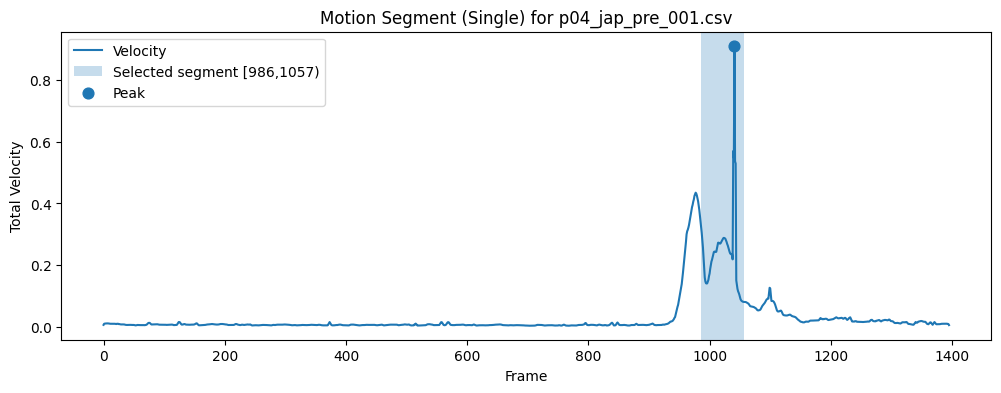

[Segment T/P] (142,245) vs (986,1057)  |  lens: 103/71
DTW: 418.31 | Sim(prac/imp): 0.797/0.407


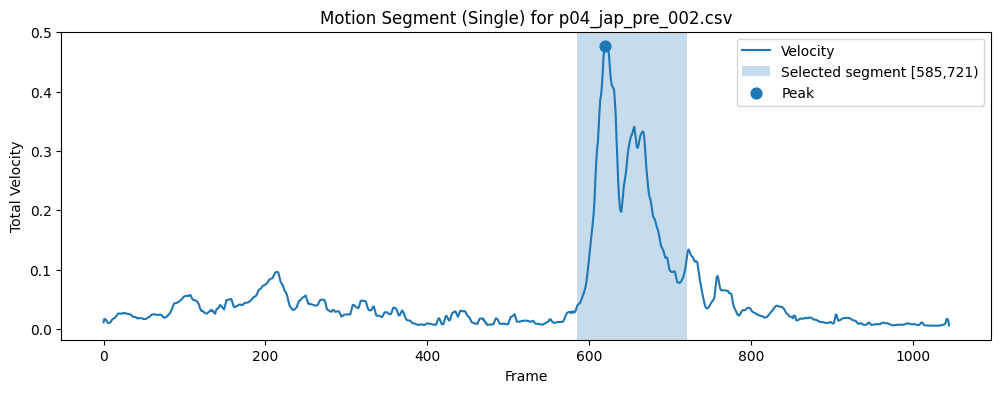

[Segment T/P] (142,245) vs (585,721)  |  lens: 103/136
DTW: 565.85 | Sim(prac/imp): 0.792/0.693


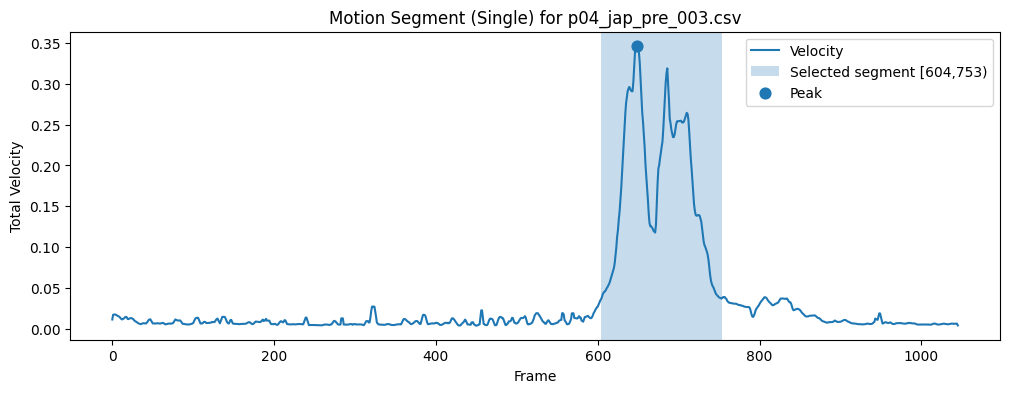

[Segment T/P] (142,245) vs (604,753)  |  lens: 103/149
DTW: 367.21 | Sim(prac/imp): 0.877/0.410


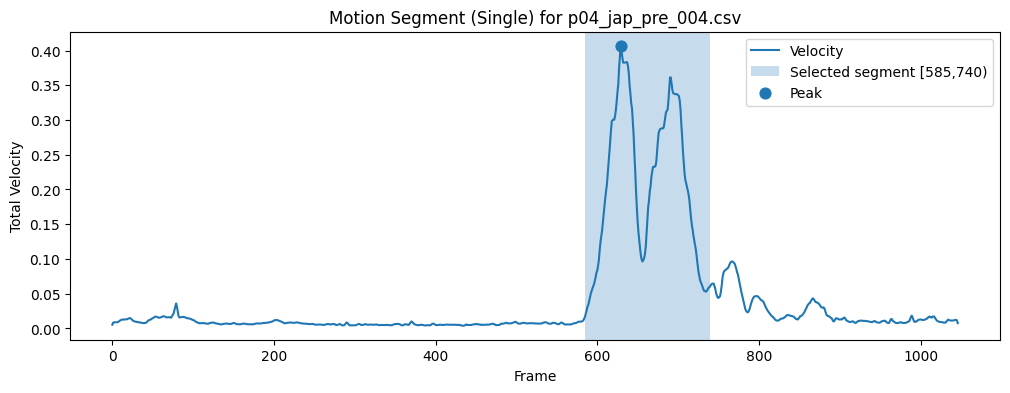

[Segment T/P] (142,245) vs (585,740)  |  lens: 103/155
DTW: 482.59 | Sim(prac/imp): 0.844/0.365


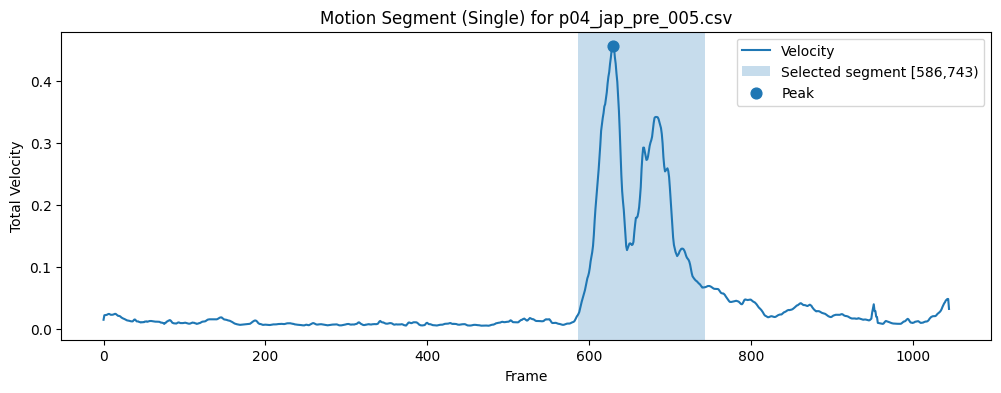

[Segment T/P] (142,245) vs (586,743)  |  lens: 103/157
DTW: 506.30 | Sim(prac/imp): 0.839/0.350


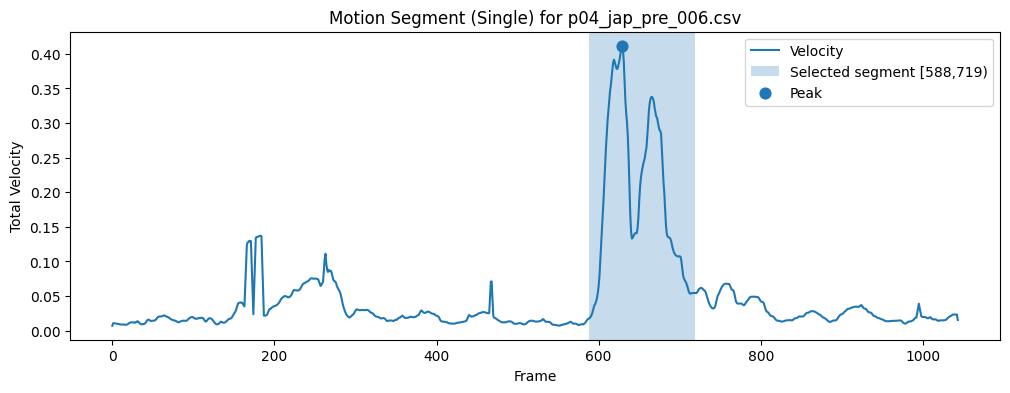

[Segment T/P] (142,245) vs (588,719)  |  lens: 103/131
DTW: 470.37 | Sim(prac/imp): 0.820/0.742


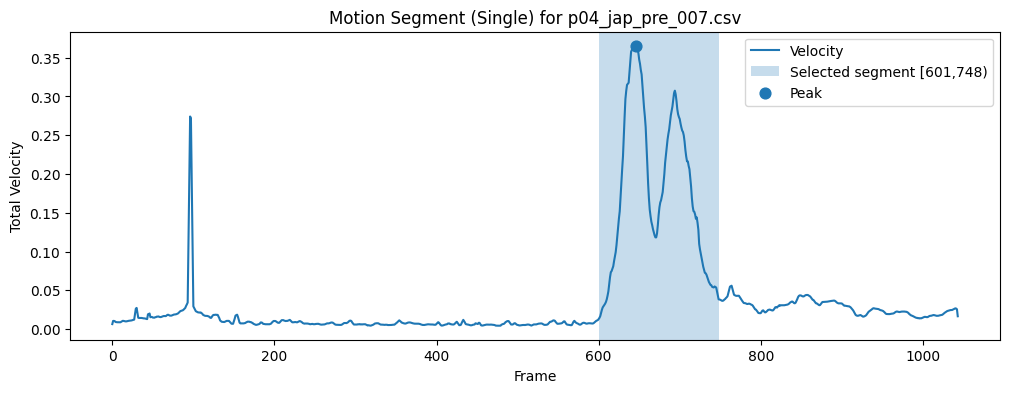

[Segment T/P] (142,245) vs (601,748)  |  lens: 103/147
DTW: 543.21 | Sim(prac/imp): 0.815/0.426


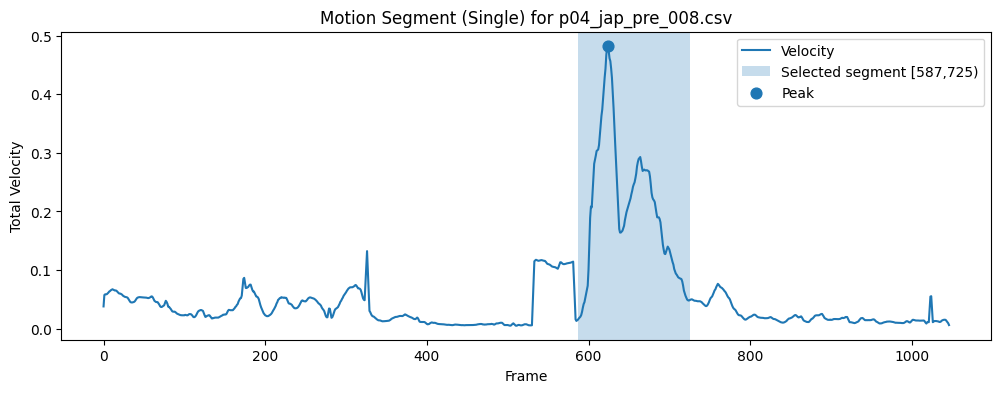

[Segment T/P] (142,245) vs (587,725)  |  lens: 103/138
DTW: 561.70 | Sim(prac/imp): 0.796/0.504


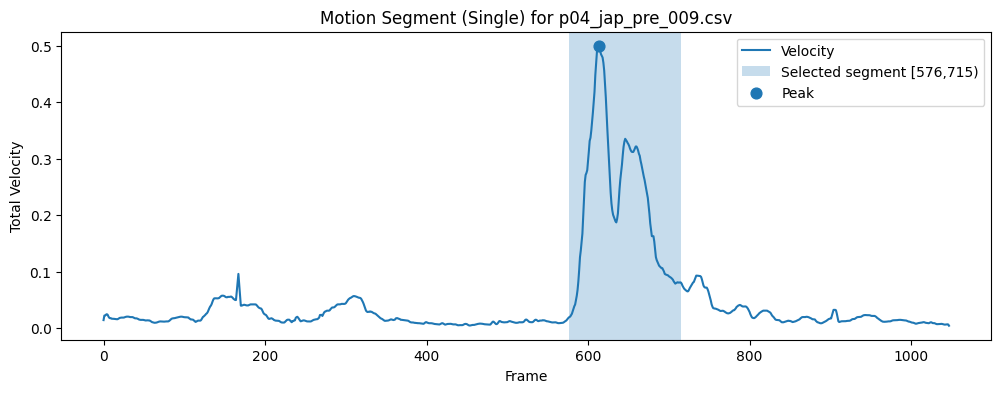

[Segment T/P] (142,245) vs (576,715)  |  lens: 103/139
DTW: 540.72 | Sim(prac/imp): 0.805/0.495


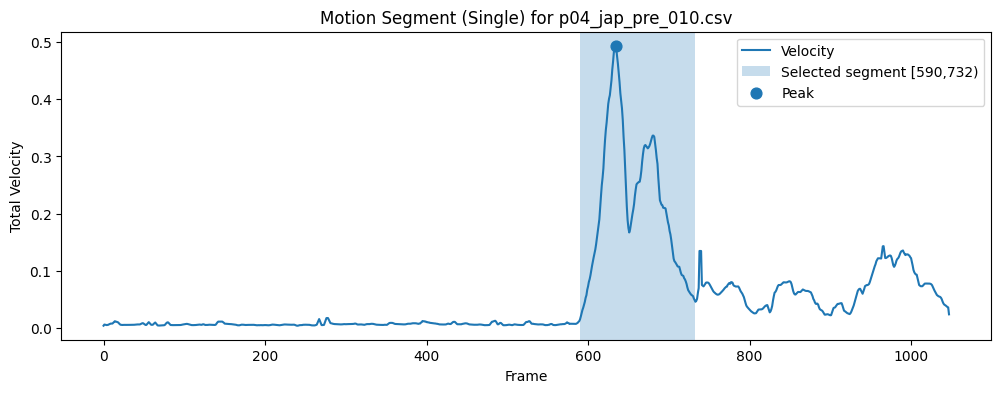

[Segment T/P] (142,245) vs (590,732)  |  lens: 103/142
DTW: 538.68 | Sim(prac/imp): 0.810/0.468


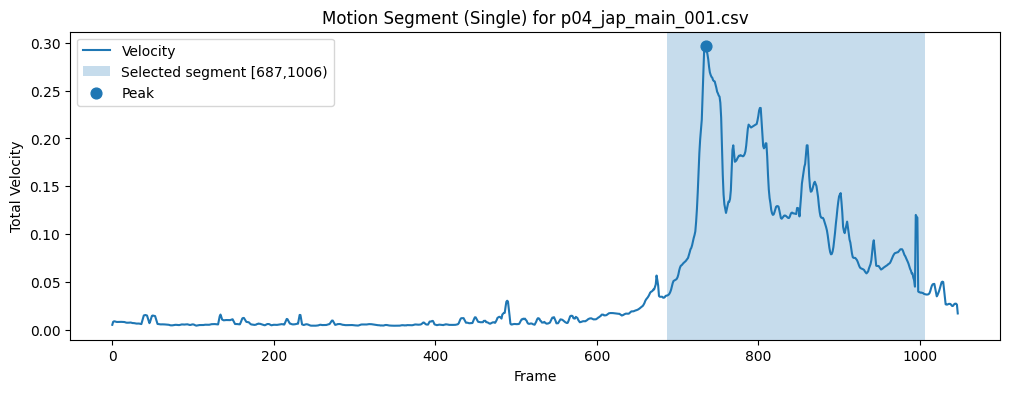

[Segment T/P] (142,245) vs (687,1006)  |  lens: 103/319
DTW: 702.69 | Sim(prac/imp): 0.287/0.091


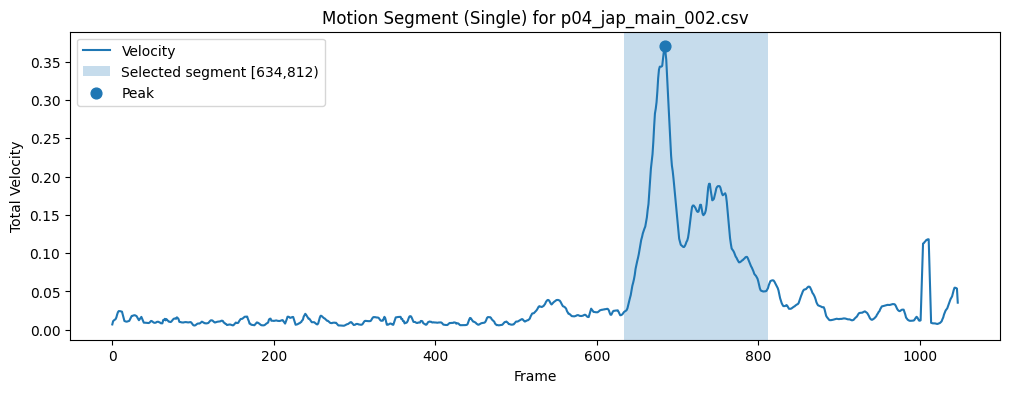

[Segment T/P] (142,245) vs (634,812)  |  lens: 103/178
DTW: 421.68 | Sim(prac/imp): 0.882/0.219


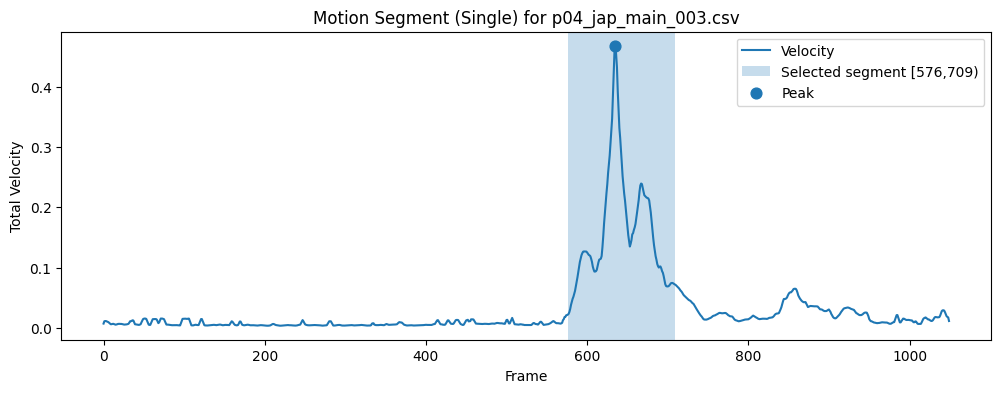

[Segment T/P] (142,245) vs (576,709)  |  lens: 103/133
DTW: 280.07 | Sim(prac/imp): 0.895/0.722


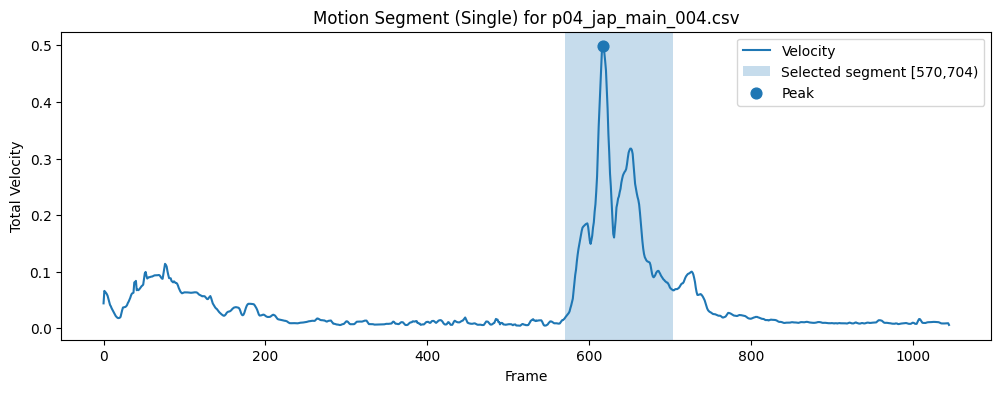

[Segment T/P] (142,245) vs (570,704)  |  lens: 103/134
DTW: 299.23 | Sim(prac/imp): 0.888/0.712


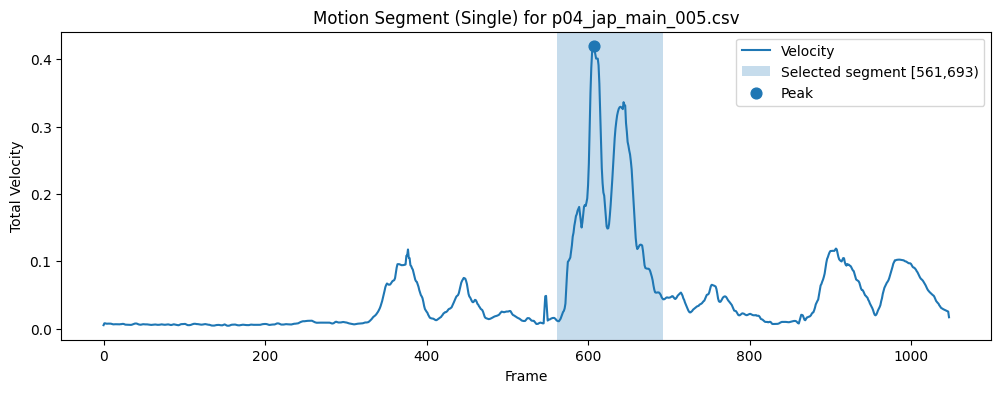

[Segment T/P] (142,245) vs (561,693)  |  lens: 103/132
DTW: 292.99 | Sim(prac/imp): 0.889/0.732


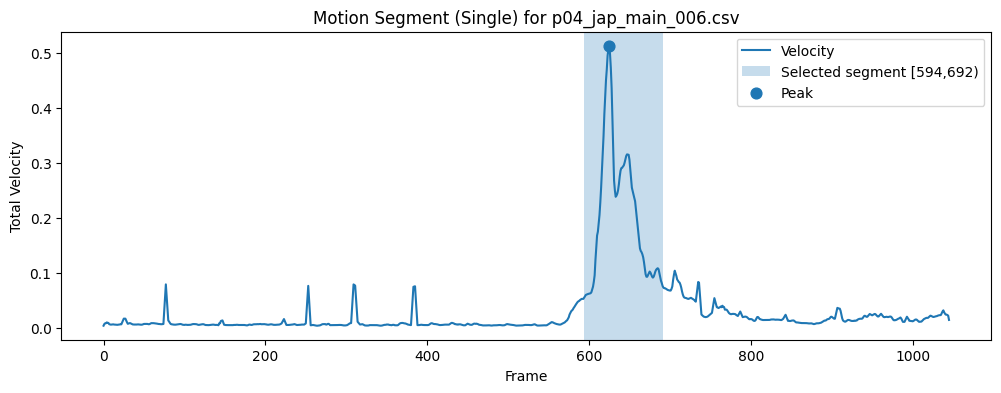

[Segment T/P] (142,245) vs (594,692)  |  lens: 103/98
DTW: 229.49 | Sim(prac/imp): 0.889/0.850


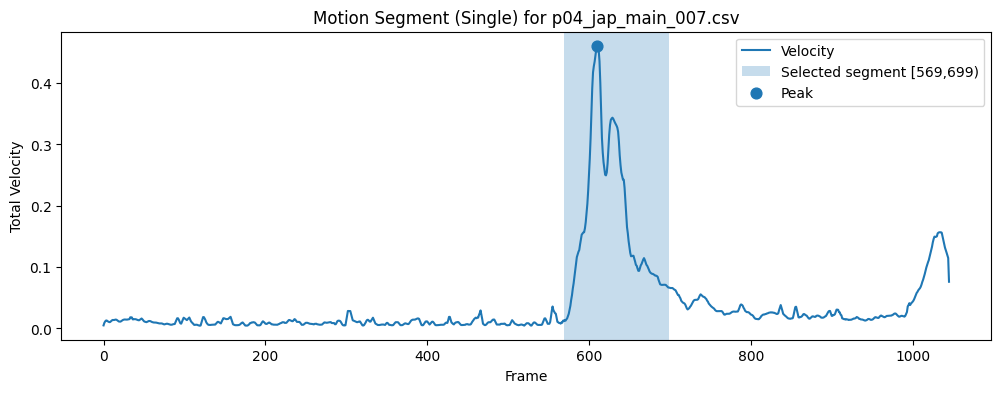

[Segment T/P] (142,245) vs (569,699)  |  lens: 103/130
DTW: 286.37 | Sim(prac/imp): 0.890/0.752


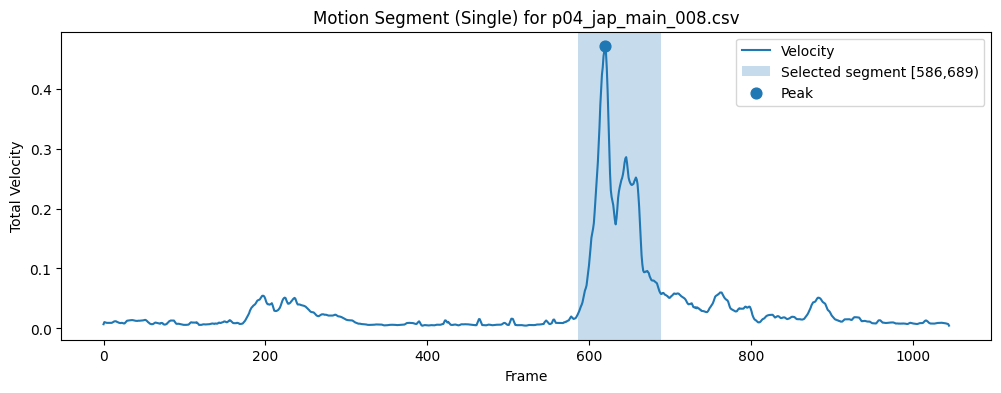

[Segment T/P] (142,245) vs (586,689)  |  lens: 103/103
DTW: 232.21 | Sim(prac/imp): 0.887/0.850


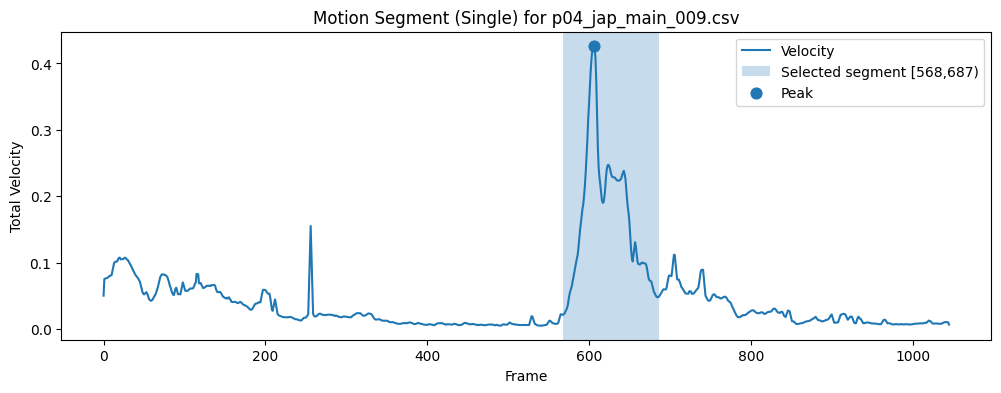

[Segment T/P] (142,245) vs (568,687)  |  lens: 103/119
DTW: 279.38 | Sim(prac/imp): 0.883/0.850


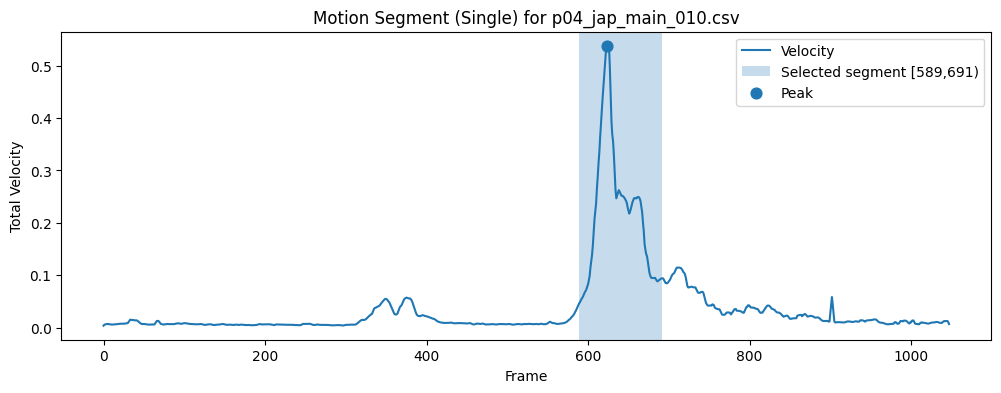

[Segment T/P] (142,245) vs (589,691)  |  lens: 103/102
DTW: 240.10 | Sim(prac/imp): 0.883/0.850


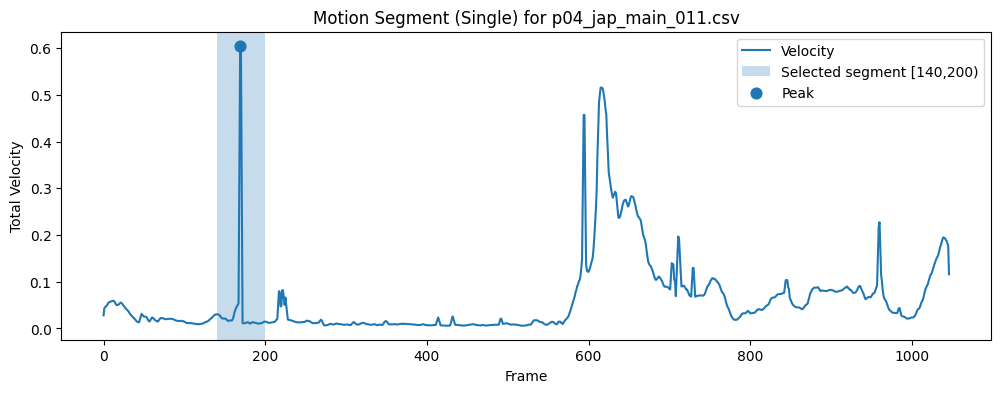

[Segment T/P] (142,245) vs (140,200)  |  lens: 103/60
DTW: 247.46 | Sim(prac/imp): 0.880/0.225


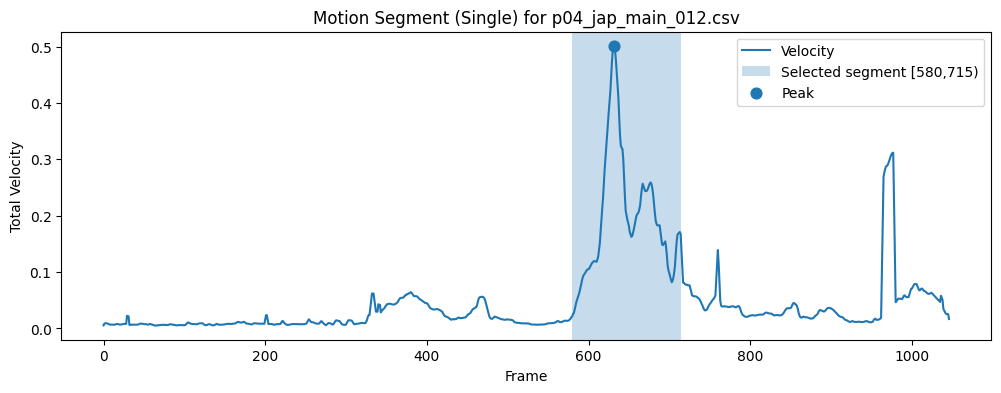

[Segment T/P] (142,245) vs (580,715)  |  lens: 103/135
DTW: 307.02 | Sim(prac/imp): 0.886/0.702


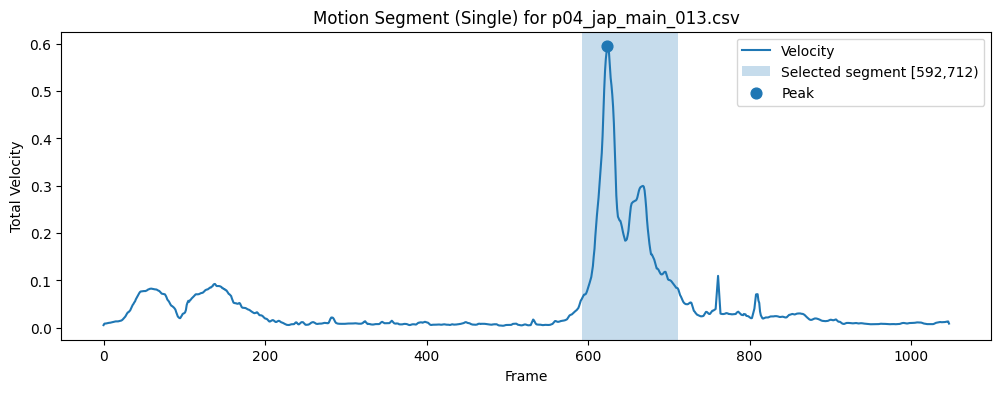

[Segment T/P] (142,245) vs (592,712)  |  lens: 103/120
DTW: 296.90 | Sim(prac/imp): 0.876/0.850


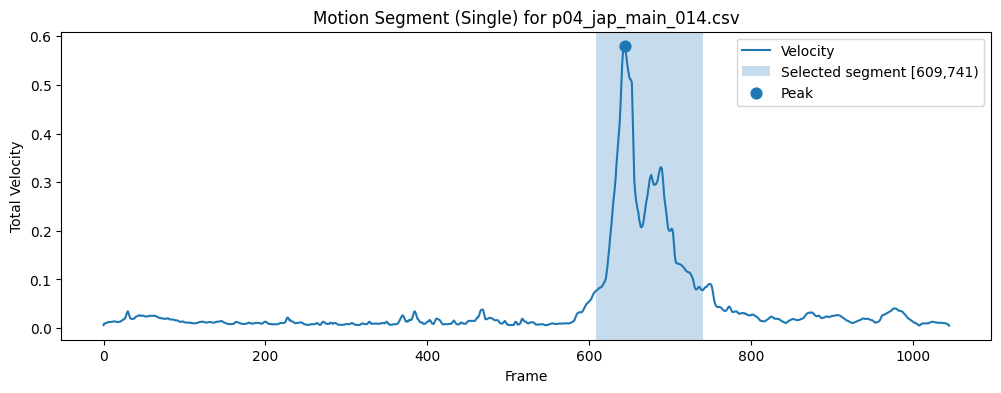

[Segment T/P] (142,245) vs (609,741)  |  lens: 103/132
DTW: 327.53 | Sim(prac/imp): 0.876/0.732


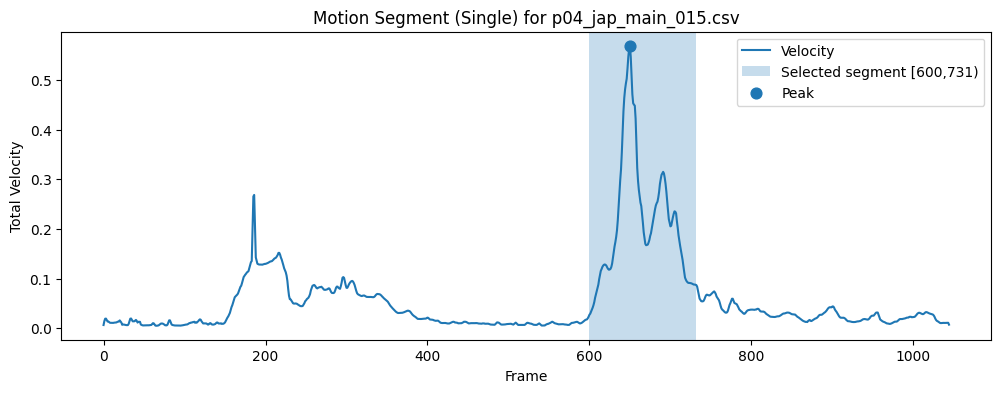

[Segment T/P] (142,245) vs (600,731)  |  lens: 103/131
DTW: 308.59 | Sim(prac/imp): 0.882/0.742


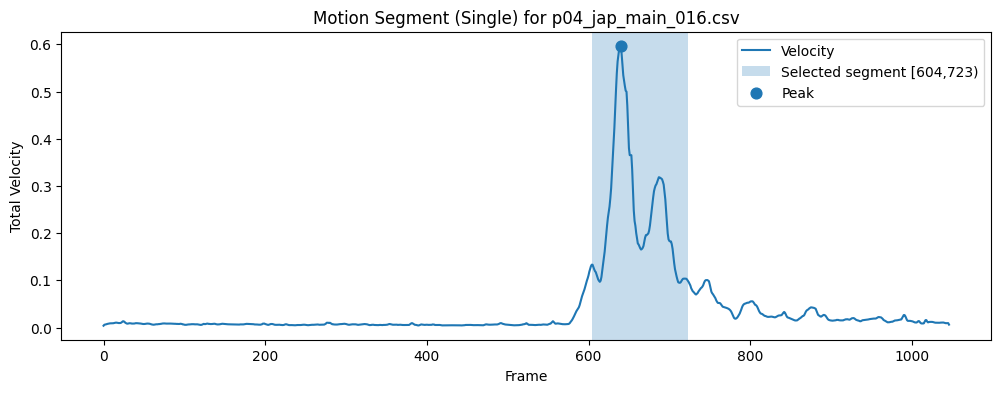

[Segment T/P] (142,245) vs (604,723)  |  lens: 103/119
DTW: 292.89 | Sim(prac/imp): 0.877/0.850


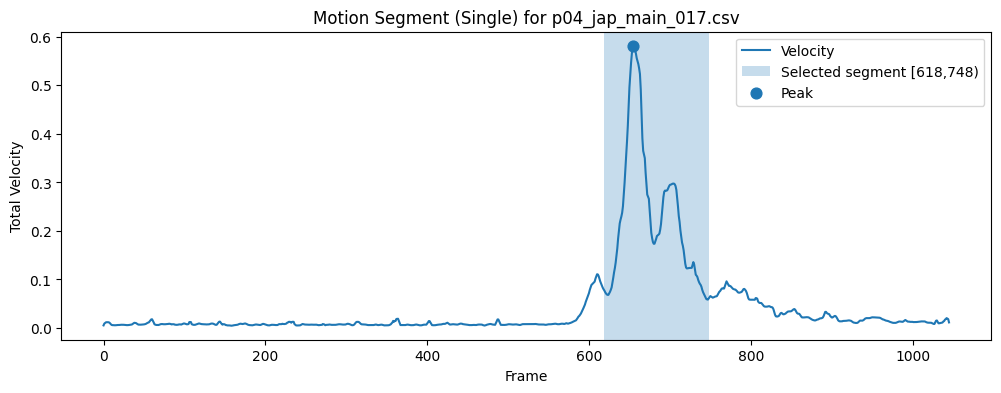

[Segment T/P] (142,245) vs (618,748)  |  lens: 103/130
DTW: 320.80 | Sim(prac/imp): 0.877/0.752


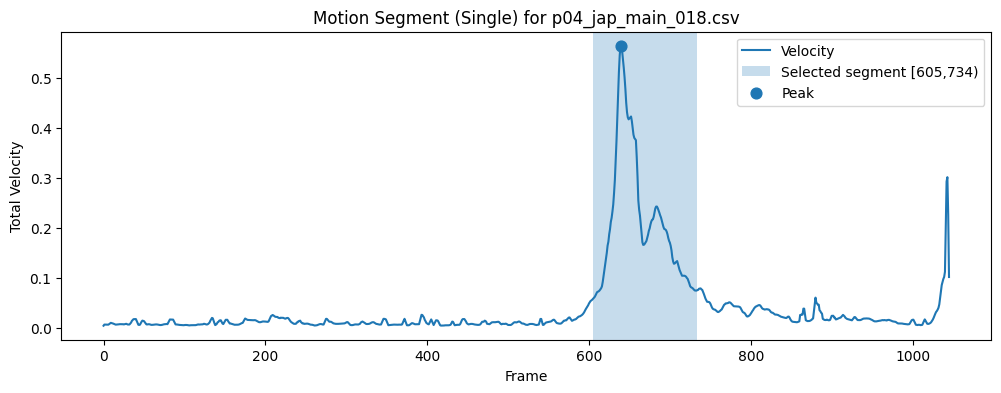

[Segment T/P] (142,245) vs (605,734)  |  lens: 103/129
DTW: 318.10 | Sim(prac/imp): 0.877/0.762


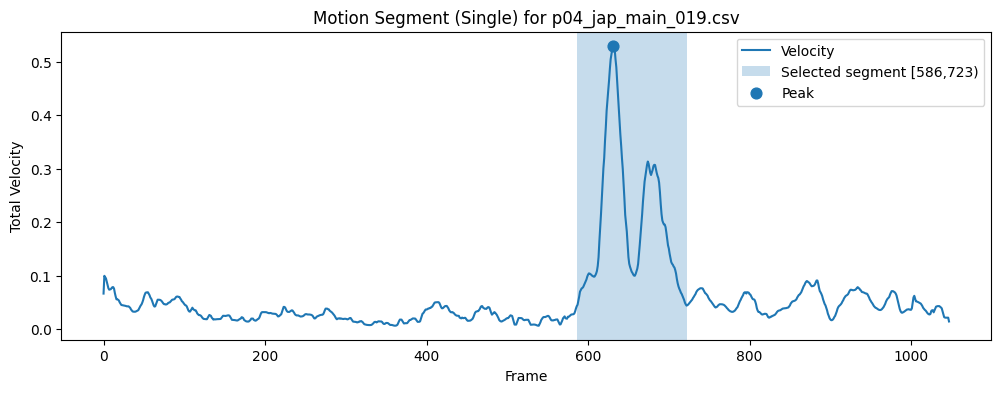

[Segment T/P] (142,245) vs (586,723)  |  lens: 103/137
DTW: 304.36 | Sim(prac/imp): 0.889/0.683


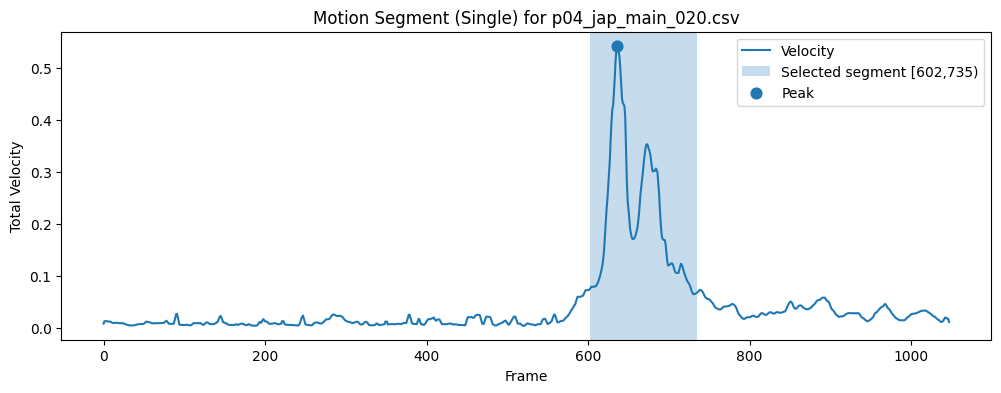

[Segment T/P] (142,245) vs (602,735)  |  lens: 103/133
DTW: 326.59 | Sim(prac/imp): 0.877/0.722


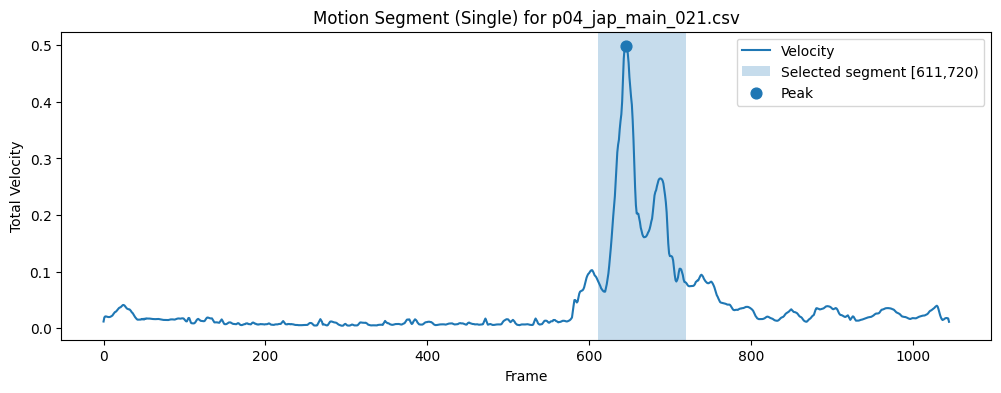

[Segment T/P] (142,245) vs (611,720)  |  lens: 103/109
DTW: 255.56 | Sim(prac/imp): 0.883/0.850


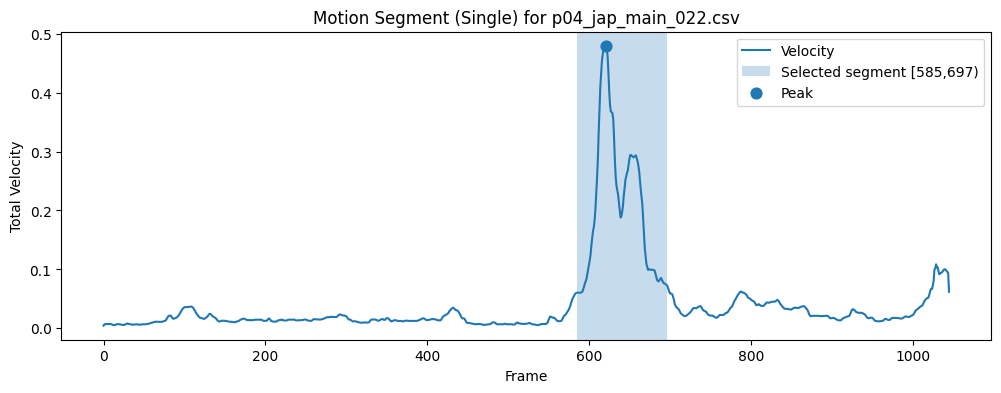

[Segment T/P] (142,245) vs (585,697)  |  lens: 103/112
DTW: 264.89 | Sim(prac/imp): 0.882/0.850


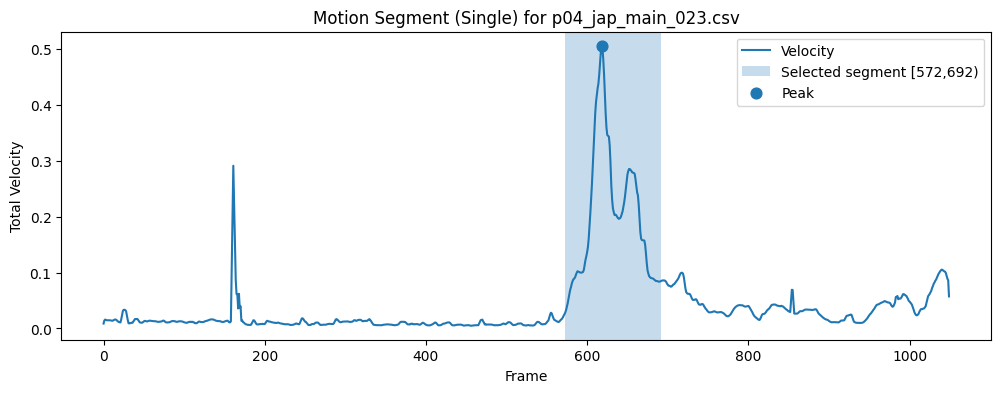

[Segment T/P] (142,245) vs (572,692)  |  lens: 103/120
DTW: 277.00 | Sim(prac/imp): 0.885/0.850


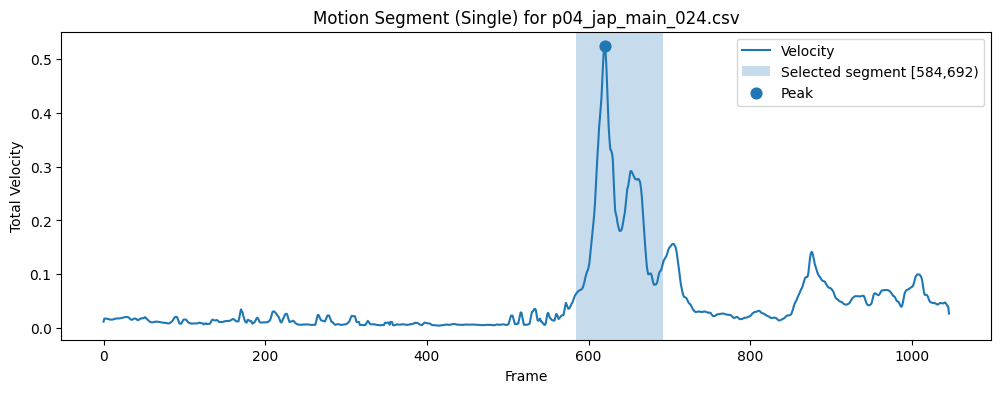

[Segment T/P] (142,245) vs (584,692)  |  lens: 103/108
DTW: 256.08 | Sim(prac/imp): 0.881/0.850


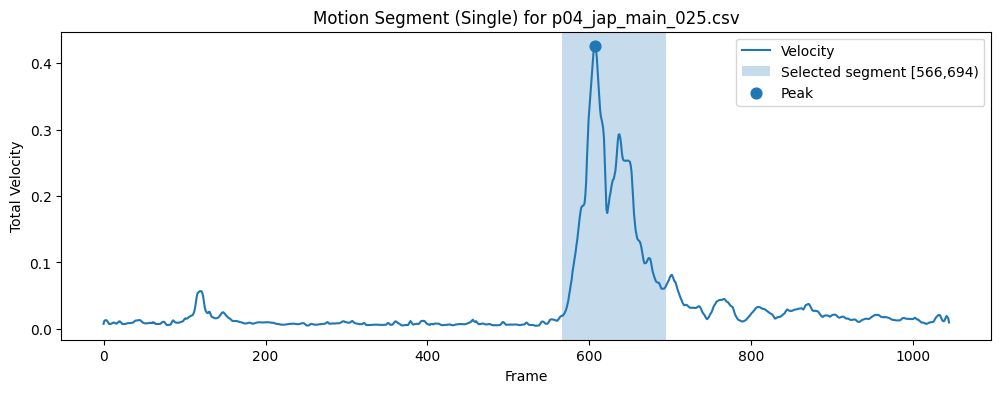

[Segment T/P] (142,245) vs (566,694)  |  lens: 103/128
DTW: 300.74 | Sim(prac/imp): 0.883/0.773


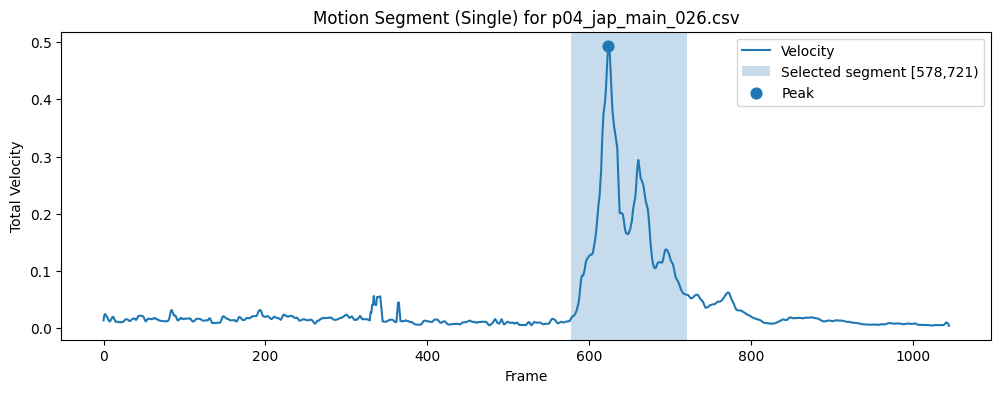

[Segment T/P] (142,245) vs (578,721)  |  lens: 103/143
DTW: 338.49 | Sim(prac/imp): 0.882/0.459


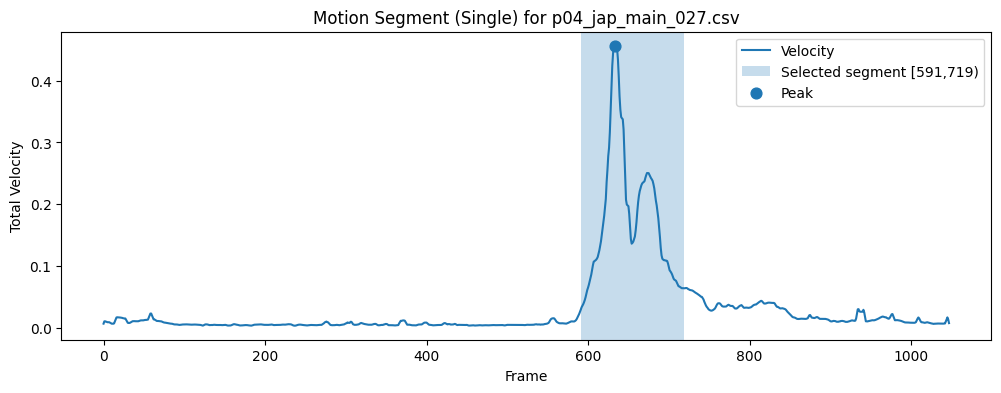

[Segment T/P] (142,245) vs (591,719)  |  lens: 103/128
DTW: 297.60 | Sim(prac/imp): 0.884/0.773


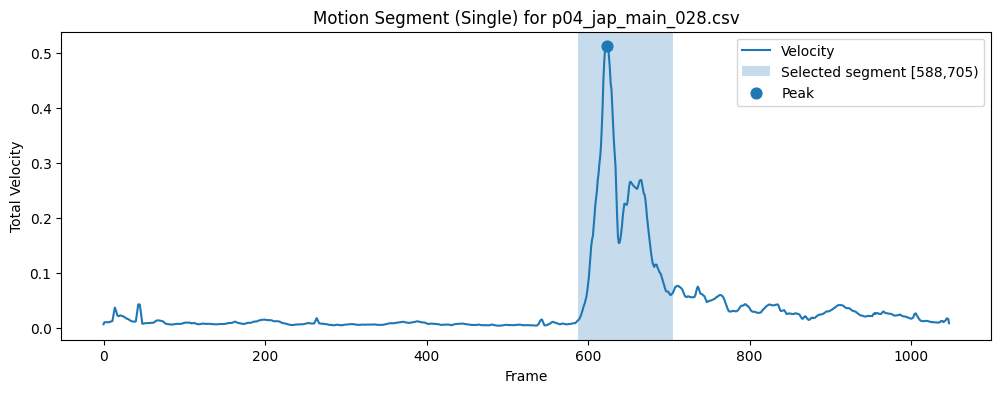

[Segment T/P] (142,245) vs (588,705)  |  lens: 103/117
DTW: 281.59 | Sim(prac/imp): 0.880/0.850


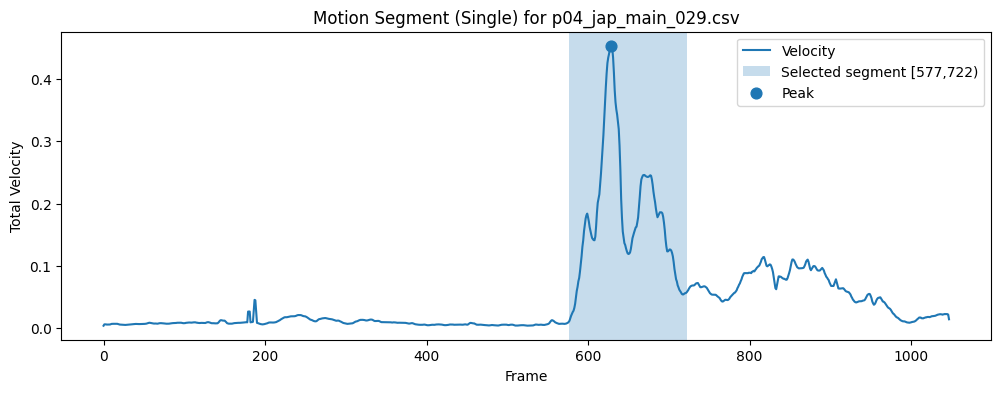

[Segment T/P] (142,245) vs (577,722)  |  lens: 103/145
DTW: 336.38 | Sim(prac/imp): 0.884/0.443


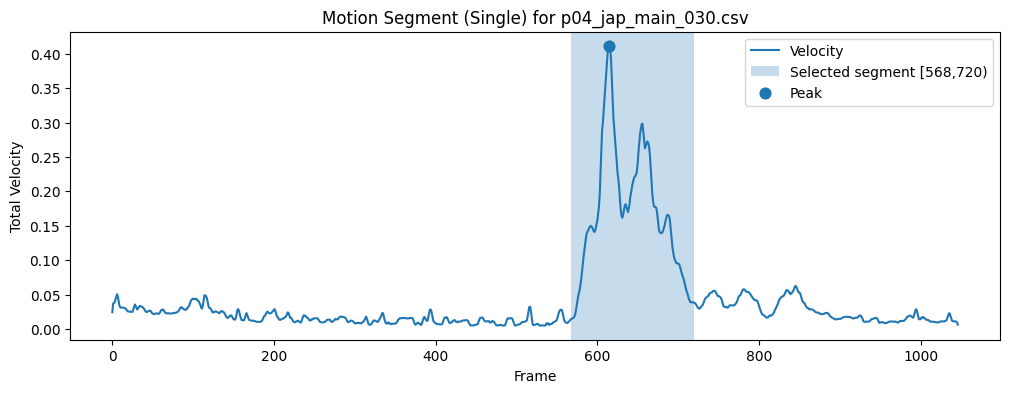

[Segment T/P] (142,245) vs (568,720)  |  lens: 103/152
DTW: 353.15 | Sim(prac/imp): 0.884/0.387


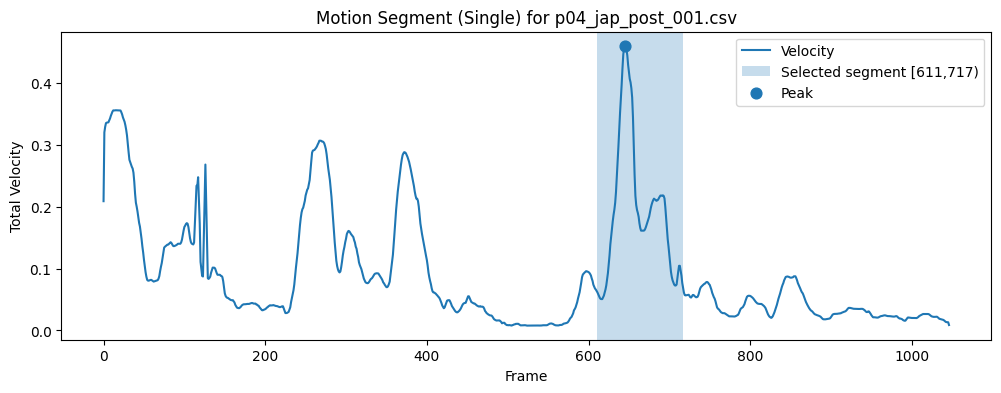

[Segment T/P] (142,245) vs (611,717)  |  lens: 103/106
DTW: 233.46 | Sim(prac/imp): 0.890/0.850


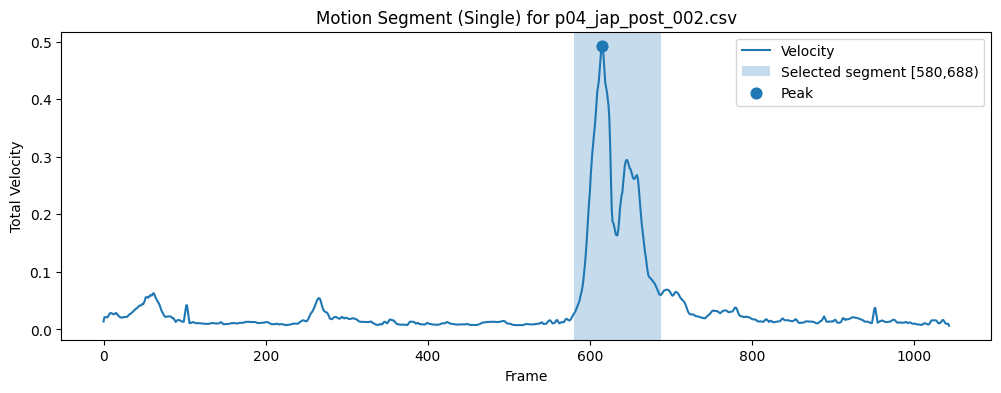

[Segment T/P] (142,245) vs (580,688)  |  lens: 103/108
DTW: 263.18 | Sim(prac/imp): 0.878/0.850


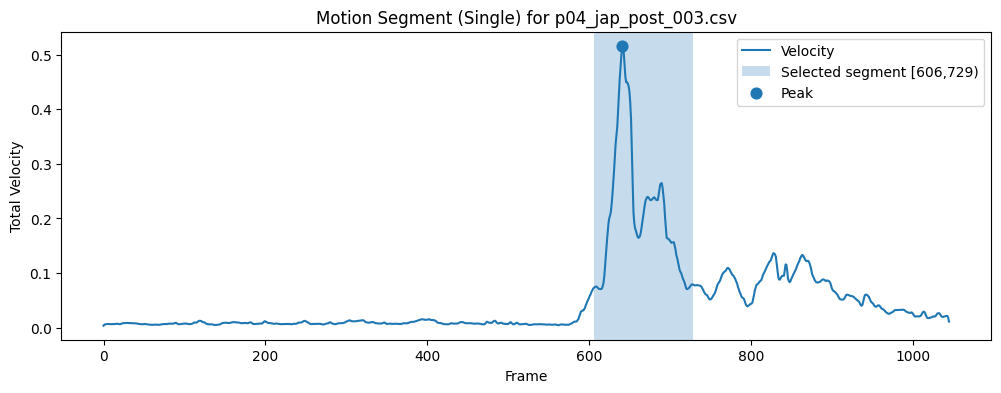

[Segment T/P] (142,245) vs (606,729)  |  lens: 103/123
DTW: 299.28 | Sim(prac/imp): 0.878/0.829


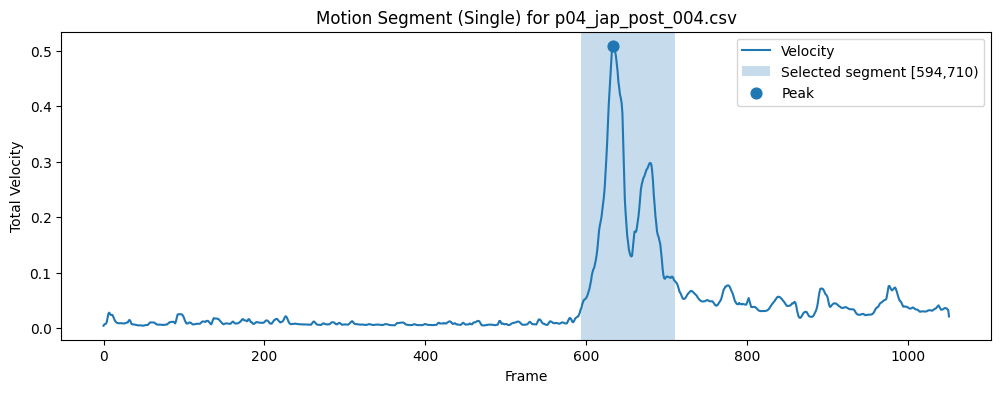

[Segment T/P] (142,245) vs (594,710)  |  lens: 103/116
DTW: 268.36 | Sim(prac/imp): 0.884/0.850


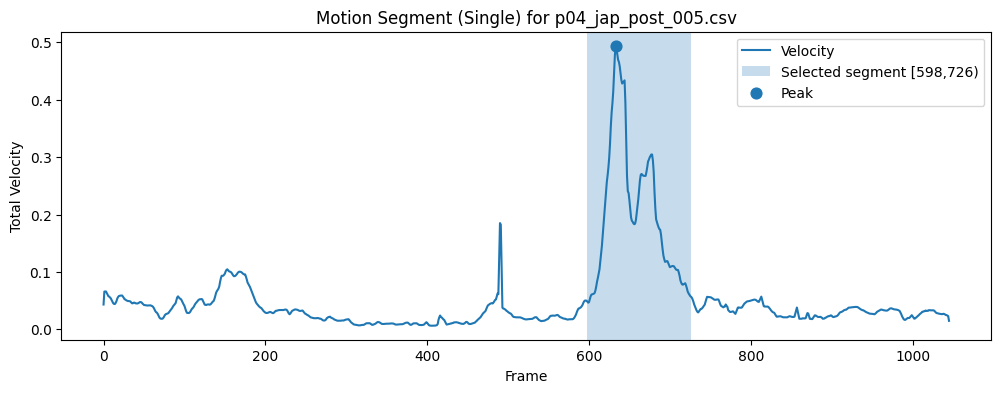

[Segment T/P] (142,245) vs (598,726)  |  lens: 103/128
DTW: 305.13 | Sim(prac/imp): 0.881/0.773


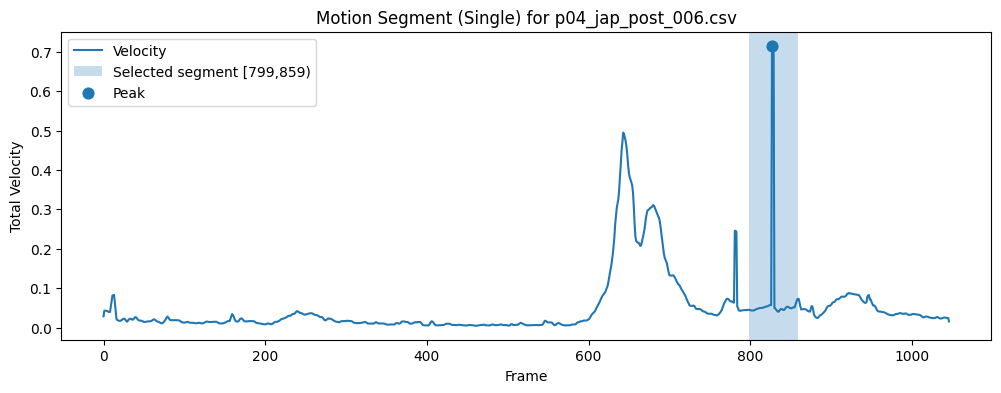

[Segment T/P] (142,245) vs (799,859)  |  lens: 103/60
DTW: 265.43 | Sim(prac/imp): 0.871/0.225


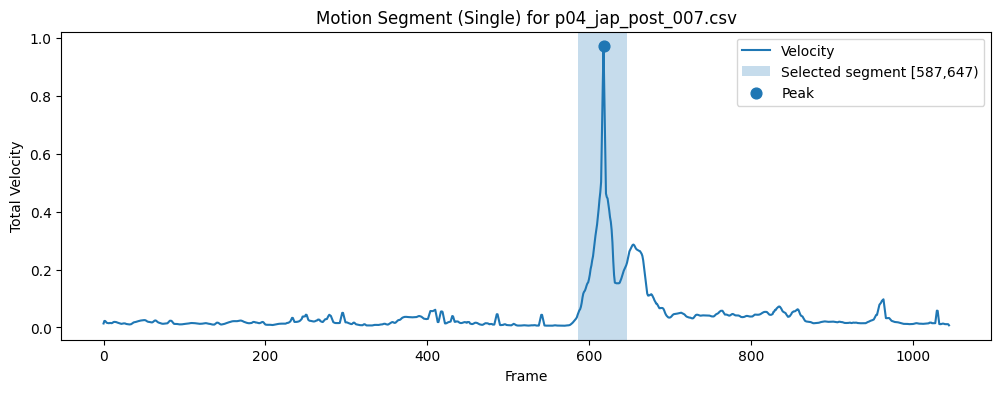

[Segment T/P] (142,245) vs (587,647)  |  lens: 103/60
DTW: 205.71 | Sim(prac/imp): 0.900/0.225


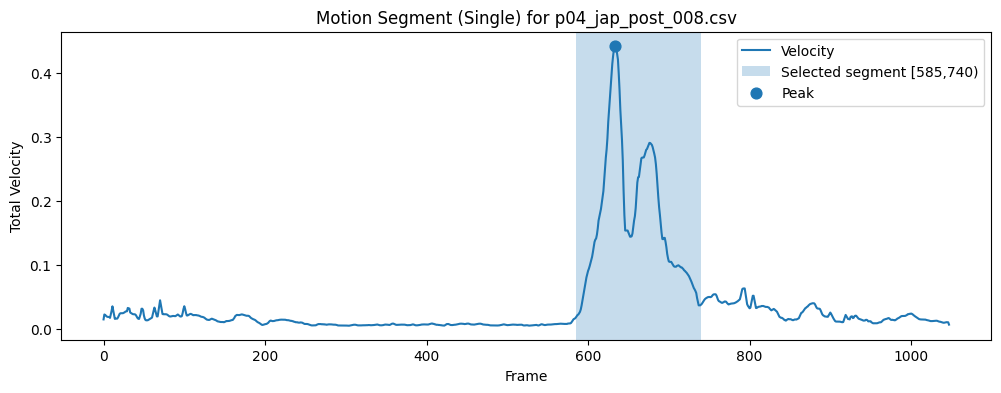

[Segment T/P] (142,245) vs (585,740)  |  lens: 103/155
DTW: 375.74 | Sim(prac/imp): 0.879/0.365


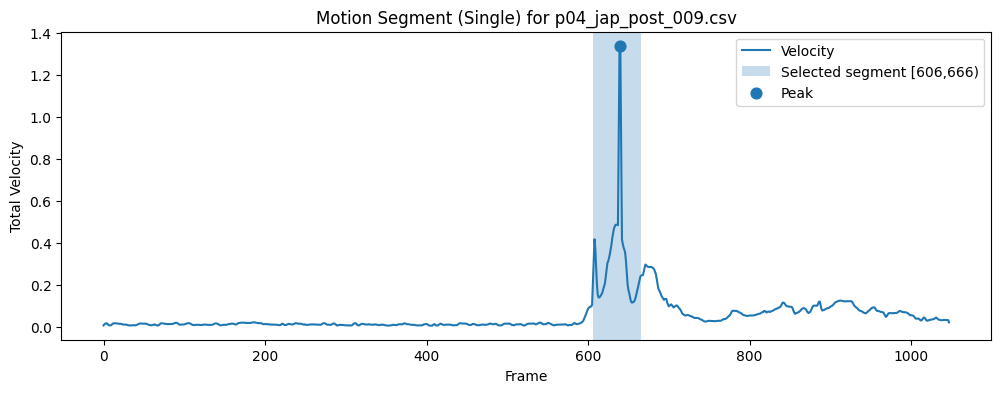

[Segment T/P] (142,245) vs (606,666)  |  lens: 103/60
DTW: 212.66 | Sim(prac/imp): 0.897/0.225


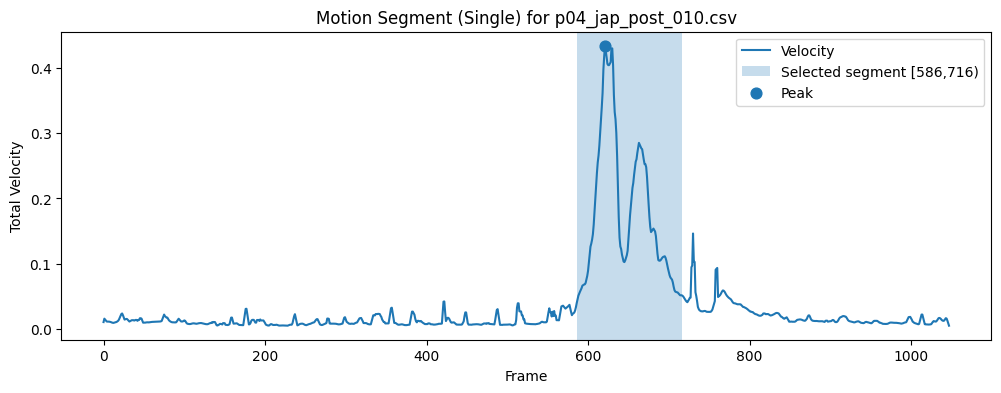

[Segment T/P] (142,245) vs (586,716)  |  lens: 103/130
DTW: 312.23 | Sim(prac/imp): 0.880/0.752

########## Trainer: straight_003.csv ##########
Avg velocity: 0.541  |  dynamic_max_dist: 10.81
[Segment T/P] (189,249) vs (590,672)  |  lens: 60/82
DTW: 788.98 | Sim(prac/imp): 0.519/0.453
[Segment T/P] (189,249) vs (691,751)  |  lens: 60/60
DTW: 1004.01 | Sim(prac/imp): 0.163/0.277
[Segment T/P] (189,249) vs (616,676)  |  lens: 60/60
DTW: 530.53 | Sim(prac/imp): 0.558/0.839
[Segment T/P] (189,249) vs (622,682)  |  lens: 60/60
DTW: 609.22 | Sim(prac/imp): 0.492/0.825
[Segment T/P] (189,249) vs (690,750)  |  lens: 60/60
DTW: 950.79 | Sim(prac/imp): 0.208/0.391
[Segment T/P] (189,249) vs (754,814)  |  lens: 60/60
DTW: 708.97 | Sim(prac/imp): 0.409/0.781
[Segment T/P] (189,249) vs (616,676)  |  lens: 60/60
DTW: 516.89 | Sim(prac/imp): 0.569/0.840
[Segment T/P] (189,249) vs (618,678)  |  lens: 60/60
DTW: 570.99 | Sim(prac/imp): 0.524/0.833
[Segment T/P] (189,249) vs (684,744)  |  lens: 60/60
D

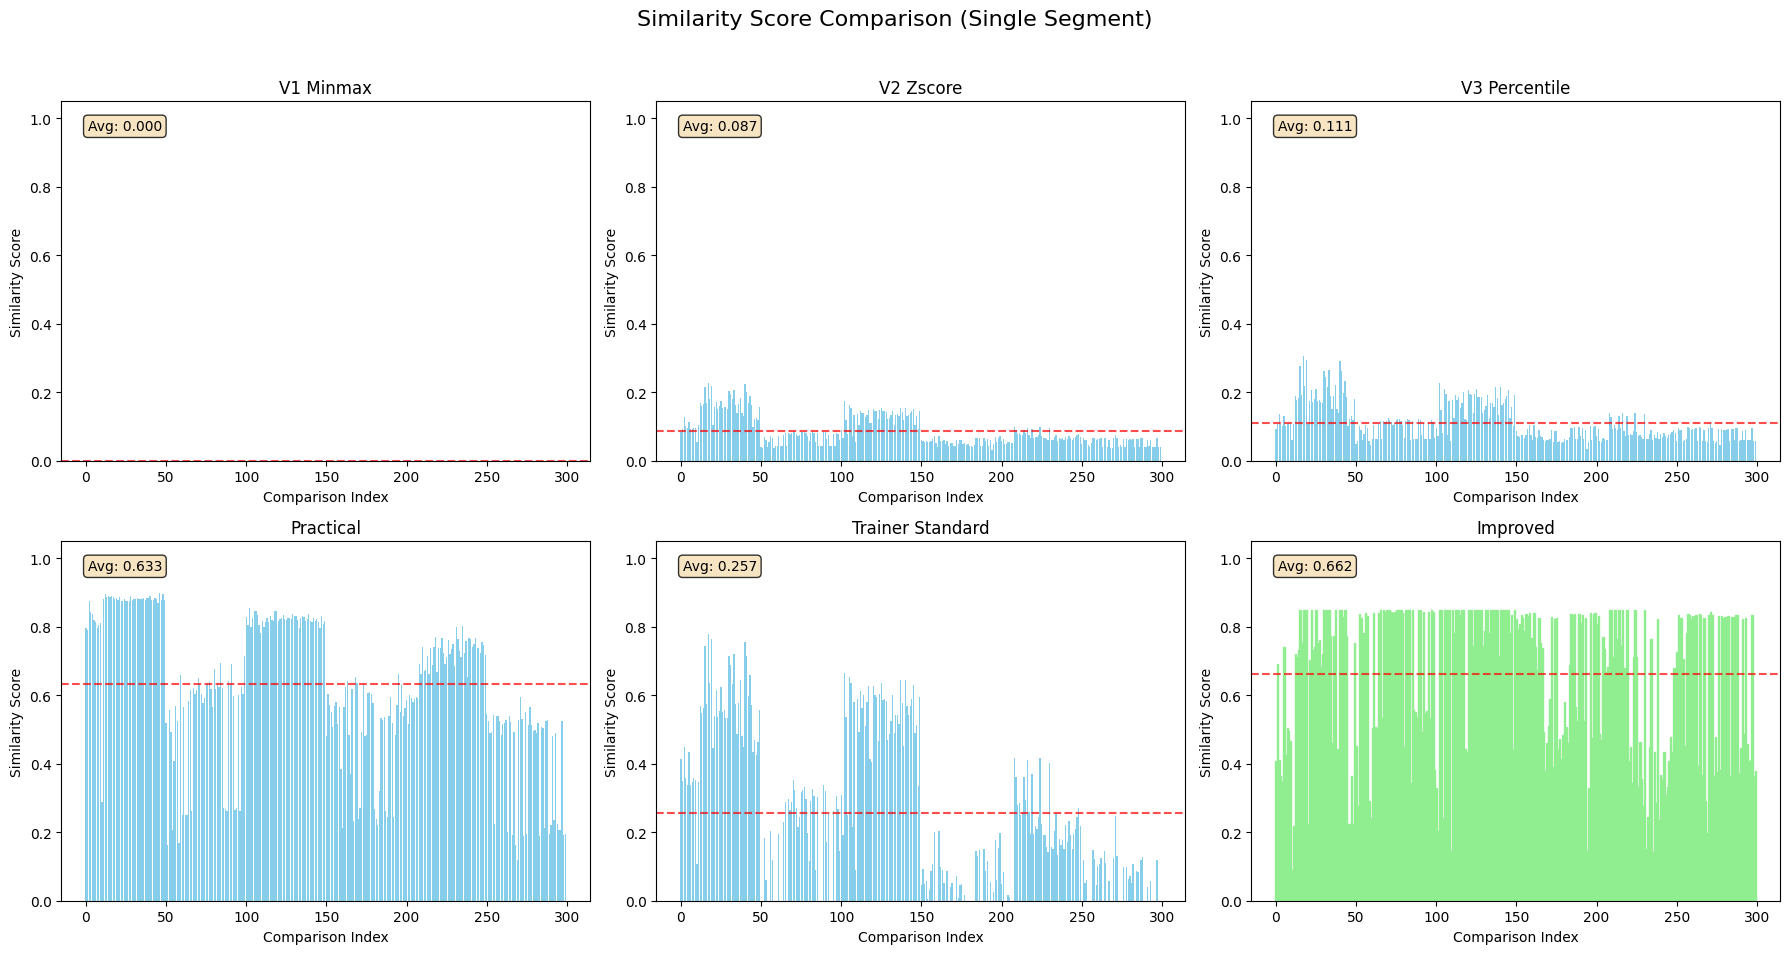

In [18]:
# analysis/dtw_similarity_single_segment.py

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import medfilt, find_peaks
from scipy.spatial.transform import Rotation as R
from dtw import dtw  # dtw-python
from scipy.ndimage import label
from typing import Tuple, Dict, Any, Optional

# ————————————————
# 1) SETUP & PRESETS
# ————————————————
FPS = 120
MIN_SEG_SECONDS   = 0.30              # 최소 동작 구간(초)
MARGIN_SECONDS    = 0.10              # 양쪽 여유(초)
MIN_SEG_FRAMES    = max(8, int(round(MIN_SEG_SECONDS * FPS)))
MARGIN_FRAMES     = int(round(MARGIN_SECONDS * FPS))

trainer_dir = "C:\\Users\\harry\\Downloads\\DTW similarity\\test_mocap"
player_dir = 'C:\\Users\\harry\\Downloads\\DTW similarity\\p04_Global'

compare_pairs = [
    ("jap_001.csv", [
        "p04_jap_pre_001.csv","p04_jap_pre_002.csv","p04_jap_pre_003.csv",
        "p04_jap_pre_004.csv","p04_jap_pre_005.csv","p04_jap_pre_006.csv",
        "p04_jap_pre_007.csv","p04_jap_pre_008.csv","p04_jap_pre_009.csv",
        "p04_jap_pre_010.csv","p04_jap_main_001.csv","p04_jap_main_002.csv",
        "p04_jap_main_003.csv","p04_jap_main_004.csv","p04_jap_main_005.csv",
        "p04_jap_main_006.csv","p04_jap_main_007.csv","p04_jap_main_008.csv",
        "p04_jap_main_009.csv","p04_jap_main_010.csv","p04_jap_main_011.csv",
        "p04_jap_main_012.csv","p04_jap_main_013.csv","p04_jap_main_014.csv",
        "p04_jap_main_015.csv","p04_jap_main_016.csv","p04_jap_main_017.csv",
        "p04_jap_main_018.csv","p04_jap_main_019.csv","p04_jap_main_020.csv",
        "p04_jap_main_021.csv","p04_jap_main_022.csv","p04_jap_main_023.csv",
        "p04_jap_main_024.csv","p04_jap_main_025.csv","p04_jap_main_026.csv",
        "p04_jap_main_027.csv","p04_jap_main_028.csv","p04_jap_main_029.csv",
        "p04_jap_main_030.csv","p04_jap_post_001.csv","p04_jap_post_002.csv",
        "p04_jap_post_003.csv","p04_jap_post_004.csv","p04_jap_post_005.csv",
        "p04_jap_post_006.csv","p04_jap_post_007.csv","p04_jap_post_008.csv",
        "p04_jap_post_009.csv","p04_jap_post_010.csv",
    ]),
    ("straight_003.csv", [
        "p04_straight_pre_001.csv","p04_straight_pre_002.csv","p04_straight_pre_003.csv",
        "p04_straight_pre_004.csv","p04_straight_pre_005.csv","p04_straight_pre_006.csv",
        "p04_straight_pre_007.csv","p04_straight_pre_008.csv","p04_straight_pre_009.csv",
        "p04_straight_pre_010.csv","p04_straight_main_001.csv","p04_straight_main_002.csv",
        "p04_straight_main_003.csv","p04_straight_main_004.csv","p04_straight_main_005.csv",
        "p04_straight_main_006.csv","p04_straight_main_007.csv","p04_straight_main_008.csv",
        "p04_straight_main_009.csv","p04_straight_main_010.csv","p04_straight_main_011.csv",
        "p04_straight_main_012.csv","p04_straight_main_013.csv","p04_straight_main_014.csv",
        "p04_straight_main_015.csv","p04_straight_main_016.csv","p04_straight_main_017.csv",
        "p04_straight_main_018.csv","p04_straight_main_019.csv","p04_straight_main_020.csv",
        "p04_straight_main_021.csv","p04_straight_main_022.csv","p04_straight_main_023.csv",
        "p04_straight_main_024.csv","p04_straight_main_025.csv","p04_straight_main_026.csv",
        "p04_straight_main_027.csv","p04_straight_main_028.csv","p04_straight_main_029.csv",
        "p04_straight_main_030.csv","p04_straight_post_001.csv","p04_straight_post_002.csv",
        "p04_straight_post_003.csv","p04_straight_post_004.csv","p04_straight_post_005.csv",
        "p04_straight_post_006.csv","p04_straight_post_007.csv","p04_straight_post_008.csv",
        "p04_straight_post_009.csv","p04_straight_post_010.csv"
    ]),
    ("hook_left_002.csv", [
        "p04_hook_left_pre_001.csv","p04_hook_left_pre_002.csv","p04_hook_left_pre_003.csv",
        "p04_hook_left_pre_004.csv","p04_hook_left_pre_005.csv","p04_hook_left_pre_006.csv",
        "p04_hook_left_pre_007.csv","p04_hook_left_pre_008.csv","p04_hook_left_pre_009.csv",
        "p04_hook_left_pre_010.csv","p04_hook_left_main_001.csv","p04_hook_left_main_002.csv",
        "p04_hook_left_main_003.csv","p04_hook_left_main_004.csv","p04_hook_left_main_005.csv",
        "p04_hook_left_main_006.csv","p04_hook_left_main_007.csv","p04_hook_left_main_008.csv",
        "p04_hook_left_main_009.csv","p04_hook_left_main_010.csv","p04_hook_left_main_011.csv",
        "p04_hook_left_main_012.csv","p04_hook_left_main_013.csv","p04_hook_left_main_014.csv",
        "p04_hook_left_main_015.csv","p04_hook_left_main_016.csv","p04_hook_left_main_017.csv",
        "p04_hook_left_main_018.csv","p04_hook_left_main_019.csv","p04_hook_left_main_020.csv",
        "p04_hook_left_main_021.csv","p04_hook_left_main_022.csv","p04_hook_left_main_023.csv",
        "p04_hook_left_main_024.csv","p04_hook_left_main_025.csv","p04_hook_left_main_026.csv",
        "p04_hook_left_main_027.csv","p04_hook_left_main_028.csv","p04_hook_left_main_029.csv",
        "p04_hook_left_main_030.csv","p04_hook_left_post_001.csv","p04_hook_left_post_002.csv",
        "p04_hook_left_post_003.csv","p04_hook_left_post_004.csv","p04_hook_left_post_005.csv",
        "p04_hook_left_post_006.csv","p04_hook_left_post_007.csv","p04_hook_left_post_008.csv",
        "p04_hook_left_post_009.csv","p04_hook_left_post_010.csv"
    ]),
    ("hook_right_001.csv", [
        "p04_hook_right_pre_001.csv","p04_hook_right_pre_002.csv","p04_hook_right_pre_003.csv",
        "p04_hook_right_pre_004.csv","p04_hook_right_pre_005.csv","p04_hook_right_pre_006.csv",
        "p04_hook_right_pre_007.csv","p04_hook_right_pre_008.csv","p04_hook_right_pre_009.csv",
        "p04_hook_right_pre_010.csv","p04_hook_right_main_001.csv","p04_hook_right_main_002.csv",
        "p04_hook_right_main_003.csv","p04_hook_right_main_004.csv","p04_hook_right_main_005.csv",
        "p04_hook_right_main_006.csv","p04_hook_right_main_007.csv","p04_hook_right_main_008.csv",
        "p04_hook_right_main_009.csv","p04_hook_right_main_010.csv","p04_hook_right_main_011.csv",
        "p04_hook_right_main_012.csv","p04_hook_right_main_013.csv","p04_hook_right_main_014.csv",
        "p04_hook_right_main_015.csv","p04_hook_right_main_016.csv","p04_hook_right_main_017.csv",
        "p04_hook_right_main_018.csv","p04_hook_right_main_019.csv","p04_hook_right_main_020.csv",
        "p04_hook_right_main_021.csv","p04_hook_right_main_022.csv","p04_hook_right_main_023.csv",
        "p04_hook_right_main_024.csv","p04_hook_right_main_025.csv","p04_hook_right_main_026.csv",
        "p04_hook_right_main_027.csv","p04_hook_right_main_028.csv","p04_hook_right_main_029.csv",
        "p04_hook_right_main_030.csv","p04_hook_right_post_001.csv","p04_hook_right_post_002.csv",
        "p04_hook_right_post_003.csv","p04_hook_right_post_004.csv","p04_hook_right_post_005.csv",
        "p04_hook_right_post_006.csv","p04_hook_right_post_007.csv","p04_hook_right_post_008.csv",
        "p04_hook_right_post_009.csv","p04_hook_right_post_010.csv"
    ]),
    ("uppercut_left_001.csv", [
        "p04_uppercut_left_pre_001.csv","p04_uppercut_left_pre_002.csv","p04_uppercut_left_pre_003.csv",
        "p04_uppercut_left_pre_004.csv","p04_uppercut_left_pre_005.csv","p04_uppercut_left_pre_006.csv",
        "p04_uppercut_left_pre_007.csv","p04_uppercut_left_pre_008.csv","p04_uppercut_left_pre_009.csv",
        "p04_uppercut_left_pre_010.csv","p04_uppercut_left_main_001.csv","p04_uppercut_left_main_002.csv",
        "p04_uppercut_left_main_003.csv","p04_uppercut_left_main_004.csv","p04_uppercut_left_main_005.csv",
        "p04_uppercut_left_main_006.csv","p04_uppercut_left_main_007.csv","p04_uppercut_left_main_008.csv",
        "p04_uppercut_left_main_009.csv","p04_uppercut_left_main_010.csv","p04_uppercut_left_main_011.csv",
        "p04_uppercut_left_main_012.csv","p04_uppercut_left_main_013.csv","p04_uppercut_left_main_014.csv",
        "p04_uppercut_left_main_015.csv","p04_uppercut_left_main_016.csv","p04_uppercut_left_main_017.csv",
        "p04_uppercut_left_main_018.csv","p04_uppercut_left_main_019.csv","p04_uppercut_left_main_020.csv",
        "p04_uppercut_left_main_021.csv","p04_uppercut_left_main_022.csv","p04_uppercut_left_main_023.csv",
        "p04_uppercut_left_main_024.csv","p04_uppercut_left_main_025.csv","p04_uppercut_left_main_026.csv",
        "p04_uppercut_left_main_027.csv","p04_uppercut_left_main_028.csv","p04_uppercut_left_main_029.csv",
        "p04_uppercut_left_main_030.csv","p04_uppercut_left_post_001.csv","p04_uppercut_left_post_002.csv",
        "p04_uppercut_left_post_003.csv","p04_uppercut_left_post_004.csv","p04_uppercut_left_post_005.csv",
        "p04_uppercut_left_post_006.csv","p04_uppercut_left_post_007.csv","p04_uppercut_left_post_008.csv",
        "p04_uppercut_left_post_009.csv","p04_uppercut_left_post_010.csv"
    ]),
    ("uppercut_right_002.csv", [
        "p04_uppercut_right_pre_001.csv","p04_uppercut_right_pre_002.csv","p04_uppercut_right_pre_003.csv",
        "p04_uppercut_right_pre_004.csv","p04_uppercut_right_pre_005.csv","p04_uppercut_right_pre_006.csv",
        "p04_uppercut_right_pre_007.csv","p04_uppercut_right_pre_008.csv","p04_uppercut_right_pre_009.csv",
        "p04_uppercut_right_pre_010.csv","p04_uppercut_right_main_001.csv","p04_uppercut_right_main_002.csv",
        "p04_uppercut_right_main_003.csv","p04_uppercut_right_main_004.csv","p04_uppercut_right_main_005.csv",
        "p04_uppercut_right_main_006.csv","p04_uppercut_right_main_007.csv","p04_uppercut_right_main_008.csv",
        "p04_uppercut_right_main_009.csv","p04_uppercut_right_main_010.csv","p04_uppercut_right_main_011.csv",
        "p04_uppercut_right_main_012.csv","p04_uppercut_right_main_013.csv","p04_uppercut_right_main_014.csv",
        "p04_uppercut_right_main_015.csv","p04_uppercut_right_main_016.csv","p04_uppercut_right_main_017.csv",
        "p04_uppercut_right_main_018.csv","p04_uppercut_right_main_019.csv","p04_uppercut_right_main_020.csv",
        "p04_uppercut_right_main_021.csv","p04_uppercut_right_main_022.csv","p04_uppercut_right_main_023.csv",
        "p04_uppercut_right_main_024.csv","p04_uppercut_right_main_025.csv","p04_uppercut_right_main_026.csv",
        "p04_uppercut_right_main_027.csv","p04_uppercut_right_main_028.csv","p04_uppercut_right_main_029.csv",
        "p04_uppercut_right_main_030.csv","p04_uppercut_right_post_001.csv","p04_uppercut_right_post_002.csv",
        "p04_uppercut_right_post_003.csv","p04_uppercut_right_post_004.csv","p04_uppercut_right_post_005.csv",
        "p04_uppercut_right_post_006.csv","p04_uppercut_right_post_007.csv","p04_uppercut_right_post_008.csv",
        "p04_uppercut_right_post_009.csv","p04_uppercut_right_post_010.csv"
    ])
]

joint_mapping = {
    'Hip':'Hip',"Ab":"Ab","Chest":"Chest","Neck":"Neck","Head":"Head",
    "LShoulder":"LShoulder","LUArm":"LUArm","LFArm":"LFArm","LHand":"LHand",
    "RShoulder":"RShoulder","RUArm":"RUArm","RFArm":"RFArm","RHand":"RHand",
    "LThigh":"LThigh","LShin":"LShin","LFoot":"LFoot","RThigh":"RThigh",
    "RShin":"RShin","RFoot":"RFoot","LToe":"LToe","RToe":"RToe"
}
joint_list = [j for j in joint_mapping if j != 'Hip']
J = len(joint_list)

# 결과 컨테이너
all_results = {
    'original': [], 'v1_minmax': [], 'v2_zscore': [], 'v3_percentile': [],
    'practical': [], 'trainer_standard': [], 'improved': []
}
all_distances: list = []

# —— 점수 프리셋(필요 시 조정) ——
PRESETS: Dict[str, Dict[str, Any]] = {
    "lenient": dict(base_threshold_rad=0.24, complexity_cap=1.0, band_low=0.45, band_high=2.2,
                    length_penalty_mode='soft', length_floor=0.30, length_gamma=0.55),
    "balanced": dict(base_threshold_rad=0.22, complexity_cap=1.0, band_low=0.50, band_high=2.0,
                     length_penalty_mode='soft', length_floor=0.25, length_gamma=0.60),
    "strict": dict(base_threshold_rad=0.20, complexity_cap=0.6, band_low=0.60, band_high=1.8,
                   length_penalty_mode='hard', length_floor=0.15, length_gamma=0.90),
}
PRESET = PRESETS["strict"]  # 필요 시 'strict'/'lenient'

# ————————————————
# 2) UTILS
# ————————————————
def dtw_distance(feat1: np.ndarray, feat2: np.ndarray) -> float:
    """
    순수 NumPy DTW (L2). 외부 패키지 의존성 없이 동작합니다.
    feat1: (T1, D), feat2: (T2, D)
    return: 누적 최소 거리 (float)
    """
    # 1) 프레임 간 유클리드 거리행렬 D (T1, T2)
    # 메모리 절약을 위해 한 줄씩 계산해도 되나, T가 200 수준이면 전체 계산도 무난함.
    T1, D1 = feat1.shape
    T2, D2 = feat2.shape
    assert D1 == D2, "특징 차원이 다릅니다."

    # 거리행렬
    # (feat1[:,None,:] - feat2[None,:,:]) -> (T1, T2, D)
    diff = feat1[:, None, :] - feat2[None, :, :]
    Dmat = np.linalg.norm(diff, axis=2)  # (T1, T2)

    # 2) 누적 비용 테이블 (T1+1, T2+1), 테두리를 inf로 채워 경계 처리 단순화
    acc = np.full((T1 + 1, T2 + 1), np.inf, dtype=np.float64)
    acc[0, 0] = 0.0

    # 3) 동적계획법
    # 이동: (i-1,j), (i,j-1), (i-1,j-1)
    for i in range(1, T1 + 1):
        # 벡터화 최적화 여지 있음. 우선 가독성 우선.
        for j in range(1, T2 + 1):
            acc[i, j] = Dmat[i - 1, j - 1] + min(acc[i - 1, j], acc[i, j - 1], acc[i - 1, j - 1])

    return float(acc[T1, T2])

def sanitize_quaternion(quat: np.ndarray) -> np.ndarray:
    quat = np.nan_to_num(quat, nan=0.0, posinf=0.0, neginf=0.0)
    norms = np.linalg.norm(quat, axis=1, keepdims=True)
    bad = (norms < 1e-8) | (~np.isfinite(norms))
    quat[bad[:, 0]] = [0.0, 0.0, 0.0, 1.0]
    return quat / np.linalg.norm(quat, axis=1, keepdims=True)

def preprocess_velocity(total_vel: np.ndarray) -> np.ndarray:
    if len(total_vel) == 0:
        return total_vel
    filtered = medfilt(total_vel, kernel_size=5)
    smoothed = np.convolve(filtered, np.ones(3)/3, mode='same')
    return smoothed

def get_average_velocity(rv: np.ndarray) -> float:
    if len(rv) < 2:
        return 0.0
    rot_vel = np.linalg.norm(np.diff(rv, axis=0), axis=2)
    total_vel = rot_vel.sum(axis=1)
    return float(np.mean(total_vel))

# ————————————————
# 3) “단일” 넉넉한 모션 구간 추출
# ————————————————
def extract_motion_segment_gentle(
    rv: np.ndarray,
    rho_high: float = 0.25,      # 피크 높이의 비율(진입)
    rho_low: Optional[float] = None,  # 유지 임계 (없으면 0.6*rho_high)
    min_seg_frames: int = MIN_SEG_FRAMES,
    margin_frames: int = MARGIN_FRAMES
) -> Tuple[int, int, int, float]:
    """
    피크 1개만 사용하여 '넉넉한' 단일 움직임 구간 [s,e) 반환.
    - 히스테리시스(high→low) + 최소 길이 + 양쪽 마진.
    """
    T = rv.shape[0]
    if T < 2:
        return 0, T, 0, 0.0

    rot_vel = np.linalg.norm(np.diff(rv, axis=0), axis=2)  # (T-1,J)
    total_vel = rot_vel.sum(axis=1)                        # (T-1,)
    clean_vel = preprocess_velocity(total_vel)
    Tm1 = clean_vel.shape[0]

    if Tm1 < 3 or np.all(clean_vel <= 0):
        return 0, T, 0, float(clean_vel.max() if Tm1 > 0 else 0.0)

    # 피크 최고점 1개
    p_candidates, _ = find_peaks(clean_vel, prominence=max(1e-6, 0.05 * clean_vel.max()))
    if len(p_candidates) == 0:
        p = int(np.argmax(clean_vel))
    else:
        p = int(p_candidates[np.argmax(clean_vel[p_candidates])])
    pv = float(clean_vel[p])

    rh = rho_high
    rl = rho_low if rho_low is not None else (rho_high * 0.6)
    thr_high = pv * rh
    thr_low  = pv * rl

    # high로 진입, low로 확장
    s = p
    while s > 0 and clean_vel[s] > thr_high:
        s -= 1
    e = p
    while e < Tm1 - 1 and clean_vel[e] > thr_high:
        e += 1
    s_low = s
    while s_low > 0 and clean_vel[s_low] > thr_low:
        s_low -= 1
    e_low = e
    while e_low < Tm1 - 1 and clean_vel[e_low] > thr_low:
        e_low += 1
    s, e = int(s_low), int(e_low + 1)

    # 최소 길이 보장
    seg_len = e - s
    if seg_len < min_seg_frames:
        deficit = min_seg_frames - seg_len
        left_add = deficit // 2
        right_add = deficit - left_add
        s = max(0, s - left_add)
        e = min(Tm1, e + right_add)

    # 양쪽 마진 적용
    s = max(0, s - margin_frames)
    e = min(Tm1, e + margin_frames)

    # rv는 길이가 T, clean_vel은 T-1이므로, rv 인덱스는 그대로 사용 가능
    return s, e, p, pv

# ————————————————
# 4) 유사도 함수들
# ————————————————
def calculate_similarity(dist: float, len1: int, len2: int, penalty_weight: float = 0.05) -> float:
    length_penalty  = abs(len1 - len2) / max(len1, len2)
    normalized_dist = dist / max(len1, len2)
    combo = normalized_dist + penalty_weight * length_penalty
    return float(np.exp(-combo))

def calculate_similarity_v1(dist: float, len1: int, len2: int, penalty_weight: float = 0.5) -> float:
    path_length = (len1 + len2) / 2
    if path_length == 0: return 0.0
    normalized_dist = dist / path_length
    distance_score = 1 - normalized_dist
    length_ratio = min(len1, len2) / max(len1, len2) if max(len1, len2) > 0 else 0
    length_penalty_value = 1 - length_ratio
    final_score = distance_score - (penalty_weight * length_penalty_value)
    return max(0.0, min(1.0, final_score))

def calculate_similarity_v2(dist: float, len1: int, len2: int, sensitivity: float = 1.5, length_penalty_power: float = 1.0) -> float:
    avg_len = (len1 + len2) / 2
    if avg_len == 0: return 0.0
    normalized_dist = dist / avg_len
    distance_score = 1 / (1 + sensitivity * normalized_dist)
    length_ratio = min(len1, len2) / max(len1, len2) if max(len1, len2) > 0 else 0
    length_factor = length_ratio ** length_penalty_power
    final_score = distance_score * length_factor
    return max(0.0, min(1.0, final_score))

def calculate_similarity_v3(dist: float, len1: int, len2: int, sensitivity: float = 1.0, length_penalty_strength: float = 2.0) -> float:
    avg_len = (len1 + len2) / 2
    if avg_len == 0: return 0.0
    normalized_dist = dist / avg_len
    base_similarity = 1 / (1 + sensitivity * normalized_dist)
    length_diff_ratio = abs(len1 - len2) / max(len1, len2) if max(len1, len2) > 0 else 0
    length_penalty = np.exp(-length_penalty_strength * length_diff_ratio)
    final_score = base_similarity * length_penalty
    return max(0.0, min(1.0, final_score))

def calculate_similarity_practical(dist: float, len1: int, len2: int,
                                   max_acceptable_dist: float = 20.0, ### 고민해봐야할 파라미터. 각 동작들마다 거리가 다름. 
                                   length_ratio_threshold: float = 0.5,
                                   curve_power: float = 1.0) -> float:
    if max(len1, len2) == 0: return 0.0
    length_ratio = min(len1, len2) / max(len1, len2)
    length_weight = length_ratio if length_ratio < length_ratio_threshold else 1.0
    avg_dist_per_frame = dist / max(len1, len2)
    if avg_dist_per_frame >= max_acceptable_dist:
        distance_score = 0.0
    else:
        normalized_dist = avg_dist_per_frame / max_acceptable_dist
        distance_score = 1 - (normalized_dist ** curve_power)
    final_score = distance_score * length_weight
    return max(0.0, min(1.0, final_score))

# —— Improved (단일 세그먼트 기준, 포화 상향 억제치 소폭 보수적) ——
def calculate_motion_complexity(rv: np.ndarray) -> float:
    if len(rv) < 2: return 0.0
    vel = np.diff(rv, axis=0)
    avg_v = float(np.mean(np.linalg.norm(vel, axis=2)))
    if len(vel) > 1:
        acc = np.diff(vel, axis=0)
        avg_a = float(np.mean(np.linalg.norm(acc, axis=2)))
    else:
        avg_a = 0.0
    return min(avg_v * 5 + avg_a * 10, 20)

def _length_score_soft(r: float, floor: float = 0.25, gamma: float = 0.6) -> float:
    r = max(1e-6, min(1.0, r))
    return float(floor + (1.0 - floor) * (r ** gamma))

### IMPROVED SIMILARITY FUNCTION ###
def calculate_similarity_improved(
    dist: float, trainer_len: int, player_len: int,
    num_joints: int = 20,
    trainer_rv: Optional[np.ndarray] = None,
    base_threshold_rad: float = 0.2,
    complexity_cap: float = 0.5,
    band_low: float = 0.3,   # band_low 보다 낮으면 유사도가 1.0에 가깝게 포화됩니다.
    band_high: float = 2.5,  # band_high 보다 크면 유사도가 거의 0에 수렴합니다.
    length_penalty_mode: str = 'soft',
    length_floor: float = 0.0, # 플레이어가 트레이너의 15% 길이밖에 안 되면 그 이하로는 더 낮게 패널티 주지 않음.
    length_gamma: float = 0.80   # 이 클수록 길이 차이에 민감하게 유사도를 깎습니다.
) -> Dict[str, float]:

    estimated_path_length = (trainer_len + player_len) / 2
    avg_dpj = dist / max(1e-6, (estimated_path_length * num_joints * 3))

    if trainer_rv is not None:
        comp = 1 + min(calculate_motion_complexity(trainer_rv) / 20, complexity_cap)
    else:
        comp = 1.0
    theta = base_threshold_rad * comp

    lo = band_low * theta
    hi = band_high * theta

    if avg_dpj >= hi:
        distance_score = 0.0
    elif avg_dpj <= lo:
        distance_score = 0.85  # 포화 상한을 0.85로 낮춰 과도한 상향 방지
    else:
        z = (avg_dpj - lo) / max(1e-6, (hi - lo))
        distance_score = 0.85 / (1 + np.exp(10 * (z - 0.5)))

    r = min(trainer_len, player_len) / max(trainer_len, player_len) if max(trainer_len, player_len) > 0 else 0.0
    if length_penalty_mode == 'soft':
        length_score = _length_score_soft(r, floor=length_floor, gamma=length_gamma)
    else:
        if r >= 0.85:   length_score = 1.0
        elif r >= 0.75: length_score = 0.80 + 2 * (r - 0.75)
        elif r >= 0.65: length_score = 0.40 + 2 * (r - 0.65)
        elif r >= 0.55: length_score = 0.20 + 2 * (r - 0.55)
        else:           length_score = r * 0.33

    final_score = distance_score * length_score
    return {
        'final_score': float(final_score),
        'distance_score': float(distance_score),
        'length_score': float(length_score),
        'avg_dist_per_frame_per_joint': float(avg_dpj),
        'avg_dist_per_frame': float(dist / max(1e-6, estimated_path_length)),
        'max_acceptable_dist': float(theta),
        'length_ratio': float(r)
    }

# ————————————————
# 5) MAIN LOOP (단일 세그먼트 비교)
# ————————————————
methods_to_plot = ['v1_minmax','v2_zscore','v3_percentile','practical','trainer_standard','improved']

for trainer_file, player_files in compare_pairs:
    t_path = os.path.join(trainer_dir, trainer_file)
    if not os.path.isfile(t_path): continue
    t_df = pd.read_csv(t_path).rename(columns=str.strip)

    cols = [f"{joint}.rot{ax}" for joint in joint_list for ax in "XYZW"]
    qt1_flat = t_df[cols].to_numpy().reshape(-1, 4)
    qt1_clean = sanitize_quaternion(qt1_flat)
    qt1 = qt1_clean.reshape(-1, J, 4)
    rv1_flat = R.from_quat(qt1_clean).as_rotvec()
    rv1 = rv1_flat.reshape(-1, J, 3)

    trainer_avg_vel = get_average_velocity(rv1)
    dynamic_max_dist = 10.0 + (trainer_avg_vel * 1.5)

    print(f"\n########## Trainer: {trainer_file} ##########")
    print(f"Avg velocity: {trainer_avg_vel:.3f}  |  dynamic_max_dist: {dynamic_max_dist:.2f}")

    # 트레이너/플레이어 각각 “단일” 여유 구간
    s1, e1, p1, pv1 = extract_motion_segment_gentle(
        rv1, rho_high=0.28, rho_low=0.18,  # 필요 시 조정
        min_seg_frames=MIN_SEG_FRAMES, margin_frames=MARGIN_FRAMES
    )

    for player_file in player_files:
        p_path = os.path.join(player_dir, player_file)
        if not os.path.isfile(p_path): continue
        p_df = pd.read_csv(p_path).rename(columns=str.strip)

        qt2_flat = p_df[cols].to_numpy().reshape(-1, 4)
        qt2_clean = sanitize_quaternion(qt2_flat)
        qt2 = qt2_clean.reshape(-1, J, 4)
        rv2_flat = R.from_quat(qt2_clean).as_rotvec()
        rv2 = rv2_flat.reshape(-1, J, 3)

        s2, e2, p2, pv2 = extract_motion_segment_gentle(
            rv2, rho_high=0.28, rho_low=0.18,
            min_seg_frames=MIN_SEG_FRAMES, margin_frames=MARGIN_FRAMES
        )

        # 시각화(옵션): 단일 세그먼트만 표시
        if trainer_file == "jap_001.csv":
            rot_vel_player = np.linalg.norm(np.diff(rv2, axis=0), axis=2)
            total_vel_player = rot_vel_player.sum(axis=1)
            clean_vel_player = preprocess_velocity(total_vel_player)
            plt.figure(figsize=(12, 4))
            plt.plot(clean_vel_player, label="Velocity")
            plt.axvspan(s2, e2, alpha=0.25, label=f'Selected segment [{s2},{e2})')
            plt.scatter([p2], [clean_vel_player[p2]], s=60, label='Peak')
            plt.title(f"Motion Segment (Single) for {player_file}")
            plt.xlabel("Frame"); plt.ylabel("Total Velocity"); plt.legend(); plt.show()

        # 단일 구간 비교
        qt1_seg = qt1[s1:e1]; qt2_seg = qt2[s2:e2]
        if qt1_seg.shape[0] < 2 or qt2_seg.shape[0] < 2:
            continue
        rv1_seg = rv1[s1:e1]; rv2_seg = rv2[s2:e2]
        feat1 = rv1_seg.reshape(rv1_seg.shape[0], -1)
        feat2 = rv2_seg.reshape(rv2_seg.shape[0], -1)

        length1 = feat1.shape[0]; length2 = feat2.shape[0]
        print(f"[Segment T/P] ({s1},{e1}) vs ({s2},{e2})  |  lens: {length1}/{length2}")

        dist = dtw_distance(feat1, feat2)
        all_distances.append(dist)

        # 기존 지표
        sim_original = calculate_similarity(dist, length1, length2)
        sim_v1      = calculate_similarity_v1(dist, length1, length2)
        sim_v2      = calculate_similarity_v2(dist, length1, length2)
        sim_v3      = calculate_similarity_v3(dist, length1, length2)
        sim_prac    = calculate_similarity_practical(dist, length1, length2)

        # trainer_standard(간단식)
        length_ratio = (min(length1, length2) / max(length1, length2)) if max(length1, length2) > 0 else 0.0
        avg_per_frame = dist / max(1e-6, length1)
        normed = avg_per_frame / max(1e-6, dynamic_max_dist)
        distance_score_std = 0.0 if normed >= 1.0 else (1.0 - normed)
        sim_trainer_std = max(0.0, min(1.0, distance_score_std * length_ratio))

        # Improved(포화 상한/밴드 보수화)
        sim_imp_dict = calculate_similarity_improved(
            dist, length1, length2, num_joints=J, trainer_rv=rv1_seg,
            base_threshold_rad=PRESET['base_threshold_rad'],
            complexity_cap=PRESET['complexity_cap'],
            band_low=PRESET['band_low'], band_high=PRESET['band_high'],
            length_penalty_mode=PRESET['length_penalty_mode'],
            length_floor=PRESET['length_floor'], length_gamma=PRESET['length_gamma']
        )
        sim_improved = sim_imp_dict['final_score']

        info = {
            'trainer': trainer_file, 'player': player_file, 'distance': dist,
            'len1': length1, 'len2': length2, 'len_diff': abs(length1 - length2),
            'trainer_segment': (int(s1), int(e1)), 'player_segment': (int(s2), int(e2)),
            'trainer_peak_idx': int(p1), 'player_peak_idx': int(p2)
        }
        all_results['original'].append({**info, 'similarity': sim_original})
        all_results['v1_minmax'].append({**info, 'similarity': sim_v1})
        all_results['v2_zscore'].append({**info, 'similarity': sim_v2})
        all_results['v3_percentile'].append({**info, 'similarity': sim_v3})
        all_results['practical'].append({**info, 'similarity': sim_prac})
        all_results['trainer_standard'].append({**info, 'similarity': sim_trainer_std})
        all_results['improved'].append({**info, 'similarity': sim_improved})

        print(f"DTW: {dist:.2f} | Sim(prac/imp): {sim_prac:.3f}/{sim_improved:.3f}")

# ————————————————
# 6) VISUALIZE & SUMMARY
# ————————————————
if all_results['original']:
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))
    fig.suptitle('Similarity Score Comparison (Single Segment)', fontsize=16)
    axes = axes.flatten()
    for idx, method in enumerate(methods_to_plot):
        ax = axes[idx]
        df = pd.DataFrame(all_results[method])
        if df.empty: continue
        bars = ax.bar(range(len(df)), df['similarity'], color='skyblue')
        if method == 'improved':
            for b in bars: b.set_color('lightgreen')
        ax.set_title(method.replace('_',' ').title()); ax.set_ylim(0,1.05)
        ax.set_xlabel('Comparison Index'); ax.set_ylabel('Similarity Score')
        avg_sim = df['similarity'].mean()
        ax.axhline(y=avg_sim, color='r', linestyle='--', alpha=0.7)
        ax.text(0.05, 0.95, f'Avg: {avg_sim:.3f}', transform=ax.transAxes, va='top',
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
    plt.tight_layout(rect=[0,0.03,1,0.96])

    print("\n================ Summary (Single Segment) ================")
    print(f"{'Method':<20} {'Mean':<10} {'Std':<10} {'Min':<10} {'Max':<10}")
    for m in methods_to_plot:
        df = pd.DataFrame(all_results[m])
        if df.empty: continue
        v = df['similarity'].values
        print(f"{m:<20} {np.mean(v):<10.4f} {np.std(v):<10.4f} {np.min(v):<10.4f} {np.max(v):<10.4f}")
    plt.show()


In [27]:
import pandas as pd
import glob
import os

# 폴더 경로와 추가할 값 지정
folder_path = "C:\\Users\\harry\\Downloads\\DTW similarity\\p07_Global\\uppercut"   # 엑셀 파일들이 들어있는 폴더 경로
output_suffix = "_modified"       # 저장될 파일명 접미사

# 폴더 내 모든 엑셀 파일 탐색
excel_files = glob.glob(os.path.join(folder_path, "*.csv"))

for file in excel_files:
    # 엑셀 불러오기
    df = pd.read_csv(file)
    
    # 변경 대상 컬럼 (Frame, Time 제외)
    target_cols = [col for col in df.columns if col not in ["Frame", "Time (Seconds)"]]
    
    # 수치형 컬럼에 랜덤값 더하기
    for col in target_cols:
        if pd.api.types.is_numeric_dtype(df[col]):
            random_noise = np.random.uniform(0.0010, 0.0020, size=len(df[col]))
            df[col] = df[col] + random_noise
    
    # 저장 파일 경로
    base, ext = os.path.splitext(file)
    output_file = f"{base}{output_suffix}{ext}"
    
    # 저장
    df.to_csv(output_file, index=False)
    print(f"✅ 저장 완료: {output_file}")

✅ 저장 완료: C:\Users\harry\Downloads\DTW similarity\p07_Global\uppercut\p07_uppercut_right_main_022_modified.csv
✅ 저장 완료: C:\Users\harry\Downloads\DTW similarity\p07_Global\uppercut\p07_uppercut_right_main_023_modified.csv
✅ 저장 완료: C:\Users\harry\Downloads\DTW similarity\p07_Global\uppercut\p07_uppercut_right_main_024_modified.csv
✅ 저장 완료: C:\Users\harry\Downloads\DTW similarity\p07_Global\uppercut\p07_uppercut_right_main_025_modified.csv
✅ 저장 완료: C:\Users\harry\Downloads\DTW similarity\p07_Global\uppercut\p07_uppercut_right_main_026_modified.csv
✅ 저장 완료: C:\Users\harry\Downloads\DTW similarity\p07_Global\uppercut\p07_uppercut_right_main_027_modified.csv
✅ 저장 완료: C:\Users\harry\Downloads\DTW similarity\p07_Global\uppercut\p07_uppercut_right_main_028_modified.csv
✅ 저장 완료: C:\Users\harry\Downloads\DTW similarity\p07_Global\uppercut\p07_uppercut_right_main_029_modified.csv
✅ 저장 완료: C:\Users\harry\Downloads\DTW similarity\p07_Global\uppercut\p07_uppercut_right_main_030_modified.csv
